<a href="https://colab.research.google.com/github/MJ199999/Car-Detecting/blob/main/CarDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/gdrive')
drive.mount('/content/drive')


Mounted at /gdrive
Mounted at /content/drive


# 임포트

In [2]:
import cv2
import matplotlib.pyplot as plt
import glob

# Darknet 다운받아서 컴파일

In [3]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15521, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15521 (delta 0), reused 5 (delta 0), pack-reused 15514
Receiving objects: 100% (15521/15521), 14.19 MiB | 16.90 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.


In [4]:
%cd darknet

/content/darknet


In [5]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1' Makefile
!sed -i 's/LIBSO=0/LIBSO=1' Makefile

!make

sed: -e expression #1, char 27: unterminated `s' command
sed: -e expression #1, char 17: unterminated `s' command
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13

# Annotation을 yolo 형식으로 바꾸기

In [ ]:
import glob
import os
import cv2
from tqdm import tqdm
import shutil
import math

In [ ]:
txt_file_list = glob.glob('/content/drive/MyDrive/CarData/valid/*.txt')

In [ ]:
for file in tqdm(txt_file_list):
    file_name = os.path.basename(file)
    file_name = file_name.split('.')[0]
    img = cv2.imread('/content/drive/MyDrive/CarData/valid/' + file_name + '.jpg')
    img_height, img_width, _ = img.shape
    print(file_name, img_height, img_width)
    cv2.destroyAllWindows()
    with open(file, 'r') as f:
        lines_list = []
        lines = f.readlines()
        for line in lines:
            line = list(map(float, line.strip().split(' ')))
            class_name = int(line[0])
            x_min, y_min = float(min(line[5], line[7])), float(min(line[6], line[8]))
            x_max, y_max = float(max(line[1], line[3])), float(max(line[2], line[4]))
            x_center, y_center = float(((x_min + x_max) / 2) / img_width), float(((y_min + y_max) / 2) / img_height)
            width, height = abs(x_max - x_min) / img_width, abs(y_max - y_min) / img_height
            print(x_center, y_center, width, height)
            lines_list.append([class_name, x_center, y_center, width, height])
    with open('/content/drive/MyDrive/CarData/valid/' + file_name + '.txt', 'w') as f:
        for line in lines_list:
            f.write(str(line[0]) + ' ' + str(line[1]) + ' ' + str(line[2]) + ' ' + str(line[3]) + ' ' + str(line[4]) + '\n')

In [ ]:
txt_file_list = glob.glob('/content/drive/MyDrive/CarData/train/*.txt')

In [ ]:
for file in tqdm(txt_file_list):
    file_name = os.path.basename(file)
    file_name = file_name.split('.')[0]
    print(file_name)
    img = cv2.imread('/content/drive/MyDrive/CarData/train/' + file_name + '.jpg')
    img_height, img_width, _ = img.shape
    print(file_name, img_height, img_width)
    cv2.destroyAllWindows()
    with open(file, 'r') as f:
        lines_list = []
        lines = f.readlines()
        for line in lines:
            line = list(map(float, line.strip().split(' ')))
            if not len(line) == 9:
               break
            class_name = int(line[0])
            x_min, y_min = float(min(line[5], line[7])), float(min(line[6], line[8]))
            x_max, y_max = float(max(line[1], line[3])), float(max(line[2], line[4]))
            x_center, y_center = float(((x_min + x_max) / 2) / img_width), float(((y_min + y_max) / 2) / img_height)
            width, height = abs(x_max - x_min) / img_width, abs(y_max - y_min) / img_height
            print(x_center, y_center, width, height)
            lines_list.append([class_name, x_center, y_center, width, height])
    if not len(line) == 9:
       continue
    with open('/content/drive/MyDrive/CarData/train/' + file_name + '.txt', 'w') as f:
        for line in lines_list:
            f.write(str(line[0]) + ' ' + str(line[1]) + ' ' + str(line[2]) + ' ' + str(line[3]) + ' ' + str(line[4]) + '\n')

  0%|          | 3/5833 [00:00<03:41, 26.29it/s]

syn_05799
syn_05799 1040 1920
syn_05801
syn_05801 1040 1920
syn_05804
syn_05804 1040 1920
syn_05803
syn_05803 1040 1920
syn_05805
syn_05805 1040 1920
syn_05800


  0%|          | 9/5833 [00:00<03:40, 26.43it/s]

syn_05800 1040 1920
syn_05802
syn_05802 1040 1920
syn_05797
syn_05797 1040 1920
syn_05798
syn_05798 1040 1920
syn_05815
syn_05815 1040 1920
syn_05812
syn_05812 1040 1920
syn_05814


  0%|          | 15/5833 [00:00<03:39, 26.51it/s]

syn_05814 1040 1920
syn_05813
syn_05813 1040 1920
syn_05809
syn_05809 1040 1920
syn_05808
syn_05808 1040 1920
syn_05810
syn_05810 1040 1920
syn_05811
syn_05811 1040 1920
syn_05816


  0%|          | 21/5833 [00:00<03:40, 26.34it/s]

syn_05816 1040 1920
syn_05807
syn_05807 1040 1920
syn_05817
syn_05817 1040 1920
syn_05828
syn_05828 1040 1920
syn_05819
syn_05819 1040 1920
syn_05825
syn_05825 1040 1920
syn_05821


  0%|          | 27/5833 [00:01<03:45, 25.74it/s]

syn_05821 1040 1920
syn_05824
syn_05824 1040 1920
syn_05820
syn_05820 1040 1920
syn_05818
syn_05818 1040 1920
syn_05826
syn_05826 1040 1920
syn_05822
syn_05822 1040 1920
syn_05823


  1%|          | 33/5833 [00:01<03:46, 25.55it/s]

syn_05823 1040 1920
syn_05829
syn_05829 1040 1920
syn_05827
syn_05827 1040 1920
syn_05838
syn_05838 1040 1920
syn_05832
syn_05832 1040 1920
syn_05837
syn_05837 1040 1920
syn_05839


  1%|          | 39/5833 [00:01<03:45, 25.74it/s]

syn_05839 1040 1920
syn_05835
syn_05835 1040 1920
syn_05834
syn_05834 1040 1920
syn_05833
syn_05833 1040 1920
syn_05840
syn_05840 1040 1920
syn_05836
syn_05836 1040 1920
syn_05830


  1%|          | 45/5833 [00:01<03:46, 25.57it/s]

syn_05830 1040 1920
syn_05831
syn_05831 1040 1920
syn_05848
syn_05848 1040 1920
syn_05849
syn_05849 1040 1920
syn_05843
syn_05843 1040 1920
syn_05844
syn_05844 1040 1920
syn_05847


  1%|          | 51/5833 [00:01<03:41, 26.10it/s]

syn_05847 1040 1920
syn_05845
syn_05845 1040 1920
syn_05841
syn_05841 1040 1920
syn_05850
syn_05850 1040 1920
syn_05846
syn_05846 1040 1920
syn_05842
syn_05842 1040 1920
syn_05851


  1%|          | 57/5833 [00:02<03:39, 26.33it/s]

syn_05851 1040 1920
syn_05855
syn_05855 1040 1920
syn_05853
syn_05853 1040 1920
syn_05852
syn_05852 1040 1920
syn_05854
syn_05854 1040 1920
syn_04786
syn_04786 1040 1920
syn_04792


  1%|          | 63/5833 [00:02<03:40, 26.14it/s]

syn_04792 1040 1920
syn_04793
syn_04793 1040 1920
syn_04791
syn_04791 1040 1920
syn_04794
syn_04794 1040 1920
syn_04790
syn_04790 1040 1920
syn_04788
syn_04788 1040 1920
syn_04789


  1%|          | 69/5833 [00:02<03:42, 25.94it/s]

syn_04789 1040 1920
syn_04801
syn_04801 1040 1920
syn_04795
syn_04795 1040 1920
syn_04804
syn_04804 1040 1920
syn_04796
syn_04796 1040 1920
syn_04797
syn_04797 1040 1920
syn_04798


  1%|▏         | 75/5833 [00:02<03:42, 25.84it/s]

syn_04798 1040 1920
syn_04803
syn_04803 1040 1920
syn_04802
syn_04802 1040 1920
syn_04799
syn_04799 1040 1920
syn_04800
syn_04800 1040 1920
syn_04812
syn_04812 1040 1920
syn_04807


  1%|▏         | 81/5833 [00:03<03:40, 26.05it/s]

syn_04807 1040 1920
syn_04811
syn_04811 1040 1920
syn_04809
syn_04809 1040 1920
syn_04806
syn_04806 1040 1920
syn_04810
syn_04810 1040 1920
syn_04808
syn_04808 1040 1920
syn_04805


  1%|▏         | 87/5833 [00:03<03:36, 26.57it/s]

syn_04805 1040 1920
syn_04814
syn_04814 1040 1920
syn_04816
syn_04816 1040 1920
syn_04815
syn_04815 1040 1920
syn_04813
syn_04813 1040 1920
syn_04819
syn_04819 1040 1920
syn_04817


  2%|▏         | 93/5833 [00:03<03:36, 26.48it/s]

syn_04817 1040 1920
syn_04818
syn_04818 1040 1920
syn_04821
syn_04821 1040 1920
syn_04820
syn_04820 1040 1920
syn_04822
syn_04822 1040 1920
syn_04826
syn_04826 1040 1920
syn_04823


  2%|▏         | 99/5833 [00:03<03:36, 26.49it/s]

syn_04823 1040 1920
syn_04827
syn_04827 1040 1920
syn_04828
syn_04828 1040 1920
syn_04825
syn_04825 1040 1920
syn_04824
syn_04824 1040 1920
syn_04832
syn_04832 1040 1920


  2%|▏         | 105/5833 [00:04<03:39, 26.15it/s]

syn_04831
syn_04831 1040 1920
syn_04838
syn_04838 1040 1920
syn_04829
syn_04829 1040 1920
syn_04836
syn_04836 1040 1920
syn_04834
syn_04834 1040 1920
syn_04837


  2%|▏         | 111/5833 [00:04<03:45, 25.43it/s]

syn_04837 1040 1920
syn_04833
syn_04833 1040 1920
syn_04835
syn_04835 1040 1920
syn_04830
syn_04830 1040 1920
syn_04841
syn_04841 1040 1920
syn_04846
syn_04846 1040 1920
syn_04842


  2%|▏         | 117/5833 [00:04<03:44, 25.45it/s]

syn_04842 1040 1920
syn_04845
syn_04845 1040 1920
syn_04844
syn_04844 1040 1920
syn_04843
syn_04843 1040 1920
syn_04847
syn_04847 1040 1920
syn_04839
syn_04839 1040 1920
syn_04840


  2%|▏         | 123/5833 [00:04<03:55, 24.30it/s]

syn_04840 1040 1920
syn_04854
syn_04854 1040 1920
syn_04852
syn_04852 1040 1920
syn_04851
syn_04851 1040 1920
syn_04849
syn_04849 1040 1920
syn_04850


  2%|▏         | 126/5833 [00:04<04:08, 22.95it/s]

syn_04850 1040 1920
syn_04853
syn_04853 1040 1920
syn_04848
syn_04848 1040 1920
syn_04856
syn_04856 1040 1920
syn_04860
syn_04860 1040 1920
syn_04857


  2%|▏         | 132/5833 [00:05<04:06, 23.08it/s]

syn_04857 1040 1920
syn_04855
syn_04855 1040 1920
syn_04858
syn_04858 1040 1920
syn_04861
syn_04861 1040 1920
syn_04859
syn_04859 1040 1920
syn_04864


  2%|▏         | 138/5833 [00:05<04:01, 23.58it/s]

syn_04864 1040 1920
syn_04865
syn_04865 1040 1920
syn_04869
syn_04869 1040 1920
syn_04867
syn_04867 1040 1920
syn_04868
syn_04868 1040 1920
syn_04863


  2%|▏         | 141/5833 [00:05<03:57, 23.97it/s]

syn_04863 1040 1920
syn_04862
syn_04862 1040 1920
syn_04866
syn_04866 1040 1920
syn_04873
syn_04873 1040 1920
syn_04878
syn_04878 1040 1920
syn_04874


  2%|▏         | 144/5833 [00:05<04:29, 21.13it/s]

syn_04874 1040 1920
syn_04876
syn_04876 1040 1920
syn_04877
syn_04877 1040 1920
syn_04875
syn_04875 1040 1920


  3%|▎         | 149/5833 [00:06<05:31, 17.13it/s]

syn_04872
syn_04872 1040 1920
syn_04870
syn_04870 1040 1920
syn_04871


  3%|▎         | 153/5833 [00:06<05:40, 16.68it/s]

syn_04871 1040 1920
syn_04884
syn_04884 1040 1920
syn_04880
syn_04880 1040 1920
syn_04882
syn_04882 1040 1920
syn_04879


  3%|▎         | 155/5833 [00:06<05:47, 16.32it/s]

syn_04879 1040 1920
syn_04885
syn_04885 1040 1920
syn_04881
syn_04881 1040 1920
syn_04883


  3%|▎         | 159/5833 [00:06<05:59, 15.79it/s]

syn_04883 1040 1920
syn_04890
syn_04890 1040 1920
syn_04893
syn_04893 1040 1920
syn_04895
syn_04895 1040 1920
syn_04892


  3%|▎         | 163/5833 [00:06<06:14, 15.15it/s]

syn_04892 1040 1920
syn_04891
syn_04891 1040 1920
syn_04886
syn_04886 1040 1920
syn_04894
syn_04894 1040 1920
syn_04889


  3%|▎         | 169/5833 [00:07<04:45, 19.83it/s]

syn_04889 1040 1920
syn_04888
syn_04888 1040 1920
syn_04887
syn_04887 1040 1920
syn_04897
syn_04897 1040 1920
syn_04900
syn_04900 1040 1920
syn_04899
syn_04899 1040 1920
syn_04901


  3%|▎         | 175/5833 [00:07<04:09, 22.69it/s]

syn_04901 1040 1920
syn_04898
syn_04898 1040 1920
syn_04896
syn_04896 1040 1920
syn_04905
syn_04905 1040 1920
syn_04902
syn_04902 1040 1920
syn_04906
syn_04906 1040 1920
syn_04903


  3%|▎         | 181/5833 [00:07<04:08, 22.75it/s]

syn_04903 1040 1920
syn_04904
syn_04904 1040 1920
syn_04908
syn_04908 1040 1920
syn_04910
syn_04910 1040 1920
syn_04911
syn_04911 1040 1920
syn_04913


  3%|▎         | 184/5833 [00:07<04:32, 20.71it/s]

syn_04913 1040 1920
syn_04909
syn_04909 1040 1920
syn_04907
syn_04907 1040 1920
syn_04912
syn_04912 1040 1920
syn_04917


  3%|▎         | 190/5833 [00:08<04:36, 20.44it/s]

syn_04917 1040 1920
syn_04918
syn_04918 1040 1920
syn_04916
syn_04916 1040 1920
syn_04914
syn_04914 1040 1920
syn_04915
syn_04915 1040 1920
syn_04919


  3%|▎         | 193/5833 [00:08<04:51, 19.32it/s]

syn_04919 1040 1920
syn_04927
syn_04927 1040 1920
syn_04921
syn_04921 1040 1920
syn_04920


  3%|▎         | 195/5833 [00:08<05:45, 16.34it/s]

syn_04920 1040 1920
syn_04922
syn_04922 1040 1920
syn_04926
syn_04926 1040 1920
syn_04928
syn_04928 1040 1920
syn_04923


  3%|▎         | 201/5833 [00:08<04:39, 20.12it/s]

syn_04923 1040 1920
syn_04924
syn_04924 1040 1920
syn_04925
syn_04925 1040 1920
syn_04934
syn_04934 1040 1920
syn_04930
syn_04930 1040 1920
syn_04929
syn_04929 1040 1920
syn_04935


  4%|▎         | 207/5833 [00:09<04:08, 22.68it/s]

syn_04935 1040 1920
syn_04936
syn_04936 1040 1920
syn_04933
syn_04933 1040 1920
syn_04932
syn_04932 1040 1920
syn_04931
syn_04931 1040 1920
syn_04940
syn_04940 1040 1920
syn_04943


  4%|▎         | 213/5833 [00:09<03:52, 24.18it/s]

syn_04943 1040 1920
syn_04937
syn_04937 1040 1920
syn_04938
syn_04938 1040 1920
syn_04942
syn_04942 1040 1920
syn_04944
syn_04944 1040 1920
syn_04941
syn_04941 1040 1920
syn_04939


  4%|▍         | 219/5833 [00:09<03:45, 24.91it/s]

syn_04939 1040 1920
syn_04948
syn_04948 1040 1920
syn_04951
syn_04951 1040 1920
syn_04950
syn_04950 1040 1920
syn_04946
syn_04946 1040 1920
syn_04953


  4%|▍         | 225/5833 [00:09<03:44, 24.97it/s]

syn_04953 1040 1920
syn_04947
syn_04947 1040 1920
syn_04949
syn_04949 1040 1920
syn_04945
syn_04945 1040 1920
syn_04952
syn_04952 1040 1920
syn_04957
syn_04957 1040 1920
syn_04958


  4%|▍         | 231/5833 [00:09<03:38, 25.62it/s]

syn_04958 1040 1920
syn_04961
syn_04961 1040 1920
syn_04954
syn_04954 1040 1920
syn_04955
syn_04955 1040 1920
syn_04956
syn_04956 1040 1920
syn_04959
syn_04959 1040 1920
syn_04960


  4%|▍         | 237/5833 [00:10<03:36, 25.87it/s]

syn_04960 1040 1920
syn_04965
syn_04965 1040 1920
syn_04964
syn_04964 1040 1920
syn_04967
syn_04967 1040 1920
syn_04962
syn_04962 1040 1920
syn_04963
syn_04963 1040 1920
syn_04969


  4%|▍         | 243/5833 [00:10<03:37, 25.73it/s]

syn_04969 1040 1920
syn_04966
syn_04966 1040 1920
syn_04968
syn_04968 1040 1920
syn_04977
syn_04977 1040 1920
syn_04972
syn_04972 1040 1920
syn_04973
syn_04973 1040 1920
syn_04976


  4%|▍         | 249/5833 [00:10<03:34, 26.07it/s]

syn_04976 1040 1920
syn_04970
syn_04970 1040 1920
syn_04974
syn_04974 1040 1920
syn_04975
syn_04975 1040 1920
syn_04971
syn_04971 1040 1920
syn_04978
syn_04978 1040 1920
syn_04984


  4%|▍         | 255/5833 [00:10<03:30, 26.45it/s]

syn_04984 1040 1920
syn_04982
syn_04982 1040 1920
syn_04979
syn_04979 1040 1920
syn_04983
syn_04983 1040 1920
syn_04980
syn_04980 1040 1920
syn_04985
syn_04985 1040 1920
syn_04981


  4%|▍         | 261/5833 [00:11<03:29, 26.66it/s]

syn_04981 1040 1920
syn_04994
syn_04994 1040 1920
syn_04992
syn_04992 1040 1920
syn_04986
syn_04986 1040 1920
syn_04990
syn_04990 1040 1920
syn_04993
syn_04993 1040 1920
syn_04989


  5%|▍         | 267/5833 [00:11<03:28, 26.67it/s]

syn_04989 1040 1920
syn_04987
syn_04987 1040 1920
syn_04988
syn_04988 1040 1920
syn_04991
syn_04991 1040 1920
syn_05000
syn_05000 1040 1920
syn_04996
syn_04996 1040 1920
syn_04998


  5%|▍         | 273/5833 [00:11<03:28, 26.70it/s]

syn_04998 1040 1920
syn_04999
syn_04999 1040 1920
syn_05003
syn_05003 1040 1920
syn_05002
syn_05002 1040 1920
syn_05001
syn_05001 1040 1920
syn_04997
syn_04997 1040 1920
syn_04995


  5%|▍         | 279/5833 [00:11<03:28, 26.59it/s]

syn_04995 1040 1920
syn_05004
syn_05004 1040 1920
syn_05005
syn_05005 1040 1920
syn_05007
syn_05007 1040 1920
syn_05009
syn_05009 1040 1920
syn_05008
syn_05008 1040 1920
syn_05006


  5%|▍         | 285/5833 [00:12<03:31, 26.21it/s]

syn_05006 1040 1920
syn_05010
syn_05010 1040 1920
syn_05011
syn_05011 1040 1920
syn_05012
syn_05012 1040 1920
syn_05013
syn_05013 1040 1920
syn_05014
syn_05014 1040 1920
syn_05015


  5%|▍         | 291/5833 [00:12<03:33, 25.98it/s]

syn_05015 1040 1920
syn_05016
syn_05016 1040 1920
syn_05017
syn_05017 1040 1920
syn_05018
syn_05018 1040 1920
syn_05019
syn_05019 1040 1920
syn_05022
syn_05022 1040 1920
syn_05021


  5%|▌         | 297/5833 [00:12<03:28, 26.56it/s]

syn_05021 1040 1920
syn_05023
syn_05023 1040 1920
syn_05020
syn_05020 1040 1920
syn_05025
syn_05025 1040 1920
syn_05024
syn_05024 1040 1920
syn_05026
syn_05026 1040 1920
syn_05027


  5%|▌         | 303/5833 [00:12<03:34, 25.79it/s]

syn_05027 1040 1920
syn_05029
syn_05029 1040 1920
syn_05028
syn_05028 1040 1920
syn_05032
syn_05032 1040 1920
syn_05031
syn_05031 1040 1920
syn_05030


  5%|▌         | 309/5833 [00:12<03:34, 25.71it/s]

syn_05030 1040 1920
syn_05033
syn_05033 1040 1920
syn_05035
syn_05035 1040 1920
syn_05034
syn_05034 1040 1920
syn_05038
syn_05038 1040 1920
syn_05039
syn_05039 1040 1920
syn_05037


  5%|▌         | 315/5833 [00:13<03:35, 25.60it/s]

syn_05037 1040 1920
syn_05036
syn_05036 1040 1920
syn_05043
syn_05043 1040 1920
syn_05042
syn_05042 1040 1920
syn_05040
syn_05040 1040 1920
syn_05041
syn_05041 1040 1920
syn_05045


  6%|▌         | 321/5833 [00:13<03:28, 26.48it/s]

syn_05045 1040 1920
syn_05047
syn_05047 1040 1920
syn_05044
syn_05044 1040 1920
syn_05046
syn_05046 1040 1920
syn_05052
syn_05052 1040 1920
syn_05049
syn_05049 1040 1920
syn_05050


  6%|▌         | 327/5833 [00:13<03:32, 25.95it/s]

syn_05050 1040 1920
syn_05048
syn_05048 1040 1920
syn_05051
syn_05051 1040 1920
syn_05056
syn_05056 1040 1920
syn_05059
syn_05059 1040 1920
syn_05057
syn_05057 1040 1920
syn_05058


  6%|▌         | 333/5833 [00:13<03:33, 25.80it/s]

syn_05058 1040 1920
syn_05061
syn_05061 1040 1920
syn_05054
syn_05054 1040 1920
syn_05060
syn_05060 1040 1920
syn_05055
syn_05055 1040 1920
syn_05053
syn_05053 1040 1920
syn_05066


  6%|▌         | 339/5833 [00:14<03:35, 25.55it/s]

syn_05066 1040 1920
syn_05069
syn_05069 1040 1920
syn_05068
syn_05068 1040 1920
syn_05070
syn_05070 1040 1920
syn_05064
syn_05064 1040 1920
syn_05065
syn_05065 1040 1920
syn_05063


  6%|▌         | 345/5833 [00:14<03:31, 25.96it/s]

syn_05063 1040 1920
syn_05062
syn_05062 1040 1920
syn_05067
syn_05067 1040 1920
syn_05074
syn_05074 1040 1920
syn_05078
syn_05078 1040 1920
syn_05076
syn_05076 1040 1920
syn_05075


  6%|▌         | 351/5833 [00:14<03:26, 26.57it/s]

syn_05075 1040 1920
syn_05079
syn_05079 1040 1920
syn_05071
syn_05071 1040 1920
syn_05077
syn_05077 1040 1920
syn_05073
syn_05073 1040 1920
syn_05072
syn_05072 1040 1920
syn_05082


  6%|▌         | 357/5833 [00:14<03:26, 26.56it/s]

syn_05082 1040 1920
syn_05081
syn_05081 1040 1920
syn_05080
syn_05080 1040 1920
syn_05083
syn_05083 1040 1920
syn_05084
syn_05084 1040 1920
syn_05093
syn_05093 1040 1920
syn_05088


  6%|▌         | 363/5833 [00:15<03:30, 26.04it/s]

syn_05088 1040 1920
syn_05085
syn_05085 1040 1920
syn_05091
syn_05091 1040 1920
syn_05089
syn_05089 1040 1920
syn_05092
syn_05092 1040 1920
syn_05086
syn_05086 1040 1920
syn_05090


  6%|▋         | 369/5833 [00:15<03:28, 26.26it/s]

syn_05090 1040 1920
syn_05094
syn_05094 1040 1920
syn_05087
syn_05087 1040 1920
syn_05100
syn_05100 1040 1920
syn_05101
syn_05101 1040 1920
syn_05097
syn_05097 1040 1920
syn_05095


  6%|▋         | 375/5833 [00:15<03:26, 26.41it/s]

syn_05095 1040 1920
syn_05098
syn_05098 1040 1920
syn_05099
syn_05099 1040 1920
syn_05096
syn_05096 1040 1920
syn_05103
syn_05103 1040 1920
syn_05106
syn_05106 1040 1920
syn_05105


  7%|▋         | 381/5833 [00:15<03:23, 26.73it/s]

syn_05105 1040 1920
syn_05102
syn_05102 1040 1920
syn_05104
syn_05104 1040 1920
syn_05113
syn_05113 1040 1920
syn_05108
syn_05108 1040 1920
syn_05112
syn_05112 1040 1920
syn_05107


  7%|▋         | 387/5833 [00:15<03:26, 26.34it/s]

syn_05107 1040 1920
syn_05111
syn_05111 1040 1920
syn_05110
syn_05110 1040 1920
syn_05114
syn_05114 1040 1920
syn_05115
syn_05115 1040 1920
syn_05109
syn_05109 1040 1920
syn_05118


  7%|▋         | 393/5833 [00:16<03:25, 26.43it/s]

syn_05118 1040 1920
syn_05117
syn_05117 1040 1920
syn_05119
syn_05119 1040 1920
syn_05116
syn_05116 1040 1920
syn_05123
syn_05123 1040 1920
syn_05120
syn_05120 1040 1920
syn_05125


  7%|▋         | 399/5833 [00:16<03:26, 26.27it/s]

syn_05125 1040 1920
syn_05121
syn_05121 1040 1920
syn_05124
syn_05124 1040 1920
syn_05122
syn_05122 1040 1920
syn_05128
syn_05128 1040 1920
syn_05129
syn_05129 1040 1920
syn_05133


  7%|▋         | 405/5833 [00:16<03:29, 25.94it/s]

syn_05133 1040 1920
syn_05127
syn_05127 1040 1920
syn_05130
syn_05130 1040 1920
syn_05126
syn_05126 1040 1920
syn_05131
syn_05131 1040 1920
syn_05132
syn_05132 1040 1920
syn_05134


  7%|▋         | 411/5833 [00:16<03:25, 26.36it/s]

syn_05134 1040 1920
syn_05136
syn_05136 1040 1920
syn_05137
syn_05137 1040 1920
syn_05139
syn_05139 1040 1920
syn_05140
syn_05140 1040 1920
syn_05142
syn_05142 1040 1920
syn_05141


  7%|▋         | 414/5833 [00:16<03:34, 25.26it/s]

syn_05141 1040 1920
syn_05143
syn_05143 1040 1920
syn_05144
syn_05144 1040 1920
syn_05138
syn_05138 1040 1920
syn_05135
syn_05135 1040 1920
syn_05145


  7%|▋         | 420/5833 [00:17<03:48, 23.71it/s]

syn_05145 1040 1920
syn_05147
syn_05147 1040 1920
syn_05151
syn_05151 1040 1920
syn_05153
syn_05153 1040 1920
syn_05152
syn_05152 1040 1920
syn_05148


  7%|▋         | 426/5833 [00:17<03:46, 23.82it/s]

syn_05148 1040 1920
syn_05146
syn_05146 1040 1920
syn_05149
syn_05149 1040 1920
syn_05150
syn_05150 1040 1920
syn_05156
syn_05156 1040 1920
syn_05155


  7%|▋         | 429/5833 [00:17<03:46, 23.84it/s]

syn_05155 1040 1920
syn_05157
syn_05157 1040 1920
syn_05154
syn_05154 1040 1920
syn_05163
syn_05163 1040 1920
syn_05159
syn_05159 1040 1920
syn_05164
syn_05164 1040 1920


  7%|▋         | 435/5833 [00:17<03:45, 23.93it/s]

syn_05160
syn_05160 1040 1920
syn_05162
syn_05162 1040 1920
syn_05161
syn_05161 1040 1920
syn_05158
syn_05158 1040 1920
syn_05166


  8%|▊         | 441/5833 [00:18<03:40, 24.47it/s]

syn_05166 1040 1920
syn_05170
syn_05170 1040 1920
syn_05171
syn_05171 1040 1920
syn_05167
syn_05167 1040 1920
syn_05172
syn_05172 1040 1920
syn_05168


  8%|▊         | 444/5833 [00:18<03:48, 23.56it/s]

syn_05168 1040 1920
syn_05169
syn_05169 1040 1920
syn_05165
syn_05165 1040 1920
syn_05175
syn_05175 1040 1920
syn_05177
syn_05177 1040 1920
syn_05182


  8%|▊         | 450/5833 [00:18<03:44, 24.01it/s]

syn_05182 1040 1920
syn_05179
syn_05179 1040 1920
syn_05174
syn_05174 1040 1920
syn_05181
syn_05181 1040 1920
syn_05176
syn_05176 1040 1920
syn_05180


  8%|▊         | 456/5833 [00:18<03:34, 25.01it/s]

syn_05180 1040 1920
syn_05178
syn_05178 1040 1920
syn_05173
syn_05173 1040 1920
syn_05183
syn_05183 1040 1920
syn_05187
syn_05187 1040 1920
syn_05184
syn_05184 1040 1920
syn_05189


  8%|▊         | 462/5833 [00:18<03:36, 24.79it/s]

syn_05189 1040 1920
syn_05186
syn_05186 1040 1920
syn_05190
syn_05190 1040 1920
syn_05188
syn_05188 1040 1920
syn_05185
syn_05185 1040 1920
syn_05195
syn_05195 1040 1920
syn_05192


  8%|▊         | 468/5833 [00:19<03:50, 23.30it/s]

syn_05192 1040 1920
syn_05193
syn_05193 1040 1920
syn_05191
syn_05191 1040 1920
syn_05194
syn_05194 1040 1920
syn_05197
syn_05197 1040 1920
syn_05200


  8%|▊         | 471/5833 [00:19<03:48, 23.46it/s]

syn_05200 1040 1920
syn_05199
syn_05199 1040 1920
syn_05198
syn_05198 1040 1920
syn_05196
syn_05196 1040 1920
syn_05202
syn_05202 1040 1920
syn_05203


  8%|▊         | 477/5833 [00:19<03:43, 23.99it/s]

syn_05203 1040 1920
syn_05201
syn_05201 1040 1920
syn_05208
syn_05208 1040 1920
syn_05206
syn_05206 1040 1920
syn_05205
syn_05205 1040 1920
syn_05209
syn_05209 1040 1920
syn_05207


  8%|▊         | 483/5833 [00:19<03:28, 25.70it/s]

syn_05207 1040 1920
syn_05210
syn_05210 1040 1920
syn_05204
syn_05204 1040 1920
syn_05211
syn_05211 1040 1920
syn_05212
syn_05212 1040 1920
syn_05213
syn_05213 1040 1920
syn_05214


  8%|▊         | 489/5833 [00:20<03:22, 26.36it/s]

syn_05214 1040 1920
syn_05217
syn_05217 1040 1920
syn_05215
syn_05215 1040 1920
syn_05216
syn_05216 1040 1920
syn_05218
syn_05218 1040 1920
syn_05219
syn_05219 1040 1920
syn_05220


  8%|▊         | 495/5833 [00:20<03:26, 25.90it/s]

syn_05220 1040 1920
syn_05221
syn_05221 1040 1920
syn_05226
syn_05226 1040 1920
syn_05222
syn_05222 1040 1920
syn_05225
syn_05225 1040 1920
syn_05223
syn_05223 1040 1920
syn_05224


  9%|▊         | 501/5833 [00:20<03:17, 26.94it/s]

syn_05224 1040 1920
syn_05229
syn_05229 1040 1920
syn_05227
syn_05227 1040 1920
syn_05233
syn_05233 1040 1920
syn_05232
syn_05232 1040 1920
syn_05230
syn_05230 1040 1920
syn_05228


  9%|▊         | 507/5833 [00:20<03:16, 27.10it/s]

syn_05228 1040 1920
syn_05231
syn_05231 1040 1920
syn_05236
syn_05236 1040 1920
syn_05241
syn_05241 1040 1920
syn_05235
syn_05235 1040 1920
syn_05234
syn_05234 1040 1920
syn_05237


  9%|▉         | 513/5833 [00:20<03:15, 27.15it/s]

syn_05237 1040 1920
syn_05238
syn_05238 1040 1920
syn_05239
syn_05239 1040 1920
syn_05240
syn_05240 1040 1920
syn_05246
syn_05246 1040 1920
syn_05245
syn_05245 1040 1920
syn_05249


  9%|▉         | 519/5833 [00:21<03:14, 27.35it/s]

syn_05249 1040 1920
syn_05242
syn_05242 1040 1920
syn_05243
syn_05243 1040 1920
syn_05247
syn_05247 1040 1920
syn_05248
syn_05248 1040 1920
syn_05250
syn_05250 1040 1920
syn_05244


  9%|▉         | 525/5833 [00:21<03:17, 26.87it/s]

syn_05244 1040 1920
syn_05259
syn_05259 1040 1920
syn_05255
syn_05255 1040 1920
syn_05257
syn_05257 1040 1920
syn_05251
syn_05251 1040 1920
syn_05258
syn_05258 1040 1920
syn_05252


  9%|▉         | 531/5833 [00:21<03:18, 26.71it/s]

syn_05252 1040 1920
syn_05254
syn_05254 1040 1920
syn_05256
syn_05256 1040 1920
syn_05253
syn_05253 1040 1920
syn_05262
syn_05262 1040 1920
syn_05260
syn_05260 1040 1920
syn_05264


  9%|▉         | 537/5833 [00:21<03:23, 26.05it/s]

syn_05264 1040 1920
syn_05263
syn_05263 1040 1920
syn_05261
syn_05261 1040 1920
syn_05265
syn_05265 1040 1920
syn_05266
syn_05266 1040 1920
syn_05271
syn_05271 1040 1920
syn_05267


  9%|▉         | 543/5833 [00:22<03:20, 26.34it/s]

syn_05267 1040 1920
syn_05268
syn_05268 1040 1920
syn_05274
syn_05274 1040 1920
syn_05269
syn_05269 1040 1920
syn_05270
syn_05270 1040 1920
syn_05272
syn_05272 1040 1920
syn_05273


  9%|▉         | 549/5833 [00:22<03:19, 26.44it/s]

syn_05273 1040 1920
syn_05275
syn_05275 1040 1920
syn_05276
syn_05276 1040 1920
syn_05280
syn_05280 1040 1920
syn_05278
syn_05278 1040 1920
syn_05277
syn_05277 1040 1920
syn_05282


 10%|▉         | 555/5833 [00:22<03:17, 26.75it/s]

syn_05282 1040 1920
syn_05279
syn_05279 1040 1920
syn_05281
syn_05281 1040 1920
syn_05284
syn_05284 1040 1920
syn_05289
syn_05289 1040 1920
syn_05286
syn_05286 1040 1920
syn_05290


 10%|▉         | 561/5833 [00:22<03:16, 26.88it/s]

syn_05290 1040 1920
syn_05283
syn_05283 1040 1920
syn_05288
syn_05288 1040 1920
syn_05285
syn_05285 1040 1920
syn_05287
syn_05287 1040 1920
syn_05292
syn_05292 1040 1920
syn_05294


 10%|▉         | 567/5833 [00:22<03:16, 26.81it/s]

syn_05294 1040 1920
syn_05297
syn_05297 1040 1920
syn_05295
syn_05295 1040 1920
syn_05291
syn_05291 1040 1920
syn_05293
syn_05293 1040 1920
syn_05296
syn_05296 1040 1920
syn_05302


 10%|▉         | 573/5833 [00:23<03:15, 26.86it/s]

syn_05302 1040 1920
syn_05298
syn_05298 1040 1920
syn_05304
syn_05304 1040 1920
syn_05299
syn_05299 1040 1920
syn_05303
syn_05303 1040 1920
syn_05301
syn_05301 1040 1920
syn_05300


 10%|▉         | 579/5833 [00:23<03:18, 26.43it/s]

syn_05300 1040 1920
syn_05309
syn_05309 1040 1920
syn_05305
syn_05305 1040 1920
syn_05310
syn_05310 1040 1920
syn_05306
syn_05306 1040 1920
syn_05307
syn_05307 1040 1920
syn_05311


 10%|█         | 585/5833 [00:23<03:15, 26.84it/s]

syn_05311 1040 1920
syn_05308
syn_05308 1040 1920
syn_05317
syn_05317 1040 1920
syn_05316
syn_05316 1040 1920
syn_05313
syn_05313 1040 1920
syn_05314
syn_05314 1040 1920
syn_05315


 10%|█         | 591/5833 [00:23<03:11, 27.34it/s]

syn_05315 1040 1920
syn_05312
syn_05312 1040 1920
syn_05321
syn_05321 1040 1920
syn_05323
syn_05323 1040 1920
syn_05322
syn_05322 1040 1920
syn_05324
syn_05324 1040 1920
syn_05319


 10%|█         | 597/5833 [00:24<03:11, 27.32it/s]

syn_05319 1040 1920
syn_05318
syn_05318 1040 1920
syn_05325
syn_05325 1040 1920
syn_05320
syn_05320 1040 1920
syn_05331
syn_05331 1040 1920
syn_05334
syn_05334 1040 1920
syn_05329


 10%|█         | 603/5833 [00:24<03:10, 27.39it/s]

syn_05329 1040 1920
syn_05333
syn_05333 1040 1920
syn_05330
syn_05330 1040 1920
syn_05326
syn_05326 1040 1920
syn_05332
syn_05332 1040 1920
syn_05328
syn_05328 1040 1920
syn_05327


 10%|█         | 609/5833 [00:24<03:15, 26.70it/s]

syn_05327 1040 1920
syn_05342
syn_05342 1040 1920
syn_05338
syn_05338 1040 1920
syn_05337
syn_05337 1040 1920
syn_05341
syn_05341 1040 1920
syn_05339
syn_05339 1040 1920
syn_05336


 11%|█         | 615/5833 [00:24<03:14, 26.78it/s]

syn_05336 1040 1920
syn_05340
syn_05340 1040 1920
syn_05335
syn_05335 1040 1920
syn_05343
syn_05343 1040 1920
syn_05351
syn_05351 1040 1920
syn_05346
syn_05346 1040 1920
syn_05345


 11%|█         | 621/5833 [00:24<03:14, 26.84it/s]

syn_05345 1040 1920
syn_05347
syn_05347 1040 1920
syn_05349
syn_05349 1040 1920
syn_05344
syn_05344 1040 1920
syn_05350
syn_05350 1040 1920
syn_05348
syn_05348 1040 1920
syn_05354


 11%|█         | 627/5833 [00:25<03:14, 26.75it/s]

syn_05354 1040 1920
syn_05358
syn_05358 1040 1920
syn_05356
syn_05356 1040 1920
syn_05352
syn_05352 1040 1920
syn_05359
syn_05359 1040 1920
syn_05355
syn_05355 1040 1920
syn_05360


 11%|█         | 633/5833 [00:25<03:17, 26.28it/s]

syn_05360 1040 1920
syn_05357
syn_05357 1040 1920
syn_05353
syn_05353 1040 1920
syn_05368
syn_05368 1040 1920
syn_05363
syn_05363 1040 1920
syn_05364
syn_05364 1040 1920
syn_05365


 11%|█         | 639/5833 [00:25<03:18, 26.14it/s]

syn_05365 1040 1920
syn_05362
syn_05362 1040 1920
syn_05367
syn_05367 1040 1920
syn_05361
syn_05361 1040 1920
syn_05369
syn_05369 1040 1920
syn_05366
syn_05366 1040 1920
syn_05373


 11%|█         | 645/5833 [00:25<03:13, 26.83it/s]

syn_05373 1040 1920
syn_05372
syn_05372 1040 1920
syn_05376
syn_05376 1040 1920
syn_05374
syn_05374 1040 1920
syn_05377
syn_05377 1040 1920
syn_05375
syn_05375 1040 1920
syn_05371


 11%|█         | 651/5833 [00:26<03:14, 26.63it/s]

syn_05371 1040 1920
syn_05370
syn_05370 1040 1920
syn_05382
syn_05382 1040 1920
syn_05383
syn_05383 1040 1920
syn_05381
syn_05381 1040 1920
syn_05379
syn_05379 1040 1920
syn_05378


 11%|█▏        | 657/5833 [00:26<03:15, 26.47it/s]

syn_05378 1040 1920
syn_05380
syn_05380 1040 1920
syn_05388
syn_05388 1040 1920
syn_05384
syn_05384 1040 1920
syn_05387
syn_05387 1040 1920
syn_05385
syn_05385 1040 1920
syn_05386


 11%|█▏        | 663/5833 [00:26<03:15, 26.48it/s]

syn_05386 1040 1920
syn_05389
syn_05389 1040 1920
syn_05391
syn_05391 1040 1920
syn_05390
syn_05390 1040 1920
syn_05392
syn_05392 1040 1920
syn_05396
syn_05396 1040 1920
syn_05399


 11%|█▏        | 669/5833 [00:26<03:16, 26.24it/s]

syn_05399 1040 1920
syn_05394
syn_05394 1040 1920
syn_05395
syn_05395 1040 1920
syn_05393
syn_05393 1040 1920
syn_05400
syn_05400 1040 1920
syn_05398
syn_05398 1040 1920
syn_05397


 12%|█▏        | 675/5833 [00:27<03:16, 26.31it/s]

syn_05397 1040 1920
syn_05404
syn_05404 1040 1920
syn_05410
syn_05410 1040 1920
syn_05407
syn_05407 1040 1920
syn_05402
syn_05402 1040 1920
syn_05408
syn_05408 1040 1920
syn_05403


 12%|█▏        | 681/5833 [00:27<03:11, 26.91it/s]

syn_05403 1040 1920
syn_05405
syn_05405 1040 1920
syn_05409
syn_05409 1040 1920
syn_05406
syn_05406 1040 1920
syn_05401
syn_05401 1040 1920
syn_05411
syn_05411 1040 1920
syn_05413


 12%|█▏        | 687/5833 [00:27<03:15, 26.33it/s]

syn_05413 1040 1920
syn_05416
syn_05416 1040 1920
syn_05412
syn_05412 1040 1920
syn_05418
syn_05418 1040 1920
syn_05415
syn_05415 1040 1920
syn_05414
syn_05414 1040 1920
syn_05417


 12%|█▏        | 693/5833 [00:27<03:14, 26.40it/s]

syn_05417 1040 1920
syn_05421
syn_05421 1040 1920
syn_05422
syn_05422 1040 1920
syn_05419
syn_05419 1040 1920
syn_05424
syn_05424 1040 1920
syn_05425
syn_05425 1040 1920
syn_05423


 12%|█▏        | 699/5833 [00:27<03:11, 26.75it/s]

syn_05423 1040 1920
syn_05420
syn_05420 1040 1920
syn_05431
syn_05431 1040 1920
syn_05426
syn_05426 1040 1920
syn_05432
syn_05432 1040 1920
syn_05428
syn_05428 1040 1920
syn_05433


 12%|█▏        | 705/5833 [00:28<03:05, 27.70it/s]

syn_05433 1040 1920
syn_05427
syn_05427 1040 1920
syn_05430
syn_05430 1040 1920
syn_05429
syn_05429 1040 1920
syn_05441
syn_05441 1040 1920
syn_05435
syn_05435 1040 1920
syn_05440


 12%|█▏        | 711/5833 [00:28<03:15, 26.26it/s]

syn_05440 1040 1920
syn_05439
syn_05439 1040 1920
syn_05436
syn_05436 1040 1920
syn_05438
syn_05438 1040 1920
syn_05437
syn_05437 1040 1920
syn_05434
syn_05434 1040 1920
syn_05442


 12%|█▏        | 717/5833 [00:28<03:14, 26.31it/s]

syn_05442 1040 1920
syn_05447
syn_05447 1040 1920
syn_05448
syn_05448 1040 1920
syn_05446
syn_05446 1040 1920
syn_05445
syn_05445 1040 1920
syn_05444
syn_05444 1040 1920
syn_05443


 12%|█▏        | 723/5833 [00:28<03:12, 26.50it/s]

syn_05443 1040 1920
syn_05452
syn_05452 1040 1920
syn_05455
syn_05455 1040 1920
syn_05453
syn_05453 1040 1920
syn_05451
syn_05451 1040 1920
syn_05456
syn_05456 1040 1920
syn_05454


 12%|█▏        | 729/5833 [00:29<03:14, 26.29it/s]

syn_05454 1040 1920
syn_05450
syn_05450 1040 1920
syn_05449
syn_05449 1040 1920
syn_05458
syn_05458 1040 1920
syn_05462
syn_05462 1040 1920
syn_05463
syn_05463 1040 1920
syn_05459


 13%|█▎        | 735/5833 [00:29<03:14, 26.28it/s]

syn_05459 1040 1920
syn_05461
syn_05461 1040 1920
syn_05460
syn_05460 1040 1920
syn_05457
syn_05457 1040 1920
syn_05472
syn_05472 1040 1920
syn_05471
syn_05471 1040 1920
syn_05465


 13%|█▎        | 741/5833 [00:29<03:12, 26.46it/s]

syn_05465 1040 1920
syn_05467
syn_05467 1040 1920
syn_05470
syn_05470 1040 1920
syn_05466
syn_05466 1040 1920
syn_05464
syn_05464 1040 1920
syn_05468
syn_05468 1040 1920
syn_05469


 13%|█▎        | 747/5833 [00:29<03:19, 25.51it/s]

syn_05469 1040 1920
syn_05476
syn_05476 1040 1920
syn_05474
syn_05474 1040 1920
syn_05482
syn_05482 1040 1920
syn_05475
syn_05475 1040 1920
syn_05481


 13%|█▎        | 753/5833 [00:30<03:27, 24.49it/s]

syn_05481 1040 1920
syn_05473
syn_05473 1040 1920
syn_05479
syn_05479 1040 1920
syn_05478
syn_05478 1040 1920
syn_05480
syn_05480 1040 1920
syn_05477


 13%|█▎        | 759/5833 [00:30<03:18, 25.59it/s]

syn_05477 1040 1920
syn_05485
syn_05485 1040 1920
syn_05489
syn_05489 1040 1920
syn_05486
syn_05486 1040 1920
syn_05488
syn_05488 1040 1920
syn_05487
syn_05487 1040 1920
syn_05490


 13%|█▎        | 762/5833 [00:30<03:22, 25.02it/s]

syn_05490 1040 1920
syn_05484
syn_05484 1040 1920
syn_05483
syn_05483 1040 1920
syn_05492
syn_05492 1040 1920
syn_05494
syn_05494 1040 1920
syn_05493
syn_05493 1040 1920


 13%|█▎        | 768/5833 [00:30<03:23, 24.85it/s]

syn_05491
syn_05491 1040 1920
syn_05495
syn_05495 1040 1920
syn_05502
syn_05502 1040 1920
syn_05496
syn_05496 1040 1920
syn_05505


 13%|█▎        | 774/5833 [00:30<03:28, 24.29it/s]

syn_05505 1040 1920
syn_05503
syn_05503 1040 1920
syn_05500
syn_05500 1040 1920
syn_05501
syn_05501 1040 1920
syn_05499
syn_05499 1040 1920
syn_05504
syn_05504 1040 1920


 13%|█▎        | 777/5833 [00:30<03:26, 24.51it/s]

syn_05498
syn_05498 1040 1920
syn_05497
syn_05497 1040 1920
syn_05512
syn_05512 1040 1920
syn_05515
syn_05515 1040 1920
syn_05508


 13%|█▎        | 783/5833 [00:31<03:24, 24.64it/s]

syn_05508 1040 1920
syn_05506
syn_05506 1040 1920
syn_05510
syn_05510 1040 1920
syn_05514
syn_05514 1040 1920
syn_05513
syn_05513 1040 1920
syn_05507
syn_05507 1040 1920
syn_05509


 14%|█▎        | 789/5833 [00:31<03:28, 24.19it/s]

syn_05509 1040 1920
syn_05511
syn_05511 1040 1920
syn_05520
syn_05520 1040 1920
syn_05521
syn_05521 1040 1920
syn_05526
syn_05526 1040 1920
syn_05516


 14%|█▎        | 795/5833 [00:31<03:22, 24.91it/s]

syn_05516 1040 1920
syn_05522
syn_05522 1040 1920
syn_05518
syn_05518 1040 1920
syn_05525
syn_05525 1040 1920
syn_05524
syn_05524 1040 1920
syn_05517
syn_05517 1040 1920
syn_05523


 14%|█▎        | 801/5833 [00:31<03:35, 23.32it/s]

syn_05523 1040 1920
syn_05519
syn_05519 1040 1920
syn_05530
syn_05530 1040 1920
syn_05534
syn_05534 1040 1920
syn_05532
syn_05532 1040 1920
syn_05536


 14%|█▍        | 807/5833 [00:32<03:21, 24.91it/s]

syn_05536 1040 1920
syn_05531
syn_05531 1040 1920
syn_05527
syn_05527 1040 1920
syn_05535
syn_05535 1040 1920
syn_05528
syn_05528 1040 1920
syn_05529
syn_05529 1040 1920
syn_05533


 14%|█▍        | 813/5833 [00:32<03:16, 25.60it/s]

syn_05533 1040 1920
syn_05537
syn_05537 1040 1920
syn_05542
syn_05542 1040 1920
syn_05544
syn_05544 1040 1920
syn_05545
syn_05545 1040 1920
syn_05546
syn_05546 1040 1920
syn_05538


 14%|█▍        | 819/5833 [00:32<03:14, 25.74it/s]

syn_05538 1040 1920
syn_05543
syn_05543 1040 1920
syn_05539
syn_05539 1040 1920
syn_05547
syn_05547 1040 1920
syn_05541
syn_05541 1040 1920
syn_05540
syn_05540 1040 1920
syn_05557


 14%|█▍        | 825/5833 [00:32<03:09, 26.42it/s]

syn_05557 1040 1920
syn_05554
syn_05554 1040 1920
syn_05555
syn_05555 1040 1920
syn_05552
syn_05552 1040 1920
syn_05550
syn_05550 1040 1920
syn_05558
syn_05558 1040 1920
syn_05548


 14%|█▍        | 831/5833 [00:33<03:04, 27.10it/s]

syn_05548 1040 1920
syn_05549
syn_05549 1040 1920
syn_05553
syn_05553 1040 1920
syn_05551
syn_05551 1040 1920
syn_05556
syn_05556 1040 1920
syn_05562
syn_05562 1040 1920
syn_05563


 14%|█▍        | 837/5833 [00:33<03:02, 27.32it/s]

syn_05563 1040 1920
syn_05568
syn_05568 1040 1920
syn_05561
syn_05561 1040 1920
syn_05569
syn_05569 1040 1920
syn_05564
syn_05564 1040 1920
syn_05565
syn_05565 1040 1920
syn_05559


 14%|█▍        | 843/5833 [00:33<03:06, 26.76it/s]

syn_05559 1040 1920
syn_05566
syn_05566 1040 1920
syn_05560
syn_05560 1040 1920
syn_05567
syn_05567 1040 1920
syn_05572
syn_05572 1040 1920
syn_05575
syn_05575 1040 1920
syn_05574


 15%|█▍        | 849/5833 [00:33<03:04, 27.03it/s]

syn_05574 1040 1920
syn_05579
syn_05579 1040 1920
syn_05570
syn_05570 1040 1920
syn_05577
syn_05577 1040 1920
syn_05573
syn_05573 1040 1920
syn_05576
syn_05576 1040 1920
syn_05578


 15%|█▍        | 855/5833 [00:34<03:04, 27.01it/s]

syn_05578 1040 1920
syn_05571
syn_05571 1040 1920
syn_05580
syn_05580 1040 1920
syn_05590
syn_05590 1040 1920
syn_05583
syn_05583 1040 1920
syn_05582
syn_05582 1040 1920
syn_05581


 15%|█▍        | 861/5833 [00:34<03:05, 26.87it/s]

syn_05581 1040 1920
syn_05584
syn_05584 1040 1920
syn_05587
syn_05587 1040 1920
syn_05588
syn_05588 1040 1920
syn_05589
syn_05589 1040 1920
syn_05586
syn_05586 1040 1920
syn_05585


 15%|█▍        | 867/5833 [00:34<03:02, 27.16it/s]

syn_05585 1040 1920
syn_05591
syn_05591 1040 1920
syn_05592
syn_05592 1040 1920
syn_05593
syn_05593 1040 1920
syn_05595
syn_05595 1040 1920
syn_05599
syn_05599 1040 1920
syn_05602


 15%|█▍        | 873/5833 [00:34<03:01, 27.26it/s]

syn_05602 1040 1920
syn_05598
syn_05598 1040 1920
syn_05596
syn_05596 1040 1920
syn_05597
syn_05597 1040 1920
syn_05601
syn_05601 1040 1920
syn_05600
syn_05600 1040 1920
syn_05594


 15%|█▌        | 879/5833 [00:34<03:01, 27.25it/s]

syn_05594 1040 1920
syn_05604
syn_05604 1040 1920
syn_05608
syn_05608 1040 1920
syn_05605
syn_05605 1040 1920
syn_05606
syn_05606 1040 1920
syn_05611
syn_05611 1040 1920
syn_05607


 15%|█▌        | 885/5833 [00:35<03:02, 27.08it/s]

syn_05607 1040 1920
syn_05609
syn_05609 1040 1920
syn_05612
syn_05612 1040 1920
syn_05613
syn_05613 1040 1920
syn_05610
syn_05610 1040 1920
syn_05603
syn_05603 1040 1920
syn_05616


 15%|█▌        | 891/5833 [00:35<02:59, 27.55it/s]

syn_05616 1040 1920
syn_05618
syn_05618 1040 1920
syn_05614
syn_05614 1040 1920
syn_05617
syn_05617 1040 1920
syn_05623
syn_05623 1040 1920
syn_05619
syn_05619 1040 1920
syn_05620


 15%|█▌        | 897/5833 [00:35<03:01, 27.13it/s]

syn_05620 1040 1920
syn_05615
syn_05615 1040 1920
syn_05622
syn_05622 1040 1920
syn_05621
syn_05621 1040 1920
syn_05624
syn_05624 1040 1920
syn_05629
syn_05629 1040 1920
syn_05628


 15%|█▌        | 903/5833 [00:35<02:57, 27.79it/s]

syn_05628 1040 1920
syn_05627
syn_05627 1040 1920
syn_05626
syn_05626 1040 1920
syn_05625
syn_05625 1040 1920
syn_05640
syn_05640 1040 1920
syn_05632
syn_05632 1040 1920
syn_05631


 16%|█▌        | 909/5833 [00:35<02:58, 27.52it/s]

syn_05631 1040 1920
syn_05636
syn_05636 1040 1920
syn_05637
syn_05637 1040 1920
syn_05630
syn_05630 1040 1920
syn_05638
syn_05638 1040 1920
syn_05633
syn_05633 1040 1920
syn_05635


 16%|█▌        | 915/5833 [00:36<03:01, 27.04it/s]

syn_05635 1040 1920
syn_05634
syn_05634 1040 1920
syn_05639
syn_05639 1040 1920
syn_05651
syn_05651 1040 1920
syn_05650
syn_05650 1040 1920
syn_05646
syn_05646 1040 1920
syn_05642


 16%|█▌        | 921/5833 [00:36<03:01, 27.04it/s]

syn_05642 1040 1920
syn_05641
syn_05641 1040 1920
syn_05649
syn_05649 1040 1920
syn_05645
syn_05645 1040 1920
syn_05643
syn_05643 1040 1920
syn_05647
syn_05647 1040 1920
syn_05644


 16%|█▌        | 927/5833 [00:36<02:58, 27.44it/s]

syn_05644 1040 1920
syn_05648
syn_05648 1040 1920
syn_05652
syn_05652 1040 1920
syn_05655
syn_05655 1040 1920
syn_05657
syn_05657 1040 1920
syn_05653
syn_05653 1040 1920
syn_05658


 16%|█▌        | 930/5833 [00:36<03:03, 26.78it/s]

syn_05658 1040 1920
syn_05661
syn_05661 1040 1920
syn_05654
syn_05654 1040 1920
syn_05656
syn_05656 1040 1920
syn_05660
syn_05660 1040 1920
syn_05662
syn_05662 1040 1920


 16%|█▌        | 936/5833 [00:36<03:02, 26.90it/s]

syn_05663
syn_05663 1040 1920
syn_05659
syn_05659 1040 1920
syn_05664
syn_05664 1040 1920
syn_05674
syn_05674 1040 1920
syn_05669
syn_05669 1040 1920
syn_05670


 16%|█▌        | 942/5833 [00:37<03:02, 26.77it/s]

syn_05670 1040 1920
syn_05673
syn_05673 1040 1920
syn_05672
syn_05672 1040 1920
syn_05668
syn_05668 1040 1920
syn_05665
syn_05665 1040 1920
syn_05666
syn_05666 1040 1920
syn_05671


 16%|█▋        | 948/5833 [00:37<03:03, 26.64it/s]

syn_05671 1040 1920
syn_05667
syn_05667 1040 1920
syn_05678
syn_05678 1040 1920
syn_05679
syn_05679 1040 1920
syn_05677
syn_05677 1040 1920
syn_05683
syn_05683 1040 1920
syn_05680


 16%|█▋        | 954/5833 [00:37<03:02, 26.79it/s]

syn_05680 1040 1920
syn_05675
syn_05675 1040 1920
syn_05681
syn_05681 1040 1920
syn_05676
syn_05676 1040 1920
syn_05682
syn_05682 1040 1920
syn_05689
syn_05689 1040 1920
syn_05686


 16%|█▋        | 960/5833 [00:37<03:02, 26.75it/s]

syn_05686 1040 1920
syn_05684
syn_05684 1040 1920
syn_05692
syn_05692 1040 1920
syn_05688
syn_05688 1040 1920
syn_05685
syn_05685 1040 1920
syn_05690
syn_05690 1040 1920
syn_05691


 17%|█▋        | 966/5833 [00:38<02:58, 27.24it/s]

syn_05691 1040 1920
syn_05687
syn_05687 1040 1920
syn_05693
syn_05693 1040 1920
syn_05694
syn_05694 1040 1920
syn_05695
syn_05695 1040 1920
syn_05701
syn_05701 1040 1920
syn_05696


 17%|█▋        | 972/5833 [00:38<02:57, 27.44it/s]

syn_05696 1040 1920
syn_05698
syn_05698 1040 1920
syn_05697
syn_05697 1040 1920
syn_05702
syn_05702 1040 1920
syn_05699
syn_05699 1040 1920
syn_05703
syn_05703 1040 1920
syn_05700


 17%|█▋        | 978/5833 [00:38<03:00, 26.87it/s]

syn_05700 1040 1920
syn_05705
syn_05705 1040 1920
syn_05704
syn_05704 1040 1920
syn_05711
syn_05711 1040 1920
syn_05706
syn_05706 1040 1920
syn_05708
syn_05708 1040 1920
syn_05710


 17%|█▋        | 984/5833 [00:38<02:59, 27.04it/s]

syn_05710 1040 1920
syn_05709
syn_05709 1040 1920
syn_05713
syn_05713 1040 1920
syn_05707
syn_05707 1040 1920
syn_05714
syn_05714 1040 1920
syn_05712
syn_05712 1040 1920
syn_05719


 17%|█▋        | 990/5833 [00:39<03:01, 26.75it/s]

syn_05719 1040 1920
syn_05723
syn_05723 1040 1920
syn_05724
syn_05724 1040 1920
syn_05722
syn_05722 1040 1920
syn_05715
syn_05715 1040 1920
syn_05718
syn_05718 1040 1920
syn_05725


 17%|█▋        | 996/5833 [00:39<03:01, 26.70it/s]

syn_05725 1040 1920
syn_05716
syn_05716 1040 1920
syn_05717
syn_05717 1040 1920
syn_05721
syn_05721 1040 1920
syn_05726
syn_05726 1040 1920
syn_05720
syn_05720 1040 1920
syn_05730


 17%|█▋        | 1002/5833 [00:39<02:58, 27.12it/s]

syn_05730 1040 1920
syn_05728
syn_05728 1040 1920
syn_05731
syn_05731 1040 1920
syn_05735
syn_05735 1040 1920
syn_05729
syn_05729 1040 1920
syn_05734
syn_05734 1040 1920
syn_05727


 17%|█▋        | 1008/5833 [00:39<02:58, 26.99it/s]

syn_05727 1040 1920
syn_05733
syn_05733 1040 1920
syn_05732
syn_05732 1040 1920
syn_05743
syn_05743 1040 1920
syn_05738
syn_05738 1040 1920
syn_05742
syn_05742 1040 1920
syn_05739


 17%|█▋        | 1014/5833 [00:39<02:58, 26.93it/s]

syn_05739 1040 1920
syn_05744
syn_05744 1040 1920
syn_05745
syn_05745 1040 1920
syn_05741
syn_05741 1040 1920
syn_05740
syn_05740 1040 1920
syn_05736
syn_05736 1040 1920
syn_05737


 17%|█▋        | 1020/5833 [00:40<02:59, 26.86it/s]

syn_05737 1040 1920
syn_05747
syn_05747 1040 1920
syn_05751
syn_05751 1040 1920
syn_05748
syn_05748 1040 1920
syn_05753
syn_05753 1040 1920
syn_05749
syn_05749 1040 1920
syn_05746


 18%|█▊        | 1026/5833 [00:40<02:55, 27.45it/s]

syn_05746 1040 1920
syn_05750
syn_05750 1040 1920
syn_05752
syn_05752 1040 1920
syn_05761
syn_05761 1040 1920
syn_05760
syn_05760 1040 1920
syn_05756
syn_05756 1040 1920
syn_05759


 18%|█▊        | 1032/5833 [00:40<02:56, 27.13it/s]

syn_05759 1040 1920
syn_05763
syn_05763 1040 1920
syn_05758
syn_05758 1040 1920
syn_05754
syn_05754 1040 1920
syn_05755
syn_05755 1040 1920
syn_05757
syn_05757 1040 1920
syn_05762


 18%|█▊        | 1038/5833 [00:40<02:56, 27.21it/s]

syn_05762 1040 1920
syn_05767
syn_05767 1040 1920
syn_05770
syn_05770 1040 1920
syn_05769
syn_05769 1040 1920
syn_05768
syn_05768 1040 1920
syn_05766
syn_05766 1040 1920
syn_05765


 18%|█▊        | 1044/5833 [00:40<02:53, 27.59it/s]

syn_05765 1040 1920
syn_05774
syn_05774 1040 1920
syn_05764
syn_05764 1040 1920
syn_05771
syn_05771 1040 1920
syn_05776
syn_05776 1040 1920
syn_05780
syn_05780 1040 1920
syn_05784


 18%|█▊        | 1050/5833 [00:41<02:54, 27.45it/s]

syn_05784 1040 1920
syn_05778
syn_05778 1040 1920
syn_05782
syn_05782 1040 1920
syn_05795
syn_05795 1040 1920
syn_05793
syn_05793 1040 1920
syn_05794
syn_05794 1040 1920
syn_05788


 18%|█▊        | 1056/5833 [00:41<02:55, 27.26it/s]

syn_05788 1040 1920
syn_05792
syn_05792 1040 1920
syn_05790
syn_05790 1040 1920
syn_05786
syn_05786 1040 1920
syn_05806
syn_05806 1040 1920
syn_05796
syn_05796 1040 1920
syn_03786


 18%|█▊        | 1062/5833 [00:41<02:58, 26.74it/s]

syn_03786 1040 1920
syn_03788
syn_03788 1040 1920
syn_03792
syn_03792 1040 1920
syn_03790
syn_03790 1040 1920
syn_03787
syn_03787 1040 1920
syn_03789
syn_03789 1040 1920
syn_03785


 18%|█▊        | 1068/5833 [00:41<02:55, 27.22it/s]

syn_03785 1040 1920
syn_03799
syn_03799 1040 1920
syn_03798
syn_03798 1040 1920
syn_03795
syn_03795 1040 1920
syn_03801
syn_03801 1040 1920
syn_03800
syn_03800 1040 1920
syn_03797


 18%|█▊        | 1074/5833 [00:42<02:59, 26.49it/s]

syn_03797 1040 1920
syn_03794
syn_03794 1040 1920
syn_03802
syn_03802 1040 1920
syn_03796
syn_03796 1040 1920
syn_03806
syn_03806 1040 1920
syn_03803


 19%|█▊        | 1080/5833 [00:42<03:08, 25.25it/s]

syn_03803 1040 1920
syn_03808
syn_03808 1040 1920
syn_03811
syn_03811 1040 1920
syn_03804
syn_03804 1040 1920
syn_03805
syn_03805 1040 1920
syn_03810


 19%|█▊        | 1083/5833 [00:42<03:10, 24.87it/s]

syn_03810 1040 1920
syn_03809
syn_03809 1040 1920
syn_03807
syn_03807 1040 1920
syn_03813
syn_03813 1040 1920
syn_03816
syn_03816 1040 1920
syn_03815


 19%|█▊        | 1089/5833 [00:42<03:13, 24.53it/s]

syn_03815 1040 1920
syn_03814
syn_03814 1040 1920
syn_03812
syn_03812 1040 1920
syn_03817
syn_03817 1040 1920
syn_03820
syn_03820 1040 1920
syn_03825


 19%|█▉        | 1095/5833 [00:42<03:23, 23.34it/s]

syn_03825 1040 1920
syn_03823
syn_03823 1040 1920
syn_03821
syn_03821 1040 1920
syn_03819
syn_03819 1040 1920
syn_03818
syn_03818 1040 1920
syn_03824


 19%|█▉        | 1098/5833 [00:43<03:20, 23.60it/s]

syn_03824 1040 1920
syn_03826
syn_03826 1040 1920
syn_03822
syn_03822 1040 1920
syn_03835
syn_03835 1040 1920
syn_03827
syn_03827 1040 1920
syn_03833
syn_03833 1040 1920


 19%|█▉        | 1104/5833 [00:43<03:19, 23.74it/s]

syn_03828
syn_03828 1040 1920
syn_03829
syn_03829 1040 1920
syn_03830
syn_03830 1040 1920
syn_03834
syn_03834 1040 1920
syn_03831


 19%|█▉        | 1110/5833 [00:43<03:16, 24.07it/s]

syn_03831 1040 1920
syn_03832
syn_03832 1040 1920
syn_03840
syn_03840 1040 1920
syn_03841
syn_03841 1040 1920
syn_03838
syn_03838 1040 1920
syn_03836


 19%|█▉        | 1113/5833 [00:43<03:20, 23.59it/s]

syn_03836 1040 1920
syn_03837
syn_03837 1040 1920
syn_03839
syn_03839 1040 1920
syn_03842
syn_03842 1040 1920
syn_03843
syn_03843 1040 1920
syn_03846


 19%|█▉        | 1119/5833 [00:44<03:20, 23.53it/s]

syn_03846 1040 1920
syn_03844
syn_03844 1040 1920
syn_03849
syn_03849 1040 1920
syn_03848
syn_03848 1040 1920
syn_03845
syn_03845 1040 1920
syn_03847


 19%|█▉        | 1125/5833 [00:44<03:11, 24.56it/s]

syn_03847 1040 1920
syn_03850
syn_03850 1040 1920
syn_03851
syn_03851 1040 1920
syn_03854
syn_03854 1040 1920
syn_03855
syn_03855 1040 1920
syn_03853
syn_03853 1040 1920


 19%|█▉        | 1131/5833 [00:44<03:09, 24.81it/s]

syn_03857
syn_03857 1040 1920
syn_03856
syn_03856 1040 1920
syn_03852
syn_03852 1040 1920
syn_03861
syn_03861 1040 1920
syn_03860
syn_03860 1040 1920
syn_03867


 19%|█▉        | 1137/5833 [00:44<03:06, 25.21it/s]

syn_03867 1040 1920
syn_03866
syn_03866 1040 1920
syn_03865
syn_03865 1040 1920
syn_03859
syn_03859 1040 1920
syn_03864
syn_03864 1040 1920
syn_03858
syn_03858 1040 1920
syn_03862


 20%|█▉        | 1143/5833 [00:44<03:00, 25.95it/s]

syn_03862 1040 1920
syn_03863
syn_03863 1040 1920
syn_03872
syn_03872 1040 1920
syn_03869
syn_03869 1040 1920
syn_03874
syn_03874 1040 1920
syn_03871
syn_03871 1040 1920
syn_03868


 20%|█▉        | 1149/5833 [00:45<02:56, 26.58it/s]

syn_03868 1040 1920
syn_03870
syn_03870 1040 1920
syn_03873
syn_03873 1040 1920
syn_03876
syn_03876 1040 1920
syn_03877
syn_03877 1040 1920
syn_03881
syn_03881 1040 1920
syn_03879


 20%|█▉        | 1155/5833 [00:45<02:55, 26.59it/s]

syn_03879 1040 1920
syn_03882
syn_03882 1040 1920
syn_03878
syn_03878 1040 1920
syn_03880
syn_03880 1040 1920
syn_03875
syn_03875 1040 1920
syn_03883
syn_03883 1040 1920
syn_03890


 20%|█▉        | 1161/5833 [00:45<02:56, 26.54it/s]

syn_03890 1040 1920
syn_03886
syn_03886 1040 1920
syn_03889
syn_03889 1040 1920
syn_03892
syn_03892 1040 1920
syn_03891
syn_03891 1040 1920
syn_03885
syn_03885 1040 1920
syn_03884


 20%|██        | 1167/5833 [00:45<02:53, 26.95it/s]

syn_03884 1040 1920
syn_03888
syn_03888 1040 1920
syn_03887
syn_03887 1040 1920
syn_03894
syn_03894 1040 1920
syn_03896
syn_03896 1040 1920
syn_03900
syn_03900 1040 1920
syn_03895


 20%|██        | 1173/5833 [00:46<02:50, 27.40it/s]

syn_03895 1040 1920
syn_03899
syn_03899 1040 1920
syn_03893
syn_03893 1040 1920
syn_03901
syn_03901 1040 1920
syn_03898
syn_03898 1040 1920
syn_03897
syn_03897 1040 1920
syn_03908


 20%|██        | 1179/5833 [00:46<02:55, 26.51it/s]

syn_03908 1040 1920
syn_03905
syn_03905 1040 1920
syn_03906
syn_03906 1040 1920
syn_03909
syn_03909 1040 1920
syn_03903
syn_03903 1040 1920
syn_03902
syn_03902 1040 1920
syn_03907


 20%|██        | 1185/5833 [00:46<02:55, 26.50it/s]

syn_03907 1040 1920
syn_03904
syn_03904 1040 1920
syn_03916
syn_03916 1040 1920
syn_03912
syn_03912 1040 1920
syn_03914
syn_03914 1040 1920
syn_03915
syn_03915 1040 1920
syn_03910


 20%|██        | 1191/5833 [00:46<02:55, 26.44it/s]

syn_03910 1040 1920
syn_03913
syn_03913 1040 1920
syn_03917
syn_03917 1040 1920
syn_03911
syn_03911 1040 1920
syn_03918
syn_03918 1040 1920
syn_03926
syn_03926 1040 1920
syn_03925


 21%|██        | 1197/5833 [00:46<02:54, 26.63it/s]

syn_03925 1040 1920
syn_03920
syn_03920 1040 1920
syn_03928
syn_03928 1040 1920
syn_03927
syn_03927 1040 1920
syn_03922
syn_03922 1040 1920
syn_03923
syn_03923 1040 1920
syn_03924


 21%|██        | 1203/5833 [00:47<02:51, 27.01it/s]

syn_03924 1040 1920
syn_03919
syn_03919 1040 1920
syn_03921
syn_03921 1040 1920
syn_03931
syn_03931 1040 1920
syn_03930
syn_03930 1040 1920
syn_03929
syn_03929 1040 1920
syn_03933


 21%|██        | 1209/5833 [00:47<02:51, 26.99it/s]

syn_03933 1040 1920
syn_03935
syn_03935 1040 1920
syn_03932
syn_03932 1040 1920
syn_03934
syn_03934 1040 1920
syn_03936
syn_03936 1040 1920
syn_03939
syn_03939 1040 1920
syn_03941


 21%|██        | 1215/5833 [00:47<02:53, 26.60it/s]

syn_03941 1040 1920
syn_03940
syn_03940 1040 1920
syn_03938
syn_03938 1040 1920
syn_03937
syn_03937 1040 1920
syn_03946
syn_03946 1040 1920
syn_03949
syn_03949 1040 1920
syn_03945


 21%|██        | 1221/5833 [00:47<02:50, 27.08it/s]

syn_03945 1040 1920
syn_03948
syn_03948 1040 1920
syn_03944
syn_03944 1040 1920
syn_03947
syn_03947 1040 1920
syn_03943
syn_03943 1040 1920
syn_03950
syn_03950 1040 1920
syn_03942


 21%|██        | 1227/5833 [00:48<02:52, 26.77it/s]

syn_03942 1040 1920
syn_03957
syn_03957 1040 1920
syn_03951
syn_03951 1040 1920
syn_03955
syn_03955 1040 1920
syn_03953
syn_03953 1040 1920
syn_03958
syn_03958 1040 1920
syn_03954


 21%|██        | 1233/5833 [00:48<02:48, 27.31it/s]

syn_03954 1040 1920
syn_03952
syn_03952 1040 1920
syn_03956
syn_03956 1040 1920
syn_03965
syn_03965 1040 1920
syn_03960
syn_03960 1040 1920
syn_03959
syn_03959 1040 1920
syn_03962


 21%|██        | 1239/5833 [00:48<02:49, 27.03it/s]

syn_03962 1040 1920
syn_03963
syn_03963 1040 1920
syn_03961
syn_03961 1040 1920
syn_03964
syn_03964 1040 1920
syn_03966
syn_03966 1040 1920
syn_03967
syn_03967 1040 1920
syn_03970


 21%|██▏       | 1245/5833 [00:48<02:52, 26.59it/s]

syn_03970 1040 1920
syn_03975
syn_03975 1040 1920
syn_03973
syn_03973 1040 1920
syn_03971
syn_03971 1040 1920
syn_03969
syn_03969 1040 1920
syn_03968
syn_03968 1040 1920
syn_03974


 21%|██▏       | 1251/5833 [00:48<02:49, 26.97it/s]

syn_03974 1040 1920
syn_03972
syn_03972 1040 1920
syn_03978
syn_03978 1040 1920
syn_03980
syn_03980 1040 1920
syn_03979
syn_03979 1040 1920
syn_03976
syn_03976 1040 1920
syn_03983


 22%|██▏       | 1257/5833 [00:49<02:53, 26.42it/s]

syn_03983 1040 1920
syn_03981
syn_03981 1040 1920
syn_03977
syn_03977 1040 1920
syn_03982
syn_03982 1040 1920
syn_03987
syn_03987 1040 1920
syn_03984
syn_03984 1040 1920
syn_03986


 22%|██▏       | 1263/5833 [00:49<02:50, 26.81it/s]

syn_03986 1040 1920
syn_03988
syn_03988 1040 1920
syn_03985
syn_03985 1040 1920
syn_03989
syn_03989 1040 1920
syn_03992
syn_03992 1040 1920
syn_03991
syn_03991 1040 1920
syn_03990


 22%|██▏       | 1269/5833 [00:49<02:47, 27.32it/s]

syn_03990 1040 1920
syn_03994
syn_03994 1040 1920
syn_04000
syn_04000 1040 1920
syn_03993
syn_03993 1040 1920
syn_03997
syn_03997 1040 1920
syn_03995
syn_03995 1040 1920
syn_03998


 22%|██▏       | 1275/5833 [00:49<02:47, 27.15it/s]

syn_03998 1040 1920
syn_03996
syn_03996 1040 1920
syn_03999
syn_03999 1040 1920
syn_04004
syn_04004 1040 1920
syn_04003
syn_04003 1040 1920
syn_04006
syn_04006 1040 1920
syn_04008


 22%|██▏       | 1281/5833 [00:50<02:46, 27.33it/s]

syn_04008 1040 1920
syn_04009
syn_04009 1040 1920
syn_04002
syn_04002 1040 1920
syn_04007
syn_04007 1040 1920
syn_04005
syn_04005 1040 1920
syn_04001
syn_04001 1040 1920
syn_04013


 22%|██▏       | 1287/5833 [00:50<02:48, 26.91it/s]

syn_04013 1040 1920
syn_04012
syn_04012 1040 1920
syn_04010
syn_04010 1040 1920
syn_04015
syn_04015 1040 1920
syn_04011
syn_04011 1040 1920
syn_04016
syn_04016 1040 1920
syn_04017


 22%|██▏       | 1293/5833 [00:50<02:46, 27.33it/s]

syn_04017 1040 1920
syn_04014
syn_04014 1040 1920
syn_04022
syn_04022 1040 1920
syn_04021
syn_04021 1040 1920
syn_04020
syn_04020 1040 1920
syn_04018
syn_04018 1040 1920
syn_04024


 22%|██▏       | 1299/5833 [00:50<02:50, 26.66it/s]

syn_04024 1040 1920
syn_04023
syn_04023 1040 1920
syn_04025
syn_04025 1040 1920
syn_04019
syn_04019 1040 1920
syn_04027
syn_04027 1040 1920
syn_04030
syn_04030 1040 1920
syn_04026


 22%|██▏       | 1305/5833 [00:50<02:50, 26.58it/s]

syn_04026 1040 1920
syn_04029
syn_04029 1040 1920
syn_04028
syn_04028 1040 1920
syn_04031
syn_04031 1040 1920
syn_04039
syn_04039 1040 1920
syn_04032
syn_04032 1040 1920
syn_04037


 22%|██▏       | 1311/5833 [00:51<02:47, 27.06it/s]

syn_04037 1040 1920
syn_04035
syn_04035 1040 1920
syn_04033
syn_04033 1040 1920
syn_04038
syn_04038 1040 1920
syn_04036
syn_04036 1040 1920
syn_04034
syn_04034 1040 1920
syn_04040


 23%|██▎       | 1317/5833 [00:51<02:47, 26.99it/s]

syn_04040 1040 1920
syn_04042
syn_04042 1040 1920
syn_04046
syn_04046 1040 1920
syn_04044
syn_04044 1040 1920
syn_04048
syn_04048 1040 1920
syn_04041
syn_04041 1040 1920
syn_04043


 23%|██▎       | 1323/5833 [00:51<02:46, 27.12it/s]

syn_04043 1040 1920
syn_04045
syn_04045 1040 1920
syn_04047
syn_04047 1040 1920
syn_04049
syn_04049 1040 1920
syn_04054
syn_04054 1040 1920
syn_04053
syn_04053 1040 1920
syn_04050


 23%|██▎       | 1329/5833 [00:51<02:53, 26.02it/s]

syn_04050 1040 1920
syn_04051
syn_04051 1040 1920
syn_04052
syn_04052 1040 1920
syn_04057
syn_04057 1040 1920
syn_04059
syn_04059 1040 1920
syn_04056
syn_04056 1040 1920


 23%|██▎       | 1332/5833 [00:51<02:51, 26.21it/s]

syn_04055
syn_04055 1040 1920
syn_04060
syn_04060 1040 1920
syn_04058
syn_04058 1040 1920
syn_04062
syn_04062 1040 1920
syn_04065
syn_04065 1040 1920
syn_04066


 23%|██▎       | 1338/5833 [00:52<02:49, 26.53it/s]

syn_04066 1040 1920
syn_04064
syn_04064 1040 1920
syn_04061
syn_04061 1040 1920
syn_04063
syn_04063 1040 1920
syn_04072
syn_04072 1040 1920
syn_04071
syn_04071 1040 1920
syn_04070


 23%|██▎       | 1344/5833 [00:52<02:48, 26.59it/s]

syn_04070 1040 1920
syn_04075
syn_04075 1040 1920
syn_04069
syn_04069 1040 1920
syn_04067
syn_04067 1040 1920
syn_04074
syn_04074 1040 1920
syn_04073
syn_04073 1040 1920
syn_04068


 23%|██▎       | 1350/5833 [00:52<02:48, 26.55it/s]

syn_04068 1040 1920
syn_04080
syn_04080 1040 1920
syn_04078
syn_04078 1040 1920
syn_04079
syn_04079 1040 1920
syn_04076
syn_04076 1040 1920
syn_04081
syn_04081 1040 1920
syn_04083


 23%|██▎       | 1356/5833 [00:52<02:44, 27.16it/s]

syn_04083 1040 1920
syn_04077
syn_04077 1040 1920
syn_04082
syn_04082 1040 1920
syn_04088
syn_04088 1040 1920
syn_04086
syn_04086 1040 1920
syn_04084
syn_04084 1040 1920
syn_04087


 23%|██▎       | 1362/5833 [00:53<02:44, 27.19it/s]

syn_04087 1040 1920
syn_04089
syn_04089 1040 1920
syn_04090
syn_04090 1040 1920
syn_04085
syn_04085 1040 1920
syn_04093
syn_04093 1040 1920
syn_04091
syn_04091 1040 1920
syn_04092


 23%|██▎       | 1368/5833 [00:53<02:46, 26.80it/s]

syn_04092 1040 1920
syn_04096
syn_04096 1040 1920
syn_04098
syn_04098 1040 1920
syn_04099
syn_04099 1040 1920
syn_04094
syn_04094 1040 1920
syn_04095
syn_04095 1040 1920
syn_04097


 24%|██▎       | 1374/5833 [00:53<02:45, 26.93it/s]

syn_04097 1040 1920
syn_04100
syn_04100 1040 1920
syn_04101
syn_04101 1040 1920
syn_04103
syn_04103 1040 1920
syn_04102
syn_04102 1040 1920
syn_04105
syn_04105 1040 1920
syn_04104


 24%|██▎       | 1380/5833 [00:53<02:46, 26.79it/s]

syn_04104 1040 1920
syn_04106
syn_04106 1040 1920
syn_04114
syn_04114 1040 1920
syn_04108
syn_04108 1040 1920
syn_04109
syn_04109 1040 1920
syn_04110
syn_04110 1040 1920
syn_04113


 24%|██▍       | 1386/5833 [00:54<02:47, 26.54it/s]

syn_04113 1040 1920
syn_04107
syn_04107 1040 1920
syn_04112
syn_04112 1040 1920
syn_04115
syn_04115 1040 1920
syn_04111
syn_04111 1040 1920
syn_04122
syn_04122 1040 1920
syn_04121


 24%|██▍       | 1392/5833 [00:54<02:44, 27.06it/s]

syn_04121 1040 1920
syn_04124
syn_04124 1040 1920
syn_04117
syn_04117 1040 1920
syn_04120
syn_04120 1040 1920
syn_04119
syn_04119 1040 1920
syn_04118
syn_04118 1040 1920
syn_04116


 24%|██▍       | 1398/5833 [00:54<02:45, 26.77it/s]

syn_04116 1040 1920
syn_04123
syn_04123 1040 1920
syn_04131
syn_04131 1040 1920
syn_04132
syn_04132 1040 1920
syn_04129
syn_04129 1040 1920
syn_04125
syn_04125 1040 1920


 24%|██▍       | 1404/5833 [00:54<02:53, 25.57it/s]

syn_04128
syn_04128 1040 1920
syn_04126
syn_04126 1040 1920
syn_04127
syn_04127 1040 1920
syn_04130
syn_04130 1040 1920
syn_04139
syn_04139 1040 1920
syn_04134


 24%|██▍       | 1410/5833 [00:54<02:57, 24.97it/s]

syn_04134 1040 1920
syn_04133
syn_04133 1040 1920
syn_04137
syn_04137 1040 1920
syn_04135
syn_04135 1040 1920
syn_04138
syn_04138 1040 1920
syn_04136


 24%|██▍       | 1413/5833 [00:55<02:54, 25.32it/s]

syn_04136 1040 1920
syn_04141
syn_04141 1040 1920
syn_04146
syn_04146 1040 1920
syn_04142
syn_04142 1040 1920
syn_04148
syn_04148 1040 1920
syn_04144


 24%|██▍       | 1419/5833 [00:55<03:04, 23.89it/s]

syn_04144 1040 1920
syn_04147
syn_04147 1040 1920
syn_04143
syn_04143 1040 1920
syn_04145
syn_04145 1040 1920
syn_04140
syn_04140 1040 1920
syn_04155


 24%|██▍       | 1425/5833 [00:55<03:00, 24.39it/s]

syn_04155 1040 1920
syn_04153
syn_04153 1040 1920
syn_04156
syn_04156 1040 1920
syn_04151
syn_04151 1040 1920
syn_04149
syn_04149 1040 1920
syn_04150
syn_04150 1040 1920
syn_04154


 24%|██▍       | 1428/5833 [00:55<03:01, 24.23it/s]

syn_04154 1040 1920
syn_04152
syn_04152 1040 1920
syn_04158
syn_04158 1040 1920
syn_04165
syn_04165 1040 1920
syn_04163


 25%|██▍       | 1434/5833 [00:55<03:04, 23.79it/s]

syn_04163 1040 1920
syn_04159
syn_04159 1040 1920
syn_04157
syn_04157 1040 1920
syn_04164
syn_04164 1040 1920
syn_04162
syn_04162 1040 1920
syn_04161
syn_04161 1040 1920


 25%|██▍       | 1440/5833 [00:56<02:59, 24.48it/s]

syn_04160
syn_04160 1040 1920
syn_04170
syn_04170 1040 1920
syn_04169
syn_04169 1040 1920
syn_04166
syn_04166 1040 1920
syn_04167
syn_04167 1040 1920
syn_04168


 25%|██▍       | 1446/5833 [00:56<02:55, 24.94it/s]

syn_04168 1040 1920
syn_04171
syn_04171 1040 1920
syn_04172
syn_04172 1040 1920
syn_04178
syn_04178 1040 1920
syn_04174
syn_04174 1040 1920
syn_04173


 25%|██▍       | 1449/5833 [00:56<02:55, 24.93it/s]

syn_04173 1040 1920
syn_04175
syn_04175 1040 1920
syn_04179
syn_04179 1040 1920
syn_04177
syn_04177 1040 1920
syn_04176
syn_04176 1040 1920
syn_04180


 25%|██▍       | 1455/5833 [00:56<03:04, 23.78it/s]

syn_04180 1040 1920
syn_04182
syn_04182 1040 1920
syn_04181
syn_04181 1040 1920
syn_04185
syn_04185 1040 1920
syn_04184
syn_04184 1040 1920
syn_04187


 25%|██▌       | 1461/5833 [00:57<03:04, 23.71it/s]

syn_04187 1040 1920
syn_04188
syn_04188 1040 1920
syn_04186
syn_04186 1040 1920
syn_04183
syn_04183 1040 1920
syn_04192
syn_04192 1040 1920
syn_04196


 25%|██▌       | 1464/5833 [00:57<03:13, 22.60it/s]

syn_04196 1040 1920
syn_04193
syn_04193 1040 1920
syn_04189
syn_04189 1040 1920
syn_04190
syn_04190 1040 1920
syn_04194
syn_04194 1040 1920
syn_04197


 25%|██▌       | 1470/5833 [00:57<02:59, 24.28it/s]

syn_04197 1040 1920
syn_04191
syn_04191 1040 1920
syn_04195
syn_04195 1040 1920
syn_04203
syn_04203 1040 1920
syn_04201
syn_04201 1040 1920
syn_04204
syn_04204 1040 1920
syn_04205


 25%|██▌       | 1476/5833 [00:57<02:50, 25.58it/s]

syn_04205 1040 1920
syn_04202
syn_04202 1040 1920
syn_04199
syn_04199 1040 1920
syn_04198
syn_04198 1040 1920
syn_04200
syn_04200 1040 1920
syn_04209
syn_04209 1040 1920
syn_04206


 25%|██▌       | 1482/5833 [00:57<02:50, 25.53it/s]

syn_04206 1040 1920
syn_04211
syn_04211 1040 1920
syn_04210
syn_04210 1040 1920
syn_04207
syn_04207 1040 1920
syn_04212
syn_04212 1040 1920
syn_04208
syn_04208 1040 1920
syn_04222


 26%|██▌       | 1488/5833 [00:58<02:44, 26.35it/s]

syn_04222 1040 1920
syn_04220
syn_04220 1040 1920
syn_04219
syn_04219 1040 1920
syn_04218
syn_04218 1040 1920
syn_04223
syn_04223 1040 1920
syn_04216
syn_04216 1040 1920
syn_04221


 26%|██▌       | 1494/5833 [00:58<02:46, 26.06it/s]

syn_04221 1040 1920
syn_04214
syn_04214 1040 1920
syn_04217
syn_04217 1040 1920
syn_04213
syn_04213 1040 1920
syn_04215
syn_04215 1040 1920
syn_04231
syn_04231 1040 1920
syn_04229


 26%|██▌       | 1500/5833 [00:58<02:42, 26.70it/s]

syn_04229 1040 1920
syn_04226
syn_04226 1040 1920
syn_04232
syn_04232 1040 1920
syn_04224
syn_04224 1040 1920
syn_04230
syn_04230 1040 1920
syn_04228
syn_04228 1040 1920
syn_04227


 26%|██▌       | 1506/5833 [00:58<02:43, 26.39it/s]

syn_04227 1040 1920
syn_04225
syn_04225 1040 1920
syn_04235
syn_04235 1040 1920
syn_04236
syn_04236 1040 1920
syn_04233
syn_04233 1040 1920
syn_04234
syn_04234 1040 1920


 26%|██▌       | 1512/5833 [00:59<02:45, 26.11it/s]

syn_04237
syn_04237 1040 1920
syn_04240
syn_04240 1040 1920
syn_04243
syn_04243 1040 1920
syn_04245
syn_04245 1040 1920
syn_04239
syn_04239 1040 1920
syn_04241


 26%|██▌       | 1518/5833 [00:59<02:44, 26.29it/s]

syn_04241 1040 1920
syn_04238
syn_04238 1040 1920
syn_04242
syn_04242 1040 1920
syn_04244
syn_04244 1040 1920
syn_04249
syn_04249 1040 1920
syn_04246
syn_04246 1040 1920
syn_04252


 26%|██▌       | 1524/5833 [00:59<02:44, 26.26it/s]

syn_04252 1040 1920
syn_04248
syn_04248 1040 1920
syn_04251
syn_04251 1040 1920
syn_04250
syn_04250 1040 1920
syn_04254
syn_04254 1040 1920
syn_04253
syn_04253 1040 1920
syn_04247


 26%|██▌       | 1530/5833 [00:59<02:42, 26.46it/s]

syn_04247 1040 1920
syn_04261
syn_04261 1040 1920
syn_04260
syn_04260 1040 1920
syn_04256
syn_04256 1040 1920
syn_04259
syn_04259 1040 1920
syn_04257
syn_04257 1040 1920
syn_04258


 26%|██▋       | 1536/5833 [00:59<02:44, 26.14it/s]

syn_04258 1040 1920
syn_04255
syn_04255 1040 1920
syn_04263
syn_04263 1040 1920
syn_04262
syn_04262 1040 1920
syn_04266
syn_04266 1040 1920
syn_04264
syn_04264 1040 1920
syn_04270


 26%|██▋       | 1542/5833 [01:00<02:43, 26.17it/s]

syn_04270 1040 1920
syn_04269
syn_04269 1040 1920
syn_04267
syn_04267 1040 1920
syn_04265
syn_04265 1040 1920
syn_04268
syn_04268 1040 1920
syn_04273
syn_04273 1040 1920
syn_04275


 27%|██▋       | 1548/5833 [01:00<02:42, 26.42it/s]

syn_04275 1040 1920
syn_04271
syn_04271 1040 1920
syn_04276
syn_04276 1040 1920
syn_04272
syn_04272 1040 1920
syn_04274
syn_04274 1040 1920
syn_04277
syn_04277 1040 1920
syn_04278


 27%|██▋       | 1554/5833 [01:00<02:38, 26.93it/s]

syn_04278 1040 1920
syn_04283
syn_04283 1040 1920
syn_04286
syn_04286 1040 1920
syn_04284
syn_04284 1040 1920
syn_04285
syn_04285 1040 1920
syn_04281
syn_04281 1040 1920
syn_04279


 27%|██▋       | 1560/5833 [01:00<02:38, 26.98it/s]

syn_04279 1040 1920
syn_04282
syn_04282 1040 1920
syn_04280
syn_04280 1040 1920
syn_04287
syn_04287 1040 1920
syn_04289
syn_04289 1040 1920
syn_04291
syn_04291 1040 1920
syn_04288


 27%|██▋       | 1566/5833 [01:01<02:38, 26.90it/s]

syn_04288 1040 1920
syn_04290
syn_04290 1040 1920
syn_04293
syn_04293 1040 1920
syn_04296
syn_04296 1040 1920
syn_04295
syn_04295 1040 1920
syn_04300
syn_04300 1040 1920
syn_04292


 27%|██▋       | 1572/5833 [01:01<02:36, 27.25it/s]

syn_04292 1040 1920
syn_04294
syn_04294 1040 1920
syn_04297
syn_04297 1040 1920
syn_04299
syn_04299 1040 1920
syn_04298
syn_04298 1040 1920
syn_04307
syn_04307 1040 1920
syn_04302


 27%|██▋       | 1578/5833 [01:01<02:37, 27.10it/s]

syn_04302 1040 1920
syn_04310
syn_04310 1040 1920
syn_04309
syn_04309 1040 1920
syn_04306
syn_04306 1040 1920
syn_04301
syn_04301 1040 1920
syn_04305
syn_04305 1040 1920
syn_04304


 27%|██▋       | 1584/5833 [01:01<02:35, 27.31it/s]

syn_04304 1040 1920
syn_04308
syn_04308 1040 1920
syn_04303
syn_04303 1040 1920
syn_04318
syn_04318 1040 1920
syn_04313
syn_04313 1040 1920
syn_04312
syn_04312 1040 1920
syn_04315


 27%|██▋       | 1590/5833 [01:01<02:37, 26.87it/s]

syn_04315 1040 1920
syn_04316
syn_04316 1040 1920
syn_04317
syn_04317 1040 1920
syn_04311
syn_04311 1040 1920
syn_04319
syn_04319 1040 1920
syn_04314
syn_04314 1040 1920
syn_04320


 27%|██▋       | 1596/5833 [01:02<02:41, 26.27it/s]

syn_04320 1040 1920
syn_04324
syn_04324 1040 1920
syn_04322
syn_04322 1040 1920
syn_04325
syn_04325 1040 1920
syn_04323
syn_04323 1040 1920
syn_04321
syn_04321 1040 1920
syn_04332


 27%|██▋       | 1602/5833 [01:02<02:41, 26.15it/s]

syn_04332 1040 1920
syn_04326
syn_04326 1040 1920
syn_04328
syn_04328 1040 1920
syn_04331
syn_04331 1040 1920
syn_04330
syn_04330 1040 1920
syn_04327
syn_04327 1040 1920
syn_04329


 28%|██▊       | 1608/5833 [01:02<02:39, 26.43it/s]

syn_04329 1040 1920
syn_04333
syn_04333 1040 1920
syn_04336
syn_04336 1040 1920
syn_04337
syn_04337 1040 1920
syn_04334
syn_04334 1040 1920
syn_04335
syn_04335 1040 1920
syn_04338


 28%|██▊       | 1614/5833 [01:02<02:38, 26.61it/s]

syn_04338 1040 1920
syn_04342
syn_04342 1040 1920
syn_04343
syn_04343 1040 1920
syn_04341
syn_04341 1040 1920
syn_04340
syn_04340 1040 1920
syn_04344
syn_04344 1040 1920
syn_04339


 28%|██▊       | 1620/5833 [01:03<02:37, 26.81it/s]

syn_04339 1040 1920
syn_04351
syn_04351 1040 1920
syn_04349
syn_04349 1040 1920
syn_04348
syn_04348 1040 1920
syn_04345
syn_04345 1040 1920
syn_04352
syn_04352 1040 1920
syn_04350


 28%|██▊       | 1626/5833 [01:03<02:38, 26.60it/s]

syn_04350 1040 1920
syn_04347
syn_04347 1040 1920
syn_04346
syn_04346 1040 1920
syn_04361
syn_04361 1040 1920
syn_04353
syn_04353 1040 1920
syn_04358
syn_04358 1040 1920
syn_04355


 28%|██▊       | 1632/5833 [01:03<02:36, 26.76it/s]

syn_04355 1040 1920
syn_04354
syn_04354 1040 1920
syn_04357
syn_04357 1040 1920
syn_04356
syn_04356 1040 1920
syn_04360
syn_04360 1040 1920
syn_04359
syn_04359 1040 1920
syn_04367


 28%|██▊       | 1638/5833 [01:03<02:35, 26.92it/s]

syn_04367 1040 1920
syn_04365
syn_04365 1040 1920
syn_04363
syn_04363 1040 1920
syn_04364
syn_04364 1040 1920
syn_04362
syn_04362 1040 1920
syn_04366
syn_04366 1040 1920
syn_04371


 28%|██▊       | 1644/5833 [01:03<02:35, 26.95it/s]

syn_04371 1040 1920
syn_04372
syn_04372 1040 1920
syn_04373
syn_04373 1040 1920
syn_04370
syn_04370 1040 1920
syn_04369
syn_04369 1040 1920
syn_04374
syn_04374 1040 1920
syn_04375


 28%|██▊       | 1650/5833 [01:04<02:41, 25.98it/s]

syn_04375 1040 1920
syn_04368
syn_04368 1040 1920
syn_04379
syn_04379 1040 1920
syn_04378
syn_04378 1040 1920
syn_04383
syn_04383 1040 1920
syn_04382
syn_04382 1040 1920
syn_04381


 28%|██▊       | 1656/5833 [01:04<02:41, 25.89it/s]

syn_04381 1040 1920
syn_04376
syn_04376 1040 1920
syn_04380
syn_04380 1040 1920
syn_04377
syn_04377 1040 1920
syn_04387
syn_04387 1040 1920
syn_04385
syn_04385 1040 1920
syn_04386


 28%|██▊       | 1662/5833 [01:04<02:38, 26.28it/s]

syn_04386 1040 1920
syn_04384
syn_04384 1040 1920
syn_04395
syn_04395 1040 1920
syn_04394
syn_04394 1040 1920
syn_04391
syn_04391 1040 1920
syn_04388
syn_04388 1040 1920
syn_04393


 29%|██▊       | 1668/5833 [01:04<02:40, 25.95it/s]

syn_04393 1040 1920
syn_04392
syn_04392 1040 1920
syn_04390
syn_04390 1040 1920
syn_04389
syn_04389 1040 1920
syn_04402
syn_04402 1040 1920
syn_04399
syn_04399 1040 1920
syn_04398


 29%|██▊       | 1674/5833 [01:05<02:43, 25.39it/s]

syn_04398 1040 1920
syn_04397
syn_04397 1040 1920
syn_04400
syn_04400 1040 1920
syn_04401
syn_04401 1040 1920
syn_04396
syn_04396 1040 1920
syn_04409
syn_04409 1040 

 29%|██▉       | 1680/5833 [01:05<02:41, 25.66it/s]

1920
syn_04403
syn_04403 1040 1920
syn_04407
syn_04407 1040 1920
syn_04406
syn_04406 1040 1920
syn_04410
syn_04410 1040 1920
syn_04404
syn_04404 1040 1920
syn_04411


 29%|██▉       | 1686/5833 [01:05<02:36, 26.52it/s]

syn_04411 1040 1920
syn_04408
syn_04408 1040 1920
syn_04405
syn_04405 1040 1920
syn_04415
syn_04415 1040 1920
syn_04412
syn_04412 1040 1920
syn_04413
syn_04413 1040 1920
syn_04418


 29%|██▉       | 1692/5833 [01:05<02:40, 25.80it/s]

syn_04418 1040 1920
syn_04419
syn_04419 1040 1920
syn_04417
syn_04417 1040 1920
syn_04416
syn_04416 1040 1920
syn_04414
syn_04414 1040 1920
syn_04421
syn_04421 1040 1920
syn_04426


 29%|██▉       | 1698/5833 [01:06<02:39, 25.89it/s]

syn_04426 1040 1920
syn_04422
syn_04422 1040 1920
syn_04423
syn_04423 1040 1920
syn_04420
syn_04420 1040 1920
syn_04425
syn_04425 1040 1920
syn_04424
syn_04424 1040 1920
syn_04428


 29%|██▉       | 1704/5833 [01:06<02:41, 25.55it/s]

syn_04428 1040 1920
syn_04427
syn_04427 1040 1920
syn_04430
syn_04430 1040 1920
syn_04429
syn_04429 1040 1920
syn_04434
syn_04434 1040 1920
syn_04436
syn_04436 1040 1920
syn_04433


 29%|██▉       | 1710/5833 [01:06<02:40, 25.66it/s]

syn_04433 1040 1920
syn_04432
syn_04432 1040 1920
syn_04435
syn_04435 1040 1920
syn_04437
syn_04437 1040 1920
syn_04431
syn_04431 1040 1920
syn_04439
syn_04439 1040 1920
syn_04442


 29%|██▉       | 1716/5833 [01:06<02:37, 26.08it/s]

syn_04442 1040 1920
syn_04438
syn_04438 1040 1920
syn_04440
syn_04440 1040 1920
syn_04441
syn_04441 1040 1920
syn_04443
syn_04443 1040 1920
syn_04449
syn_04449 1040 1920
syn_04447


 30%|██▉       | 1722/5833 [01:07<02:35, 26.38it/s]

syn_04447 1040 1920
syn_04445
syn_04445 1040 1920
syn_04444
syn_04444 1040 1920
syn_04450
syn_04450 1040 1920
syn_04451
syn_04451 1040 1920
syn_04446
syn_04446 1040 1920
syn_04448


 30%|██▉       | 1728/5833 [01:07<02:36, 26.24it/s]

syn_04448 1040 1920
syn_04455
syn_04455 1040 1920
syn_04457
syn_04457 1040 1920
syn_04460
syn_04460 1040 1920
syn_04459
syn_04459 1040 1920
syn_04452
syn_04452 1040 1920
syn_04453


 30%|██▉       | 1734/5833 [01:07<02:40, 25.56it/s]

syn_04453 1040 1920
syn_04456
syn_04456 1040 1920
syn_04458
syn_04458 1040 1920
syn_04454
syn_04454 1040 1920
syn_04462
syn_04462 1040 1920
syn_04465
syn_04465 1040 1920


 30%|██▉       | 1737/5833 [01:07<02:44, 24.95it/s]

syn_04461
syn_04461 1040 1920
syn_04463
syn_04463 1040 1920
syn_04466
syn_04466 1040 1920
syn_04464
syn_04464 1040 1920
syn_04468
syn_04468 1040 1920
syn_04467


 30%|██▉       | 1743/5833 [01:07<02:45, 24.67it/s]

syn_04467 1040 1920
syn_04470
syn_04470 1040 1920
syn_04469
syn_04469 1040 1920
syn_04471
syn_04471 1040 1920
syn_04472
syn_04472 1040 1920
syn_04473


 30%|██▉       | 1749/5833 [01:08<02:43, 24.95it/s]

syn_04473 1040 1920
syn_04474
syn_04474 1040 1920
syn_04476
syn_04476 1040 1920
syn_04477
syn_04477 1040 1920
syn_04475
syn_04475 1040 1920
syn_04478
syn_04478 1040 1920


 30%|███       | 1752/5833 [01:08<02:47, 24.42it/s]

syn_04479
syn_04479 1040 1920
syn_04487
syn_04487 1040 1920
syn_04481
syn_04481 1040 1920
syn_04485
syn_04485 1040 1920
syn_04482


 30%|███       | 1758/5833 [01:08<02:45, 24.67it/s]

syn_04482 1040 1920
syn_04480
syn_04480 1040 1920
syn_04483
syn_04483 1040 1920
syn_04486
syn_04486 1040 1920
syn_04484
syn_04484 1040 1920
syn_04488


 30%|███       | 1764/5833 [01:08<02:40, 25.33it/s]

syn_04488 1040 1920
syn_04490
syn_04490 1040 1920
syn_04492
syn_04492 1040 1920
syn_04491
syn_04491 1040 1920
syn_04489
syn_04489 1040 1920
syn_04500
syn_04500 1040 1920
syn_04496


 30%|███       | 1770/5833 [01:08<02:55, 23.09it/s]

syn_04496 1040 1920
syn_04499
syn_04499 1040 1920
syn_04497
syn_04497 1040 1920
syn_04498
syn_04498 1040 1920
syn_04495
syn_04495 1040 1920
syn_04494


 30%|███       | 1776/5833 [01:09<02:50, 23.81it/s]

syn_04494 1040 1920
syn_04493
syn_04493 1040 1920
syn_04505
syn_04505 1040 1920
syn_04504
syn_04504 1040 1920
syn_04503
syn_04503 1040 1920
syn_04506
syn_04506 1040 1920
syn_04502


 30%|███       | 1779/5833 [01:09<02:49, 23.98it/s]

syn_04502 1040 1920
syn_04501
syn_04501 1040 1920
syn_04510
syn_04510 1040 1920
syn_04512
syn_04512 1040 1920
syn_04507
syn_04507 1040 1920
syn_04508


 31%|███       | 1785/5833 [01:09<02:47, 24.13it/s]

syn_04508 1040 1920
syn_04513
syn_04513 1040 1920
syn_04511
syn_04511 1040 1920
syn_04509
syn_04509 1040 1920
syn_04517
syn_04517 1040 1920
syn_04516


 31%|███       | 1791/5833 [01:09<02:47, 24.19it/s]

syn_04516 1040 1920
syn_04514
syn_04514 1040 1920
syn_04519
syn_04519 1040 1920
syn_04518
syn_04518 1040 1920
syn_04520
syn_04520 1040 1920
syn_04515


 31%|███       | 1797/5833 [01:10<02:38, 25.53it/s]

syn_04515 1040 1920
syn_04524
syn_04524 1040 1920
syn_04527
syn_04527 1040 1920
syn_04521
syn_04521 1040 1920
syn_04526
syn_04526 1040 1920
syn_04528
syn_04528 1040 1920
syn_04525


 31%|███       | 1803/5833 [01:10<02:35, 26.00it/s]

syn_04525 1040 1920
syn_04522
syn_04522 1040 1920
syn_04523
syn_04523 1040 1920
syn_04535
syn_04535 1040 1920
syn_04533
syn_04533 1040 1920
syn_04532
syn_04532 1040 1920
syn_04531


 31%|███       | 1809/5833 [01:10<02:32, 26.34it/s]

syn_04531 1040 1920
syn_04534
syn_04534 1040 1920
syn_04529
syn_04529 1040 1920
syn_04530
syn_04530 1040 1920
syn_04539
syn_04539 1040 1920
syn_04543
syn_04543 1040 1920
syn_04544


 31%|███       | 1815/5833 [01:10<02:33, 26.10it/s]

syn_04544 1040 1920
syn_04542
syn_04542 1040 1920
syn_04536
syn_04536 1040 1920
syn_04537
syn_04537 1040 1920
syn_04541
syn_04541 1040 1920
syn_04540
syn_04540 1040 1920
syn_04538


 31%|███       | 1821/5833 [01:10<02:31, 26.49it/s]

syn_04538 1040 1920
syn_04553
syn_04553 1040 1920
syn_04548
syn_04548 1040 1920
syn_04546
syn_04546 1040 1920
syn_04552
syn_04552 1040 1920
syn_04550
syn_04550 1040 1920
syn_04545


 31%|███▏      | 1827/5833 [01:11<02:28, 26.93it/s]

syn_04545 1040 1920
syn_04551
syn_04551 1040 1920
syn_04549
syn_04549 1040 1920
syn_04547
syn_04547 1040 1920
syn_04558
syn_04558 1040 1920
syn_04555
syn_04555 1040 1920
syn_04560


 31%|███▏      | 1833/5833 [01:11<02:29, 26.81it/s]

syn_04560 1040 1920
syn_04557
syn_04557 1040 1920
syn_04559
syn_04559 1040 1920
syn_04561
syn_04561 1040 1920
syn_04556
syn_04556 1040 1920
syn_04554
syn_04554 1040 1920
syn_04570


 32%|███▏      | 1839/5833 [01:11<02:28, 26.95it/s]

syn_04570 1040 1920
syn_04568
syn_04568 1040 1920
syn_04562
syn_04562 1040 1920
syn_04567
syn_04567 1040 1920
syn_04563
syn_04563 1040 1920
syn_04566
syn_04566 1040 1920
syn_04564


 32%|███▏      | 1845/5833 [01:11<02:25, 27.49it/s]

syn_04564 1040 1920
syn_04569
syn_04569 1040 1920
syn_04565
syn_04565 1040 1920
syn_04571
syn_04571 1040 1920
syn_04572
syn_04572 1040 1920
syn_04574
syn_04574 1040 1920
syn_04575


 32%|███▏      | 1851/5833 [01:12<02:26, 27.22it/s]

syn_04575 1040 1920
syn_04578
syn_04578 1040 1920
syn_04573
syn_04573 1040 1920
syn_04577
syn_04577 1040 1920
syn_04579
syn_04579 1040 1920
syn_04576
syn_04576 1040 1920
syn_04583


 32%|███▏      | 1857/5833 [01:12<02:24, 27.45it/s]

syn_04583 1040 1920
syn_04582
syn_04582 1040 1920
syn_04581
syn_04581 1040 1920
syn_04585
syn_04585 1040 1920
syn_04586
syn_04586 1040 1920
syn_04580
syn_04580 1040 1920
syn_04584


 32%|███▏      | 1863/5833 [01:12<02:24, 27.38it/s]

syn_04584 1040 1920
syn_04591
syn_04591 1040 1920
syn_04590
syn_04590 1040 1920
syn_04587
syn_04587 1040 1920
syn_04593
syn_04593 1040 1920
syn_04595
syn_04595 1040 1920
syn_04596


 32%|███▏      | 1869/5833 [01:12<02:27, 26.87it/s]

syn_04596 1040 1920
syn_04589
syn_04589 1040 1920
syn_04588
syn_04588 1040 1920
syn_04594
syn_04594 1040 1920
syn_04592
syn_04592 1040 1920
syn_04603
syn_04603 1040 1920
syn_04599


 32%|███▏      | 1875/5833 [01:12<02:24, 27.41it/s]

syn_04599 1040 1920
syn_04600
syn_04600 1040 1920
syn_04597
syn_04597 1040 1920
syn_04604
syn_04604 1040 1920
syn_04598
syn_04598 1040 1920
syn_04601
syn_04601 1040 1920
syn_04602


 32%|███▏      | 1881/5833 [01:13<02:24, 27.36it/s]

syn_04602 1040 1920
syn_04613
syn_04613 1040 1920
syn_04608
syn_04608 1040 1920
syn_04609
syn_04609 1040 1920
syn_04612
syn_04612 1040 1920
syn_04606
syn_04606 1040 1920
syn_04611


 32%|███▏      | 1887/5833 [01:13<02:28, 26.63it/s]

syn_04611 1040 1920
syn_04610
syn_04610 1040 1920
syn_04605
syn_04605 1040 1920
syn_04607
syn_04607 1040 1920
syn_04618
syn_04618 1040 1920
syn_04621
syn_04621 1040 1920
syn_04620


 32%|███▏      | 1893/5833 [01:13<02:33, 25.68it/s]

syn_04620 1040 1920
syn_04615
syn_04615 1040 1920
syn_04619
syn_04619 1040 1920
syn_04614
syn_04614 1040 1920
syn_04616
syn_04616 1040 1920
syn_04617
syn_04617 1040 1920


 33%|███▎      | 1896/5833 [01:13<02:33, 25.66it/s]

syn_04626
syn_04626 1040 1920
syn_04624
syn_04624 1040 1920
syn_04622
syn_04622 1040 1920
syn_04623
syn_04623 1040 1920
syn_04625
syn_04625 1040 1920
syn_04627


 33%|███▎      | 1902/5833 [01:13<02:27, 26.66it/s]

syn_04627 1040 1920
syn_04632
syn_04632 1040 1920
syn_04629
syn_04629 1040 1920
syn_04631
syn_04631 1040 1920
syn_04633
syn_04633 1040 1920
syn_04628
syn_04628 1040 1920
syn_04630


 33%|███▎      | 1908/5833 [01:14<02:24, 27.18it/s]

syn_04630 1040 1920
syn_04634
syn_04634 1040 1920
syn_04640
syn_04640 1040 1920
syn_04641
syn_04641 1040 1920
syn_04635
syn_04635 1040 1920
syn_04636
syn_04636 1040 1920
syn_04639


 33%|███▎      | 1914/5833 [01:14<02:23, 27.34it/s]

syn_04639 1040 1920
syn_04643
syn_04643 1040 1920
syn_04642
syn_04642 1040 1920
syn_04637
syn_04637 1040 1920
syn_04638
syn_04638 1040 1920
syn_04646
syn_04646 1040 1920
syn_04650


 33%|███▎      | 1920/5833 [01:14<02:26, 26.73it/s]

syn_04650 1040 1920
syn_04652
syn_04652 1040 1920
syn_04651
syn_04651 1040 1920
syn_04648
syn_04648 1040 1920
syn_04645
syn_04645 1040 1920
syn_04649
syn_04649 1040 1920
syn_04644


 33%|███▎      | 1926/5833 [01:14<02:28, 26.32it/s]

syn_04644 1040 1920
syn_04647
syn_04647 1040 1920
syn_04660
syn_04660 1040 1920
syn_04661
syn_04661 1040 1920
syn_04659
syn_04659 1040 1920
syn_04655
syn_04655 1040 1920
syn_04657


 33%|███▎      | 1932/5833 [01:15<02:30, 25.93it/s]

syn_04657 1040 1920
syn_04654
syn_04654 1040 1920
syn_04662
syn_04662 1040 1920
syn_04653
syn_04653 1040 1920
syn_04656
syn_04656 1040 1920
syn_04658
syn_04658 1040 

 33%|███▎      | 1938/5833 [01:15<02:31, 25.68it/s]

1920
syn_04666
syn_04666 1040 1920
syn_04668
syn_04668 1040 1920
syn_04667
syn_04667 1040 1920
syn_04665
syn_04665 1040 1920
syn_04663
syn_04663 1040 1920
syn_04669


 33%|███▎      | 1944/5833 [01:15<02:25, 26.79it/s]

syn_04669 1040 1920
syn_04664
syn_04664 1040 1920
syn_04670
syn_04670 1040 1920
syn_04672
syn_04672 1040 1920
syn_04671
syn_04671 1040 1920
syn_04673
syn_04673 1040 1920
syn_04674


 33%|███▎      | 1950/5833 [01:15<02:23, 27.01it/s]

syn_04674 1040 1920
syn_04675
syn_04675 1040 1920
syn_04680
syn_04680 1040 1920
syn_04676
syn_04676 1040 1920
syn_04678
syn_04678 1040 1920
syn_04679
syn_04679 1040 1920
syn_04677


 34%|███▎      | 1956/5833 [01:16<02:24, 26.75it/s]

syn_04677 1040 1920
syn_04683
syn_04683 1040 1920
syn_04686
syn_04686 1040 1920
syn_04684
syn_04684 1040 1920
syn_04687
syn_04687 1040 1920
syn_04681
syn_04681 1040 1920
syn_04682


 34%|███▎      | 1962/5833 [01:16<02:25, 26.60it/s]

syn_04682 1040 1920
syn_04688
syn_04688 1040 1920
syn_04685
syn_04685 1040 1920
syn_04690
syn_04690 1040 1920
syn_04689
syn_04689 1040 1920
syn_04691
syn_04691 1040 1920
syn_04692


 34%|███▎      | 1968/5833 [01:16<02:26, 26.35it/s]

syn_04692 1040 1920
syn_04693
syn_04693 1040 1920
syn_04694
syn_04694 1040 1920
syn_04696
syn_04696 1040 1920
syn_04698
syn_04698 1040 1920
syn_04697
syn_04697 1040 1920
syn_04695


 34%|███▍      | 1974/5833 [01:16<02:26, 26.34it/s]

syn_04695 1040 1920
syn_04699
syn_04699 1040 1920
syn_04705
syn_04705 1040 1920
syn_04702
syn_04702 1040 1920
syn_04700
syn_04700 1040 1920
syn_04703
syn_04703 1040 1920
syn_04704


 34%|███▍      | 1980/5833 [01:16<02:25, 26.52it/s]

syn_04704 1040 1920
syn_04701
syn_04701 1040 1920
syn_04706
syn_04706 1040 1920
syn_04707
syn_04707 1040 1920
syn_04714
syn_04714 1040 1920
syn_04708
syn_04708 1040 1920
syn_04715


 34%|███▍      | 1986/5833 [01:17<02:21, 27.11it/s]

syn_04715 1040 1920
syn_04712
syn_04712 1040 1920
syn_04711
syn_04711 1040 1920
syn_04716
syn_04716 1040 1920
syn_04713
syn_04713 1040 1920
syn_04709
syn_04709 1040 1920
syn_04710


 34%|███▍      | 1992/5833 [01:17<02:21, 27.22it/s]

syn_04710 1040 1920
syn_04721
syn_04721 1040 1920
syn_04723
syn_04723 1040 1920
syn_04719
syn_04719 1040 1920
syn_04718
syn_04718 1040 1920
syn_04717
syn_04717 1040 1920
syn_04722


 34%|███▍      | 1998/5833 [01:17<02:21, 27.17it/s]

syn_04722 1040 1920
syn_04720
syn_04720 1040 1920
syn_04724
syn_04724 1040 1920
syn_04725
syn_04725 1040 1920
syn_04727
syn_04727 1040 1920
syn_04726
syn_04726 1040 1920
syn_04730


 34%|███▍      | 2004/5833 [01:17<02:23, 26.72it/s]

syn_04730 1040 1920
syn_04729
syn_04729 1040 1920
syn_04728
syn_04728 1040 1920
syn_04734
syn_04734 1040 1920
syn_04731
syn_04731 1040 1920
syn_04735
syn_04735 1040 1920
syn_04732


 34%|███▍      | 2010/5833 [01:18<02:25, 26.24it/s]

syn_04732 1040 1920
syn_04733
syn_04733 1040 1920
syn_04737
syn_04737 1040 1920
syn_04738
syn_04738 1040 1920
syn_04736
syn_04736 1040 1920
syn_04739
syn_04739 1040 1920
syn_04741


 35%|███▍      | 2016/5833 [01:18<02:23, 26.52it/s]

syn_04741 1040 1920
syn_04740
syn_04740 1040 1920
syn_04744
syn_04744 1040 1920
syn_04743
syn_04743 1040 1920
syn_04745
syn_04745 1040 1920
syn_04742
syn_04742 1040 1920
syn_04747


 35%|███▍      | 2022/5833 [01:18<02:26, 26.05it/s]

syn_04747 1040 1920
syn_04749
syn_04749 1040 1920
syn_04750
syn_04750 1040 1920
syn_04746
syn_04746 1040 1920
syn_04751
syn_04751 1040 1920
syn_04748
syn_04748 1040 1920
syn_04756


 35%|███▍      | 2028/5833 [01:18<02:28, 25.69it/s]

syn_04756 1040 1920
syn_04757
syn_04757 1040 1920
syn_04759
syn_04759 1040 1920
syn_04753
syn_04753 1040 1920
syn_04752
syn_04752 1040 1920
syn_04755
syn_04755 1040 1920


 35%|███▍      | 2034/5833 [01:18<02:28, 25.53it/s]

syn_04758
syn_04758 1040 1920
syn_04754
syn_04754 1040 1920
syn_04763
syn_04763 1040 1920
syn_04766
syn_04766 1040 1920
syn_04760
syn_04760 1040 1920
syn_04764
syn_04764 1040 1920
syn_04762


 35%|███▍      | 2040/5833 [01:19<02:31, 24.98it/s]

syn_04762 1040 1920
syn_04761
syn_04761 1040 1920
syn_04767
syn_04767 1040 1920
syn_04765
syn_04765 1040 1920
syn_04772
syn_04772 1040 1920
syn_04770


 35%|███▌      | 2043/5833 [01:19<02:33, 24.70it/s]

syn_04770 1040 1920
syn_04773
syn_04773 1040 1920
syn_04771
syn_04771 1040 1920
syn_04775
syn_04775 1040 1920
syn_04768
syn_04768 1040 1920
syn_04774
syn_04774 1040 1920


 35%|███▌      | 2049/5833 [01:19<02:34, 24.56it/s]

syn_04776
syn_04776 1040 1920
syn_04769
syn_04769 1040 1920
syn_04777
syn_04777 1040 1920
syn_04780
syn_04780 1040 1920
syn_04778
syn_04778 1040 1920
syn_04787


 35%|███▌      | 2055/5833 [01:19<02:30, 25.10it/s]

syn_04787 1040 1920
syn_04784
syn_04784 1040 1920
syn_04785
syn_04785 1040 1920
syn_04779
syn_04779 1040 1920
syn_04783
syn_04783 1040 1920
syn_04781


 35%|███▌      | 2061/5833 [01:20<02:34, 24.41it/s]

syn_04781 1040 1920
syn_04782
syn_04782 1040 1920
syn_02794
syn_02794 1040 1920
syn_02787
syn_02787 1040 1920
syn_02789
syn_02789 1040 1920
syn_02792


 35%|███▌      | 2064/5833 [01:20<02:38, 23.72it/s]

syn_02792 1040 1920
syn_02793
syn_02793 1040 1920
syn_02790
syn_02790 1040 1920
syn_02791
syn_02791 1040 1920
syn_02788
syn_02788 1040 1920
syn_02798


 35%|███▌      | 2070/5833 [01:20<02:36, 24.04it/s]

syn_02798 1040 1920
syn_02799
syn_02799 1040 1920
syn_02796
syn_02796 1040 1920
syn_02797
syn_02797 1040 1920
syn_02795
syn_02795 1040 1920
syn_02800
syn_02800 1040 1920
syn_02807


 36%|███▌      | 2076/5833 [01:20<02:37, 23.83it/s]

syn_02807 1040 1920
syn_02806
syn_02806 1040 1920
syn_02805
syn_02805 1040 1920
syn_02804
syn_02804 1040 1920
syn_02802
syn_02802 1040 1920
syn_02803


 36%|███▌      | 2082/5833 [01:20<02:40, 23.44it/s]

syn_02803 1040 1920
syn_02801
syn_02801 1040 1920
syn_02810
syn_02810 1040 1920
syn_02811
syn_02811 1040 1920
syn_02808
syn_02808 1040 1920
syn_02815


 36%|███▌      | 2085/5833 [01:21<02:37, 23.87it/s]

syn_02815 1040 1920
syn_02809
syn_02809 1040 1920
syn_02814
syn_02814 1040 1920
syn_02812
syn_02812 1040 1920
syn_02813
syn_02813 1040 1920
syn_02817


 36%|███▌      | 2091/5833 [01:21<02:39, 23.53it/s]

syn_02817 1040 1920
syn_02820
syn_02820 1040 1920
syn_02819
syn_02819 1040 1920
syn_02816
syn_02816 1040 1920
syn_02818
syn_02818 1040 1920
syn_02823


 36%|███▌      | 2097/5833 [01:21<02:34, 24.11it/s]

syn_02823 1040 1920
syn_02821
syn_02821 1040 1920
syn_02822
syn_02822 1040 1920
syn_02830
syn_02830 1040 1920
syn_02827
syn_02827 1040 1920
syn_02826


 36%|███▌      | 2100/5833 [01:21<02:39, 23.43it/s]

syn_02826 1040 1920
syn_02825
syn_02825 1040 1920
syn_02828
syn_02828 1040 1920
syn_02829
syn_02829 1040 1920
syn_02824
syn_02824 1040 1920
syn_02831


 36%|███▌      | 2106/5833 [01:21<02:36, 23.79it/s]

syn_02831 1040 1920
syn_02838
syn_02838 1040 1920
syn_02833
syn_02833 1040 1920
syn_02837
syn_02837 1040 1920
syn_02836
syn_02836 1040 1920
syn_02835


 36%|███▌      | 2112/5833 [01:22<02:44, 22.68it/s]

syn_02835 1040 1920
syn_02834
syn_02834 1040 1920
syn_02832
syn_02832 1040 1920
syn_02844
syn_02844 1040 1920
syn_02845
syn_02845 1040 1920
syn_02841


 36%|███▋      | 2115/5833 [01:22<02:45, 22.44it/s]

syn_02841 1040 1920
syn_02840
syn_02840 1040 1920
syn_02839
syn_02839 1040 1920
syn_02843
syn_02843 1040 1920
syn_02842
syn_02842 1040 1920
syn_02854


 36%|███▋      | 2121/5833 [01:22<02:35, 23.82it/s]

syn_02854 1040 1920
syn_02851
syn_02851 1040 1920
syn_02853
syn_02853 1040 1920
syn_02848
syn_02848 1040 1920
syn_02849
syn_02849 1040 1920
syn_02846
syn_02846 1040 1920
syn_02850


 36%|███▋      | 2127/5833 [01:22<02:32, 24.27it/s]

syn_02850 1040 1920
syn_02852
syn_02852 1040 1920
syn_02847
syn_02847 1040 1920
syn_02857
syn_02857 1040 1920
syn_02855
syn_02855 1040 1920
syn_02856
syn_02856 1040 1920
syn_02858


 37%|███▋      | 2133/5833 [01:23<02:27, 25.09it/s]

syn_02858 1040 1920
syn_02863
syn_02863 1040 1920
syn_02860
syn_02860 1040 1920
syn_02862
syn_02862 1040 1920
syn_02861
syn_02861 1040 1920
syn_02864
syn_02864 1040 1920


 37%|███▋      | 2139/5833 [01:23<02:27, 25.12it/s]

syn_02859
syn_02859 1040 1920
syn_02865
syn_02865 1040 1920
syn_02866
syn_02866 1040 1920
syn_02869
syn_02869 1040 1920
syn_02868
syn_02868 1040 1920
syn_02870


 37%|███▋      | 2145/5833 [01:23<02:26, 25.15it/s]

syn_02870 1040 1920
syn_02867
syn_02867 1040 1920
syn_02874
syn_02874 1040 1920
syn_02871
syn_02871 1040 1920
syn_02873
syn_02873 1040 1920
syn_02878
syn_02878 1040 1920
syn_02875


 37%|███▋      | 2151/5833 [01:23<02:22, 25.89it/s]

syn_02875 1040 1920
syn_02872
syn_02872 1040 1920
syn_02876
syn_02876 1040 1920
syn_02877
syn_02877 1040 1920
syn_02881
syn_02881 1040 1920
syn_02882
syn_02882 1040 1920
syn_02885


 37%|███▋      | 2157/5833 [01:24<02:17, 26.65it/s]

syn_02885 1040 1920
syn_02884
syn_02884 1040 1920
syn_02883
syn_02883 1040 1920
syn_02880
syn_02880 1040 1920
syn_02879
syn_02879 1040 1920
syn_02893
syn_02893 1040 1920
syn_02889


 37%|███▋      | 2163/5833 [01:24<02:18, 26.48it/s]

syn_02889 1040 1920
syn_02891
syn_02891 1040 1920
syn_02892
syn_02892 1040 1920
syn_02888
syn_02888 1040 1920
syn_02887
syn_02887 1040 1920
syn_02890
syn_02890 1040 1920
syn_02886


 37%|███▋      | 2169/5833 [01:24<02:14, 27.24it/s]

syn_02886 1040 1920
syn_02900
syn_02900 1040 1920
syn_02897
syn_02897 1040 1920
syn_02895
syn_02895 1040 1920
syn_02896
syn_02896 1040 1920
syn_02894
syn_02894 1040 1920
syn_02901


 37%|███▋      | 2175/5833 [01:24<02:15, 26.93it/s]

syn_02901 1040 1920
syn_02898
syn_02898 1040 1920
syn_02902
syn_02902 1040 1920
syn_02899
syn_02899 1040 1920
syn_02909
syn_02909 1040 1920
syn_02906
syn_02906 1040 1920
syn_02907


 37%|███▋      | 2181/5833 [01:24<02:15, 26.86it/s]

syn_02907 1040 1920
syn_02904
syn_02904 1040 1920
syn_02908
syn_02908 1040 1920
syn_02911
syn_02911 1040 1920
syn_02910
syn_02910 1040 1920
syn_02903
syn_02903 1040 1920
syn_02905


 37%|███▋      | 2187/5833 [01:25<02:19, 26.09it/s]

syn_02905 1040 1920
syn_02916
syn_02916 1040 1920
syn_02913
syn_02913 1040 1920
syn_02915
syn_02915 1040 1920
syn_02914
syn_02914 1040 1920
syn_02917


 38%|███▊      | 2193/5833 [01:25<02:17, 26.46it/s]

syn_02917 1040 1920
syn_02912
syn_02912 1040 1920
syn_02923
syn_02923 1040 1920
syn_02918
syn_02918 1040 1920
syn_02919
syn_02919 1040 1920
syn_02920
syn_02920 1040 1920
syn_02921


 38%|███▊      | 2199/5833 [01:25<02:15, 26.91it/s]

syn_02921 1040 1920
syn_02922
syn_02922 1040 1920
syn_02927
syn_02927 1040 1920
syn_02932
syn_02932 1040 1920
syn_02929
syn_02929 1040 1920
syn_02926
syn_02926 1040 1920
syn_02931


 38%|███▊      | 2205/5833 [01:25<02:17, 26.31it/s]

syn_02931 1040 1920
syn_02924
syn_02924 1040 1920
syn_02928
syn_02928 1040 1920
syn_02925
syn_02925 1040 1920
syn_02930
syn_02930 1040 1920
syn_02938
syn_02938 1040 1920
syn_02935


 38%|███▊      | 2211/5833 [01:26<02:16, 26.53it/s]

syn_02935 1040 1920
syn_02939
syn_02939 1040 1920
syn_02937
syn_02937 1040 1920
syn_02934
syn_02934 1040 1920
syn_02940
syn_02940 1040 1920
syn_02942
syn_02942 1040 1920
syn_02941


 38%|███▊      | 2217/5833 [01:26<02:16, 26.40it/s]

syn_02941 1040 1920
syn_02936
syn_02936 1040 1920
syn_02933
syn_02933 1040 1920
syn_02946
syn_02946 1040 1920
syn_02944
syn_02944 1040 1920
syn_02945
syn_02945 1040 1920
syn_02943


 38%|███▊      | 2223/5833 [01:26<02:20, 25.65it/s]

syn_02943 1040 1920
syn_02947
syn_02947 1040 1920
syn_02956
syn_02956 1040 1920
syn_02952
syn_02952 1040 1920
syn_02949
syn_02949 1040 1920
syn_02951
syn_02951 1040 1920


 38%|███▊      | 2229/5833 [01:26<02:21, 25.48it/s]

syn_02955
syn_02955 1040 1920
syn_02948
syn_02948 1040 1920
syn_02954
syn_02954 1040 1920
syn_02953
syn_02953 1040 1920
syn_02950
syn_02950 1040 1920
syn_02957
syn_02957 1040 1920
syn_02959


 38%|███▊      | 2235/5833 [01:27<02:19, 25.85it/s]

syn_02959 1040 1920
syn_02963
syn_02963 1040 1920
syn_02964
syn_02964 1040 1920
syn_02958
syn_02958 1040 1920
syn_02962
syn_02962 1040 1920
syn_02960
syn_02960 1040 1920
syn_02961


 38%|███▊      | 2241/5833 [01:27<02:21, 25.43it/s]

syn_02961 1040 1920
syn_02965
syn_02965 1040 1920
syn_02970
syn_02970 1040 1920
syn_02967
syn_02967 1040 1920
syn_02966
syn_02966 1040 1920
syn_02969
syn_02969 1040 1920
syn_02968


 39%|███▊      | 2247/5833 [01:27<02:19, 25.67it/s]

syn_02968 1040 1920
syn_02971
syn_02971 1040 1920
syn_02974
syn_02974 1040 1920
syn_02979
syn_02979 1040 1920
syn_02973
syn_02973 1040 1920
syn_02977
syn_02977 1040 1920
syn_02978


 39%|███▊      | 2253/5833 [01:27<02:15, 26.40it/s]

syn_02978 1040 1920
syn_02972
syn_02972 1040 1920
syn_02975
syn_02975 1040 1920
syn_02976
syn_02976 1040 1920
syn_02983
syn_02983 1040 1920
syn_02984
syn_02984 1040 1920
syn_02985


 39%|███▊      | 2259/5833 [01:27<02:16, 26.17it/s]

syn_02985 1040 1920
syn_02986
syn_02986 1040 1920
syn_02988
syn_02988 1040 1920
syn_02980
syn_02980 1040 1920
syn_02987
syn_02987 1040 1920
syn_02982
syn_02982 1040 1920
syn_02981


 39%|███▉      | 2265/5833 [01:28<02:12, 27.02it/s]

syn_02981 1040 1920
syn_02989
syn_02989 1040 1920
syn_02991
syn_02991 1040 1920
syn_02996
syn_02996 1040 1920
syn_02992
syn_02992 1040 1920
syn_02994
syn_02994 1040 1920
syn_02990


 39%|███▉      | 2271/5833 [01:28<02:15, 26.37it/s]

syn_02990 1040 1920
syn_02995
syn_02995 1040 1920
syn_02997
syn_02997 1040 1920
syn_02993
syn_02993 1040 1920
syn_02998
syn_02998 1040 1920
syn_03000
syn_03000 1040 1920
syn_02999


 39%|███▉      | 2277/5833 [01:28<02:12, 26.78it/s]

syn_02999 1040 1920
syn_03001
syn_03001 1040 1920
syn_03002
syn_03002 1040 1920
syn_03004
syn_03004 1040 1920
syn_03003
syn_03003 1040 1920
syn_03005
syn_03005 1040 1920
syn_03010


 39%|███▉      | 2283/5833 [01:28<02:13, 26.60it/s]

syn_03010 1040 1920
syn_03011
syn_03011 1040 1920
syn_03008
syn_03008 1040 1920
syn_03007
syn_03007 1040 1920
syn_03006
syn_03006 1040 1920
syn_03009
syn_03009 1040 1920
syn_03014


 39%|███▉      | 2289/5833 [01:29<02:13, 26.64it/s]

syn_03014 1040 1920
syn_03015
syn_03015 1040 1920
syn_03013
syn_03013 1040 1920
syn_03012
syn_03012 1040 1920
syn_03016
syn_03016 1040 1920
syn_03021
syn_03021 1040 1920
syn_03020


 39%|███▉      | 2295/5833 [01:29<02:14, 26.25it/s]

syn_03020 1040 1920
syn_03019
syn_03019 1040 1920
syn_03023
syn_03023 1040 1920
syn_03017
syn_03017 1040 1920
syn_03022
syn_03022 1040 1920
syn_03018
syn_03018 1040 1920
syn_03030


 39%|███▉      | 2301/5833 [01:29<02:17, 25.77it/s]

syn_03030 1040 1920
syn_03031
syn_03031 1040 1920
syn_03027
syn_03027 1040 1920
syn_03026
syn_03026 1040 1920
syn_03028
syn_03028 1040 1920
syn_03025
syn_03025 1040 1920
syn_03024


 40%|███▉      | 2307/5833 [01:29<02:14, 26.16it/s]

syn_03024 1040 1920
syn_03029
syn_03029 1040 1920
syn_03036
syn_03036 1040 1920
syn_03032
syn_03032 1040 1920
syn_03035
syn_03035 1040 1920
syn_03037
syn_03037 1040 1920
syn_03033


 40%|███▉      | 2313/5833 [01:30<02:16, 25.86it/s]

syn_03033 1040 1920
syn_03034
syn_03034 1040 1920
syn_03039
syn_03039 1040 1920
syn_03042
syn_03042 1040 1920
syn_03044
syn_03044 1040 1920
syn_03038
syn_03038 1040 1920
syn_03041


 40%|███▉      | 2319/5833 [01:30<02:15, 25.85it/s]

syn_03041 1040 1920
syn_03040
syn_03040 1040 1920
syn_03045
syn_03045 1040 1920
syn_03043
syn_03043 1040 1920
syn_03049
syn_03049 1040 1920
syn_03055
syn_03055 1040 1920
syn_03050


 40%|███▉      | 2325/5833 [01:30<02:16, 25.78it/s]

syn_03050 1040 1920
syn_03048
syn_03048 1040 1920
syn_03054
syn_03054 1040 1920
syn_03047
syn_03047 1040 1920
syn_03053
syn_03053 1040 1920
syn_03046
syn_03046 1040 1920
syn_03052


 40%|███▉      | 2331/5833 [01:30<02:11, 26.60it/s]

syn_03052 1040 1920
syn_03051
syn_03051 1040 1920
syn_03056
syn_03056 1040 1920
syn_03062
syn_03062 1040 1920
syn_03061
syn_03061 1040 1920
syn_03060
syn_03060 1040 1920
syn_03064


 40%|████      | 2337/5833 [01:30<02:14, 25.99it/s]

syn_03064 1040 1920
syn_03059
syn_03059 1040 1920
syn_03063
syn_03063 1040 1920
syn_03058
syn_03058 1040 1920
syn_03065
syn_03065 1040 1920
syn_03057
syn_03057 1040 1920
syn_03066


 40%|████      | 2343/5833 [01:31<02:14, 25.89it/s]

syn_03066 1040 1920
syn_03068
syn_03068 1040 1920
syn_03067
syn_03067 1040 1920
syn_03069
syn_03069 1040 1920
syn_03070
syn_03070 1040 1920
syn_03071
syn_03071 1040 1920
syn_03072


 40%|████      | 2349/5833 [01:31<02:14, 25.82it/s]

syn_03072 1040 1920
syn_03080
syn_03080 1040 1920
syn_03075
syn_03075 1040 1920
syn_03074
syn_03074 1040 1920
syn_03077
syn_03077 1040 1920
syn_03079
syn_03079 1040 1920
syn_03078


 40%|████      | 2355/5833 [01:31<02:11, 26.52it/s]

syn_03078 1040 1920
syn_03076
syn_03076 1040 1920
syn_03073
syn_03073 1040 1920
syn_03085
syn_03085 1040 1920
syn_03087
syn_03087 1040 1920
syn_03086
syn_03086 1040 1920
syn_03082


 40%|████      | 2361/5833 [01:31<02:09, 26.73it/s]

syn_03082 1040 1920
syn_03081
syn_03081 1040 1920
syn_03088
syn_03088 1040 1920
syn_03083
syn_03083 1040 1920
syn_03084
syn_03084 1040 1920
syn_03097
syn_03097 1040 1920
syn_03096


 41%|████      | 2367/5833 [01:32<02:09, 26.71it/s]

syn_03096 1040 1920
syn_03092
syn_03092 1040 1920
syn_03093
syn_03093 1040 1920
syn_03090
syn_03090 1040 1920
syn_03095
syn_03095 1040 1920
syn_03094
syn_03094 1040 1920
syn_03091


 41%|████      | 2373/5833 [01:32<02:12, 26.13it/s]

syn_03091 1040 1920
syn_03089
syn_03089 1040 1920
syn_03100
syn_03100 1040 1920
syn_03098
syn_03098 1040 1920
syn_03105
syn_03105 1040 1920
syn_03101
syn_03101 1040 1920
syn_03104


 41%|████      | 2379/5833 [01:32<02:14, 25.64it/s]

syn_03104 1040 1920
syn_03099
syn_03099 1040 1920
syn_03102
syn_03102 1040 1920
syn_03103
syn_03103 1040 1920
syn_03110
syn_03110 1040 1920
syn_03111
syn_03111 1040 1920


 41%|████      | 2385/5833 [01:32<02:16, 25.30it/s]

syn_03108
syn_03108 1040 1920
syn_03106
syn_03106 1040 1920
syn_03113
syn_03113 1040 1920
syn_03107
syn_03107 1040 1920
syn_03109
syn_03109 1040 1920
syn_03112
syn_03112 1040 1920
syn_03115


 41%|████      | 2391/5833 [01:33<02:17, 24.94it/s]

syn_03115 1040 1920
syn_03116
syn_03116 1040 1920
syn_03117
syn_03117 1040 1920
syn_03114
syn_03114 1040 1920
syn_03124
syn_03124 1040 1920
syn_03121
syn_03121 1040 1920


 41%|████      | 2397/5833 [01:33<02:16, 25.24it/s]

syn_03118
syn_03118 1040 1920
syn_03123
syn_03123 1040 1920
syn_03122
syn_03122 1040 1920
syn_03120
syn_03120 1040 1920
syn_03119
syn_03119 1040 1920
syn_03126
syn_03126 1040 1920
syn_03125


 41%|████      | 2400/5833 [01:33<02:22, 24.16it/s]

syn_03125 1040 1920
syn_03127
syn_03127 1040 1920
syn_03128
syn_03128 1040 1920
syn_03133
syn_03133 1040 1920
syn_03129
syn_03129 1040 1920
syn_03132


 41%|████      | 2406/5833 [01:33<02:20, 24.43it/s]

syn_03132 1040 1920
syn_03131
syn_03131 1040 1920
syn_03130
syn_03130 1040 1920
syn_03135
syn_03135 1040 1920
syn_03137
syn_03137 1040 1920
syn_03136


 41%|████▏     | 2412/5833 [01:33<02:29, 22.83it/s]

syn_03136 1040 1920
syn_03140
syn_03140 1040 1920
syn_03139
syn_03139 1040 1920
syn_03134
syn_03134 1040 1920
syn_03141
syn_03141 1040 1920
syn_03138


 41%|████▏     | 2415/5833 [01:34<02:25, 23.48it/s]

syn_03138 1040 1920
syn_03142
syn_03142 1040 1920
syn_03147
syn_03147 1040 1920
syn_03144
syn_03144 1040 1920
syn_03143
syn_03143 1040 1920
syn_03150
syn_03150 1040 

 42%|████▏     | 2421/5833 [01:34<02:22, 23.97it/s]

1920
syn_03148
syn_03148 1040 1920
syn_03146
syn_03146 1040 1920
syn_03149
syn_03149 1040 1920
syn_03145
syn_03145 1040 1920
syn_03154


 42%|████▏     | 2427/5833 [01:34<02:22, 23.82it/s]

syn_03154 1040 1920
syn_03153
syn_03153 1040 1920
syn_03156
syn_03156 1040 1920
syn_03159
syn_03159 1040 1920
syn_03155
syn_03155 1040 1920
syn_03151


 42%|████▏     | 2430/5833 [01:34<02:28, 22.90it/s]

syn_03151 1040 1920
syn_03157
syn_03157 1040 1920
syn_03158
syn_03158 1040 1920
syn_03152
syn_03152 1040 1920
syn_03161
syn_03161 1040 1920
syn_03162


 42%|████▏     | 2436/5833 [01:34<02:24, 23.43it/s]

syn_03162 1040 1920
syn_03160
syn_03160 1040 1920
syn_03166
syn_03166 1040 1920
syn_03165
syn_03165 1040 1920
syn_03164
syn_03164 1040 1920
syn_03163


 42%|████▏     | 2442/5833 [01:35<02:21, 23.92it/s]

syn_03163 1040 1920
syn_03172
syn_03172 1040 1920
syn_03167
syn_03167 1040 1920
syn_03169
syn_03169 1040 1920
syn_03170
syn_03170 1040 1920
syn_03173
syn_03173 1040 1920
syn_03168


 42%|████▏     | 2448/5833 [01:35<02:16, 24.87it/s]

syn_03168 1040 1920
syn_03171
syn_03171 1040 1920
syn_03174
syn_03174 1040 1920
syn_03175
syn_03175 1040 1920
syn_03180
syn_03180 1040 1920
syn_03183
syn_03183 1040 1920
syn_03177


 42%|████▏     | 2454/5833 [01:35<02:11, 25.74it/s]

syn_03177 1040 1920
syn_03184
syn_03184 1040 1920
syn_03181
syn_03181 1040 1920
syn_03178
syn_03178 1040 1920
syn_03176
syn_03176 1040 1920
syn_03182
syn_03182 1040 1920
syn_03185


 42%|████▏     | 2460/5833 [01:35<02:06, 26.72it/s]

syn_03185 1040 1920
syn_03179
syn_03179 1040 1920
syn_03190
syn_03190 1040 1920
syn_03191
syn_03191 1040 1920
syn_03186
syn_03186 1040 1920
syn_03189
syn_03189 1040 1920
syn_03187


 42%|████▏     | 2466/5833 [01:36<02:03, 27.25it/s]

syn_03187 1040 1920
syn_03188
syn_03188 1040 1920
syn_03197
syn_03197 1040 1920
syn_03193
syn_03193 1040 1920
syn_03194
syn_03194 1040 1920
syn_03195
syn_03195 1040 1920
syn_03192


 42%|████▏     | 2472/5833 [01:36<02:07, 26.41it/s]

syn_03192 1040 1920
syn_03196
syn_03196 1040 1920
syn_03198
syn_03198 1040 1920
syn_03200
syn_03200 1040 1920
syn_03199
syn_03199 1040 1920
syn_03208
syn_03208 1040 1920


 42%|████▏     | 2478/5833 [01:36<02:07, 26.24it/s]

syn_03209
syn_03209 1040 1920
syn_03203
syn_03203 1040 1920
syn_03201
syn_03201 1040 1920
syn_03207
syn_03207 1040 1920
syn_03206
syn_03206 1040 1920
syn_03202


 43%|████▎     | 2484/5833 [01:36<02:06, 26.38it/s]

syn_03202 1040 1920
syn_03204
syn_03204 1040 1920
syn_03205
syn_03205 1040 1920
syn_03214
syn_03214 1040 1920
syn_03210
syn_03210 1040 1920
syn_03213
syn_03213 1040 1920
syn_03211


 43%|████▎     | 2490/5833 [01:36<02:06, 26.47it/s]

syn_03211 1040 1920
syn_03212
syn_03212 1040 1920
syn_03221
syn_03221 1040 1920
syn_03217
syn_03217 1040 1920
syn_03219
syn_03219 1040 1920
syn_03215
syn_03215 1040 1920
syn_03220


 43%|████▎     | 2496/5833 [01:37<02:06, 26.37it/s]

syn_03220 1040 1920
syn_03216
syn_03216 1040 1920
syn_03218
syn_03218 1040 1920
syn_03222
syn_03222 1040 1920
syn_03227
syn_03227 1040 1920
syn_03224
syn_03224 1040 1920
syn_03223


 43%|████▎     | 2499/5833 [01:37<02:11, 25.40it/s]

syn_03223 1040 1920
syn_03228
syn_03228 1040 1920
syn_03226
syn_03226 1040 1920
syn_03225
syn_03225 1040 1920
syn_03234
syn_03234 1040 1920
syn_03232


 43%|████▎     | 2505/5833 [01:37<02:08, 25.99it/s]

syn_03232 1040 1920
syn_03235
syn_03235 1040 1920
syn_03230
syn_03230 1040 1920
syn_03236
syn_03236 1040 1920
syn_03233
syn_03233 1040 1920
syn_03231
syn_03231 1040 1920
syn_03229


 43%|████▎     | 2511/5833 [01:37<02:05, 26.40it/s]

syn_03229 1040 1920
syn_03239
syn_03239 1040 1920
syn_03242
syn_03242 1040 1920
syn_03237
syn_03237 1040 1920
syn_03238
syn_03238 1040 1920
syn_03240
syn_03240 1040 1920
syn_03241


 43%|████▎     | 2517/5833 [01:38<02:04, 26.65it/s]

syn_03241 1040 1920
syn_03243
syn_03243 1040 1920
syn_03247
syn_03247 1040 1920
syn_03248
syn_03248 1040 1920
syn_03245
syn_03245 1040 1920
syn_03249
syn_03249 1040 1920
syn_03250


 43%|████▎     | 2523/5833 [01:38<02:03, 26.78it/s]

syn_03250 1040 1920
syn_03244
syn_03244 1040 1920
syn_03246
syn_03246 1040 1920
syn_03251
syn_03251 1040 1920
syn_03254
syn_03254 1040 1920
syn_03256
syn_03256 1040 1920
syn_03258


 43%|████▎     | 2529/5833 [01:38<02:04, 26.56it/s]

syn_03258 1040 1920
syn_03257
syn_03257 1040 1920
syn_03252
syn_03252 1040 1920
syn_03253
syn_03253 1040 1920
syn_03255
syn_03255 1040 1920
syn_03259
syn_03259 1040 1920
syn_03260


 43%|████▎     | 2535/5833 [01:38<02:05, 26.21it/s]

syn_03260 1040 1920
syn_03261
syn_03261 1040 1920
syn_03263
syn_03263 1040 1920
syn_03267
syn_03267 1040 1920
syn_03268
syn_03268 1040 1920
syn_03264
syn_03264 1040 1920
syn_03262


 44%|████▎     | 2541/5833 [01:38<02:06, 26.01it/s]

syn_03262 1040 1920
syn_03265
syn_03265 1040 1920
syn_03266
syn_03266 1040 1920
syn_03271
syn_03271 1040 1920
syn_03276
syn_03276 1040 1920
syn_03273
syn_03273 1040 1920
syn_03274


 44%|████▎     | 2547/5833 [01:39<02:06, 25.89it/s]

syn_03274 1040 1920
syn_03275
syn_03275 1040 1920
syn_03270
syn_03270 1040 1920
syn_03269
syn_03269 1040 1920
syn_03272
syn_03272 1040 1920
syn_03281
syn_03281 1040 1920
syn_03277


 44%|████▍     | 2553/5833 [01:39<02:05, 26.10it/s]

syn_03277 1040 1920
syn_03280
syn_03280 1040 1920
syn_03284
syn_03284 1040 1920
syn_03283
syn_03283 1040 1920
syn_03282
syn_03282 1040 1920
syn_03285
syn_03285 1040 1920
syn_03278


 44%|████▍     | 2559/5833 [01:39<02:03, 26.40it/s]

syn_03278 1040 1920
syn_03279
syn_03279 1040 1920
syn_03292
syn_03292 1040 1920
syn_03291
syn_03291 1040 1920
syn_03288
syn_03288 1040 1920
syn_03290
syn_03290 1040 1920
syn_03293


 44%|████▍     | 2565/5833 [01:39<02:03, 26.48it/s]

syn_03293 1040 1920
syn_03286
syn_03286 1040 1920
syn_03287
syn_03287 1040 1920
syn_03289
syn_03289 1040 1920
syn_03294
syn_03294 1040 1920
syn_03299
syn_03299 1040 1920
syn_03297


 44%|████▍     | 2571/5833 [01:40<02:01, 26.78it/s]

syn_03297 1040 1920
syn_03296
syn_03296 1040 1920
syn_03300
syn_03300 1040 1920
syn_03298
syn_03298 1040 1920
syn_03295
syn_03295 1040 1920
syn_03304
syn_03304 1040 1920
syn_03303


 44%|████▍     | 2577/5833 [01:40<02:03, 26.28it/s]

syn_03303 1040 1920
syn_03302
syn_03302 1040 1920
syn_03305
syn_03305 1040 1920
syn_03301
syn_03301 1040 1920
syn_03306
syn_03306 1040 1920
syn_03310
syn_03310 1040 1920
syn_03313


 44%|████▍     | 2583/5833 [01:40<02:04, 26.17it/s]

syn_03313 1040 1920
syn_03309
syn_03309 1040 1920
syn_03307
syn_03307 1040 1920
syn_03312
syn_03312 1040 1920
syn_03311
syn_03311 1040 1920
syn_03308
syn_03308 1040 1920
syn_03314


 44%|████▍     | 2589/5833 [01:40<02:05, 25.90it/s]

syn_03314 1040 1920
syn_03315
syn_03315 1040 1920
syn_03316
syn_03316 1040 1920
syn_03318
syn_03318 1040 1920
syn_03317
syn_03317 1040 1920
syn_03326
syn_03326 1040 1920
syn_03320


 44%|████▍     | 2595/5833 [01:40<02:04, 26.01it/s]

syn_03320 1040 1920
syn_03325
syn_03325 1040 1920
syn_03322
syn_03322 1040 1920
syn_03323
syn_03323 1040 1920
syn_03327
syn_03327 1040 1920
syn_03319
syn_03319 1040 1920
syn_03321


 45%|████▍     | 2601/5833 [01:41<02:05, 25.81it/s]

syn_03321 1040 1920
syn_03324
syn_03324 1040 1920
syn_03331
syn_03331 1040 1920
syn_03333
syn_03333 1040 1920
syn_03328
syn_03328 1040 1920
syn_03332
syn_03332 1040 1920


 45%|████▍     | 2607/5833 [01:41<02:03, 26.17it/s]

syn_03335
syn_03335 1040 1920
syn_03329
syn_03329 1040 1920
syn_03334
syn_03334 1040 1920
syn_03330
syn_03330 1040 1920
syn_03339
syn_03339 1040 1920
syn_03337


 45%|████▍     | 2613/5833 [01:41<02:01, 26.43it/s]

syn_03337 1040 1920
syn_03336
syn_03336 1040 1920
syn_03342
syn_03342 1040 1920
syn_03341
syn_03341 1040 1920
syn_03343
syn_03343 1040 1920
syn_03338
syn_03338 1040 1920
syn_03340


 45%|████▍     | 2619/5833 [01:41<02:01, 26.39it/s]

syn_03340 1040 1920
syn_03348
syn_03348 1040 1920
syn_03345
syn_03345 1040 1920
syn_03349
syn_03349 1040 1920
syn_03344
syn_03344 1040 1920
syn_03347
syn_03347 1040 1920
syn_03350


 45%|████▌     | 2625/5833 [01:42<02:01, 26.33it/s]

syn_03350 1040 1920
syn_03346
syn_03346 1040 1920
syn_03351
syn_03351 1040 1920
syn_03355
syn_03355 1040 1920
syn_03356
syn_03356 1040 1920
syn_03359
syn_03359 1040 1920
syn_03357


 45%|████▌     | 2631/5833 [01:42<02:02, 26.08it/s]

syn_03357 1040 1920
syn_03358
syn_03358 1040 1920
syn_03354
syn_03354 1040 1920
syn_03352
syn_03352 1040 1920
syn_03353
syn_03353 1040 1920
syn_03364
syn_03364 1040 1920
syn_03360


 45%|████▌     | 2637/5833 [01:42<01:59, 26.65it/s]

syn_03360 1040 1920
syn_03362
syn_03362 1040 1920
syn_03365
syn_03365 1040 1920
syn_03363
syn_03363 1040 1920
syn_03361
syn_03361 1040 1920
syn_03366
syn_03366 1040 1920
syn_03371


 45%|████▌     | 2643/5833 [01:42<02:00, 26.48it/s]

syn_03371 1040 1920
syn_03369
syn_03369 1040 1920
syn_03373
syn_03373 1040 1920
syn_03368
syn_03368 1040 1920
syn_03370
syn_03370 1040 1920
syn_03372
syn_03372 1040 1920
syn_03367


 45%|████▌     | 2649/5833 [01:43<01:59, 26.63it/s]

syn_03367 1040 1920
syn_03381
syn_03381 1040 1920
syn_03379
syn_03379 1040 1920
syn_03374
syn_03374 1040 1920
syn_03375
syn_03375 1040 1920
syn_03380
syn_03380 1040 1920
syn_03382


 46%|████▌     | 2655/5833 [01:43<01:59, 26.61it/s]

syn_03382 1040 1920
syn_03376
syn_03376 1040 1920
syn_03378
syn_03378 1040 1920
syn_03377
syn_03377 1040 1920
syn_03390
syn_03390 1040 1920
syn_03383
syn_03383 1040 1920
syn_03385


 46%|████▌     | 2661/5833 [01:43<01:59, 26.57it/s]

syn_03385 1040 1920
syn_03389
syn_03389 1040 1920
syn_03388
syn_03388 1040 1920
syn_03387
syn_03387 1040 1920
syn_03386
syn_03386 1040 1920
syn_03391
syn_03391 1040 1920
syn_03384


 46%|████▌     | 2667/5833 [01:43<02:02, 25.85it/s]

syn_03384 1040 1920
syn_03394
syn_03394 1040 1920
syn_03396
syn_03396 1040 1920
syn_03397
syn_03397 1040 1920
syn_03398
syn_03398 1040 1920
syn_03393


 46%|████▌     | 2673/5833 [01:43<02:04, 25.48it/s]

syn_03393 1040 1920
syn_03399
syn_03399 1040 1920
syn_03395
syn_03395 1040 1920
syn_03392
syn_03392 1040 1920
syn_03404
syn_03404 1040 1920
syn_03400
syn_03400 1040 1920
syn_03401


 46%|████▌     | 2679/5833 [01:44<02:02, 25.70it/s]

syn_03401 1040 1920
syn_03405
syn_03405 1040 1920
syn_03402
syn_03402 1040 1920
syn_03403
syn_03403 1040 1920
syn_03412
syn_03412 1040 1920
syn_03409
syn_03409 1040 1920
syn_03410


 46%|████▌     | 2685/5833 [01:44<02:00, 26.12it/s]

syn_03410 1040 1920
syn_03406
syn_03406 1040 1920
syn_03407
syn_03407 1040 1920
syn_03411
syn_03411 1040 1920
syn_03408
syn_03408 1040 1920
syn_03418
syn_03418 1040 1920
syn_03416


 46%|████▌     | 2691/5833 [01:44<01:57, 26.72it/s]

syn_03416 1040 1920
syn_03415
syn_03415 1040 1920
syn_03414
syn_03414 1040 1920
syn_03419
syn_03419 1040 1920
syn_03413
syn_03413 1040 1920
syn_03417
syn_03417 1040 1920
syn_03422


 46%|████▌     | 2697/5833 [01:44<01:58, 26.51it/s]

syn_03422 1040 1920
syn_03420
syn_03420 1040 1920
syn_03424
syn_03424 1040 1920
syn_03425
syn_03425 1040 1920
syn_03423
syn_03423 1040 1920
syn_03427
syn_03427 1040 1920
syn_03428


 46%|████▋     | 2703/5833 [01:45<02:01, 25.70it/s]

syn_03428 1040 1920
syn_03426
syn_03426 1040 1920
syn_03421
syn_03421 1040 1920
syn_03430
syn_03430 1040 1920
syn_03431
syn_03431 1040 1920
syn_03429
syn_03429 1040 1920
syn_03434


 46%|████▋     | 2706/5833 [01:45<02:07, 24.55it/s]

syn_03434 1040 1920
syn_03433
syn_03433 1040 1920
syn_03432
syn_03432 1040 1920
syn_03435
syn_03435 1040 1920
syn_03438
syn_03438 1040 1920
syn_03439


 46%|████▋     | 2712/5833 [01:45<02:08, 24.28it/s]

syn_03439 1040 1920
syn_03443
syn_03443 1040 1920
syn_03444
syn_03444 1040 1920
syn_03441
syn_03441 1040 1920
syn_03442
syn_03442 1040 1920
syn_03436


 47%|████▋     | 2718/5833 [01:45<02:09, 24.13it/s]

syn_03436 1040 1920
syn_03440
syn_03440 1040 1920
syn_03437
syn_03437 1040 1920
syn_03446
syn_03446 1040 1920
syn_03445
syn_03445 1040 1920
syn_03447


 47%|████▋     | 2721/5833 [01:45<02:11, 23.72it/s]

syn_03447 1040 1920
syn_03450
syn_03450 1040 1920
syn_03449
syn_03449 1040 1920
syn_03448
syn_03448 1040 1920
syn_03451
syn_03451 1040 1920
syn_03452


 47%|████▋     | 2727/5833 [01:46<02:09, 24.04it/s]

syn_03452 1040 1920
syn_03457
syn_03457 1040 1920
syn_03453
syn_03453 1040 1920
syn_03455
syn_03455 1040 1920
syn_03456
syn_03456 1040 1920
syn_03454


 47%|████▋     | 2733/5833 [01:46<02:16, 22.74it/s]

syn_03454 1040 1920
syn_03460
syn_03460 1040 1920
syn_03459
syn_03459 1040 1920
syn_03461
syn_03461 1040 1920
syn_03458
syn_03458 1040 1920
syn_03462


 47%|████▋     | 2736/5833 [01:46<02:17, 22.54it/s]

syn_03462 1040 1920
syn_03467
syn_03467 1040 1920
syn_03469
syn_03469 1040 1920
syn_03465
syn_03465 1040 1920
syn_03464
syn_03464 1040 1920
syn_03466


 47%|████▋     | 2742/5833 [01:46<02:13, 23.07it/s]

syn_03466 1040 1920
syn_03463
syn_03463 1040 1920
syn_03468
syn_03468 1040 1920
syn_03473
syn_03473 1040 1920
syn_03476
syn_03476 1040 1920
syn_03470


 47%|████▋     | 2748/5833 [01:47<02:07, 24.10it/s]

syn_03470 1040 1920
syn_03472
syn_03472 1040 1920
syn_03475
syn_03475 1040 1920
syn_03474
syn_03474 1040 1920
syn_03471
syn_03471 1040 1920
syn_03478


 47%|████▋     | 2751/5833 [01:47<02:10, 23.55it/s]

syn_03478 1040 1920
syn_03485
syn_03485 1040 1920
syn_03479
syn_03479 1040 1920
syn_03483
syn_03483 1040 1920
syn_03480
syn_03480 1040 1920
syn_03482


 47%|████▋     | 2757/5833 [01:47<02:11, 23.41it/s]

syn_03482 1040 1920
syn_03477
syn_03477 1040 1920
syn_03484
syn_03484 1040 1920
syn_03481
syn_03481 1040 1920
syn_03490
syn_03490 1040 1920
syn_03487


 47%|████▋     | 2763/5833 [01:47<02:08, 23.85it/s]

syn_03487 1040 1920
syn_03491
syn_03491 1040 1920
syn_03488
syn_03488 1040 1920
syn_03486
syn_03486 1040 1920
syn_03489
syn_03489 1040 1920
syn_03492


 47%|████▋     | 2766/5833 [01:47<02:13, 22.95it/s]

syn_03492 1040 1920
syn_03493
syn_03493 1040 1920
syn_03494
syn_03494 1040 1920
syn_03499
syn_03499 1040 1920
syn_03495
syn_03495 1040 1920
syn_03496
syn_03496 1040 1920


 48%|████▊     | 2772/5833 [01:48<02:05, 24.45it/s]

syn_03497
syn_03497 1040 1920
syn_03500
syn_03500 1040 1920
syn_03498
syn_03498 1040 1920
syn_03501
syn_03501 1040 1920
syn_03503
syn_03503 1040 1920
syn_03505


 48%|████▊     | 2778/5833 [01:48<01:59, 25.58it/s]

syn_03505 1040 1920
syn_03504
syn_03504 1040 1920
syn_03506
syn_03506 1040 1920
syn_03507
syn_03507 1040 1920
syn_03502
syn_03502 1040 1920
syn_03512
syn_03512 1040 1920
syn_03508


 48%|████▊     | 2784/5833 [01:48<01:57, 25.87it/s]

syn_03508 1040 1920
syn_03509
syn_03509 1040 1920
syn_03511
syn_03511 1040 1920
syn_03510
syn_03510 1040 1920
syn_03513
syn_03513 1040 1920
syn_03516
syn_03516 1040 1920
syn_03514


 48%|████▊     | 2790/5833 [01:48<01:56, 26.08it/s]

syn_03514 1040 1920
syn_03517
syn_03517 1040 1920
syn_03520
syn_03520 1040 1920
syn_03521
syn_03521 1040 1920
syn_03518
syn_03518 1040 1920
syn_03515
syn_03515 1040 1920
syn_03519


 48%|████▊     | 2796/5833 [01:48<01:54, 26.49it/s]

syn_03519 1040 1920
syn_03526
syn_03526 1040 1920
syn_03525
syn_03525 1040 1920
syn_03523
syn_03523 1040 1920
syn_03524
syn_03524 1040 1920
syn_03522
syn_03522 1040 1920
syn_03528


 48%|████▊     | 2802/5833 [01:49<01:53, 26.59it/s]

syn_03528 1040 1920
syn_03527
syn_03527 1040 1920
syn_03535
syn_03535 1040 1920
syn_03533
syn_03533 1040 1920
syn_03536
syn_03536 1040 1920
syn_03530
syn_03530 1040 1920
syn_03537


 48%|████▊     | 2808/5833 [01:49<01:55, 26.15it/s]

syn_03537 1040 1920
syn_03531
syn_03531 1040 1920
syn_03532
syn_03532 1040 1920
syn_03534
syn_03534 1040 1920
syn_03529
syn_03529 1040 1920
syn_03538
syn_03538 1040 1920
syn_03541


 48%|████▊     | 2814/5833 [01:49<01:53, 26.68it/s]

syn_03541 1040 1920
syn_03544
syn_03544 1040 1920
syn_03546
syn_03546 1040 1920
syn_03545
syn_03545 1040 1920
syn_03542
syn_03542 1040 1920
syn_03543
syn_03543 1040 1920
syn_03540


 48%|████▊     | 2820/5833 [01:49<01:53, 26.65it/s]

syn_03540 1040 1920
syn_03539
syn_03539 1040 1920
syn_03552
syn_03552 1040 1920
syn_03550
syn_03550 1040 1920
syn_03548
syn_03548 1040 1920
syn_03547
syn_03547 1040 1920
syn_03549


 48%|████▊     | 2826/5833 [01:50<01:50, 27.19it/s]

syn_03549 1040 1920
syn_03551
syn_03551 1040 1920
syn_03553
syn_03553 1040 1920
syn_03556
syn_03556 1040 1920
syn_03554
syn_03554 1040 1920
syn_03557
syn_03557 1040 1920
syn_03555


 49%|████▊     | 2832/5833 [01:50<01:54, 26.30it/s]

syn_03555 1040 1920
syn_03558
syn_03558 1040 1920
syn_03560
syn_03560 1040 1920
syn_03561
syn_03561 1040 1920
syn_03562
syn_03562 1040 1920
syn_03559
syn_03559 1040 1920
syn_03565


 49%|████▊     | 2838/5833 [01:50<01:51, 26.78it/s]

syn_03565 1040 1920
syn_03568
syn_03568 1040 1920
syn_03567
syn_03567 1040 1920
syn_03569
syn_03569 1040 1920
syn_03570
syn_03570 1040 1920
syn_03566
syn_03566 1040 1920
syn_03564


 49%|████▉     | 2844/5833 [01:50<01:50, 26.97it/s]

syn_03564 1040 1920
syn_03563
syn_03563 1040 1920
syn_03575
syn_03575 1040 1920
syn_03574
syn_03574 1040 1920
syn_03572
syn_03572 1040 1920
syn_03571
syn_03571 1040 1920
syn_03576


 49%|████▉     | 2850/5833 [01:50<01:50, 26.96it/s]

syn_03576 1040 1920
syn_03577
syn_03577 1040 1920
syn_03573
syn_03573 1040 1920
syn_03582
syn_03582 1040 1920
syn_03581
syn_03581 1040 1920
syn_03585
syn_03585 1040 1920
syn_03580


 49%|████▉     | 2856/5833 [01:51<01:52, 26.54it/s]

syn_03580 1040 1920
syn_03584
syn_03584 1040 1920
syn_03583
syn_03583 1040 1920
syn_03579
syn_03579 1040 1920
syn_03578
syn_03578 1040 1920
syn_03587
syn_03587 1040 1920
syn_03588


 49%|████▉     | 2862/5833 [01:51<01:53, 26.16it/s]

syn_03588 1040 1920
syn_03589
syn_03589 1040 1920
syn_03590
syn_03590 1040 1920
syn_03586
syn_03586 1040 1920
syn_03591
syn_03591 1040 1920
syn_03593
syn_03593 1040 1920
syn_03592


 49%|████▉     | 2868/5833 [01:51<01:53, 26.09it/s]

syn_03592 1040 1920
syn_03599
syn_03599 1040 1920
syn_03594
syn_03594 1040 1920
syn_03595
syn_03595 1040 1920
syn_03598
syn_03598 1040 1920
syn_03596
syn_03596 1040 1920
syn_03597


 49%|████▉     | 2874/5833 [01:51<01:54, 25.89it/s]

syn_03597 1040 1920
syn_03600
syn_03600 1040 1920
syn_03601
syn_03601 1040 1920
syn_03607
syn_03607 1040 1920
syn_03602
syn_03602 1040 1920
syn_03603
syn_03603 1040 1920
syn_03608


 49%|████▉     | 2880/5833 [01:52<01:51, 26.57it/s]

syn_03608 1040 1920
syn_03604
syn_03604 1040 1920
syn_03605
syn_03605 1040 1920
syn_03606
syn_03606 1040 1920
syn_03614
syn_03614 1040 1920
syn_03615
syn_03615 1040 1920
syn_03611


 49%|████▉     | 2886/5833 [01:52<01:53, 25.94it/s]

syn_03611 1040 1920
syn_03610
syn_03610 1040 1920
syn_03612
syn_03612 1040 1920
syn_03613
syn_03613 1040 1920
syn_03609
syn_03609 1040 1920
syn_03623
syn_03623 1040 1920
syn_03619


 50%|████▉     | 2892/5833 [01:52<01:53, 25.98it/s]

syn_03619 1040 1920
syn_03618
syn_03618 1040 1920
syn_03621
syn_03621 1040 1920
syn_03620
syn_03620 1040 1920
syn_03617
syn_03617 1040 1920
syn_03622
syn_03622 1040 1920
syn_03616


 50%|████▉     | 2898/5833 [01:52<01:50, 26.66it/s]

syn_03616 1040 1920
syn_03625
syn_03625 1040 1920
syn_03626
syn_03626 1040 1920
syn_03627
syn_03627 1040 1920
syn_03629
syn_03629 1040 1920
syn_03624
syn_03624 1040 1920
syn_03630


 50%|████▉     | 2904/5833 [01:53<01:49, 26.81it/s]

syn_03630 1040 1920
syn_03628
syn_03628 1040 1920
syn_03636
syn_03636 1040 1920
syn_03631
syn_03631 1040 1920
syn_03634
syn_03634 1040 1920
syn_03632
syn_03632 1040 1920
syn_03633


 50%|████▉     | 2910/5833 [01:53<01:50, 26.57it/s]

syn_03633 1040 1920
syn_03638
syn_03638 1040 1920
syn_03639
syn_03639 1040 1920
syn_03637
syn_03637 1040 1920
syn_03635
syn_03635 1040 1920
syn_03640
syn_03640 1040 1920
syn_03642


 50%|████▉     | 2916/5833 [01:53<01:49, 26.62it/s]

syn_03642 1040 1920
syn_03641
syn_03641 1040 1920
syn_03643
syn_03643 1040 1920
syn_03644
syn_03644 1040 1920
syn_03650
syn_03650 1040 1920
syn_03646
syn_03646 1040 1920
syn_03649


 50%|█████     | 2922/5833 [01:53<01:48, 26.95it/s]

syn_03649 1040 1920
syn_03645
syn_03645 1040 1920
syn_03647
syn_03647 1040 1920
syn_03648
syn_03648 1040 1920
syn_03651
syn_03651 1040 1920
syn_03656
syn_03656 1040 1920
syn_03657


 50%|█████     | 2928/5833 [01:53<01:45, 27.43it/s]

syn_03657 1040 1920
syn_03652
syn_03652 1040 1920
syn_03653
syn_03653 1040 1920
syn_03655
syn_03655 1040 1920
syn_03654
syn_03654 1040 1920
syn_03660
syn_03660 1040 1920
syn_03663


 50%|█████     | 2934/5833 [01:54<01:44, 27.64it/s]

syn_03663 1040 1920
syn_03661
syn_03661 1040 1920
syn_03659
syn_03659 1040 1920
syn_03662
syn_03662 1040 1920
syn_03664
syn_03664 1040 1920
syn_03658
syn_03658 1040 1920
syn_03665


 50%|█████     | 2940/5833 [01:54<01:46, 27.16it/s]

syn_03665 1040 1920
syn_03673
syn_03673 1040 1920
syn_03666
syn_03666 1040 1920
syn_03670
syn_03670 1040 1920
syn_03668
syn_03668 1040 1920
syn_03667
syn_03667 1040 1920
syn_03671


 51%|█████     | 2946/5833 [01:54<01:46, 27.02it/s]

syn_03671 1040 1920
syn_03672
syn_03672 1040 1920
syn_03669
syn_03669 1040 1920
syn_03674
syn_03674 1040 1920
syn_03677
syn_03677 1040 1920
syn_03679
syn_03679 1040 1920
syn_03676


 51%|█████     | 2952/5833 [01:54<01:51, 25.89it/s]

syn_03676 1040 1920
syn_03680
syn_03680 1040 1920
syn_03678
syn_03678 1040 1920
syn_03675
syn_03675 1040 1920
syn_03686
syn_03686 1040 1920
syn_03689
syn_03689 1040 1920
syn_03687


 51%|█████     | 2958/5833 [01:55<01:48, 26.42it/s]

syn_03687 1040 1920
syn_03685
syn_03685 1040 1920
syn_03684
syn_03684 1040 1920
syn_03688
syn_03688 1040 1920
syn_03681
syn_03681 1040 1920
syn_03682
syn_03682 1040 1920
syn_03683


 51%|█████     | 2964/5833 [01:55<01:49, 26.13it/s]

syn_03683 1040 1920
syn_03694
syn_03694 1040 1920
syn_03691
syn_03691 1040 1920
syn_03693
syn_03693 1040 1920
syn_03696
syn_03696 1040 1920
syn_03695
syn_03695 1040 1920
syn_03692


 51%|█████     | 2970/5833 [01:55<01:46, 26.94it/s]

syn_03692 1040 1920
syn_03690
syn_03690 1040 1920
syn_03697
syn_03697 1040 1920
syn_03698
syn_03698 1040 1920
syn_03700
syn_03700 1040 1920
syn_03699
syn_03699 1040 1920
syn_03701


 51%|█████     | 2976/5833 [01:55<01:48, 26.27it/s]

syn_03701 1040 1920
syn_03702
syn_03702 1040 1920
syn_03703
syn_03703 1040 1920
syn_03706
syn_03706 1040 1920
syn_03708
syn_03708 1040 1920
syn_03705
syn_03705 1040 1920
syn_03704


 51%|█████     | 2982/5833 [01:55<01:45, 27.10it/s]

syn_03704 1040 1920
syn_03707
syn_03707 1040 1920
syn_03711
syn_03711 1040 1920
syn_03714
syn_03714 1040 1920
syn_03716
syn_03716 1040 1920
syn_03710
syn_03710 1040 1920
syn_03717


 51%|█████     | 2988/5833 [01:56<01:44, 27.15it/s]

syn_03717 1040 1920
syn_03712
syn_03712 1040 1920
syn_03715
syn_03715 1040 1920
syn_03713
syn_03713 1040 1920
syn_03709
syn_03709 1040 1920
syn_03718
syn_03718 1040 1920
syn_03723


 51%|█████▏    | 2994/5833 [01:56<01:46, 26.75it/s]

syn_03723 1040 1920
syn_03719
syn_03719 1040 1920
syn_03721
syn_03721 1040 1920
syn_03720
syn_03720 1040 1920
syn_03722
syn_03722 1040 1920
syn_03728
syn_03728 1040 1920
syn_03730


 51%|█████▏    | 3000/5833 [01:56<01:46, 26.63it/s]

syn_03730 1040 1920
syn_03729
syn_03729 1040 1920
syn_03724
syn_03724 1040 1920
syn_03731
syn_03731 1040 1920
syn_03727
syn_03727 1040 1920
syn_03726
syn_03726 1040 1920
syn_03725


 52%|█████▏    | 3006/5833 [01:56<01:44, 26.94it/s]

syn_03725 1040 1920
syn_03737
syn_03737 1040 1920
syn_03734
syn_03734 1040 1920
syn_03732
syn_03732 1040 1920
syn_03738
syn_03738 1040 1920
syn_03740
syn_03740 1040 1920
syn_03736


 52%|█████▏    | 3012/5833 [01:57<01:45, 26.69it/s]

syn_03736 1040 1920
syn_03733
syn_03733 1040 1920
syn_03735
syn_03735 1040 1920
syn_03739
syn_03739 1040 1920
syn_03742
syn_03742 1040 1920
syn_03743
syn_03743 1040 1920
syn_03746


 52%|█████▏    | 3018/5833 [01:57<01:46, 26.45it/s]

syn_03746 1040 1920
syn_03747
syn_03747 1040 1920
syn_03741
syn_03741 1040 1920
syn_03748
syn_03748 1040 1920
syn_03745
syn_03745 1040 1920
syn_03744
syn_03744 1040 1920
syn_03749


 52%|█████▏    | 3024/5833 [01:57<01:44, 26.76it/s]

syn_03749 1040 1920
syn_03750
syn_03750 1040 1920
syn_03751
syn_03751 1040 1920
syn_03752
syn_03752 1040 1920
syn_03753
syn_03753 1040 1920
syn_03754
syn_03754 1040 1920
syn_03758


 52%|█████▏    | 3030/5833 [01:57<01:45, 26.59it/s]

syn_03758 1040 1920
syn_03759
syn_03759 1040 1920
syn_03757
syn_03757 1040 1920
syn_03755
syn_03755 1040 1920
syn_03760
syn_03760 1040 1920
syn_03756
syn_03756 1040 1920


 52%|█████▏    | 3036/5833 [01:58<01:50, 25.22it/s]

syn_03765
syn_03765 1040 1920
syn_03764
syn_03764 1040 1920
syn_03766
syn_03766 1040 1920
syn_03767
syn_03767 1040 1920
syn_03761


 52%|█████▏    | 3039/5833 [01:58<01:51, 25.07it/s]

syn_03761 1040 1920
syn_03763
syn_03763 1040 1920
syn_03762
syn_03762 1040 1920
syn_03772
syn_03772 1040 1920
syn_03776
syn_03776 1040 1920
syn_03768
syn_03768 1040 1920


 52%|█████▏    | 3045/5833 [01:58<01:53, 24.52it/s]

syn_03775
syn_03775 1040 1920
syn_03774
syn_03774 1040 1920
syn_03771
syn_03771 1040 1920
syn_03770
syn_03770 1040 1920
syn_03769


 52%|█████▏    | 3051/5833 [01:58<01:52, 24.75it/s]

syn_03769 1040 1920
syn_03773
syn_03773 1040 1920
syn_03777
syn_03777 1040 1920
syn_03782
syn_03782 1040 1920
syn_03784
syn_03784 1040 1920
syn_03783


 52%|█████▏    | 3057/5833 [01:58<01:53, 24.53it/s]

syn_03783 1040 1920
syn_03780
syn_03780 1040 1920
syn_03778
syn_03778 1040 1920
syn_03779
syn_03779 1040 1920
syn_03781
syn_03781 1040 1920
syn_03791
syn_03791 1040 1920


 52%|█████▏    | 3060/5833 [01:59<01:54, 24.23it/s]

syn_03793
syn_03793 1040 1920
syn_01788
syn_01788 1040 1920
syn_01787
syn_01787 1040 1920
syn_01784
syn_01784 1040 1920
syn_01789
syn_01789 1040 1920
syn_01785


 53%|█████▎    | 3066/5833 [01:59<01:53, 24.30it/s]

syn_01785 1040 1920
syn_01794
syn_01794 1040 1920
syn_01792
syn_01792 1040 1920
syn_01793
syn_01793 1040 1920
syn_01796
syn_01796 1040 1920
syn_01795


 53%|█████▎    | 3072/5833 [01:59<01:56, 23.79it/s]

syn_01795 1040 1920
syn_01798
syn_01798 1040 1920
syn_01802
syn_01802 1040 1920
syn_01805
syn_01805 1040 1920
syn_01799
syn_01799 1040 1920
syn_01803


 53%|█████▎    | 3075/5833 [01:59<01:55, 23.97it/s]

syn_01803 1040 1920
syn_01804
syn_01804 1040 1920
syn_01797
syn_01797 1040 1920
syn_01800
syn_01800 1040 1920
syn_01801
syn_01801 1040 1920
syn_01811


 53%|█████▎    | 3081/5833 [01:59<01:56, 23.61it/s]

syn_01811 1040 1920
syn_01808
syn_01808 1040 1920
syn_01809
syn_01809 1040 1920
syn_01810
syn_01810 1040 1920
syn_01806
syn_01806 1040 1920
syn_01812


 53%|█████▎    | 3087/5833 [02:00<01:59, 22.93it/s]

syn_01812 1040 1920
syn_01807
syn_01807 1040 1920
syn_01813
syn_01813 1040 1920
syn_01814
syn_01814 1040 1920
syn_01818
syn_01818 1040 1920
syn_01815


 53%|█████▎    | 3090/5833 [02:00<02:01, 22.56it/s]

syn_01815 1040 1920
syn_01816
syn_01816 1040 1920
syn_01817
syn_01817 1040 1920
syn_01820
syn_01820 1040 1920
syn_01819
syn_01819 1040 1920
syn_01821


 53%|█████▎    | 3096/5833 [02:00<01:55, 23.75it/s]

syn_01821 1040 1920
syn_01826
syn_01826 1040 1920
syn_01822
syn_01822 1040 1920
syn_01825
syn_01825 1040 1920
syn_01827
syn_01827 1040 1920
syn_01828
syn_01828 1040 1920
syn_01824


 53%|█████▎    | 3102/5833 [02:00<01:48, 25.06it/s]

syn_01824 1040 1920
syn_01823
syn_01823 1040 1920
syn_01830
syn_01830 1040 1920
syn_01829
syn_01829 1040 1920
syn_01835
syn_01835 1040 1920
syn_01833
syn_01833 1040 1920
syn_01834


 53%|█████▎    | 3108/5833 [02:00<01:45, 25.78it/s]

syn_01834 1040 1920
syn_01832
syn_01832 1040 1920
syn_01831
syn_01831 1040 1920
syn_01841
syn_01841 1040 1920
syn_01839
syn_01839 1040 1920
syn_01838
syn_01838 1040 1920
syn_01836


 53%|█████▎    | 3114/5833 [02:01<01:44, 25.91it/s]

syn_01836 1040 1920
syn_01843
syn_01843 1040 1920
syn_01840
syn_01840 1040 1920
syn_01842
syn_01842 1040 1920
syn_01837
syn_01837 1040 1920
syn_01846
syn_01846 1040 1920
syn_01845


 53%|█████▎    | 3120/5833 [02:01<01:41, 26.67it/s]

syn_01845 1040 1920
syn_01848
syn_01848 1040 1920
syn_01847
syn_01847 1040 1920
syn_01844
syn_01844 1040 1920
syn_01850
syn_01850 1040 1920
syn_01849
syn_01849 1040 1920
syn_01855


 54%|█████▎    | 3126/5833 [02:01<01:40, 27.00it/s]

syn_01855 1040 1920
syn_01856
syn_01856 1040 1920
syn_01851
syn_01851 1040 1920
syn_01854
syn_01854 1040 1920
syn_01852
syn_01852 1040 1920
syn_01857
syn_01857 1040 1920
syn_01853


 54%|█████▎    | 3132/5833 [02:01<01:41, 26.51it/s]

syn_01853 1040 1920
syn_01861
syn_01861 1040 1920
syn_01862
syn_01862 1040 1920
syn_01859
syn_01859 1040 1920
syn_01860
syn_01860 1040 1920
syn_01858
syn_01858 1040 1920
syn_01863


 54%|█████▍    | 3138/5833 [02:02<01:39, 27.08it/s]

syn_01863 1040 1920
syn_01867
syn_01867 1040 1920
syn_01870
syn_01870 1040 1920
syn_01864
syn_01864 1040 1920
syn_01869
syn_01869 1040 1920
syn_01865
syn_01865 1040 1920
syn_01868


 54%|█████▍    | 3144/5833 [02:02<01:41, 26.49it/s]

syn_01868 1040 1920
syn_01866
syn_01866 1040 1920
syn_01874
syn_01874 1040 1920
syn_01877
syn_01877 1040 1920
syn_01875
syn_01875 1040 1920
syn_01876
syn_01876 1040 1920
syn_01871


 54%|█████▍    | 3150/5833 [02:02<01:41, 26.32it/s]

syn_01871 1040 1920
syn_01872
syn_01872 1040 1920
syn_01873
syn_01873 1040 1920
syn_01880
syn_01880 1040 1920
syn_01883
syn_01883 1040 1920
syn_01882
syn_01882 1040 1920
syn_01885


 54%|█████▍    | 3156/5833 [02:02<01:42, 26.16it/s]

syn_01885 1040 1920
syn_01884
syn_01884 1040 1920
syn_01881
syn_01881 1040 1920
syn_01879
syn_01879 1040 1920
syn_01878
syn_01878 1040 1920
syn_01892
syn_01892 1040 1920
syn_01893


 54%|█████▍    | 3162/5833 [02:03<01:40, 26.49it/s]

syn_01893 1040 1920
syn_01890
syn_01890 1040 1920
syn_01891
syn_01891 1040 1920
syn_01888
syn_01888 1040 1920
syn_01886
syn_01886 1040 1920
syn_01889
syn_01889 1040 1920
syn_01887


 54%|█████▍    | 3168/5833 [02:03<01:41, 26.27it/s]

syn_01887 1040 1920
syn_01900
syn_01900 1040 1920
syn_01899
syn_01899 1040 1920
syn_01902
syn_01902 1040 1920
syn_01895
syn_01895 1040 1920
syn_01901
syn_01901 1040 1920
syn_01894


 54%|█████▍    | 3174/5833 [02:03<01:39, 26.76it/s]

syn_01894 1040 1920
syn_01896
syn_01896 1040 1920
syn_01897
syn_01897 1040 1920
syn_01898
syn_01898 1040 1920
syn_01909
syn_01909 1040 1920
syn_01907
syn_01907 1040 1920
syn_01908


 55%|█████▍    | 3180/5833 [02:03<01:39, 26.70it/s]

syn_01908 1040 1920
syn_01906
syn_01906 1040 1920
syn_01905
syn_01905 1040 1920
syn_01910
syn_01910 1040 1920
syn_01904
syn_01904 1040 1920
syn_01903
syn_01903 1040 1920
syn_01913


 55%|█████▍    | 3186/5833 [02:03<01:38, 26.94it/s]

syn_01913 1040 1920
syn_01911
syn_01911 1040 1920
syn_01918
syn_01918 1040 1920
syn_01914
syn_01914 1040 1920
syn_01916
syn_01916 1040 1920
syn_01912
syn_01912 1040 1920
syn_01915


 55%|█████▍    | 3193/5833 [02:04<01:35, 27.76it/s]

syn_01915 1040 1920
syn_01917
syn_01917 1040 1920
syn_01921
syn_01921 1040 1920
syn_01920
syn_01920 1040 1920
syn_01922
syn_01922 1040 1920
syn_01925
syn_01925 1040 1920
syn_01919


 55%|█████▍    | 3199/5833 [02:04<01:38, 26.62it/s]

syn_01919 1040 1920
syn_01926
syn_01926 1040 1920
syn_01923
syn_01923 1040 1920
syn_01924
syn_01924 1040 1920
syn_01927
syn_01927 1040 1920
syn_01930
syn_01930 1040 1920
syn_01932


 55%|█████▍    | 3205/5833 [02:04<01:38, 26.76it/s]

syn_01932 1040 1920
syn_01929
syn_01929 1040 1920
syn_01928
syn_01928 1040 1920
syn_01931
syn_01931 1040 1920
syn_01942
syn_01942 1040 1920
syn_01938
syn_01938 1040 1920
syn_01934


 55%|█████▌    | 3211/5833 [02:04<01:37, 26.83it/s]

syn_01934 1040 1920
syn_01937
syn_01937 1040 1920
syn_01940
syn_01940 1040 1920
syn_01936
syn_01936 1040 1920
syn_01939
syn_01939 1040 1920
syn_01941
syn_01941 1040 1920
syn_01933


 55%|█████▌    | 3217/5833 [02:05<01:36, 27.00it/s]

syn_01933 1040 1920
syn_01935
syn_01935 1040 1920
syn_01945
syn_01945 1040 1920
syn_01949
syn_01949 1040 1920
syn_01943
syn_01943 1040 1920
syn_01944
syn_01944 1040 1920
syn_01946


 55%|█████▌    | 3223/5833 [02:05<01:37, 26.69it/s]

syn_01946 1040 1920
syn_01947
syn_01947 1040 1920
syn_01948
syn_01948 1040 1920
syn_01956
syn_01956 1040 1920
syn_01952
syn_01952 1040 1920
syn_01954
syn_01954 1040 1920
syn_01950


 55%|█████▌    | 3229/5833 [02:05<01:38, 26.50it/s]

syn_01950 1040 1920
syn_01955
syn_01955 1040 1920
syn_01953
syn_01953 1040 1920
syn_01951
syn_01951 1040 1920
syn_01961
syn_01961 1040 1920
syn_01959
syn_01959 1040 1920
syn_01962


 55%|█████▌    | 3235/5833 [02:05<01:36, 26.95it/s]

syn_01962 1040 1920
syn_01958
syn_01958 1040 1920
syn_01957
syn_01957 1040 1920
syn_01960
syn_01960 1040 1920
syn_01965
syn_01965 1040 1920
syn_01969
syn_01969 1040 1920
syn_01967


 56%|█████▌    | 3241/5833 [02:05<01:37, 26.58it/s]

syn_01967 1040 1920
syn_01966
syn_01966 1040 1920
syn_01964
syn_01964 1040 1920
syn_01963
syn_01963 1040 1920
syn_01968
syn_01968 1040 1920
syn_01975
syn_01975 1040 1920
syn_01977


 56%|█████▌    | 3247/5833 [02:06<01:35, 27.12it/s]

syn_01977 1040 1920
syn_01972
syn_01972 1040 1920
syn_01973
syn_01973 1040 1920
syn_01976
syn_01976 1040 1920
syn_01970
syn_01970 1040 1920
syn_01974
syn_01974 1040 1920
syn_01971


 56%|█████▌    | 3253/5833 [02:06<01:36, 26.71it/s]

syn_01971 1040 1920
syn_01984
syn_01984 1040 1920
syn_01980
syn_01980 1040 1920
syn_01985
syn_01985 1040 1920
syn_01978
syn_01978 1040 1920
syn_01979
syn_01979 1040 1920
syn_01981


 56%|█████▌    | 3259/5833 [02:06<01:36, 26.79it/s]

syn_01981 1040 1920
syn_01982
syn_01982 1040 1920
syn_01983
syn_01983 1040 1920
syn_01987
syn_01987 1040 1920
syn_01988
syn_01988 1040 1920
syn_01990
syn_01990 1040 1920
syn_01989


 56%|█████▌    | 3265/5833 [02:06<01:34, 27.04it/s]

syn_01989 1040 1920
syn_01986
syn_01986 1040 1920
syn_01997
syn_01997 1040 1920
syn_01993
syn_01993 1040 1920
syn_01996
syn_01996 1040 1920
syn_01998
syn_01998 1040 1920
syn_01994


 56%|█████▌    | 3271/5833 [02:07<01:37, 26.30it/s]

syn_01994 1040 1920
syn_01995
syn_01995 1040 1920
syn_01991
syn_01991 1040 1920
syn_01992
syn_01992 1040 1920
syn_02005
syn_02005 1040 1920
syn_02002
syn_02002 1040 1920
syn_02004


 56%|█████▌    | 3277/5833 [02:07<01:38, 25.94it/s]

syn_02004 1040 1920
syn_02001
syn_02001 1040 1920
syn_02000
syn_02000 1040 1920
syn_01999
syn_01999 1040 1920
syn_02003
syn_02003 1040 1920
syn_02006
syn_02006 1040 1920
syn_02007


 56%|█████▋    | 3283/5833 [02:07<01:38, 25.95it/s]

syn_02007 1040 1920
syn_02008
syn_02008 1040 1920
syn_02010
syn_02010 1040 1920
syn_02009
syn_02009 1040 1920
syn_02011
syn_02011 1040 1920
syn_02018
syn_02018 1040 1920
syn_02012


 56%|█████▋    | 3289/5833 [02:07<01:36, 26.45it/s]

syn_02012 1040 1920
syn_02017
syn_02017 1040 1920
syn_02019
syn_02019 1040 1920
syn_02016
syn_02016 1040 1920
syn_02015
syn_02015 1040 1920
syn_02014
syn_02014 1040 1920
syn_02013


 56%|█████▋    | 3295/5833 [02:08<01:36, 26.26it/s]

syn_02013 1040 1920
syn_02024
syn_02024 1040 1920
syn_02020
syn_02020 1040 1920
syn_02025
syn_02025 1040 1920
syn_02022
syn_02022 1040 1920
syn_02021
syn_02021 1040 1920
syn_02023


 57%|█████▋    | 3301/5833 [02:08<01:34, 26.77it/s]

syn_02023 1040 1920
syn_02026
syn_02026 1040 1920
syn_02030
syn_02030 1040 1920
syn_02029
syn_02029 1040 1920
syn_02034
syn_02034 1040 1920
syn_02032
syn_02032 1040 1920
syn_02033


 57%|█████▋    | 3307/5833 [02:08<01:34, 26.77it/s]

syn_02033 1040 1920
syn_02027
syn_02027 1040 1920
syn_02031
syn_02031 1040 1920
syn_02028
syn_02028 1040 1920
syn_02040
syn_02040 1040 1920
syn_02038
syn_02038 1040 1920
syn_02035


 57%|█████▋    | 3313/5833 [02:08<01:37, 25.87it/s]

syn_02035 1040 1920
syn_02041
syn_02041 1040 1920
syn_02039
syn_02039 1040 1920
syn_02037
syn_02037 1040 1920
syn_02036
syn_02036 1040 1920
syn_02048
syn_02048 1040 1920
syn_02047


 57%|█████▋    | 3319/5833 [02:08<01:36, 26.15it/s]

syn_02047 1040 1920
syn_02044
syn_02044 1040 1920
syn_02043
syn_02043 1040 1920
syn_02042
syn_02042 1040 1920
syn_02045
syn_02045 1040 1920
syn_02049
syn_02049 1040 1920
syn_02046


 57%|█████▋    | 3325/5833 [02:09<01:34, 26.57it/s]

syn_02046 1040 1920
syn_02054
syn_02054 1040 1920
syn_02052
syn_02052 1040 1920
syn_02057
syn_02057 1040 1920
syn_02050
syn_02050 1040 1920
syn_02053
syn_02053 1040 1920
syn_02051


 57%|█████▋    | 3331/5833 [02:09<01:34, 26.40it/s]

syn_02051 1040 1920
syn_02055
syn_02055 1040 1920
syn_02056
syn_02056 1040 1920
syn_02060
syn_02060 1040 1920
syn_02061
syn_02061 1040 1920
syn_02062
syn_02062 1040 1920
syn_02058


 57%|█████▋    | 3337/5833 [02:09<01:33, 26.76it/s]

syn_02058 1040 1920
syn_02059
syn_02059 1040 1920
syn_02066
syn_02066 1040 1920
syn_02067
syn_02067 1040 1920
syn_02070
syn_02070 1040 1920
syn_02065
syn_02065 1040 1920
syn_02064


 57%|█████▋    | 3343/5833 [02:09<01:33, 26.64it/s]

syn_02064 1040 1920
syn_02063
syn_02063 1040 1920
syn_02068
syn_02068 1040 1920
syn_02069
syn_02069 1040 1920
syn_02075
syn_02075 1040 1920
syn_02073
syn_02073 1040 1920
syn_02072


 57%|█████▋    | 3349/5833 [02:10<01:33, 26.65it/s]

syn_02072 1040 1920
syn_02076
syn_02076 1040 1920
syn_02074
syn_02074 1040 1920
syn_02071
syn_02071 1040 1920
syn_02077
syn_02077 1040 1920
syn_02084
syn_02084 1040 1920
syn_02083


 58%|█████▊    | 3355/5833 [02:10<01:34, 26.24it/s]

syn_02083 1040 1920
syn_02086
syn_02086 1040 1920
syn_02078
syn_02078 1040 1920
syn_02079
syn_02079 1040 1920
syn_02082
syn_02082 1040 1920
syn_02081
syn_02081 1040 1920
syn_02085


 58%|█████▊    | 3361/5833 [02:10<01:38, 25.04it/s]

syn_02085 1040 1920
syn_02080
syn_02080 1040 1920
syn_02088
syn_02088 1040 1920
syn_02095
syn_02095 1040 1920
syn_02090
syn_02090 1040 1920
syn_02093


 58%|█████▊    | 3364/5833 [02:10<01:40, 24.63it/s]

syn_02093 1040 1920
syn_02092
syn_02092 1040 1920
syn_02089
syn_02089 1040 1920
syn_02094
syn_02094 1040 1920
syn_02087
syn_02087 1040 1920
syn_02091


 58%|█████▊    | 3370/5833 [02:10<01:39, 24.81it/s]

syn_02091 1040 1920
syn_02100
syn_02100 1040 1920
syn_02096
syn_02096 1040 1920
syn_02098
syn_02098 1040 1920
syn_02099
syn_02099 1040 1920
syn_02097


 58%|█████▊    | 3376/5833 [02:11<01:41, 24.12it/s]

syn_02097 1040 1920
syn_02107
syn_02107 1040 1920
syn_02106
syn_02106 1040 1920
syn_02108
syn_02108 1040 1920
syn_02102
syn_02102 1040 1920
syn_02103


 58%|█████▊    | 3382/5833 [02:11<01:38, 24.99it/s]

syn_02103 1040 1920
syn_02105
syn_02105 1040 1920
syn_02109
syn_02109 1040 1920
syn_02104
syn_02104 1040 1920
syn_02101
syn_02101 1040 1920
syn_02110
syn_02110 1040 1920
syn_02111


 58%|█████▊    | 3385/5833 [02:11<01:41, 24.23it/s]

syn_02111 1040 1920
syn_02114
syn_02114 1040 1920
syn_02119
syn_02119 1040 1920
syn_02115
syn_02115 1040 1920
syn_02118
syn_02118 1040 1920
syn_02116


 58%|█████▊    | 3391/5833 [02:11<01:40, 24.41it/s]

syn_02116 1040 1920
syn_02113
syn_02113 1040 1920
syn_02117
syn_02117 1040 1920
syn_02112
syn_02112 1040 1920
syn_02127
syn_02127 1040 1920
syn_02121


 58%|█████▊    | 3397/5833 [02:12<01:40, 24.15it/s]

syn_02121 1040 1920
syn_02126
syn_02126 1040 1920
syn_02124
syn_02124 1040 1920
syn_02128
syn_02128 1040 1920
syn_02125
syn_02125 1040 1920
syn_02122


 58%|█████▊    | 3400/5833 [02:12<01:42, 23.73it/s]

syn_02122 1040 1920
syn_02120
syn_02120 1040 1920
syn_02123
syn_02123 1040 1920
syn_02134
syn_02134 1040 1920
syn_02133
syn_02133 1040 1920
syn_02132


 58%|█████▊    | 3406/5833 [02:12<01:46, 22.69it/s]

syn_02132 1040 1920
syn_02135
syn_02135 1040 1920
syn_02131
syn_02131 1040 1920
syn_02136
syn_02136 1040 1920
syn_02130
syn_02130 1040 1920
syn_02129


 58%|█████▊    | 3412/5833 [02:12<01:40, 23.98it/s]

syn_02129 1040 1920
syn_02142
syn_02142 1040 1920
syn_02143
syn_02143 1040 1920
syn_02140
syn_02140 1040 1920
syn_02138
syn_02138 1040 1920
syn_02141


 59%|█████▊    | 3415/5833 [02:12<01:42, 23.61it/s]

syn_02141 1040 1920
syn_02139
syn_02139 1040 1920
syn_02137
syn_02137 1040 1920
syn_02145
syn_02145 1040 1920
syn_02148
syn_02148 1040 1920
syn_02152


 59%|█████▊    | 3421/5833 [02:13<01:40, 23.90it/s]

syn_02152 1040 1920
syn_02149
syn_02149 1040 1920
syn_02150
syn_02150 1040 1920
syn_02144
syn_02144 1040 1920
syn_02153
syn_02153 1040 1920
syn_02146
syn_02146 1040 1920
syn_02151


 59%|█████▉    | 3427/5833 [02:13<01:36, 24.84it/s]

syn_02151 1040 1920
syn_02147
syn_02147 1040 1920
syn_02156
syn_02156 1040 1920
syn_02157
syn_02157 1040 1920
syn_02155
syn_02155 1040 1920
syn_02154
syn_02154 1040 1920


 59%|█████▉    | 3433/5833 [02:13<01:35, 25.19it/s]

syn_02162
syn_02162 1040 1920
syn_02158
syn_02158 1040 1920
syn_02160
syn_02160 1040 1920
syn_02159
syn_02159 1040 1920
syn_02161
syn_02161 1040 1920
syn_02163


 59%|█████▉    | 3439/5833 [02:13<01:33, 25.70it/s]

syn_02163 1040 1920
syn_02170
syn_02170 1040 1920
syn_02169
syn_02169 1040 1920
syn_02166
syn_02166 1040 1920
syn_02165
syn_02165 1040 1920
syn_02167
syn_02167 1040 1920
syn_02168


 59%|█████▉    | 3445/5833 [02:13<01:32, 25.77it/s]

syn_02168 1040 1920
syn_02164
syn_02164 1040 1920
syn_02171
syn_02171 1040 1920
syn_02172
syn_02172 1040 1920
syn_02177
syn_02177 1040 1920
syn_02178
syn_02178 1040 1920
syn_02173


 59%|█████▉    | 3451/5833 [02:14<01:30, 26.34it/s]

syn_02173 1040 1920
syn_02176
syn_02176 1040 1920
syn_02175
syn_02175 1040 1920
syn_02174
syn_02174 1040 1920
syn_02185
syn_02185 1040 1920
syn_02183
syn_02183 1040 1920
syn_02186


 59%|█████▉    | 3457/5833 [02:14<01:35, 24.94it/s]

syn_02186 1040 1920
syn_02179
syn_02179 1040 1920
syn_02180
syn_02180 1040 1920
syn_02184
syn_02184 1040 1920
syn_02181
syn_02181 1040 1920
syn_02182


 59%|█████▉    | 3463/5833 [02:14<01:34, 25.05it/s]

syn_02182 1040 1920
syn_02194
syn_02194 1040 1920
syn_02189
syn_02189 1040 1920
syn_02193
syn_02193 1040 1920
syn_02192
syn_02192 1040 1920
syn_02191
syn_02191 1040 1920
syn_02190


 59%|█████▉    | 3469/5833 [02:14<01:31, 25.70it/s]

syn_02190 1040 1920
syn_02187
syn_02187 1040 1920
syn_02188
syn_02188 1040 1920
syn_02195
syn_02195 1040 1920
syn_02197
syn_02197 1040 1920
syn_02199
syn_02199 1040 1920
syn_02200


 60%|█████▉    | 3475/5833 [02:15<01:31, 25.77it/s]

syn_02200 1040 1920
syn_02198
syn_02198 1040 1920
syn_02201
syn_02201 1040 1920
syn_02202
syn_02202 1040 1920
syn_02196
syn_02196 1040 1920
syn_02211
syn_02211 1040 1920
syn_02209


 60%|█████▉    | 3478/5833 [02:15<01:33, 25.23it/s]

syn_02209 1040 1920
syn_02204
syn_02204 1040 1920
syn_02206
syn_02206 1040 1920
syn_02207
syn_02207 1040 1920
syn_02210
syn_02210 1040 1920
syn_02205
syn_02205 1040 1920


 60%|█████▉    | 3484/5833 [02:15<01:31, 25.80it/s]

syn_02208
syn_02208 1040 1920
syn_02203
syn_02203 1040 1920
syn_02215
syn_02215 1040 1920
syn_02213
syn_02213 1040 1920
syn_02219
syn_02219 1040 1920
syn_02217


 60%|█████▉    | 3490/5833 [02:15<01:30, 25.98it/s]

syn_02217 1040 1920
syn_02214
syn_02214 1040 1920
syn_02212
syn_02212 1040 1920
syn_02218
syn_02218 1040 1920
syn_02216
syn_02216 1040 1920
syn_02226
syn_02226 1040 1920
syn_02221


 60%|█████▉    | 3496/5833 [02:15<01:26, 26.96it/s]

syn_02221 1040 1920
syn_02223
syn_02223 1040 1920
syn_02224
syn_02224 1040 1920
syn_02227
syn_02227 1040 1920
syn_02225
syn_02225 1040 1920
syn_02222
syn_02222 1040 1920
syn_02220


 60%|██████    | 3502/5833 [02:16<01:28, 26.41it/s]

syn_02220 1040 1920
syn_02230
syn_02230 1040 1920
syn_02229
syn_02229 1040 1920
syn_02228
syn_02228 1040 1920
syn_02236
syn_02236 1040 1920
syn_02234
syn_02234 1040 1920
syn_02235


 60%|██████    | 3508/5833 [02:16<01:28, 26.25it/s]

syn_02235 1040 1920
syn_02233
syn_02233 1040 1920
syn_02232
syn_02232 1040 1920
syn_02231
syn_02231 1040 1920
syn_02241
syn_02241 1040 1920
syn_02239
syn_02239 1040 1920
syn_02237


 60%|██████    | 3514/5833 [02:16<01:29, 26.04it/s]

syn_02237 1040 1920
syn_02238
syn_02238 1040 1920
syn_02240
syn_02240 1040 1920
syn_02242
syn_02242 1040 1920
syn_02243
syn_02243 1040 1920
syn_02244
syn_02244 1040 1920
syn_02245


 60%|██████    | 3520/5833 [02:16<01:27, 26.55it/s]

syn_02245 1040 1920
syn_02254
syn_02254 1040 1920
syn_02246
syn_02246 1040 1920
syn_02252
syn_02252 1040 1920
syn_02249
syn_02249 1040 1920
syn_02247
syn_02247 1040 1920
syn_02253


 60%|██████    | 3526/5833 [02:17<01:25, 27.02it/s]

syn_02253 1040 1920
syn_02250
syn_02250 1040 1920
syn_02248
syn_02248 1040 1920
syn_02251
syn_02251 1040 1920
syn_02258
syn_02258 1040 1920
syn_02259
syn_02259 1040 1920
syn_02256


 61%|██████    | 3532/5833 [02:17<01:27, 26.21it/s]

syn_02256 1040 1920
syn_02260
syn_02260 1040 1920
syn_02255
syn_02255 1040 1920
syn_02261
syn_02261 1040 1920
syn_02262
syn_02262 1040 1920
syn_02257
syn_02257 1040 1920
syn_02268


 61%|██████    | 3538/5833 [02:17<01:26, 26.48it/s]

syn_02268 1040 1920
syn_02267
syn_02267 1040 1920
syn_02264
syn_02264 1040 1920
syn_02271
syn_02271 1040 1920
syn_02270
syn_02270 1040 1920
syn_02263
syn_02263 1040 1920
syn_02265


 61%|██████    | 3544/5833 [02:17<01:26, 26.56it/s]

syn_02265 1040 1920
syn_02266
syn_02266 1040 1920
syn_02269
syn_02269 1040 1920
syn_02279
syn_02279 1040 1920
syn_02280
syn_02280 1040 1920
syn_02276
syn_02276 1040 1920
syn_02278


 61%|██████    | 3550/5833 [02:18<01:26, 26.43it/s]

syn_02278 1040 1920
syn_02274
syn_02274 1040 1920
syn_02275
syn_02275 1040 1920
syn_02277
syn_02277 1040 1920
syn_02273
syn_02273 1040 1920
syn_02272
syn_02272 1040 1920
syn_02287


 61%|██████    | 3556/5833 [02:18<01:25, 26.65it/s]

syn_02287 1040 1920
syn_02283
syn_02283 1040 1920
syn_02289
syn_02289 1040 1920
syn_02288
syn_02288 1040 1920
syn_02285
syn_02285 1040 1920
syn_02286
syn_02286 1040 1920
syn_02290


 61%|██████    | 3562/5833 [02:18<01:27, 26.07it/s]

syn_02290 1040 1920
syn_02282
syn_02282 1040 1920
syn_02281
syn_02281 1040 1920
syn_02284
syn_02284 1040 1920
syn_02292
syn_02292 1040 1920
syn_02297
syn_02297 1040 1920
syn_02295


 61%|██████    | 3568/5833 [02:18<01:25, 26.51it/s]

syn_02295 1040 1920
syn_02296
syn_02296 1040 1920
syn_02293
syn_02293 1040 1920
syn_02294
syn_02294 1040 1920
syn_02291
syn_02291 1040 1920
syn_02303
syn_02303 1040 1920
syn_02301


 61%|██████▏   | 3574/5833 [02:18<01:25, 26.27it/s]

syn_02301 1040 1920
syn_02299
syn_02299 1040 1920
syn_02298
syn_02298 1040 1920
syn_02300
syn_02300 1040 1920
syn_02302
syn_02302 1040 1920
syn_02304
syn_02304 1040 1920
syn_02310


 61%|██████▏   | 3580/5833 [02:19<01:25, 26.37it/s]

syn_02310 1040 1920
syn_02309
syn_02309 1040 1920
syn_02313
syn_02313 1040 1920
syn_02308
syn_02308 1040 1920
syn_02307
syn_02307 1040 1920
syn_02312
syn_02312 1040 1920
syn_02306


 61%|██████▏   | 3586/5833 [02:19<01:27, 25.77it/s]

syn_02306 1040 1920
syn_02305
syn_02305 1040 1920
syn_02311
syn_02311 1040 1920
syn_02321
syn_02321 1040 1920
syn_02317
syn_02317 1040 1920
syn_02314
syn_02314 1040 1920


 62%|██████▏   | 3592/5833 [02:19<01:26, 25.86it/s]

syn_02316
syn_02316 1040 1920
syn_02319
syn_02319 1040 1920
syn_02320
syn_02320 1040 1920
syn_02318
syn_02318 1040 1920
syn_02315
syn_02315 1040 1920
syn_02322


 62%|██████▏   | 3598/5833 [02:19<01:27, 25.63it/s]

syn_02322 1040 1920
syn_02324
syn_02324 1040 1920
syn_02323
syn_02323 1040 1920
syn_02325
syn_02325 1040 1920
syn_02329
syn_02329 1040 1920
syn_02330
syn_02330 1040 1920
syn_02327


 62%|██████▏   | 3604/5833 [02:20<01:26, 25.79it/s]

syn_02327 1040 1920
syn_02333
syn_02333 1040 1920
syn_02332
syn_02332 1040 1920
syn_02331
syn_02331 1040 1920
syn_02328
syn_02328 1040 1920
syn_02326
syn_02326 1040 1920
syn_02335


 62%|██████▏   | 3610/5833 [02:20<01:24, 26.22it/s]

syn_02335 1040 1920
syn_02342
syn_02342 1040 1920
syn_02340
syn_02340 1040 1920
syn_02339
syn_02339 1040 1920
syn_02341
syn_02341 1040 1920
syn_02336
syn_02336 1040 1920
syn_02338


 62%|██████▏   | 3616/5833 [02:20<01:23, 26.71it/s]

syn_02338 1040 1920
syn_02337
syn_02337 1040 1920
syn_02334
syn_02334 1040 1920
syn_02350
syn_02350 1040 1920
syn_02348
syn_02348 1040 1920
syn_02345
syn_02345 1040 1920
syn_02343


 62%|██████▏   | 3622/5833 [02:20<01:23, 26.40it/s]

syn_02343 1040 1920
syn_02349
syn_02349 1040 1920
syn_02347
syn_02347 1040 1920
syn_02344
syn_02344 1040 1920
syn_02351
syn_02351 1040 1920
syn_02346
syn_02346 1040 1920
syn_02354


 62%|██████▏   | 3628/5833 [02:21<01:25, 25.85it/s]

syn_02354 1040 1920
syn_02352
syn_02352 1040 1920
syn_02356
syn_02356 1040 1920
syn_02355
syn_02355 1040 1920
syn_02357
syn_02357 1040 1920
syn_02353
syn_02353 1040 1920
syn_02359


 62%|██████▏   | 3634/5833 [02:21<01:25, 25.82it/s]

syn_02359 1040 1920
syn_02365
syn_02365 1040 1920
syn_02358
syn_02358 1040 1920
syn_02361
syn_02361 1040 1920
syn_02364
syn_02364 1040 1920
syn_02360
syn_02360 1040 1920
syn_02362


 62%|██████▏   | 3640/5833 [02:21<01:25, 25.54it/s]

syn_02362 1040 1920
syn_02363
syn_02363 1040 1920
syn_02366
syn_02366 1040 1920
syn_02370
syn_02370 1040 1920
syn_02371
syn_02371 1040 1920
syn_02368
syn_02368 1040 1920

 63%|██████▎   | 3646/5833 [02:21<01:25, 25.53it/s]


syn_02373
syn_02373 1040 1920
syn_02372
syn_02372 1040 1920
syn_02367
syn_02367 1040 1920
syn_02369
syn_02369 1040 1920
syn_02378
syn_02378 1040 1920
syn_02379


 63%|██████▎   | 3652/5833 [02:21<01:23, 26.01it/s]

syn_02379 1040 1920
syn_02381
syn_02381 1040 1920
syn_02380
syn_02380 1040 1920
syn_02374
syn_02374 1040 1920
syn_02382
syn_02382 1040 1920
syn_02377
syn_02377 1040 1920
syn_02375


 63%|██████▎   | 3658/5833 [02:22<01:23, 26.06it/s]

syn_02375 1040 1920
syn_02376
syn_02376 1040 1920
syn_02386
syn_02386 1040 1920
syn_02385
syn_02385 1040 1920
syn_02388
syn_02388 1040 1920
syn_02384
syn_02384 1040 1920
syn_02389


 63%|██████▎   | 3664/5833 [02:22<01:23, 26.09it/s]

syn_02389 1040 1920
syn_02390
syn_02390 1040 1920
syn_02383
syn_02383 1040 1920
syn_02387
syn_02387 1040 1920
syn_02397
syn_02397 1040 1920
syn_02396
syn_02396 1040 1920
syn_02395


 63%|██████▎   | 3670/5833 [02:22<01:22, 26.18it/s]

syn_02395 1040 1920
syn_02394
syn_02394 1040 1920
syn_02391
syn_02391 1040 1920
syn_02393
syn_02393 1040 1920
syn_02392
syn_02392 1040 1920
syn_02405
syn_02405 1040 1920
syn_02402


 63%|██████▎   | 3676/5833 [02:22<01:21, 26.48it/s]

syn_02402 1040 1920
syn_02403
syn_02403 1040 1920
syn_02398
syn_02398 1040 1920
syn_02401
syn_02401 1040 1920
syn_02399
syn_02399 1040 1920
syn_02400
syn_02400 1040 1920
syn_02404


 63%|██████▎   | 3679/5833 [02:22<01:22, 25.98it/s]

syn_02404 1040 1920
syn_02407
syn_02407 1040 1920
syn_02412
syn_02412 1040 1920
syn_02408
syn_02408 1040 1920
syn_02411
syn_02411 1040 1920
syn_02414


 63%|██████▎   | 3685/5833 [02:23<01:29, 23.99it/s]

syn_02414 1040 1920
syn_02410
syn_02410 1040 1920
syn_02406
syn_02406 1040 1920
syn_02413
syn_02413 1040 1920
syn_02409
syn_02409 1040 1920
syn_02419


 63%|██████▎   | 3691/5833 [02:23<01:27, 24.57it/s]

syn_02419 1040 1920
syn_02417
syn_02417 1040 1920
syn_02415
syn_02415 1040 1920
syn_02420
syn_02420 1040 1920
syn_02416
syn_02416 1040 1920
syn_02421


 63%|██████▎   | 3697/5833 [02:23<01:27, 24.46it/s]

syn_02421 1040 1920
syn_02418
syn_02418 1040 1920
syn_02425
syn_02425 1040 1920
syn_02423
syn_02423 1040 1920
syn_02427
syn_02427 1040 1920
syn_02428
syn_02428 1040 1920
syn_02424


 63%|██████▎   | 3703/5833 [02:23<01:26, 24.55it/s]

syn_02424 1040 1920
syn_02422
syn_02422 1040 1920
syn_02426
syn_02426 1040 1920
syn_02430
syn_02430 1040 1920
syn_02431
syn_02431 1040 1920
syn_02433
syn_02433 1040 1920
syn_02432


 64%|██████▎   | 3709/5833 [02:24<01:26, 24.48it/s]

syn_02432 1040 1920
syn_02429
syn_02429 1040 1920
syn_02435
syn_02435 1040 1920
syn_02436
syn_02436 1040 1920
syn_02437
syn_02437 1040 1920
syn_02434
syn_02434 1040 1920


 64%|██████▎   | 3712/5833 [02:24<01:26, 24.62it/s]

syn_02438
syn_02438 1040 1920
syn_02446
syn_02446 1040 1920
syn_02447
syn_02447 1040 1920
syn_02441
syn_02441 1040 1920
syn_02443
syn_02443 1040 1920
syn_02445


 64%|██████▎   | 3718/5833 [02:24<01:30, 23.41it/s]

syn_02445 1040 1920
syn_02442
syn_02442 1040 1920
syn_02440
syn_02440 1040 1920
syn_02439
syn_02439 1040 1920
syn_02444
syn_02444 1040 1920
syn_02450


 64%|██████▍   | 3724/5833 [02:24<01:28, 23.78it/s]

syn_02450 1040 1920
syn_02451
syn_02451 1040 1920
syn_02448
syn_02448 1040 1920
syn_02454
syn_02454 1040 1920
syn_02452
syn_02452 1040 1920
syn_02449


 64%|██████▍   | 3727/5833 [02:24<01:28, 23.88it/s]

syn_02449 1040 1920
syn_02453
syn_02453 1040 1920
syn_02457
syn_02457 1040 1920
syn_02459
syn_02459 1040 1920
syn_02461
syn_02461 1040 1920
syn_02456


 64%|██████▍   | 3733/5833 [02:25<01:30, 23.12it/s]

syn_02456 1040 1920
syn_02458
syn_02458 1040 1920
syn_02460
syn_02460 1040 1920
syn_02455
syn_02455 1040 1920
syn_02464
syn_02464 1040 1920
syn_02463


 64%|██████▍   | 3739/5833 [02:25<01:32, 22.74it/s]

syn_02463 1040 1920
syn_02467
syn_02467 1040 1920
syn_02466
syn_02466 1040 1920
syn_02465
syn_02465 1040 1920
syn_02462
syn_02462 1040 1920
syn_02469


 64%|██████▍   | 3745/5833 [02:25<01:27, 23.92it/s]

syn_02469 1040 1920
syn_02468
syn_02468 1040 1920
syn_02474
syn_02474 1040 1920
syn_02475
syn_02475 1040 1920
syn_02470
syn_02470 1040 1920
syn_02472
syn_02472 1040 1920
syn_02473


 64%|██████▍   | 3751/5833 [02:25<01:22, 25.11it/s]

syn_02473 1040 1920
syn_02471
syn_02471 1040 1920
syn_02476
syn_02476 1040 1920
syn_02485
syn_02485 1040 1920
syn_02482
syn_02482 1040 1920
syn_02481
syn_02481 1040 1920
syn_02478


 64%|██████▍   | 3757/5833 [02:26<01:20, 25.73it/s]

syn_02478 1040 1920
syn_02477
syn_02477 1040 1920
syn_02483
syn_02483 1040 1920
syn_02479
syn_02479 1040 1920
syn_02484
syn_02484 1040 1920
syn_02480
syn_02480 1040 1920
syn_02488


 65%|██████▍   | 3763/5833 [02:26<01:18, 26.22it/s]

syn_02488 1040 1920
syn_02489
syn_02489 1040 1920
syn_02487
syn_02487 1040 1920
syn_02492
syn_02492 1040 1920
syn_02486
syn_02486 1040 1920
syn_02491
syn_02491 1040 1920
syn_02490


 65%|██████▍   | 3766/5833 [02:26<01:21, 25.38it/s]

syn_02490 1040 1920
syn_02495
syn_02495 1040 1920
syn_02500
syn_02500 1040 1920
syn_02493
syn_02493 1040 1920
syn_02497
syn_02497 1040 1920
syn_02496


 65%|██████▍   | 3772/5833 [02:26<01:25, 24.14it/s]

syn_02496 1040 1920
syn_02498
syn_02498 1040 1920
syn_02499
syn_02499 1040 1920
syn_02494
syn_02494 1040 1920
syn_02506
syn_02506 1040 1920
syn_02501


 65%|██████▍   | 3778/5833 [02:27<01:22, 24.79it/s]

syn_02501 1040 1920
syn_02505
syn_02505 1040 1920
syn_02504
syn_02504 1040 1920
syn_02503
syn_02503 1040 1920
syn_02502
syn_02502 1040 1920
syn_02508


 65%|██████▍   | 3781/5833 [02:27<01:24, 24.24it/s]

syn_02508 1040 1920
syn_02512
syn_02512 1040 1920
syn_02507
syn_02507 1040 1920
syn_02509
syn_02509 1040 1920
syn_02511
syn_02511 1040 1920
syn_02510


 65%|██████▍   | 3787/5833 [02:27<01:22, 24.71it/s]

syn_02510 1040 1920
syn_02515
syn_02515 1040 1920
syn_02517
syn_02517 1040 1920
syn_02519
syn_02519 1040 1920
syn_02518
syn_02518 1040 1920
syn_02516
syn_02516 1040 1920
syn_02514


 65%|██████▌   | 3793/5833 [02:27<01:17, 26.15it/s]

syn_02514 1040 1920
syn_02520
syn_02520 1040 1920
syn_02513
syn_02513 1040 1920
syn_02522
syn_02522 1040 1920
syn_02521
syn_02521 1040 1920
syn_02525
syn_02525 1040 1920
syn_02524


 65%|██████▌   | 3799/5833 [02:27<01:18, 25.89it/s]

syn_02524 1040 1920
syn_02526
syn_02526 1040 1920
syn_02523
syn_02523 1040 1920
syn_02531
syn_02531 1040 1920
syn_02527
syn_02527 1040 1920
syn_02528
syn_02528 1040 1920
syn_02532


 65%|██████▌   | 3805/5833 [02:28<01:16, 26.55it/s]

syn_02532 1040 1920
syn_02529
syn_02529 1040 1920
syn_02530
syn_02530 1040 1920
syn_02536
syn_02536 1040 1920
syn_02539
syn_02539 1040 1920
syn_02538
syn_02538 1040 1920
syn_02533


 65%|██████▌   | 3811/5833 [02:28<01:17, 26.11it/s]

syn_02533 1040 1920
syn_02541
syn_02541 1040 1920
syn_02534
syn_02534 1040 1920
syn_02535
syn_02535 1040 1920
syn_02537
syn_02537 1040 1920
syn_02540
syn_02540 1040 1920
syn_02542


 65%|██████▌   | 3817/5833 [02:28<01:16, 26.51it/s]

syn_02542 1040 1920
syn_02544
syn_02544 1040 1920
syn_02545
syn_02545 1040 1920
syn_02547
syn_02547 1040 1920
syn_02548
syn_02548 1040 1920
syn_02546
syn_02546 1040 1920
syn_02543


 66%|██████▌   | 3823/5833 [02:28<01:15, 26.57it/s]

syn_02543 1040 1920
syn_02556
syn_02556 1040 1920
syn_02550
syn_02550 1040 1920
syn_02551
syn_02551 1040 1920
syn_02555
syn_02555 1040 1920
syn_02549
syn_02549 1040 1920
syn_02552


 66%|██████▌   | 3829/5833 [02:29<01:15, 26.71it/s]

syn_02552 1040 1920
syn_02554
syn_02554 1040 1920
syn_02553
syn_02553 1040 1920
syn_02565
syn_02565 1040 1920
syn_02561
syn_02561 1040 1920
syn_02557
syn_02557 1040 1920
syn_02563


 66%|██████▌   | 3835/5833 [02:29<01:14, 26.69it/s]

syn_02563 1040 1920
syn_02562
syn_02562 1040 1920
syn_02560
syn_02560 1040 1920
syn_02558
syn_02558 1040 1920
syn_02564
syn_02564 1040 1920
syn_02559
syn_02559 1040 1920
syn_02566


 66%|██████▌   | 3841/5833 [02:29<01:16, 26.20it/s]

syn_02566 1040 1920
syn_02568
syn_02568 1040 1920
syn_02572
syn_02572 1040 1920
syn_02569
syn_02569 1040 1920
syn_02571
syn_02571 1040 1920
syn_02570
syn_02570 1040 1920
syn_02567


 66%|██████▌   | 3847/5833 [02:29<01:18, 25.35it/s]

syn_02567 1040 1920
syn_02574
syn_02574 1040 1920
syn_02573
syn_02573 1040 1920
syn_02575
syn_02575 1040 1920
syn_02577
syn_02577 1040 1920
syn_02579


 66%|██████▌   | 3853/5833 [02:29<01:19, 24.78it/s]

syn_02579 1040 1920
syn_02580
syn_02580 1040 1920
syn_02578
syn_02578 1040 1920
syn_02576
syn_02576 1040 1920
syn_02589
syn_02589 1040 1920
syn_02587


 66%|██████▌   | 3859/5833 [02:30<01:17, 25.36it/s]

syn_02587 1040 1920
syn_02588
syn_02588 1040 1920
syn_02583
syn_02583 1040 1920
syn_02586
syn_02586 1040 1920
syn_02585
syn_02585 1040 1920
syn_02581
syn_02581 1040 1920
syn_02582


 66%|██████▌   | 3862/5833 [02:30<01:18, 25.01it/s]

syn_02582 1040 1920
syn_02584
syn_02584 1040 1920
syn_02594
syn_02594 1040 1920
syn_02593
syn_02593 1040 1920
syn_02592
syn_02592 1040 1920
syn_02591
syn_02591 1040 1920


 66%|██████▋   | 3868/5833 [02:30<01:19, 24.81it/s]

syn_02598
syn_02598 1040 1920
syn_02595
syn_02595 1040 1920
syn_02596
syn_02596 1040 1920
syn_02590
syn_02590 1040 1920
syn_02597


 66%|██████▋   | 3874/5833 [02:30<01:17, 25.12it/s]

syn_02597 1040 1920
syn_02600
syn_02600 1040 1920
syn_02607
syn_02607 1040 1920
syn_02599
syn_02599 1040 1920
syn_02603
syn_02603 1040 1920
syn_02604
syn_02604 1040 1920
syn_02602


 67%|██████▋   | 3880/5833 [02:31<01:16, 25.46it/s]

syn_02602 1040 1920
syn_02605
syn_02605 1040 1920
syn_02601
syn_02601 1040 1920
syn_02606
syn_02606 1040 1920
syn_02608
syn_02608 1040 1920
syn_02611
syn_02611 1040 1920
syn_02609


 67%|██████▋   | 3886/5833 [02:31<01:15, 25.96it/s]

syn_02609 1040 1920
syn_02613
syn_02613 1040 1920
syn_02612
syn_02612 1040 1920
syn_02610
syn_02610 1040 1920
syn_02615
syn_02615 1040 1920
syn_02614
syn_02614 1040 1920
syn_02617


 67%|██████▋   | 3892/5833 [02:31<01:15, 25.76it/s]

syn_02617 1040 1920
syn_02616
syn_02616 1040 1920
syn_02619
syn_02619 1040 1920
syn_02620
syn_02620 1040 1920
syn_02618
syn_02618 1040 1920
syn_02622
syn_02622 1040 1920
syn_02621


 67%|██████▋   | 3898/5833 [02:31<01:14, 25.94it/s]

syn_02621 1040 1920
syn_02625
syn_02625 1040 1920
syn_02623
syn_02623 1040 1920
syn_02624
syn_02624 1040 1920
syn_02626
syn_02626 1040 1920
syn_02629
syn_02629 1040 1920
syn_02627


 67%|██████▋   | 3904/5833 [02:31<01:13, 26.13it/s]

syn_02627 1040 1920
syn_02631
syn_02631 1040 1920
syn_02630
syn_02630 1040 1920
syn_02632
syn_02632 1040 1920
syn_02633
syn_02633 1040 1920
syn_02634
syn_02634 1040 1920
syn_02628


 67%|██████▋   | 3910/5833 [02:32<01:14, 25.87it/s]

syn_02628 1040 1920
syn_02640
syn_02640 1040 1920
syn_02637
syn_02637 1040 1920
syn_02641
syn_02641 1040 1920
syn_02638
syn_02638 1040 1920
syn_02636
syn_02636 1040 1920
syn_02642


 67%|██████▋   | 3916/5833 [02:32<01:15, 25.34it/s]

syn_02642 1040 1920
syn_02635
syn_02635 1040 1920
syn_02639
syn_02639 1040 1920
syn_02644
syn_02644 1040 1920
syn_02645
syn_02645 1040 1920
syn_02651


 67%|██████▋   | 3922/5833 [02:32<01:13, 25.97it/s]

syn_02651 1040 1920
syn_02648
syn_02648 1040 1920
syn_02650
syn_02650 1040 1920
syn_02643
syn_02643 1040 1920
syn_02646
syn_02646 1040 1920
syn_02647
syn_02647 1040 1920
syn_02649


 67%|██████▋   | 3928/5833 [02:32<01:11, 26.79it/s]

syn_02649 1040 1920
syn_02659
syn_02659 1040 1920
syn_02652
syn_02652 1040 1920
syn_02656
syn_02656 1040 1920
syn_02653
syn_02653 1040 1920
syn_02654
syn_02654 1040 1920
syn_02657


 67%|██████▋   | 3934/5833 [02:33<01:12, 26.22it/s]

syn_02657 1040 1920
syn_02655
syn_02655 1040 1920
syn_02658
syn_02658 1040 1920
syn_02664
syn_02664 1040 1920
syn_02660
syn_02660 1040 1920
syn_02666
syn_02666 1040 1920
syn_02667


 68%|██████▊   | 3940/5833 [02:33<01:12, 26.28it/s]

syn_02667 1040 1920
syn_02662
syn_02662 1040 1920
syn_02661
syn_02661 1040 1920
syn_02663
syn_02663 1040 1920
syn_02665
syn_02665 1040 1920
syn_02670
syn_02670 1040 1920
syn_02676


 68%|██████▊   | 3946/5833 [02:33<01:11, 26.40it/s]

syn_02676 1040 1920
syn_02671
syn_02671 1040 1920
syn_02668
syn_02668 1040 1920
syn_02675
syn_02675 1040 1920
syn_02672
syn_02672 1040 1920
syn_02673
syn_02673 1040 1920
syn_02674


 68%|██████▊   | 3949/5833 [02:33<01:12, 26.10it/s]

syn_02674 1040 1920
syn_02669
syn_02669 1040 1920
syn_02677
syn_02677 1040 1920
syn_02683
syn_02683 1040 1920
syn_02684
syn_02684 1040 1920
syn_02682
syn_02682 1040 1920


 68%|██████▊   | 3955/5833 [02:33<01:12, 25.80it/s]

syn_02679
syn_02679 1040 1920
syn_02681
syn_02681 1040 1920
syn_02680
syn_02680 1040 1920
syn_02678
syn_02678 1040 1920
syn_02688
syn_02688 1040 1920
syn_02690


 68%|██████▊   | 3961/5833 [02:34<01:12, 25.96it/s]

syn_02690 1040 1920
syn_02689
syn_02689 1040 1920
syn_02691
syn_02691 1040 1920
syn_02685
syn_02685 1040 1920
syn_02687
syn_02687 1040 1920
syn_02686
syn_02686 1040 1920
syn_02696


 68%|██████▊   | 3967/5833 [02:34<01:10, 26.50it/s]

syn_02696 1040 1920
syn_02697
syn_02697 1040 1920
syn_02692
syn_02692 1040 1920
syn_02693
syn_02693 1040 1920
syn_02694
syn_02694 1040 1920
syn_02695
syn_02695 1040 1920
syn_02698


 68%|██████▊   | 3973/5833 [02:34<01:10, 26.33it/s]

syn_02698 1040 1920
syn_02701
syn_02701 1040 1920
syn_02699
syn_02699 1040 1920
syn_02705
syn_02705 1040 1920
syn_02702
syn_02702 1040 1920
syn_02703
syn_02703 1040 1920
syn_02700


 68%|██████▊   | 3979/5833 [02:34<01:09, 26.49it/s]

syn_02700 1040 1920
syn_02704
syn_02704 1040 1920
syn_02714
syn_02714 1040 1920
syn_02716
syn_02716 1040 1920
syn_02712
syn_02712 1040 1920
syn_02715
syn_02715 1040 1920
syn_02708


 68%|██████▊   | 3985/5833 [02:35<01:12, 25.56it/s]

syn_02708 1040 1920
syn_02711
syn_02711 1040 1920
syn_02710
syn_02710 1040 1920
syn_02707
syn_02707 1040 1920
syn_02709
syn_02709 1040 1920
syn_02706


 68%|██████▊   | 3991/5833 [02:35<01:12, 25.29it/s]

syn_02706 1040 1920
syn_02713
syn_02713 1040 1920
syn_02719
syn_02719 1040 1920
syn_02718
syn_02718 1040 1920
syn_02717
syn_02717 1040 1920
syn_02722
syn_02722 1040 1920
syn_02726


 69%|██████▊   | 3997/5833 [02:35<01:11, 25.50it/s]

syn_02726 1040 1920
syn_02724
syn_02724 1040 1920
syn_02721
syn_02721 1040 1920
syn_02725
syn_02725 1040 1920
syn_02723
syn_02723 1040 1920
syn_02720
syn_02720 1040 1920


 69%|██████▊   | 4000/5833 [02:35<01:15, 24.44it/s]

syn_02734
syn_02734 1040 1920
syn_02728
syn_02728 1040 1920
syn_02733
syn_02733 1040 1920
syn_02732
syn_02732 1040 1920
syn_02727


 69%|██████▊   | 4006/5833 [02:35<01:14, 24.69it/s]

syn_02727 1040 1920
syn_02730
syn_02730 1040 1920
syn_02731
syn_02731 1040 1920
syn_02729
syn_02729 1040 1920
syn_02739
syn_02739 1040 1920
syn_02735


 69%|██████▉   | 4012/5833 [02:36<01:14, 24.40it/s]

syn_02735 1040 1920
syn_02740
syn_02740 1040 1920
syn_02736
syn_02736 1040 1920
syn_02742
syn_02742 1040 1920
syn_02741
syn_02741 1040 1920
syn_02738
syn_02738 1040 1920
syn_02737


 69%|██████▉   | 4018/5833 [02:36<01:19, 22.75it/s]

syn_02737 1040 1920
syn_02743
syn_02743 1040 1920
syn_02747
syn_02747 1040 1920
syn_02744
syn_02744 1040 1920
syn_02748
syn_02748 1040 1920
syn_02750


 69%|██████▉   | 4024/5833 [02:36<01:16, 23.67it/s]

syn_02750 1040 1920
syn_02745
syn_02745 1040 1920
syn_02749
syn_02749 1040 1920
syn_02746
syn_02746 1040 1920
syn_02751
syn_02751 1040 1920
syn_02758
syn_02758 1040 1920
syn_02755


 69%|██████▉   | 4027/5833 [02:36<01:17, 23.27it/s]

syn_02755 1040 1920
syn_02754
syn_02754 1040 1920
syn_02756
syn_02756 1040 1920
syn_02753
syn_02753 1040 1920
syn_02752
syn_02752 1040 1920
syn_02757
syn_02757 1040 1920


 69%|██████▉   | 4033/5833 [02:37<01:15, 23.99it/s]

syn_02762
syn_02762 1040 1920
syn_02760
syn_02760 1040 1920
syn_02763
syn_02763 1040 1920
syn_02764
syn_02764 1040 1920
syn_02759


 69%|██████▉   | 4039/5833 [02:37<01:17, 23.05it/s]

syn_02759 1040 1920
syn_02761
syn_02761 1040 1920
syn_02765
syn_02765 1040 1920
syn_02768
syn_02768 1040 1920
syn_02766
syn_02766 1040 1920
syn_02769


 69%|██████▉   | 4045/5833 [02:37<01:13, 24.19it/s]

syn_02769 1040 1920
syn_02770
syn_02770 1040 1920
syn_02767
syn_02767 1040 1920
syn_02771
syn_02771 1040 1920
syn_02773
syn_02773 1040 1920
syn_02772
syn_02772 1040 1920
syn_02774


 69%|██████▉   | 4051/5833 [02:37<01:13, 24.37it/s]

syn_02774 1040 1920
syn_02777
syn_02777 1040 1920
syn_02775
syn_02775 1040 1920
syn_02778
syn_02778 1040 1920
syn_02776
syn_02776 1040 1920
syn_02782
syn_02782 1040 1920


 70%|██████▉   | 4054/5833 [02:37<01:13, 24.34it/s]

syn_02786
syn_02786 1040 1920
syn_02781
syn_02781 1040 1920
syn_02784
syn_02784 1040 1920
syn_02783
syn_02783 1040 1920
syn_02785
syn_02785 1040 1920
syn_02779


 70%|██████▉   | 4060/5833 [02:38<01:20, 21.96it/s]

syn_02779 1040 1920
syn_02780
syn_02780 1040 1920
syn_00785
syn_00785 1040 1920
syn_00789
syn_00789 1040 1920
syn_00791


 70%|██████▉   | 4066/5833 [02:38<01:14, 23.71it/s]

syn_00791 1040 1920
syn_00795
syn_00795 1040 1920
syn_00793
syn_00793 1040 1920
syn_00790
syn_00790 1040 1920
syn_00788
syn_00788 1040 1920
syn_00794
syn_00794 1040 1920
syn_00792


 70%|██████▉   | 4072/5833 [02:38<01:10, 24.84it/s]

syn_00792 1040 1920
syn_00798
syn_00798 1040 1920
syn_00797
syn_00797 1040 1920
syn_00799
syn_00799 1040 1920
syn_00796
syn_00796 1040 1920
syn_00802
syn_00802 1040 1920
syn_00801


 70%|██████▉   | 4075/5833 [02:39<02:44, 10.70it/s]

syn_00801 1040 1920
0.63984375 0.4427884615384615 0.16510416666666666 0.30865384615384617
0.44869791666666664 0.4932692307692308 0.14010416666666667 0.25384615384615383
0.26666666666666666 0.6115384615384616 0.15625 0.3423076923076923
syn_00800
syn_00800 1040 1920
0.6638020833333333 0.5894230769230769 0.16302083333333334 0.27884615384615385
0.45677083333333335 0.5653846153846154 0.17604166666666668 0.36153846153846153
0.23984375 0.60625 0.14010416666666667 0.2759615384615385
syn_00803
syn_00803 1040 1920
0.6817708333333333 0.5596153846153846 0.16041666666666668 0.3076923076923077
0.44166666666666665 0.46634615384615385 0.15 0.27115384615384613
0.22864583333333333 0.4346153846153846 0.13125 0.25576923076923075
syn_00804
syn_00804 1040 1920
0.6627604166666666 0.5033653846153846 0.1578125 0.2721153846153846
0.471875 0.5139423076923076 0.17291666666666666 0.35096153846153844
0.2265625 0.36682692307692305 0.12604166666666666 0.23365384615384616
syn_00805
syn_00805 1040 1920
0.64192708333333

 70%|██████▉   | 4081/5833 [02:39<02:02, 14.28it/s]

syn_00812 1040 1920
0.615625 0.37451923076923077 0.14895833333333333 0.24519230769230768
0.4265625 0.3557692307692308 0.15208333333333332 0.31346153846153846
0.2828125 0.7014423076923076 0.153125 0.30865384615384617
syn_00813
syn_00813 1040 1920
0.6828125 0.551923076923077 0.15208333333333332 0.27692307692307694
0.46588541666666666 0.48653846153846153 0.1578125 0.325
0.2828125 0.6432692307692308 0.12708333333333333 0.2826923076923077
syn_00807
syn_00807 1040 1920
0.5908854166666667 0.2725961538461538 0.13385416666666666 0.24326923076923077
0.40286458333333336 0.2783653846153846 0.13385416666666666 0.2375
0.21770833333333334 0.32259615384615387 0.12395833333333334 0.23557692307692307
syn_00811
syn_00811 1040 1920
0.6638020833333333 0.5514423076923077 0.1671875 0.2875
0.4669270833333333 0.5865384615384616 0.13385416666666666 0.28076923076923077
0.26458333333333334 0.6875 0.146875 0.3
syn_00808
syn_00808 1040 1920
0.6177083333333333 0.43365384615384617 0.14479166666666668 0.25384615384615

 70%|███████   | 4087/5833 [02:39<01:39, 17.53it/s]

syn_00809 1040 1920
0.6497395833333334 0.4495192307692308 0.15677083333333333 0.2932692307692308
0.4359375 0.4096153846153846 0.128125 0.2903846153846154
0.22161458333333334 0.3875 0.13802083333333334 0.25769230769230766
syn_00810
syn_00810 1040 1920
0.6877604166666667 0.5586538461538462 0.1421875 0.275
0.4635416666666667 0.49375 0.14895833333333333 0.29903846153846153
0.2515625 0.44567307692307695 0.14895833333333333 0.3644230769230769
syn_00806
syn_00806 1040 1920
0.6268229166666667 0.3875 0.14635416666666667 0.24615384615384617
0.22395833333333334 0.37259615384615385 0.12604166666666666 0.24326923076923077
syn_00817
syn_00817 1040 1920
0.6427083333333333 0.50625 0.15729166666666666 0.29903846153846153
0.46979166666666666 0.6485576923076923 0.15104166666666666 0.2875
0.23359375 0.5466346153846153 0.14114583333333333 0.2875
syn_00814
syn_00814 1040 1920
0.590625 0.35673076923076924 0.125 0.23846153846153847
0.415625 0.39855769230769234 0.15104166666666666 0.30288461538461536
0.2677083

 70%|███████   | 4090/5833 [02:40<01:31, 18.98it/s]

syn_00820 1040 1920
0.43359375 0.36778846153846156 0.1421875 0.25096153846153846
syn_00815
syn_00815 1040 1920
0.6119791666666666 0.3923076923076923 0.15 0.2826923076923077
0.4596354166666667 0.5817307692307693 0.13385416666666666 0.275
0.21484375 0.4115384615384615 0.11614583333333334 0.25384615384615383
syn_00819
syn_00819 1040 1920
0.4546875 0.49759615384615385 0.146875 0.2644230769230769
0.23567708333333334 0.39663461538461536 0.14010416666666667 0.29903846153846153
syn_00821
syn_00821 1040 1920
0.615625 0.40625 0.15 0.2528846153846154
0.41484375 0.3716346153846154 0.11822916666666666 0.24326923076923077
0.24375 0.5091346153846154 0.14375 0.32211538461538464
syn_00816
syn_00816 1040 1920
0.6276041666666666 0.3346153846153846 0.15104166666666666 0.24807692307692308
0.4747395833333333 0.4774038461538462 0.1515625 0.27403846153846156
0.2955729166666667 0.6576923076923077 0.16197916666666667 0.3326923076923077
syn_00818


 70%|███████   | 4096/5833 [02:40<01:23, 20.81it/s]

syn_00818 1040 1920
0.6067708333333334 0.35528846153846155 0.128125 0.24711538461538463
0.46875 0.5586538461538462 0.15416666666666667 0.31153846153846154
0.23385416666666667 0.46923076923076923 0.13020833333333334 0.27307692307692305
syn_00827
syn_00827 1040 1920
0.68671875 0.5365384615384615 0.14114583333333333 0.27115384615384613
0.45677083333333335 0.4596153846153846 0.13958333333333334 0.25576923076923075
0.246875 0.42451923076923076 0.11875 0.24903846153846154
syn_00828
syn_00828 1040 1920
0.6236979166666666 0.38653846153846155 0.12760416666666666 0.24615384615384617
0.46380208333333334 0.48028846153846155 0.15572916666666667 0.33557692307692305
0.27890625 0.6298076923076923 0.1578125 0.34615384615384615
syn_00824
syn_00824 1040 1920
0.6096354166666667 0.37548076923076923 0.15989583333333332 0.29903846153846153
0.45677083333333335 0.5596153846153846 0.153125 0.2826923076923077
syn_00825
syn_00825 1040 1920
0.6807291666666667 0.5336538461538461 0.14479166666666668 0.30769230769230

 70%|███████   | 4099/5833 [02:40<01:24, 20.50it/s]

syn_00826
syn_00826 1040 1920
0.671875 0.4985576923076923 0.14791666666666667 0.2932692307692308
0.4317708333333333 0.38269230769230766 0.13333333333333333 0.2403846153846154
0.23151041666666666 0.35384615384615387 0.11197916666666667 0.2423076923076923
syn_00823
syn_00823 1040 1920
0.6356770833333333 0.46634615384615385 0.1546875 0.29423076923076924
0.22369791666666666 0.43653846153846154 0.1546875 0.33653846153846156
syn_00830
syn_00830 1040 1920
0.4046875 0.3504807692307692 0.14791666666666667 0.33942307692307694
0.20755208333333333 0.3644230769230769 0.14010416666666667 0.31153846153846154
syn_00829
syn_00829 1040 1920
0.6419270833333334 0.5293269230769231 0.15989583333333332 0.27403846153846156
0.4049479166666667 0.4009615384615385 0.14010416666666667 0.25
0.21067708333333332 0.39278846153846153 0.14427083333333332 0.32019230769230766
syn_00822


 70%|███████   | 4105/5833 [02:40<01:19, 21.68it/s]

syn_00822 1040 1920
0.59375 0.3144230769230769 0.14270833333333333 0.2692307692307692
0.42682291666666666 0.41586538461538464 0.14322916666666666 0.2548076923076923
0.23072916666666668 0.4485576923076923 0.13645833333333332 0.2625
syn_00836
syn_00836 1040 1920
0.6088541666666667 0.32019230769230766 0.153125 0.24615384615384617
0.28567708333333336 0.6966346153846154 0.15364583333333334 0.3125
syn_00834
syn_00834 1040 1920
0.69375 0.5543269230769231 0.15833333333333333 0.26826923076923076
0.44375 0.3778846153846154 0.14791666666666667 0.3
0.23177083333333334 0.3384615384615385 0.13020833333333334 0.25
syn_00832
syn_00832 1040 1920
0.6046875 0.38846153846153847 0.153125 0.2519230769230769
0.4078125 0.3504807692307692 0.12708333333333333 0.26826923076923076
0.24270833333333333 0.5504807692307693 0.140625 0.28173076923076923
syn_00838
syn_00838 1040 1920
0.6557291666666667 0.4033653846153846 0.17083333333333334 0.3605769230769231
0.42473958333333334 0.30240384615384613 0.14739583333333334 0

 70%|███████   | 4111/5833 [02:40<01:16, 22.42it/s]

syn_00835 1040 1920
0.62265625 0.3975961538461538 0.14322916666666666 0.24134615384615385
0.48072916666666665 0.6048076923076923 0.15208333333333332 0.27692307692307694
syn_00837
syn_00837 1040 1920
0.6098958333333333 0.3033653846153846 0.146875 0.2721153846153846
0.4708333333333333 0.4793269230769231 0.17395833333333333 0.35096153846153844
0.2557291666666667 0.5096153846153846 0.14270833333333333 0.2865384615384615
syn_00833
syn_00833 1040 1920
0.6557291666666667 0.4495192307692308 0.15520833333333334 0.2586538461538462
0.46979166666666666 0.4908653846153846 0.140625 0.27403846153846156
0.29375 0.6634615384615384 0.16666666666666666 0.38076923076923075
syn_00831
syn_00831 1040 1920
0.41484375 0.34471153846153846 0.11822916666666666 0.24326923076923077
0.24973958333333332 0.5288461538461539 0.14114583333333333 0.27692307692307694
syn_00844
syn_00844 1040 1920
0.6736979166666667 0.48173076923076924 0.16927083333333334 0.3403846153846154
0.43072916666666666 0.36923076923076925 0.13333333

 71%|███████   | 4114/5833 [02:41<01:20, 21.44it/s]

syn_00841 1040 1920
0.61796875 0.38846153846153847 0.1609375 0.3076923076923077
0.21875 0.38221153846153844 0.12916666666666668 0.24903846153846154
syn_00842
syn_00842 1040 1920
0.6419270833333334 0.44134615384615383 0.15989583333333332 0.25769230769230766
0.47369791666666666 0.5394230769230769 0.12864583333333332 0.2692307692307692
0.2908854166666667 0.6625 0.1609375 0.37115384615384617
syn_00840
syn_00840 1040 1920
0.4356770833333333 0.38269230769230766 0.1421875 0.25
0.21875 0.26153846153846155 0.13854166666666667 0.3019230769230769
syn_00843
syn_00843 1040 1920
0.5989583333333334 0.32019230769230766 0.14895833333333333 0.24615384615384617
0.45677083333333335 0.5009615384615385 0.14375 0.27307692307692305
0.22161458333333334 0.34471153846153846 0.1359375 0.2971153846153846
syn_00839
syn_00839 1040 1920
0.67890625 0.5365384615384615 0.15989583333333332 0.2692307692307692
0.4395833333333333 0.4033653846153846 0.12083333333333333 0.24903846153846154
0.23880208333333333 0.39951923076923

 71%|███████   | 4120/5833 [02:41<01:17, 22.05it/s]

syn_00848
syn_00848 1040 1920
0.6645833333333333 0.5197115384615385 0.14895833333333333 0.2951923076923077
0.45286458333333335 0.4951923076923077 0.1421875 0.28076923076923077
0.22682291666666668 0.3875 0.13072916666666667 0.27884615384615385
syn_00849
syn_00849 1040 1920
0.47552083333333334 0.5918269230769231 0.14791666666666667 0.2759615384615385
0.24973958333333332 0.5322115384615385 0.1421875 0.2798076923076923
syn_00845
syn_00845 1040 1920
0.5997395833333333 0.4033653846153846 0.1265625 0.24903846153846154
0.4158854166666667 0.4533653846153846 0.13802083333333334 0.24711538461538463
0.21953125 0.4875 0.1359375 0.275
syn_00846
syn_00846 1040 1920
0.6057291666666667 0.38269230769230766 0.14583333333333334 0.2403846153846154
0.20260416666666667 0.3245192307692308 0.128125 0.24326923076923077
syn_00852


 71%|███████   | 4123/5833 [02:41<01:17, 22.18it/s]

syn_00852 1040 1920
0.6138020833333333 0.3504807692307692 0.1453125 0.23557692307692307
0.4627604166666667 0.4826923076923077 0.14427083333333332 0.2846153846153846
0.240625 0.4115384615384615 0.14479166666666668 0.3192307692307692
syn_00850
syn_00850 1040 1920
0.6346354166666667 0.36923076923076925 0.15885416666666666 0.25384615384615383
0.4908854166666667 0.5538461538461539 0.13489583333333333 0.27884615384615385
0.24557291666666667 0.4081730769230769 0.13385416666666666 0.2548076923076923
syn_00851
syn_00851 1040 1920
0.6127604166666667 0.38269230769230766 0.14739583333333334 0.275
0.4166666666666667 0.3735576923076923 0.12916666666666668 0.2721153846153846
0.21484375 0.3524038461538462 0.1203125 0.26826923076923076
syn_00847
syn_00847 1040 1920
0.4276041666666667 0.3403846153846154 0.14895833333333333 0.3384615384615385
0.2518229166666667 0.5076923076923077 0.14322916666666666 0.27307692307692305
syn_00855
syn_00855 1040 1920
0.6018229166666667 0.3942307692307692 0.1432291666666666

 71%|███████   | 4129/5833 [02:41<01:18, 21.67it/s]

syn_00854 1040 1920
0.6549479166666666 0.4807692307692308 0.1640625 0.28846153846153844
0.4296875 0.36490384615384613 0.14895833333333333 0.30480769230769234
0.22760416666666666 0.35673076923076924 0.12083333333333333 0.2692307692307692
syn_00853
syn_00853 1040 1920
0.40390625 0.33557692307692305 0.1328125 0.2653846153846154
0.23072916666666668 0.47644230769230766 0.13541666666666666 0.2625
syn_00861
syn_00861 1040 1920
0.59375 0.3408653846153846 0.146875 0.24519230769230768
0.4908854166666667 0.6697115384615384 0.15989583333333332 0.29903846153846153
0.27682291666666664 0.6807692307692308 0.1640625 0.37884615384615383
syn_00859
syn_00859 1040 1920
0.6395833333333333 0.38269230769230766 0.14583333333333334 0.2653846153846154
0.48671875 0.5567307692307693 0.1609375 0.2865384615384615
0.290625 0.6302884615384615 0.17291666666666666 0.3798076923076923
syn_00858
syn_00858 1040 1920
0.6268229166666667 0.3596153846153846

 71%|███████   | 4132/5833 [02:41<01:17, 21.93it/s]

 0.13802083333333334 0.27115384615384613
0.41875 0.31875 0.140625 0.24134615384615385
0.29973958333333334 0.7307692307692307 0.15364583333333334 0.31153846153846154
syn_00860
syn_00860 1040 1920
0.6046875 0.3283653846153846 0.14166666666666666 0.26826923076923076
0.48072916666666665 0.5932692307692308 0.13645833333333332 0.2826923076923077
0.2578125 0.5875 0.146875 0.3
syn_00856
syn_00856 1040 1920
0.5796875 0.3264423076923077 0.14166666666666666 0.23365384615384616
0.41692708333333334 0.4115384615384615 0.14114583333333333 0.25576923076923075
0.25286458333333334 0.6182692307692308 0.13697916666666668 0.27307692307692305
syn_00857
syn_00857 1040 1920
0.40078125 0.30528846153846156 0.14322916666666666 0.28365384615384615
0.27265625 0.6966346153846154 0.1453125 0.32596153846153847
syn_00862
syn_00862 1040 1920
0.265625 0.6057692307692307 0.13125 0.3230769230769231
syn_00866


 71%|███████   | 4138/5833 [02:42<01:14, 22.71it/s]

syn_00866 1040 1920
0.6018229166666667 0.3346153846153846 0.1421875 0.23653846153846153
0.41953125 0.3548076923076923 0.1359375 0.24423076923076922
0.2875 0.6975961538461538 0.15 0.3298076923076923
syn_00867
syn_00867 1040 1920
0.6278645833333333 0.37740384615384615 0.16302083333333334 0.31634615384615383
0.49583333333333335 0.6153846153846154 0.16875 0.34423076923076923
0.2677083333333333 0.5697115384615384 0.15416666666666667 0.3451923076923077
syn_00865
syn_00865 1040 1920
0.6497395833333334 0.4149038461538462 0.1671875 0.3528846153846154
0.45260416666666664 0.45865384615384613 0.14479166666666668 0.25961538461538464
syn_00863
syn_00863 1040 1920
0.6169270833333333 0.38221153846153844 0.15989583333333332 0.30673076923076925
0.43072916666666666 0.43173076923076925 0.13333333333333333 0.25961538461538464
syn_00864
syn_00864 1040 1920
0.66796875 0.5235576923076923 0.13697916666666668 0.26634615384615384
0.49973958333333335 0.6697115384615384 0.1609375 0.29903846153846153
syn_00872


 71%|███████   | 4144/5833 [02:42<01:15, 22.23it/s]

syn_00872 1040 1920
0.6346354166666667 0.48846153846153845 0.1328125 0.25576923076923075
0.4609375 0.5807692307692308 0.15208333333333332 0.3096153846153846
0.2078125 0.36538461538461536 0.13229166666666667 0.24615384615384617
syn_00868
syn_00868 1040 1920
0.5755208333333334 0.28846153846153844 0.14791666666666667 0.23846153846153847
0.44869791666666664 0.5197115384615385 0.1578125 0.2759615384615385
syn_00875
syn_00875 1040 1920
0.6127604166666667 0.32740384615384616 0.14010416666666667 0.2644230769230769
0.44479166666666664 0.40576923076923077 0.14270833333333333 0.2846153846153846
0.22786458333333334 0.33990384615384617 0.1328125 0.24519230769230768
syn_00869
syn_00869 1040 1920
0.66171875 0.5331730769230769 0.1609375 0.2701923076923077
0.43359375 0.4096153846153846 0.15885416666666666 0.36346153846153845
0.25286458333333334 0.6206730769230769 0.13177083333333334 0.28557692307692306
syn_00870
syn_00870 1040 1920
0.6018229166666667 0.36875 0.1390625 0.2375
0.4666666666666667 0.5625 0

 71%|███████   | 4147/5833 [02:42<01:18, 21.51it/s]

syn_00873 1040 1920
0.48072916666666665 0.6134615384615385 0.15729166666666666 0.2923076923076923
0.23880208333333333 0.4798076923076923 0.13489583333333333 0.2673076923076923
syn_00871
syn_00871 1040 1920
0.5846354166666666 0.25240384615384615 0.13177083333333334 0.2586538461538462
0.4588541666666667 0.49230769230769234 0.15104166666666666 0.275
0.2828125 0.7052884615384616 0.14791666666666667 0.2971153846153846
syn_00874
syn_00874 1040 1920
0.6015625 0.2778846153846154 0.128125 0.2692307692307692
0.48385416666666664 0.5307692307692308 0.17916666666666667 0.36153846153846153
0.2526041666666667 0.43846153846153846 0.15104166666666666 0.36923076923076925
syn_00882
syn_00882 1040 1920
0.6528645833333333 0.5115384615384615 0.1578125 0.2692307692307692
0.48385416666666664 0.6298076923076923 0.146875 0.2903846153846154
0.28854166666666664 0.7567307692307692 0.15208333333333332 0.3384615384615385
syn_00881
syn_00881 1040 1920
0.6229166666666667 0.32548076923076924 0.12708333333333333 0.24326

 71%|███████   | 4153/5833 [02:42<01:14, 22.41it/s]

syn_00878 1040 1920
0.6229166666666667 0.3466346153846154 0.14895833333333333 0.24711538461538463
0.45364583333333336 0.42932692307692305 0.14583333333333334 0.2625
0.23255208333333333 0.3004807692307692 0.14010416666666667 0.30673076923076925
syn_00883
syn_00883 1040 1920
0.60078125 0.3557692307692308 0.14635416666666667 0.2423076923076923
0.44296875 0.46634615384615385 0.1359375 0.2673076923076923
0.26666666666666666 0.6413461538461539 0.128125 0.2865384615384615
syn_00877
syn_00877 1040 1920
0.42682291666666666 0.4048076923076923 0.16614583333333333 0.3346153846153846
0.23567708333333334 0.5346153846153846 0.1390625 0.275
syn_00879
syn_00879 1040 1920
0.5807291666666666 0.3216346153846154 0.14166666666666666 0.2644230769230769
0.40677083333333336 0.4014423076923077 0.13645833333333332 0.23942307692307693
0.23776041666666667 0.5807692307692308 0.14322916666666666 0.2865384615384615
syn_00876
syn_00876 1040 1920
0.5947916666666667 0.3418269230769231 0.14583333333333334 0.2413461538461

 71%|███████▏  | 4159/5833 [02:43<01:14, 22.46it/s]

syn_00880 1040 1920
0.4588541666666667 0.48125 0.15625 0.32019230769230766
0.24583333333333332 0.4653846153846154 0.14791666666666667 0.3269230769230769
syn_00885
syn_00885 1040 1920
0.5856770833333333 0.3177884615384615 0.1421875 0.23557692307692307
0.46979166666666666 0.5682692307692307 0.14166666666666666 0.3019230769230769
0.26067708333333334 0.614423076923077 0.1421875 0.2846153846153846
syn_00886
syn_00886 1040 1920
0.6166666666666667 0.33028846153846153 0.14375 0.2701923076923077
0.4778645833333333 0.5245192307692308 0.1421875 0.2759615384615385
0.2635416666666667 0.4894230769230769 0.14895833333333333 0.33076923076923076
syn_00889
syn_00889 1040 1920
0.596875 0.31634615384615383 0.15416666666666667 0.29423076923076924
0.4046875 0.2903846153846154 0.140625 0.2980769230769231
0.23671875 0.4355769230769231 0.15364583333333334 0.3326923076923077
syn_00888
syn_00888 1040 1920
0.6046875 0.4091346153846154 0.14375 0.2528846153846154
0.41171875 0.4048076923076923 0.14010416666666667 0.

 71%|███████▏  | 4162/5833 [02:43<01:17, 21.56it/s]

syn_00884 1040 1920
0.6208333333333333 0.41875 0.15416666666666667 0.2625
0.3848958333333333 0.24711538461538463 0.14479166666666668 0.2980769230769231
0.21458333333333332 0.3995192307692308 0.12916666666666668 0.2721153846153846
syn_00887
syn_00887 1040 1920
0.59375 0.2985576923076923 0.15729166666666666 0.29903846153846153
0.4278645833333333 0.42740384615384613 0.1390625 0.2528846153846154
syn_00892
syn_00892 1040 1920
0.665625 0.5408653846153846 0.14375 0.30673076923076925
0.42083333333333334 0.3855769230769231 0.153125 0.3173076923076923
0.2109375 0.3605769230769231 0.12708333333333333 0.24423076923076922
syn_00897
syn_00897 1040 1920
0.4278645833333333 0.4254807692307692 0.1578125 0.3317307692307692
0.20989583333333334 0.3855769230769231 0.12395833333333334 0.2519230769230769
syn_00895
syn_00895 1040 1920
0.45677083333333335 0.4735576923076923 0.14166666666666666 0.25096153846153846
syn_00898


 71%|███████▏  | 4168/5833 [02:43<01:15, 22.03it/s]

syn_00898 1040 1920
0.58671875 0.35673076923076924 0.14322916666666666 0.2423076923076923
0.45989583333333334 0.5754807692307692 0.15 0.30673076923076925
0.2296875 0.47644230769230766 0.15520833333333334 0.33942307692307694
syn_00896
syn_00896 1040 1920
0.66875 0.5096153846153846 0.153125 0.25961538461538464
0.42473958333333334 0.3576923076923077 0.13489583333333333 0.2423076923076923
0.26484375 0.5394230769230769 0.15572916666666667 0.35192307692307695
syn_00893
syn_00893 1040 1920
0.5669270833333333 0.25576923076923075 0.14114583333333333 0.2326923076923077
0.46484375 0.5836538461538462 0.16510416666666666 0.2903846153846154
0.21380208333333334 0.3995192307692308 0.12760416666666666 0.24903846153846154
syn_00890
syn_00890 1040 1920
0.615625 0.3956730769230769 0.15416666666666667 0.2625
syn_00891
syn_00891 1040 1920
0.6546875 0.46778846153846154 0.14479166666666668 0.28557692307692306
0.4786458333333333 0.5735576923076923 0.15208333333333332 0.28365384615384615
0.2328125 0.38846153846

 72%|███████▏  | 4174/5833 [02:43<01:14, 22.40it/s]

syn_00894 1040 1920
0.6666666666666666 0.49759615384615385 0.15416666666666667 0.28365384615384615
0.49453125 0.6346153846153846 0.16197916666666667 0.3076923076923077
0.271875 0.6125 0.14791666666666667 0.3211538461538462
syn_00902
syn_00902 1040 1920
0.646875 0.4043269230769231 0.15625 0.2586538461538462
0.5046875 0.5995192307692307 0.15520833333333334 0.30673076923076925
0.27682291666666664 0.5985576923076923 0.14427083333333332 0.28173076923076923
syn_00901
syn_00901 1040 1920
0.47161458333333334 0.6346153846153846 0.13697916666666668 0.2826923076923077
0.2578125 0.6884615384615385 0.14270833333333333 0.3057692307692308
syn_00903
syn_00903 1040 1920
0.62578125 0.35673076923076924 0.15989583333333332 0.3038461538461538
0.44765625 0.4375 0.13697916666666668 0.25769230769230766
0.22786458333333334 0.33365384615384613 0.11302083333333333 0.23461538461538461
syn_00900
syn_00900 1040 1920
0.5817708333333333 0.2745192307692308 0.12291666666666666 0.23557692307692307
0.41875 0.358173076923

 72%|███████▏  | 4177/5833 [02:43<01:16, 21.58it/s]

syn_00899 1040 1920
0.5778645833333333 0.3057692307692308 0.13489583333333333 0.23461538461538461
0.4596354166666667 0.5706730769230769 0.1578125 0.28557692307692306
0.23854166666666668 0.4668269230769231 0.14791666666666667 0.3663461538461538
syn_00910
syn_00910 1040 1920
0.6145833333333334 0.3144230769230769 0.15208333333333332 0.2865384615384615
0.4356770833333333 0.37067307692307694 0.1359375 0.24326923076923077
0.29583333333333334 0.6875 0.13125 0.29423076923076924
syn_00906
syn_00906 1040 1920
0.61171875 0.3971153846153846 0.1421875 0.24807692307692308
0.44869791666666664 0.4798076923076923 0.1671875 0.3403846153846154
syn_00911
syn_00911 1040 1920
0.66171875 0.5091346153846154 0.1578125 0.2721153846153846
0.43984375 0.4346153846153846 0.1359375 0.24423076923076922
0.2609375 0.5524038461538462 0.12291666666666666 0.2721153846153846
syn_00909
syn_00909 1040 1920
0.6708333333333333 0.5086538461538461 0.16979166666666667 0.2980769230769231
0.4578125 0.47259615384615383 0.14270833333

 72%|███████▏  | 4183/5833 [02:44<01:13, 22.60it/s]

syn_00908 1040 1920
0.65078125 0.4735576923076923 0.16510416666666666 0.28942307692307695
0.48463541666666665 0.6096153846153847 0.1359375 0.2846153846153846
0.2518229166666667 0.5403846153846154 0.14427083333333332 0.2846153846153846
syn_00905
syn_00905 1040 1920
0.61171875 0.3995192307692308 0.1578125 0.2567307692307692
0.41875 0.4149038461538462 0.13645833333333332 0.24903846153846154
syn_00904
syn_00904 1040 1920
0.60390625 0.3105769230769231 0.14114583333333333 0.22692307692307692
0.48489583333333336 0.5644230769230769 0.15520833333333334 0.28076923076923077
0.24661458333333333 0.43990384615384615 0.13697916666666668 0.2701923076923077
syn_00907
syn_00907 1040 1920
0.45260416666666664 0.4125 0.125 0.25769230769230766
0.22760416666666666 0.2985576923076923 0.12395833333333334 0.2567307692307692
syn_00918
syn_00918 1040 1920
0.6169270833333333 0.3918269230769231 0.14010416666666667 0.2548076923076923
0.47552083333333334 0.6038461538461538 0.14791666666666667 0.27307692307692305
0.26

 72%|███████▏  | 4189/5833 [02:44<01:13, 22.35it/s]

syn_00912 1040 1920
0.6575520833333334 0.5235576923076923 0.1609375 0.30288461538461536
0.48671875 0.6865384615384615 0.15677083333333333 0.2903846153846154
0.23255208333333333 0.49230769230769234 0.13697916666666668 0.2692307692307692
syn_00913
syn_00913 1040 1920
0.56875 0.30432692307692305 0.13958333333333334 0.23557692307692307
0.2375 0.5711538461538461 0.125 0.27115384615384613
syn_00915
syn_00915 1040 1920
0.4588541666666667 0.5158653846153847 0.13229166666666667 0.27403846153846156
0.24192708333333332 0.5125 0.14010416666666667 0.275
syn_00916
syn_00916 1040 1920
0.58984375 0.2875 0.1453125 0.2692307692307692
0.4427083333333333 0.45625 0.13854166666666667 0.2721153846153846
0.23671875 0.49230769230769234 0.14114583333333333 0.27692307692307694
syn_00917
syn_00917 1040 1920
0.3888020833333333 0.28076923076923077 0.13177083333333334 0.26346153846153847
0.26666666666666666 0.7014423076923076 0.14583333333333334 0.31826923076923075
syn_00914


 72%|███████▏  | 4192/5833 [02:44<01:21, 20.17it/s]

syn_00914 1040 1920
0.6166666666666667 0.2956730769230769 0.125 0.23365384615384616
0.47291666666666665 0.46634615384615385 0.15104166666666666 0.2692307692307692
0.24869791666666666 0.37884615384615383 0.12864583333333332 0.27884615384615385
syn_00919
syn_00919 1040 1920
0.39375 0.35528846153846155 0.12916666666666668 0.23365384615384616
0.22578125 0.5096153846153846 0.1203125 0.2653846153846154
syn_00924
syn_00924 1040 1920
0.5859375 0.2966346153846154 0.15208333333333332 0.2875
0.4015625 0.3125 0.14895833333333333 0.3096153846153846
0.23385416666666667 0.48990384615384613 0.12395833333333334 0.30288461538461536
syn_00921
syn_00921 1040 1920
0.68359375 0.5855769230769231 0.15989583333333332 0.2692307692307692
0.4317708333333333 0.40673076923076923 0.13958333333333334 0.2519230769230769
0.25390625 0.5163461538461539 0.1328125 0.2826923076923077
syn_00922


 72%|███████▏  | 4198/5833 [02:44<01:16, 21.24it/s]

syn_00922 1040 1920
0.6908854166666667 0.5235576923076923 0.16510416666666666 0.2778846153846154
0.48776041666666664 0.5283653846153846 0.15572916666666667 0.3125
0.27578125 0.5504807692307693 0.15260416666666668 0.33942307692307694
syn_00923
syn_00923 1040 1920
0.57890625 0.26346153846153847 0.13802083333333334 0.2230769230769231
0.4296875 0.35336538461538464 0.15416666666666667 0.35096153846153844
0.2786458333333333 0.6798076923076923 0.178125 0.39615384615384613
syn_00920
syn_00920 1040 1920
0.615625 0.38221153846153844 0.15208333333333332 0.2528846153846154
0.42265625 0.37115384615384617 0.11927083333333334 0.24615384615384617
0.22083333333333333 0.34759615384615383 0.128125 0.24326923076923077
syn_00928
syn_00928 1040 1920
0.6317708333333333 0.42932692307692305 0.15104166666666666 0.25096153846153846
0.5078125 0.6653846153846154 0.17604166666666668 0.375
0.24583333333333332 0.4673076923076923 0.11875 0.2519230769230769
syn_00927
syn_00927 1040 1920
0.6388020833333333 0.46346153846

 72%|███████▏  | 4201/5833 [02:45<01:14, 21.82it/s]

syn_00931 1040 1920
0.69453125 0.5471153846153847 0.16510416666666666 0.27692307692307694
0.43072916666666666 0.3375 0.13854166666666667 0.25
0.2877604166666667 0.6254807692307692 0.12864583333333332 0.2875
syn_00933
syn_00933 1040 1920
0.5979166666666667 0.34759615384615383 0.14895833333333333 0.24903846153846154
0.47265625 0.5668269230769231 0.17135416666666667 0.3971153846153846
0.24375 0.5802884615384616 0.1375 0.2759615384615385
syn_00926
syn_00926 1040 1920
0.6846354166666667 0.6125 0.1640625 0.27884615384615385
0.46875 0.5802884615384616 0.14479166666666668 0.28557692307692306
syn_00929
syn_00929 1040 1920
0.6145833333333334 0.3408653846153846 0.14895833333333333 0.24519230769230768
0.45078125 0.44182692307692306 0.1453125 0.2567307692307692
0.23359375 0.37067307692307694 0.1328125 0.2528846153846154
syn_00925
syn_00925 1040 1920
0.69375 0.5384615384615384 0.159375 0.27884615384615385
0.46875 0.4634615384615385 0.13854166666666667 0.2903846153846154
syn_00930


 72%|███████▏  | 4207/5833 [02:45<01:16, 21.27it/s]

syn_00930 1040 1920
0.6888020833333334 0.5754807692307692 0.1640625 0.30865384615384617
0.47369791666666666 0.5735576923076923 0.1328125 0.2701923076923077
syn_00932
syn_00932 1040 1920
0.6856770833333333 0.49375 0.1671875 0.2798076923076923
0.45078125 0.38509615384615387 0.14322916666666666 0.25096153846153846
0.23697916666666666 0.3105769230769231 0.125 0.25769230769230766
syn_00939
syn_00939 1040 1920
0.6028645833333334 0.29278846153846155 0.14114583333333333 0.22596153846153846
0.43463541666666666 0.32548076923076924 0.15989583333333332 0.31826923076923075
0.2747395833333333 0.5514423076923077 0.1515625 0.3375
syn_00935
syn_00935 1040 1920
0.6778645833333333 0.5697115384615384 0.15677083333333333 0.27403846153846156
0.2296875 0.3903846153846154 0.11666666666666667 0.2826923076923077
syn_00940


 72%|███████▏  | 4210/5833 [02:45<01:16, 21.31it/s]

syn_00940 1040 1920
0.6856770833333333 0.4966346153846154 0.1640625 0.27403846153846156
0.45078125 0.3894230769230769 0.14635416666666667 0.26346153846153847
0.246875 0.3855769230769231 0.12708333333333333 0.25384615384615383
syn_00934
syn_00934 1040 1920
0.6348958333333333 0.4076923076923077 0.15208333333333332 0.25384615384615383
0.41875 0.32740384615384616 0.13645833333333332 0.23942307692307693
0.25859375 0.5216346153846154 0.1359375 0.2605769230769231
syn_00938
syn_00938 1040 1920
0.6747395833333333 0.47596153846153844 0.15885416666666666 0.2980769230769231
0.2838541666666667 0.6235576923076923 0.14479166666666668 0.28942307692307695
syn_00942
syn_00942 1040 1920
0.6486979166666667 0.49615384615384617 0.1390625 0.29615384615384616
0.41692708333333334 0.39807692307692305 0.1390625 0.25
0.2638020833333333 0.6293269230769231 0.15885416666666666 0.3663461538461538
syn_00941


 72%|███████▏  | 4216/5833 [02:46<01:44, 15.47it/s]

syn_00941 1040 1920
0.6796875 0.54375 0.14270833333333333 0.2759615384615385
0.46380208333333334 0.5149038461538461 0.14739583333333334 0.30096153846153845
0.23385416666666667 0.40865384615384615 0.146875 0.32884615384615384
syn_00937
syn_00937 1040 1920
0.6057291666666667 0.3975961538461538 0.146875 0.2798076923076923
0.4388020833333333 0.4826923076923077 0.1546875 0.3346153846153846
0.21067708333333332 0.3701923076923077 0.1328125 0.29423076923076924
syn_00936
syn_00936 1040 1920
0.6466145833333333 0.4947115384615385 0.1609375 0.27403846153846156
0.40078125 0.33653846153846156 0.14322916666666666 0.24615384615384617
0.21875 0.41009615384615383 0.12916666666666668 0.2721153846153846
syn_00945
syn_00945 1040 1920
0.465625 0.5168269230769231 0.128125 0.2586538461538462
0.2947916666666667 0.7375 0.153125 0.31153846153846154
syn_00947
syn_00947 1040 1920
0.7046875 0.5966346153846154 0.17395833333333333 0.2932692307692308
0.46770833333333334 0.49951923076923077 0.15208333333333332 0.275961

 72%|███████▏  | 4219/5833 [02:46<01:33, 17.19it/s]

syn_00946 1040 1920
0.47161458333333334 0.6216346153846154 0.16197916666666667 0.2875
syn_00943
syn_00943 1040 1920
0.596875 0.3014423076923077 0.14375 0.2375
0.44453125 0.4341346153846154 0.13802083333333334 0.24903846153846154
0.23567708333333334 0.3908653846153846 0.1421875 0.30480769230769234
syn_00944
syn_00944 1040 1920
0.6247395833333333 0.3903846153846154 0.1296875 0.25
syn_00954
syn_00954 1040 1920
0.6276041666666666 0.4076923076923077 0.15520833333333334 0.25769230769230766
0.41875 0.3451923076923077 0.15 0.3
0.25885416666666666 0.5995192307692307 0.128125 0.2875
syn_00951
syn_00951 1040 1920
0.5895833333333333 0.35384615384615387 0.14791666666666667 0.24807692307692308
0.4197916666666667 0.4235576923076923 0.12291666666666666 0.24711538461538463
0.23072916666666668 0.49375 0.12916666666666668 0.2932692307692308
syn_00955


 72%|███████▏  | 4225/5833 [02:46<01:25, 18.77it/s]

syn_00955 1040 1920
0.6536458333333334 0.4653846153846154 0.16770833333333332 0.3384615384615385
0.46953125 0.54375 0.16302083333333334 0.3548076923076923
0.22682291666666668 0.43125 0.13489583333333333 0.2586538461538462
syn_00948
syn_00948 1040 1920
0.69375 0.5697115384615384 0.17395833333333333 0.28173076923076923
0.44166666666666665 0.40673076923076923 0.14375 0.26153846153846155
0.2765625 0.5985576923076923 0.146875 0.31826923076923075
syn_00950
syn_00950 1040 1920
0.640625 0.45721153846153845 0.16875 0.31826923076923075
0.4705729166666667 0.5956730769230769 0.1578125 0.32211538461538464
syn_00952
syn_00952 1040 1920
0.6276041666666666 0.40048076923076925 0.15416666666666667 0.2586538461538462
0.48880208333333336 0.6235576923076923 0.16197916666666667 0.30096153846153845
0.2786458333333333 0.7067307692307693 0.15520833333333334 0.3173076923076923
syn_00953


 72%|███████▏  | 4228/5833 [02:46<01:24, 18.89it/s]

syn_00953 1040 1920
0.5859375 0.33076923076923076 0.15 0.2865384615384615
0.45677083333333335 0.5923076923076923 0.14895833333333333 0.27115384615384613
0.22578125 0.45865384615384613 0.14322916666666666 0.31153846153846154
syn_00949
syn_00949 1040 1920
0.66484375 0.5182692307692308 0.1703125 0.275
0.44583333333333336 0.4634615384615385 0.12604166666666666 0.26346153846153847
0.215625 0.34471153846153846 0.12916666666666668 0.24326923076923077
syn_00960
syn_00960 1040 1920
0.6419270833333334 0.40048076923076925 0.16302083333333334 0.3105769230769231
0.4635416666666667 0.49278846153846156 0.14791666666666667 0.26826923076923076
0.2875 0.6692307692307692 0.15 0.3
syn_00956
syn_00956 1040 1920
0.6635416666666667 0.5004807692307692 0.17291666666666666 0.3375
0.24088541666666666 0.4394230769230769 0.11822916666666666 0.2865384615384615
syn_00959
syn_00959 1040 1920
0.5708333333333333 0.24182692307692308 0.153125 0.32403846153846155
0.45677083333333335 0.5403846153846154 0.16458333333333333 

 73%|███████▎  | 4234/5833 [02:46<01:18, 20.36it/s]

syn_00963 1040 1920
0.57265625 0.31971153846153844 0.14010416666666667 0.23365384615384616
0.4197916666666667 0.43846153846153846 0.14270833333333333 0.28846153846153844
0.23697916666666666 0.5567307692307693 0.12604166666666666 0.3096153846153846
syn_00962
syn_00962 1040 1920
0.6028645833333334 0.2875 0.16302083333333334 0.3057692307692308
0.5049479166666667 0.6495192307692308 0.16197916666666667 0.30865384615384617
0.25677083333333334 0.49759615384615385 0.14375 0.26826923076923076
syn_00958
syn_00958 1040 1920
0.5947916666666667 0.28846153846153844 0.14166666666666666 0.23461538461538461
0.46484375 0.5043269230769231 0.15989583333333332 0.30096153846153845
0.25364583333333335 0.4855769230769231 0.15416666666666667 0.34615384615384615
syn_00961
syn_00961 1040 1920
0.6466145833333333 0.4985576923076923 0.1578125 0.26826923076923076
0.44973958333333336 0.5086538461538461 0.12760416666666666 0.25961538461538464
0.21458333333333332 0.36153846153846153 0.128125 0.2423076923076923
syn_0095

 73%|███████▎  | 4240/5833 [02:47<01:15, 20.98it/s]

syn_00966 1040 1920
0.6466145833333333 0.38990384615384616 0.13177083333333334 0.24711538461538463
0.5049479166666667 0.5971153846153846 0.15989583333333332 0.29615384615384616
0.25755208333333335 0.45865384615384613 0.1390625 0.2673076923076923
syn_00970
syn_00970 1040 1920
0.6278645833333333 0.3995192307692308 0.13072916666666667 0.24711538461538463
0.4427083333333333 0.42740384615384613 0.153125 0.3144230769230769
0.22786458333333334 0.38653846153846155 0.11927083333333334 0.2865384615384615
syn_00972
syn_00972 1040 1920
0.69375 0.5375 0.171875 0.34807692307692306
0.515625 0.6836538461538462 0.15520833333333334 0.2865384615384615
0.26276041666666666 0.5158653846153847 0.13177083333333334 0.2701923076923077
syn_00964
syn_00964 1040 1920
0.6828125 0.5855769230769231 0.15416666666666667 0.2826923076923077
0.48489583333333336 0.61875 0.14583333333333334 0.3105769230769231
0.2786458333333333 0.7067307692307693 0.15104166666666666 0.3076923076923077
syn_00971
syn_00971 1040 1920
0.5807291

 73%|███████▎  | 4243/5833 [02:47<01:15, 21.09it/s]

syn_00968 1040 1920
0.45989583333333334 0.4485576923076923 0.12708333333333333 0.2625
0.25364583333333335 0.46971153846153846 0.13229166666666667 0.26826923076923076
syn_00969
syn_00969 1040 1920
0.7067708333333333 0.5985576923076923 0.18125 0.34134615384615385
0.4947916666666667 0.6235576923076923 0.15520833333333334 0.28365384615384615
0.27890625 0.6235576923076923 0.13697916666666668 0.3144230769230769
syn_00965
syn_00965 1040 1920
0.6177083333333333 0.34326923076923077 0.14583333333333334 0.2403846153846154
0.4669270833333333 0.48028846153846155 0.14010416666666667 0.2721153846153846
0.23854166666666668 0.37548076923076923 0.12395833333333334 0.2567307692307692
syn_00967
syn_00967 1040 1920
0.6057291666666667 0.35625 0.12708333333333333 0.24134615384615385
0.47578125 0.5846153846153846 0.15572916666666667 0.3153846153846154
syn_00979
syn_00979 1040 1920
0.6388020833333333 0.4326923076923077 0.16510416666666666 0.3346153846153846
0.3997395833333333 0.32259615384615387 0.118229166666

 73%|███████▎  | 4249/5833 [02:47<01:11, 22.05it/s]

syn_00976 1040 1920
0.5966145833333333 0.3485576923076923 0.1421875 0.24711538461538463
0.19973958333333333 0.31153846153846154 0.11197916666666667 0.2403846153846154
syn_00975
syn_00975 1040 1920
0.6817708333333333 0.5774038461538461 0.15520833333333334 0.30865384615384617
0.48151041666666666 0.6307692307692307 0.13697916666666668 0.2865384615384615
0.24270833333333333 0.5317307692307692 0.121875 0.27115384615384613
syn_00978
syn_00978 1040 1920
0.6528645833333333 0.5355769230769231 0.16614583333333333 0.27884615384615385
0.39479166666666665 0.32067307692307695 0.13333333333333333 0.2375
0.26067708333333334 0.6576923076923077 0.1296875 0.2826923076923077
syn_00974
syn_00974 1040 1920
0.6278645833333333 0.44134615384615383 0.15885416666666666 0.25769230769230766
0.40078125 0.2951923076923077 0.14114583333333333 0.28076923076923077
0.2716145833333333 0.6682692307692307 0.1390625 0.3211538461538462
syn_00977
syn_00977 1040 1920
0.59375 0.29134615384615387 0.13645833333333332 0.2269230769

 73%|███████▎  | 4252/5833 [02:47<01:11, 22.05it/s]

syn_00973 1040 1920
0.5986979166666667 0.3105769230769231 0.14427083333333332 0.2673076923076923
0.4817708333333333 0.5725961538461538 0.16666666666666666 0.3625
0.2546875 0.5783653846153847 0.15104166666666666 0.2875
syn_00981
syn_00981 1040 1920
0.42083333333333334 0.4466346153846154 0.14166666666666666 0.2586538461538462
0.24765625 0.6394230769230769 0.1421875 0.28076923076923077
syn_00985
syn_00985 1040 1920
0.6526041666666667 0.45865384615384613 0.17291666666666666 0.36923076923076925
0.4158854166666667 0.3591346153846154 0.1390625 0.2778846153846154
0.24270833333333333 0.5346153846153846 0.134375 0.2653846153846154
syn_00980
syn_00980 1040 1920
0.4708333333333333 0.5942307692307692 0.15416666666666667 0.2846153846153846
0.2859375 0.7495192307692308 0.15208333333333332 0.3375
syn_00984
syn_00984 1040 1920
0.6606770833333333 0.5514423076923077 0.1453125 0.3105769230769231
0.38385416666666666 0.29134615384615387 0.12395833333333334 0.25961538461538464
0.21276041666666667 0.395673076

 73%|███████▎  | 4258/5833 [02:48<01:12, 21.85it/s]

syn_00983
syn_00983 1040 1920
0.5786458333333333 0.27740384615384617 0.15208333333333332 0.28365384615384615
0.40182291666666664 0.31971153846153844 0.13072916666666667 0.26634615384615384
0.20572916666666666 0.30673076923076925 0.14583333333333334 0.31153846153846154
syn_00986
syn_00986 1040 1920
0.4158854166666667 0.3596153846153846 0.1421875 0.2826923076923077
0.22578125 0.45384615384615384 0.14010416666666667 0.27307692307692305
syn_00982
syn_00982 1040 1920
0.5088541666666667 0.6735576923076924 0.16770833333333332 0.30673076923076925
0.3028645833333333 0.7625 0.13697916666666668 0.3019230769230769
syn_00987
syn_00987 1040 1920
0.7067708333333333 0.6014423076923077 0.16666666666666666 0.28173076923076923
0.27369791666666665 0.5745192307692307 0.13489583333333333 0.28557692307692306
syn_00988


 73%|███████▎  | 4264/5833 [02:48<01:10, 22.22it/s]

syn_00988 1040 1920
0.65078125 0.4485576923076923 0.15260416666666668 0.25096153846153846
0.4046875 0.26971153846153845 0.12604166666666666 0.23173076923076924
0.28984375 0.7014423076923076 0.16197916666666667 0.3375
syn_00991
syn_00991 1040 1920
0.63359375 0.3716346153846154 0.16510416666666666 0.3490384615384615
0.26666666666666666 0.5836538461538462 0.128125 0.275
syn_00992
syn_00992 1040 1920
0.6268229166666667 0.2903846153846154 0.1609375 0.33653846153846156
0.46171875 0.41442307692307695 0.14114583333333333 0.275
0.2708333333333333 0.48125 0.15520833333333334 0.3451923076923077
syn_00990
syn_00990 1040 1920
0.6325520833333333 0.4355769230769231 0.15989583333333332 0.26346153846153847
0.49583333333333335 0.66875 0.15520833333333334 0.2875
0.23776041666666667 0.46057692307692305 0.13489583333333333 0.2923076923076923
syn_00993
syn_00993 1040 1920
0.6278645833333333 0.42932692307692305 0.15677083333333333 0.2644230769230769
0.4427083333333333 0.49038461538461536 0.14791666666666667 

 73%|███████▎  | 4267/5833 [02:48<01:15, 20.81it/s]

syn_00989 1040 1920
0.6408854166666667 0.48846153846153845 0.1671875 0.27115384615384613
0.41770833333333335 0.4153846153846154 0.14895833333333333 0.26153846153846155
0.21067708333333332 0.3875 0.13697916666666668 0.25576923076923075
syn_00996
syn_00996 1040 1920
0.6447916666666667 0.5038461538461538 0.15729166666666666 0.2692307692307692
0.4356770833333333 0.4653846153846154 0.14427083333333332 0.26153846153846155
0.2296875 0.4533653846153846 0.12604166666666666 0.24711538461538463
syn_00995
syn_00995 1040 1920
0.6018229166666667 0.41442307692307695 0.1421875 0.2423076923076923
0.421875 0.4394230769230769 0.125 0.2865384615384615
0.21458333333333332 0.4389423076923077 0.12604166666666666 0.24711538461538463
syn_00994
syn_00994 1040 1920
0.6359375 0.44375 0.14791666666666667 0.2721153846153846
0.4127604166666667 0.3605769230769231 0.13697916666666668 0.2423076923076923
syn_00997


 73%|███████▎  | 4273/5833 [02:48<01:14, 20.96it/s]

syn_00997 1040 1920
0.5955729166666667 0.26826923076923076 0.13489583333333333 0.225
0.5018229166666667 0.6014423076923077 0.16197916666666667 0.2971153846153846
0.28984375 0.6504807692307693 0.15677083333333333 0.30480769230769234
syn_01004
syn_01004 1040 1920
0.61171875 0.36490384615384613 0.1421875 0.24711538461538463
0.4986979166666667 0.6475961538461539 0.15989583333333332 0.32403846153846155
0.26171875 0.5966346153846154 0.1421875 0.28173076923076923
syn_01003
syn_01003 1040 1920
0.68984375 0.5043269230769231 0.1671875 0.2798076923076923
0.5059895833333333 0.5875 0.16197916666666667 0.3038461538461538
0.26875 0.49759615384615385 0.13333333333333333 0.2798076923076923
syn_01000
syn_01000 1040 1920
0.6208333333333333 0.36778846153846156 0.12708333333333333 0.24519230769230768
0.43984375 0.4115384615384615 0.13489583333333333 0.25384615384615383
0.27682291666666664 0.6014423076923077 0.15572916666666667 0.34134615384615385
syn_00999
syn_00999 1040 1920
0.6606770833333333 0.539423076

 73%|███████▎  | 4276/5833 [02:48<01:16, 20.28it/s]

syn_01002 1040 1920
0.6265625 0.41875 0.15208333333333332 0.28365384615384615
0.25677083333333334 0.6423076923076924 0.15 0.3096153846153846
syn_01001
syn_01001 1040 1920
0.6518229166666667 0.4514423076923077 0.1390625 0.2951923076923077
0.46875 0.5302884615384615 0.146875 0.30096153846153845
0.24270833333333333 0.45576923076923076 0.146875 0.3173076923076923
syn_01006
syn_01006 1040 1920
0.6989583333333333 0.5341346153846154 0.175 0.3528846153846154
0.42682291666666666 0.3269230769230769 0.13697916666666668 0.27307692307692305
0.2877604166666667 0.6331730769230769 0.16510416666666666 0.37596153846153846
syn_01005
syn_01005 1040 1920
0.6296875 0.3716346153846154 0.15833333333333333 0.31826923076923075
0.48671875 0.5975961538461538 0.15885416666666666 0.29903846153846153
syn_00998
syn_00998 1040 1920
0.5807291666666666 0.2826923076923077 0.14791666666666667 0.23846153846153847
0.47265625 0.5567307692307693 0.1640625 0.3384615384615385
0.2598958333333333 0.6197115384615385 0.129166666666

 73%|███████▎  | 4282/5833 [02:49<01:15, 20.41it/s]

syn_01011 1040 1920
0.6338541666666667 0.37932692307692306 0.15 0.28173076923076923
0.23177083333333334 0.3625 0.11354166666666667 0.24807692307692308
syn_01010
syn_01010 1040 1920
0.6388020833333333 0.3644230769230769 0.13489583333333333 0.2826923076923077
0.46067708333333335 0.41923076923076924 0.15572916666666667 0.3326923076923077
0.23072916666666668 0.3326923076923077 0.12916666666666668 0.2403846153846154
syn_01007
syn_01007 1040 1920
0.26666666666666666 0.6365384615384615 0.14583333333333334 0.2865384615384615
syn_01013
syn_01013 1040 1920
0.6796875 0.46923076923076923 0.16979166666666667 0.3423076923076923
0.4158854166666667 0.2745192307692308 0.13489583333333333 0.26634615384615384
0.27291666666666664 0.54375 0.15104166666666666 0.33557692307692305
syn_01009
syn_01009 1040 1920
0.6947916666666667 0.5485576923076924 0.190625 0.3605769230769231
0.4296875 

 73%|███████▎  | 4285/5833 [02:49<01:14, 20.83it/s]

0.3764423076923077 0.121875 0.24134615384615385
0.24869791666666666 0.4735576923076923 0.1328125 0.28942307692307695
syn_01014
syn_01014 1040 1920
0.63671875 0.5182692307692308 0.1609375 0.27692307692307694
0.39375 0.3293269230769231 0.146875 0.30480769230769234
0.2638020833333333 0.7125 0.16510416666666666 0.38461538461538464
syn_01012
syn_01012 1040 1920
0.5807291666666666 0.31875 0.121875 0.23557692307692307
0.42161458333333335 0.41634615384615387 0.14010416666666667 0.2826923076923077
0.23854166666666668 0.48846153846153845 0.14895833333333333 0.36923076923076925
syn_01008
syn_01008 1040 1920
0.6638020833333333 0.4855769230769231 0.15572916666666667 0.26153846153846155
0.5088541666666667 0.6254807692307692 0.175 0.3682692307692308
0.24375 0.41442307692307695 0.13333333333333333 0.25576923076923075
syn_01015
syn_01015 1040 1920
0.6736979166666667 0.47451923076923075 0.15989583333333332 0.29903846153846153
0.44895833333333335 0.4115384615384615 0.15104166666666666 0.27884615384615385

 74%|███████▎  | 4291/5833 [02:49<01:16, 20.15it/s]

syn_01020
syn_01020 1040 1920
0.6046875 0.42980769230769234 0.15 0.25576923076923075
0.3828125 0.3153846153846154 0.13229166666666667 0.23461538461538461
0.20885416666666667 0.40576923076923077 0.125 0.2653846153846154
syn_01016
syn_01016 1040 1920
0.671875 0.48509615384615384 0.15208333333333332 0.2759615384615385
0.4036458333333333 0.25240384615384615 0.128125 0.24903846153846154
0.27786458333333336 0.6394230769230769 0.15677083333333333 0.3
syn_01021
syn_01021 1040 1920
0.6388020833333333 0.43028846153846156 0.16302083333333334 0.3298076923076923
0.42994791666666665 0.4283653846153846 0.1359375 0.2567307692307692
0.21067708333333332 0.3105769230769231 0.13802083333333334 0.3057692307692308
syn_01017
syn_01017 1040 1920
0.646875 0.4495192307692308 0.146875 0.26634615384615384
0.4796875 0.5774038461538461 0.14583333333333334 0.2875
0.2578125 0.5552884615384616 0.134375 0.28365384615384615
syn_01022


 74%|███████▎  | 4294/5833 [02:49<01:15, 20.28it/s]

syn_01022 1040 1920
0.6479166666666667 0.5182692307692308 0.15208333333333332 0.25961538461538464
0.43385416666666665 0.4634615384615385 0.14375 0.2903846153846154
0.26276041666666666 0.7038461538461539 0.15677083333333333 0.3057692307692308
syn_01018
syn_01018 1040 1920
0.6669270833333333 0.5336538461538461 0.1640625 0.28076923076923077
0.40859375 0.34759615384615383 0.13385416666666666 0.23365384615384616
0.25078125 0.5807692307692308 0.14114583333333333 0.275
syn_01019
syn_01019 1040 1920
0.70078125 0.5533653846153846 0.1609375 0.30673076923076925
0.46197916666666666 0.46778846153846154 0.15 0.2701923076923077
0.2877604166666667 0.6615384615384615 0.15260416666666668 0.3153846153846154
syn_01027
syn_01027 1040 1920
0.6377604166666667 0.39134615384615384 0.15260416666666668 0.25384615384615383
0.47291666666666665 0.5024038461538461 0.153125 0.2778846153846154
0.2916666666666667 0.6658653846153846 0.15208333333333332 0.30673076923076925
syn_01023
syn_01023 1040 1920
0.4567708333333333

 74%|███████▎  | 4300/5833 [02:50<01:15, 20.39it/s]

syn_01025
syn_01025 1040 1920
0.6106770833333334 0.39326923076923076 0.15885416666666666 0.2980769230769231
0.4166666666666667 0.39471153846153845 0.13333333333333333 0.2625
0.22890625 0.4533653846153846 0.13385416666666666 0.2875
syn_01026
syn_01026 1040 1920
0.67265625 0.53125 0.14114583333333333 0.27403846153846156
0.4395833333333333 0.4235576923076923 0.15208333333333332 0.3105769230769231
0.24270833333333333 0.4826923076923077 0.14583333333333334 0.3230769230769231
syn_01029
syn_01029 1040 1920
0.6427083333333333 0.4774038461538462 0.153125 0.2567307692307692
0.4197916666666667 0.37115384615384617 0.128125 0.25
0.25078125 0.5086538461538461 0.15885416666666666 0.34615384615384615
syn_01024
syn_01024 1040 1920
0.6127604166666667 0.35336538461538464 0.1609375 0.3125
0.26067708333333334 0.6033653846153846 0.14635416666666667 0.29903846153846153
syn_01030


 74%|███████▍  | 4303/5833 [02:50<01:13, 20.86it/s]

syn_01030 1040 1920
0.41067708333333336 0.37884615384615383 0.1390625 0.27884615384615385
syn_01028
syn_01028 1040 1920
0.6838541666666667 0.5644230769230769 0.17916666666666667 0.35384615384615387
0.4557291666666667 0.48365384615384616 0.16041666666666668 0.36923076923076925
syn_01031
syn_01031 1040 1920
0.6796875 0.49423076923076925 0.17604166666666668 0.3423076923076923
0.44765625 0.4264423076923077 0.14322916666666666 0.2586538461538462
0.24869791666666666 0.45096153846153847 0.12864583333333332 0.25
syn_01035
syn_01035 1040 1920
0.6697916666666667 0.5605769230769231 0.17916666666666667 0.35384615384615387
0.40390625 0.3721153846153846 0.13697916666666668 0.24807692307692308
syn_01033
syn_01033 1040 1920
0.6127604166666667 0.38990384615384616 0.1578125 0.2971153846153846
0.43072916666666666 0.4533653846153846 0.14791666666666667 0.2605769230769231
0.27890625 0.7456730769230769 0.15885416666666666 0.3105769230769231
syn_01034


 74%|███████▍  | 4308/5833 [02:50<01:34, 16.19it/s]

syn_01034 1040 1920
0.6416666666666667 0.45865384615384613 0.146875 0.2903846153846154
0.4817708333333333 0.6427884615384616 0.16875 0.32596153846153847
0.2109375 0.35528846153846155 0.12291666666666666 0.24711538461538463
syn_01032
syn_01032 1040 1920
0.6098958333333333 0.2985576923076923 0.12395833333333334 0.23942307692307693
0.4856770833333333 0.4985576923076923 0.16614583333333333 0.3798076923076923
0.27265625 0.5264423076923077 0.15677083333333333 0.3528846153846154
syn_01036
syn_01036 1040 1920
0.6796875 0.5836538461538462 0.17604166666666668 0.3596153846153846
0.47578125 0.635576923076923 0.15677083333333333 0.3192307692307692
0.21484375 0.39663461538461536 0.1171875 0.28365384615384615
syn_01042
syn_01042 1040 1920
0.6265625 0.3817307692307692 0.128125 0.2423076923076923
syn_01038
syn_01038 1040 1920
0.6348958333333333 0.41634615384615387 0.15208333333333332 0.25384615384615383
0.2765625 0.6115384615384616 0.12604166666666666 0.28076923076923077


 74%|███████▍  | 4312/5833 [02:50<01:27, 17.43it/s]

syn_01039
syn_01039 1040 1920
0.6135416666666667 0.36490384615384613 0.14791666666666667 0.24519230769230768
0.43984375 0.4346153846153846 0.14010416666666667 0.24615384615384617
syn_01040
syn_01040 1040 1920
0.4856770833333333 0.5745192307692307 0.1703125 0.34326923076923077
0.22578125 0.34951923076923075 0.14114583333333333 0.30865384615384617
syn_01043
syn_01043 1040 1920
0.6328125 0.42451923076923076 0.13125 0.24711538461538463
0.4765625 0.5846153846153846 0.14791666666666667 0.2846153846153846
0.290625 0.7658653846153847 0.15729166666666666 0.32211538461538464
syn_01037
syn_01037 1040 1920
0.6447916666666667 0.4533653846153846 0.13229166666666667 0.2548076923076923
0.43776041666666665 0.41778846153846155 0.1421875 0.2605769230769231
0.25885416666666666 0.5245192307692308 0.13020833333333334 0.2951923076923077
syn_01044


 74%|███████▍  | 4318/5833 [02:51<01:16, 19.92it/s]

syn_01044 1040 1920
0.59765625 0.29375 0.1453125 0.2375
0.4075520833333333 0.27548076923076925 0.11510416666666666 0.23365384615384616
0.29453125 0.6966346153846154 0.16197916666666667 0.3644230769230769
syn_01041
syn_01041 1040 1920
0.6518229166666667 0.45576923076923076 0.13802083333333334 0.2923076923076923
0.4588541666666667 0.4701923076923077 0.16875 0.3423076923076923
0.26067708333333334 0.5336538461538461 0.15364583333333334 0.34807692307692306
syn_01050
syn_01050 1040 1920
0.5947916666666667 0.38990384615384616 0.12604166666666666 0.24711538461538463
0.3807291666666667 0.3076923076923077 0.13229166666666667 0.23461538461538461
0.19661458333333334 0.3293269230769231 0.11822916666666666 0.2625
syn_01046
syn_01046 1040 1920
0.6328125 0.37259615384615385 0.15208333333333332 0.2528846153846154
0.42473958333333334 0.32067307692307695 0.11927083333333334 0.24326923076923077
0.2786458333333333 0.6038461538461538 0.15 0.325
syn_01047
syn_01047 1040 1920
0.5997395833333333 0.336538461538

 74%|███████▍  | 4324/5833 [02:51<01:12, 20.86it/s]

syn_01051 1040 1920
0.5947916666666667 0.2826923076923077 0.14895833333333333 0.23846153846153847
0.4947916666666667 0.6052884615384615 0.165625 0.29134615384615387
0.22083333333333333 0.3076923076923077 0.121875 0.23076923076923078
syn_01049
syn_01049 1040 1920
0.47265625 0.5692307692307692 0.1328125 0.27115384615384613
0.2296875 0.35865384615384616 0.140625 0.34423076923076923
syn_01045
syn_01045 1040 1920
0.57578125 0.25240384615384615 0.13177083333333334 0.2375
0.4296875 0.3975961538461538 0.134375 0.2605769230769231
0.27682291666666664 0.6966346153846154 0.13385416666666666 0.30096153846153845
syn_01048
syn_01048 1040 1920
0.64375 0.40673076923076923 0.16145833333333334 0.27692307692307694
0.5049479166666667 0.6206730769230769 0.16197916666666667 0.30480769230769234
0.23984375 0.36923076923076925 0.1140625 0.24807692307692308
syn_01058
syn_01058 1040 1920
0.61171875 0.3216346153846154 0.1453125 0.26826923076923076
0.4236979166666667 0.34375 0.11927083333333334 0.24519230769230768


 74%|███████▍  | 4327/5833 [02:51<01:10, 21.25it/s]

syn_01052 1040 1920
0.6046875 0.39855769230769234 0.15208333333333332 0.2605769230769231
0.43697916666666664 0.5067307692307692 0.14895833333333333 0.275
0.25859375 0.6682692307692307 0.1640625 0.38076923076923075
syn_01053
syn_01053 1040 1920
0.6817708333333333 0.5596153846153846 0.17291666666666666 0.28076923076923077
0.4046875 0.2932692307692308 0.12708333333333333 0.23461538461538461
0.22369791666666666 0.33125 0.13802083333333334 0.30096153846153845
syn_01057
syn_01057 1040 1920
0.6046875 0.3504807692307692 0.15104166666666666 0.24326923076923077
0.4466145833333333 0.4355769230769231 0.16510416666666666 0.3326923076923077
0.24869791666666666 0.5033653846153846 0.1359375 0.2644230769230769
syn_01054
syn_01054 1040 1920
0.6778645833333333 0.5961538461538461 0.16197916666666667 0.275
0.4239583333333333 0.39855769230769234 0.14791666666666667 0.30288461538461536
0.27291666666666664 0.73125 0.14583333333333334 0.2971153846153846
syn_01056
syn_01056 1040 1920
0.6145833333333334 0.373557

 74%|███████▍  | 4333/5833 [02:51<01:07, 22.18it/s]

syn_01055 1040 1920
0.4546875 0.5466346153846153 0.134375 0.30865384615384617
0.22760416666666666 0.48365384615384616 0.128125 0.2692307692307692
syn_01066
syn_01066 1040 1920
0.59375 0.3216346153846154 0.13958333333333334 0.23173076923076924
0.50390625 0.6663461538461538 0.15989583333333332 0.325
0.26276041666666666 0.5625 0.1421875 0.3076923076923077
syn_01063
syn_01063 1040 1920
0.49270833333333336 0.5673076923076923 0.15 0.2865384615384615
0.2747395833333333 0.5716346153846154 0.15364583333333334 0.3125
syn_01060
syn_01060 1040 1920
0.60390625 0.31826923076923075 0.13802083333333334 0.2519230769230769
0.2328125 0.37548076923076923 0.125 0.24134615384615385
syn_01061
syn_01061 1040 1920
0.6786458333333333 0.4966346153846154 0.15625 0.2971153846153846
0.43072916666666666 0.3485576923076923 0.12083333333333333 0.23942307692307693
syn_01065


 74%|███████▍  | 4339/5833 [02:52<01:05, 22.94it/s]

syn_01065 1040 1920
0.42473958333333334 0.34134615384615385 0.13489583333333333 0.2403846153846154
0.26171875 0.5182692307692308 0.13177083333333334 0.3
syn_01062
syn_01062 1040 1920
0.64296875 0.3682692307692308 0.1359375 0.2846153846153846
0.45364583333333336 0.3764423076923077 0.15729166666666666 0.35673076923076924
0.2796875 0.604326923076923 0.15729166666666666 0.32211538461538464
syn_01067
syn_01067 1040 1920
0.6158854166666666 0.3235576923076923 0.1609375 0.33942307692307694
0.48880208333333336 0.614423076923077 0.1578125 0.29615384615384616
0.25885416666666666 0.5427884615384615 0.15416666666666667 0.33365384615384613
syn_01059
syn_01059 1040 1920
0.40963541666666664 0.3375 0.15885416666666666 0.3192307692307692
0.20989583333333334 0.3697115384615385 0.12395833333333334 0.24134615384615385
syn_01064
syn_01064 1040 1920
0.5916666666666667 0.3423076923076923 0.14791666666666667 0.24615384615384617
0.4236979166666667 0.4125 0.15364583333333334 0.3096153846153846
syn_01071


 74%|███████▍  | 4342/5833 [02:52<01:06, 22.45it/s]

syn_01071 1040 1920
0.6078125 0.3014423076923077 0.165625 0.3105769230769231
0.4075520833333333 0.2956730769230769 0.1359375 0.23942307692307693
0.2638020833333333 0.5524038461538462 0.14427083333333332 0.3105769230769231
syn_01074
syn_01074 1040 1920
0.61875 0.3995192307692308 0.13020833333333334 0.25096153846153846
0.43385416666666665 0.43173076923076925 0.14479166666666668 0.2903846153846154
0.21171875 0.3485576923076923 0.12239583333333333 0.23557692307692307
syn_01069
syn_01069 1040 1920
0.65078125 0.4706730769230769 0.15677083333333333 0.2625
0.44479166666666664 0.42932692307692305 0.128125 0.29134615384615387
0.22161458333333334 0.3245192307692308 0.1140625 0.2721153846153846
syn_01072
syn_01072 1040 1920
0.50078125 0.6076923076923076 0.17239583333333333 0.3557692307692308
0.2638020833333333 0.5514423076923077 0.14427083333333332 0.29134615384615387
syn_01068
syn_01068 1040 1920
0.6268229166666667 0.33125 0.1578125 0.31634615384615383
0.44375 0.41009615384615383 0.13854166666666

 75%|███████▍  | 4348/5833 [02:52<01:06, 22.20it/s]

syn_01070 1040 1920
0.6015625 0.36346153846153845 0.14583333333333334 0.2423076923076923
0.26666666666666666 0.6442307692307693 0.15208333333333332 0.2923076923076923
syn_01073
syn_01073 1040 1920
0.640625 0.45384615384615384 0.14583333333333334 0.25
0.49765625 0.6485576923076923 0.16614583333333333 0.31826923076923075
0.26666666666666666 0.573076923076923 0.12291666666666666 0.27307692307692305
syn_01079
syn_01079 1040 1920
0.70390625 0.5692307692307692 0.1671875 0.28076923076923077
0.40963541666666664 0.24326923076923077 0.1421875 0.27884615384615385
0.24869791666666666 0.43653846153846154 0.13072916666666667 0.25384615384615383
syn_01076
syn_01076 1040 1920
0.5916666666666667 0.35144230769230766 0.15416666666666667 0.24903846153846154
0.4127604166666667 0.35528846153846155 0.1515625 0.3471153846153846
0.22369791666666666 0.47836538461538464 0.1359375 0.2701923076923077
syn_01077
syn_01077 1040 1920
0.6328125 0.3798076923076923 0.159375 0.3
0.24166666666666667 0.4168269230769231 0.12

 75%|███████▍  | 4351/5833 [02:52<01:06, 22.39it/s]

syn_01078 1040 1920
0.65078125 0.45865384615384613 0.13489583333333333 0.26153846153846155
0.44973958333333336 0.46634615384615385 0.1546875 0.2903846153846154
0.23880208333333333 0.4254807692307692 0.14635416666666667 0.32211538461538464
syn_01080
syn_01080 1040 1920
0.6356770833333333 0.40625 0.14635416666666667 0.2778846153846154
0.48385416666666664 0.5865384615384616 0.14791666666666667 0.27115384615384613
0.2947916666666667 0.7322115384615384 0.15625 0.34326923076923077
syn_01081
syn_01081 1040 1920
0.6296875 0.40625 0.13020833333333334 0.24711538461538463
0.41380208333333335 0.33125 0.13697916666666668 0.24326923076923077
0.28880208333333335 0.7302884615384615 0.15572916666666667 0.3451923076923077
syn_01082
syn_01082 1040 1920
0.6927083333333334 0.6086538461538461 0.171875 0.2903846153846154
0.41171875 0.33125 0.14010416666666667 0.24134615384615385
0.24270833333333333 0.4514423076923077 0.12916666666666668 0.28173076923076923
syn_01075
syn_01075 1040 1920
0.6565104166666667 0.5

 75%|███████▍  | 4357/5833 [02:52<01:08, 21.57it/s]

syn_01084
syn_01084 1040 1920
0.6856770833333333 0.6274038461538461 0.15989583333333332 0.28173076923076923
0.4046875 0.3317307692307692 0.140625 0.28846153846153844
0.22578125 0.43846153846153846 0.11614583333333334 0.25384615384615383
syn_01085
syn_01085 1040 1920
0.5955729166666667 0.29134615384615387 0.14010416666666667 0.25961538461538464
0.43072916666666666 0.3716346153846154 0.134375 0.2605769230769231
0.265625 0.5774038461538461 0.14479166666666668 0.28942307692307695
syn_01087
syn_01087 1040 1920
0.64765625 0.49375 0.1609375 0.2778846153846154
0.46770833333333334 0.5495192307692308 0.16458333333333333 0.34134615384615385
0.240625 0.49038461538461536 0.14791666666666667 0.3211538461538462
syn_01086
syn_01086 1040 1920
0.48385416666666664 0.5076923076923077 0.15104166666666666 0.3019230769230769
0.26484375 0.49951923076923077 0.13385416666666666 0.2721153846153846
syn_01088


 75%|███████▍  | 4363/5833 [02:53<01:05, 22.28it/s]

syn_01088 1040 1920
0.6338541666666667 0.46057692307692305 0.15520833333333334 0.26346153846153847
0.4427083333333333 0.47644230769230766 0.125 0.2586538461538462
0.22994791666666667 0.4403846153846154 0.14010416666666667 0.27884615384615385
syn_01083
syn_01083 1040 1920
0.64453125 0.5225961538461539 0.13697916666666668 0.26826923076923076
0.4395833333333333 0.5254807692307693 0.12916666666666668 0.2625
0.21666666666666667 0.4442307692307692 0.12916666666666668 0.27307692307692305
syn_01089
syn_01089 1040 1920
0.65390625 0.5052884615384615 0.15885416666666666 0.30288461538461536
0.38255208333333335 0.2639423076923077 0.1140625 0.22596153846153846
0.26276041666666666 0.6975961538461538 0.15052083333333333 0.3125
syn_01090
syn_01090 1040 1920
0.46171875 0.4855769230769231 0.1484375 0.2653846153846154
0.28072916666666664 0.6033653846153846 0.153125 0.34134615384615385
syn_01094
syn_01094 1040 1920
0.6916666666666667 0.56875 0.16875 0.28942307692307695
0.4796875 0.5466346153846153 0.153125

 75%|███████▍  | 4366/5833 [02:53<01:05, 22.42it/s]

syn_01093 1040 1920
0.6015625 0.2793269230769231 0.12395833333333334 0.2375
0.47994791666666664 0.5307692307692308 0.16197916666666667 0.28076923076923077
0.24973958333333332 0.4543269230769231 0.1390625 0.2701923076923077
syn_01095
syn_01095 1040 1920
0.6075520833333333 0.34951923076923075 0.16197916666666667 0.3144230769230769
0.43385416666666665 0.43846153846153846 0.14375 0.2903846153846154
0.23776041666666667 0.5014423076923077 0.12135416666666667 0.26634615384615384
syn_01091
syn_01091 1040 1920
0.6666666666666666 0.4735576923076923 0.16666666666666666 0.3375
0.23671875 0.3557692307692308 0.1421875 0.34423076923076923
syn_01092
syn_01092 1040 1920
0.6119791666666666 0.3735576923076923 0.15 0.25096153846153846
0.4205729166666667 0.36923076923076925 0.13489583333333333 0.275
0.21770833333333334 0.3663461538461538 0.13125 0.25
syn_01096
syn_01096 1040 1920
0.6567708333333333 0.5216346153846154 0.15208333333333332 0.2644230769230769
0.440625 0.4706730769230769 0.14375 0.2644230769230

 75%|███████▍  | 4372/5833 [02:53<01:06, 22.09it/s]

syn_01100 1040 1920
0.69375 0.4985576923076923 0.18854166666666666 0.3548076923076923
0.5078125 0.5927884615384615 0.171875 0.3471153846153846
0.26588541666666665 0.5139423076923076 0.13489583333333333 0.2759615384615385
syn_01097
syn_01097 1040 1920
0.65390625 0.45240384615384616 0.1640625 0.28557692307692306
0.42161458333333335 0.3245192307692308 0.11822916666666666 0.23365384615384616
0.27291666666666664 0.5894230769230769 0.14583333333333334 0.2865384615384615
syn_01101
syn_01101 1040 1920
0.6645833333333333 0.4754807692307692 0.15104166666666666 0.2548076923076923
0.49973958333333335 0.614423076923077 0.1609375 0.3038461538461538
syn_01099
syn_01099 1040 1920
0.6177083333333333 0.36778846153846156 0.14583333333333334 0.24519230769230768
0.42682291666666666 0.33942307692307694 0.1203125 0.27115384615384613
0.26666666666666666 0.5576923076923077 0.14166666666666666 0.27692307692307694
syn_01102
syn_01102 1040 1920
0.621875 0.3701923076923077 0.153125 0.25384615384615383
0.5026041666

 75%|███████▌  | 4378/5833 [02:53<01:06, 22.04it/s]

syn_01098 1040 1920
0.46458333333333335 0.4985576923076923 0.14895833333333333 0.2778846153846154
0.23880208333333333 0.3903846153846154 0.13072916666666667 0.25
syn_01107
syn_01107 1040 1920
0.59375 0.33557692307692305 0.12916666666666668 0.275
0.42473958333333334 0.44375 0.15052083333333333 0.2625
0.20078125 0.33076923076923076 0.13385416666666666 0.26153846153846155
syn_01109
syn_01109 1040 1920
0.63984375 0.42740384615384613 0.13802083333333334 0.2932692307692308
0.3919270833333333 0.2706730769230769 0.13802083333333334 0.23557692307692307
0.2557291666666667 0.5923076923076923 0.15416666666666667 0.3173076923076923
syn_01110
syn_01110 1040 1920
0.6395833333333333 0.43846153846153846 0.146875 0.2903846153846154
0.3846354166666667 0.22548076923076923 0.14322916666666666 0.2932692307692308
syn_01103
syn_01103 1040 1920
0.6736979166666667 0.5596153846153846 0.16614583333333333 0.2846153846153846
0.44375 0.44711538461538464 0.15729166666666666 0.3230769230769231
0.21458333333333332 0.34

 75%|███████▌  | 4381/5833 [02:53<01:05, 22.21it/s]

syn_01108 1040 1920
0.6307291666666667 0.3855769230769231 0.146875 0.23846153846153847
0.4278645833333333 0.33942307692307694 0.11927083333333334 0.2423076923076923
0.28489583333333335 0.6524038461538462 0.153125 0.30865384615384617
syn_01104
syn_01104 1040 1920
0.6427083333333333 0.5365384615384615 0.15729166666666666 0.2673076923076923
0.4356770833333333 0.5225961538461539 0.14427083333333332 0.2644230769230769
0.21770833333333334 0.4533653846153846 0.128125 0.28173076923076923
syn_01105
syn_01105 1040 1920
0.6278645833333333 0.3346153846153846 0.16302083333333334 0.34423076923076923
0.40963541666666664 0.2875 0.13489583333333333 0.23653846153846153
0.29270833333333335 0.7225961538461538 0.15625 0.31634615384615383
syn_01106
syn_01106 1040 1920
0.465625 0.6427884615384616 0.15 0.2932692307692308
0.2526041666666667 0.6927884615384615 0.14479166666666668 0.29134615384615387
syn_01111
syn_01111 1040 1920
0.6729166666666667 0.5495192307692308 0.175 0.35673076923076924
0.40677083333333336

 75%|███████▌  | 4387/5833 [02:54<01:05, 22.13it/s]

syn_01117 1040 1920
0.46848958333333335 0.6235576923076923 0.16302083333333334 0.28942307692307695
syn_01113
syn_01113 1040 1920
0.5927083333333333 0.29471153846153847 0.12291666666666666 0.23557692307692307
0.46979166666666666 0.5216346153846154 0.134375 0.30673076923076925
0.2625 0.5586538461538462 0.15 0.33653846153846156
syn_01114
syn_01114 1040 1920
0.6416666666666667 0.40576923076923077 0.15208333333333332 0.2519230769230769
0.5057291666666667 0.6384615384615384 0.16979166666666667 0.2980769230769231
0.2838541666666667 0.6533653846153846 0.15 0.30096153846153845
syn_01115
syn_01115 1040 1920
0.5859375 0.24423076923076922 0.14791666666666667 0.27884615384615385
0.4088541666666667 0.2966346153846154 0.12916666666666668 0.23173076923076924
syn_01118
syn_01118 1040 1920
0.6557291666666667 0.50625 0.15520833333333334 0.26826923076923076
0.4328125 0.4254807692307692 0.146875 0.2932692307692308
syn_01112


 75%|███████▌  | 4393/5833 [02:54<01:03, 22.81it/s]

syn_01112 1040 1920
0.6739583333333333 0.4951923076923077 0.17395833333333333 0.325
0.46979166666666666 0.5115384615384615 0.15208333333333332 0.3057692307692308
0.28177083333333336 0.6745192307692308 0.153125 0.31634615384615383
syn_01116
syn_01116 1040 1920
0.39479166666666665 0.29278846153846155 0.13020833333333334 0.2586538461538462
0.22890625 0.4403846153846154 0.13385416666666666 0.2865384615384615
syn_01124
syn_01124 1040 1920
0.62890625 0.4625 0.13385416666666666 0.26153846153846155
0.20078125 0.3485576923076923 0.12760416666666666 0.24519230769230768
syn_01119
syn_01119 1040 1920
0.6736979166666667 0.5096153846153846 0.15364583333333334 0.29423076923076924
0.4856770833333333 0.5875 0.1578125 0.2903846153846154
0.23776041666666667 0.39855769230769234 0.13072916666666667 0.2528846153846154
syn_01126
syn_01126 1040 1920
0.4627604166666667 0.5100961538461538 0.1515625 0.27403846153846156
0.25677083333333334 0.5413461538461538 0.14375 0.2903846153846154
syn_01121


 75%|███████▌  | 4396/5833 [02:54<01:03, 22.68it/s]

syn_01121 1040 1920
0.67265625 0.4985576923076923 0.1703125 0.34326923076923077
0.5028645833333333 0.6346153846153846 0.18489583333333334 0.37884615384615383
0.265625 0.5822115384615385 0.14479166666666668 0.31634615384615383
syn_01125
syn_01125 1040 1920
0.6528645833333333 0.4855769230769231 0.18177083333333333 0.34615384615384615
0.4518229166666667 0.5163461538461539 0.14427083333333332 0.2865384615384615
0.26484375 0.6855769230769231 0.14427083333333332 0.29423076923076924
syn_01122
syn_01122 1040 1920
0.6927083333333334 0.5475961538461539 0.17395833333333333 0.30673076923076925
0.43359375 0.3524038461538462 0.13489583333333333 0.2625
0.25885416666666666 0.4706730769230769 0.15208333333333332 0.33942307692307694
syn_01123
syn_01123 1040 1920
0.6916666666666667 0.5923076923076923 0.18229166666666666 0.3596153846153846
0.2825520833333333 0.7557692307692307 0.16302083333333334 0.34423076923076923
syn_01120
syn_01120 1040 1920
0.6036458333333333 0.33653846153846156 0.14479166666666668 0

 75%|███████▌  | 4402/5833 [02:54<01:03, 22.52it/s]

syn_01133 1040 1920
0.5877604166666667 0.29375 0.14322916666666666 0.26634615384615384
0.41380208333333335 0.3735576923076923 0.1421875 0.25096153846153846
0.22578125 0.43125 0.14635416666666667 0.31634615384615383
syn_01127
syn_01127 1040 1920
0.6307291666666667 0.40625 0.15 0.28365384615384615
0.446875 0.46826923076923077 0.146875 0.2673076923076923
0.26666666666666666 0.5956730769230769 0.16770833333333332 0.3701923076923077
syn_01128
syn_01128 1040 1920
0.4109375 0.3908653846153846 0.14791666666666667 0.29903846153846153
0.23984375 0.5860576923076923 0.1359375 0.27403846153846156
syn_01131
syn_01131 1040 1920
0.66875 0.5052884615384615 0.159375 0.26634615384615384
0.2546875 0.49230769230769234 0.121875 0.25961538461538464
syn_01134
syn_01134 1040 1920
0.6697916666666667 0.5177884615384616 0.159375 0.26826923076923076
0.48072916666666665 0.5653846153846154 0.14583333333333334 0.27884615384615385
0.26484375 0.5355769230769231 0.1390625 0.3
syn_01130


 76%|███████▌  | 4408/5833 [02:55<01:03, 22.33it/s]

syn_01130 1040 1920
0.46067708333333335 0.5456730769230769 0.15364583333333334 0.28365384615384615
0.24375 0.5033653846153846 0.15416666666666667 0.3471153846153846
syn_01132
syn_01132 1040 1920
0.45260416666666664 0.4701923076923077 0.14583333333333334 0.2673076923076923
0.27265625 0.6014423076923077 0.15677083333333333 0.34326923076923077
syn_01129
syn_01129 1040 1920
0.465625 0.5355769230769231 0.14895833333333333 0.3057692307692308
syn_01139
syn_01139 1040 1920
0.6578125 0.44759615384615387 0.15208333333333332 0.2798076923076923
0.46953125 0.4855769230769231 0.16302083333333334 0.3346153846153846
0.26875 0.5826923076923077 0.14166666666666666 0.2826923076923077
syn_01140
syn_01140 1040 1920
0.6026041666666667 0.3105769230769231 0.14375 0.2673076923076923
0.5088541666666667 0.6826923076923077 0.16979166666666667 0.3019230769230769
0.23489583333333333 0.38653846153846155 0.12604166666666666 0.26346153846153847
syn_01138


 76%|███████▌  | 4411/5833 [02:55<01:04, 22.09it/s]

syn_01138 1040 1920
0.6708333333333333 0.4875 0.17395833333333333 0.325
0.4317708333333333 0.37067307692307694 0.13958333333333334 0.2778846153846154
0.21458333333333332 0.2826923076923077 0.12083333333333333 0.26153846153846155
syn_01136
syn_01136 1040 1920
0.6158854166666666 0.3802884615384615 0.15677083333333333 0.2567307692307692
0.41171875 0.32259615384615387 0.1453125 0.2932692307692308
0.24765625 0.5408653846153846 0.13489583333333333 0.30673076923076925
syn_01135
syn_01135 1040 1920
0.43671875 0.3298076923076923 0.13385416666666666 0.25961538461538464
0.24765625 0.4014423076923077 0.13072916666666667 0.24326923076923077
syn_01137
syn_01137 1040 1920
0.440625 0.3951923076923077 0.12395833333333334 0.28076923076923077
syn_01144
syn_01144 1040 1920
0.64375 0.5115384615384615 0.16979166666666667 0.3230769230769231
0.41171875 0.42596153846153845 0.13697916666666668 0.25
0.2638020833333333 0.7533653846153846 0.1546875 0.3278846153846154
syn_01142


 76%|███████▌  | 4417/5833 [02:55<01:05, 21.75it/s]

syn_01142 1040 1920
0.5786458333333333 0.30528846153846156 0.14375 0.24326923076923077
0.3927083333333333 0.30865384615384617 0.134375 0.23461538461538461
0.23072916666666668 0.47259615384615383 0.128125 0.26826923076923076
syn_01145
syn_01145 1040 1920
0.64296875 0.4966346153846154 0.1640625 0.29134615384615387
0.4578125 0.5572115384615385 0.13020833333333334 0.2721153846153846
0.22786458333333334 0.4625 0.1359375 0.2653846153846154
syn_01141
syn_01141 1040 1920
0.6486979166666667 0.48221153846153847 0.14739583333333334 0.26826923076923076
0.44869791666666664 0.4735576923076923 0.14635416666666667 0.2932692307692308
0.23177083333333334 0.3956730769230769 0.14270833333333333 0.31826923076923075
syn_01143
syn_01143 1040 1920
0.68671875 0.4985576923076923 0.17135416666666667 0.29903846153846153
0.471875 0.4567307692307692 0.14479166666666668 0.2923076923076923
0.26979166666666665 0.5072115384615384 0.134375 0.30096153846153845
syn_01150
syn_01150 1040 1920
0.56953125 0.32259615384615387 

 76%|███████▌  | 4423/5833 [02:55<01:03, 22.08it/s]

syn_01146 1040 1920
0.6317708333333333 0.3735576923076923 0.159375 0.32019230769230766
0.44765625 0.44759615384615387 0.1390625 0.2605769230769231
0.23671875 0.38990384615384616 0.15260416666666668 0.3278846153846154
syn_01152
syn_01152 1040 1920
0.6528645833333333 0.46442307692307694 0.16197916666666667 0.2673076923076923
0.4088541666666667 0.29471153846153847 0.13229166666666667 0.2298076923076923
0.2747395833333333 0.6216346153846154 0.14739583333333334 0.2932692307692308
syn_01153
syn_01153 1040 1920
0.3997395833333333 0.38125 0.1359375 0.24326923076923077
0.21171875 0.4394230769230769 0.13385416666666666 0.26153846153846155
syn_01148
syn_01148 1040 1920
0.6197916666666666 0.4533653846153846 0.153125 0.2605769230769231
0.2638020833333333 0.7076923076923077 0.1296875 0.29423076923076924
syn_01147
syn_01147 1040 1920
0.66484375 0.5504807692307693 0.1578125 0.2932692307692308
0.46067708333333335 0.5807692307692308 0.1453125 0.28846153846153844
0.21380208333333334 0.39663461538461536 0

 76%|███████▌  | 4426/5833 [02:55<01:04, 21.93it/s]

syn_01149 1040 1920
0.6697916666666667 0.5447115384615384 0.16458333333333333 0.28365384615384615
0.240625 0.5057692307692307 0.121875 0.2692307692307692
syn_01151
syn_01151 1040 1920
0.66484375 0.4653846153846154 0.1546875 0.25576923076923075
0.4859375 0.551923076923077 0.15208333333333332 0.27115384615384613
0.2786458333333333 0.6004807692307692 0.14895833333333333 0.2932692307692308
syn_01156
syn_01156 1040 1920
0.5885416666666666 0.3153846153846154 0.15208333333333332 0.2846153846153846
0.41875 0.40192307692307694 0.140625 0.25384615384615383
0.2518229166666667 0.5798076923076924 0.1421875 0.2826923076923077
syn_01157
syn_01157 1040 1920
0.6328125 0.3908653846153846 0.15208333333333332 0.25096153846153846
0.4796875 0.5235576923076923 0.165625 0.34326923076923077
0.2908854166666667 0.6846153846153846 0.16197916666666667 0.36346153846153845
syn_01155
syn_01155 1040 1920
0.6807291666666667 0.5043269230769231 0.14375 0.30480769230769234


 76%|███████▌  | 4432/5833 [02:56<01:04, 21.57it/s]

0.4075520833333333 0.2706730769230769 0.1140625 0.23365384615384616
0.2359375 0.3908653846153846 0.12708333333333333 0.24519230769230768
syn_01154
syn_01154 1040 1920
0.6557291666666667 0.4855769230769231 0.15520833333333334 0.2846153846153846
0.39375 0.2389423076923077 0.14375 0.32403846153846155
0.24661458333333333 0.5403846153846154 0.13385416666666666 0.2846153846153846
syn_01161
syn_01161 1040 1920
0.64765625 0.5235576923076923 0.1609375 0.27403846153846156
0.38984375 0.3096153846153846 0.13385416666666666 0.23846153846153847
0.2046875 0.3384615384615385 0.11979166666666667 0.24807692307692308
syn_01164
syn_01164 1040 1920
0.6658854166666667 0.4947115384615385 0.16197916666666667 0.27403846153846156
0.4427083333333333 0.41778846153846155 0.12395833333333334 0.2548076923076923
0.22682291666666668 0.3408653846153846 0.11197916666666667 0.24326923076923077
syn_01158
syn_01158 1040 1920
0.6265625 0.4846153846153846 0.153125 0.25961538461538464
0.39479166666666665 0.3317307692307692 0.

 76%|███████▌  | 4437/5833 [02:56<01:23, 16.74it/s]

syn_01160 1040 1920
0.6028645833333334 0.38076923076923075 0.14322916666666666 0.25
0.3966145833333333 0.33125 0.1359375 0.24326923076923077
0.22057291666666667 0.4485576923076923 0.1359375 0.2701923076923077
syn_01159
syn_01159 1040 1920
0.6888020833333334 0.5807692307692308 0.14322916666666666 0.27692307692307694
0.465625 0.5336538461538461 0.153125 0.2846153846153846
0.25885416666666666 0.5326923076923077 0.15208333333333332 0.3384615384615385
syn_01162
syn_01162 1040 1920
0.6598958333333333 0.5177884615384616 0.15416666666666667 0.2701923076923077
0.4546875 0.5115384615384615 0.14895833333333333 0.2692307692307692
0.22369791666666666 0.3783653846153846 0.1296875 0.24903846153846154
syn_01168
syn_01168 1040 1920
0.6479166666666667 0.43653846153846154 0.15 0.25961538461538464
0.46770833333333334 0.5086538461538461 0.15208333333333332 0.27692307692307694
0.26953125 0.5826923076923077 0.13697916666666668 0.28846153846153844
syn_01167
syn_01167 1040 1920
0.6927083333333334 0.55048076923

 76%|███████▌  | 4440/5833 [02:56<01:16, 18.16it/s]

0.16354166666666667 0.30673076923076925
0.48776041666666664 0.5774038461538461 0.14635416666666667 0.2875
0.24583333333333332 0.44759615384615387 0.128125 0.2605769230769231
syn_01169
syn_01169 1040 1920
0.6088541666666667 0.2586538461538462 0.15729166666666666 0.3
0.4296875 0.3125 0.11979166666666667 0.23653846153846153
0.25078125 0.41057692307692306 0.1359375 0.25961538461538464
syn_01166
syn_01166 1040 1920
0.6739583333333333 0.5057692307692307 0.17708333333333334 0.3403846153846154
0.4708333333333333 0.5307692307692308 0.16875 0.3557692307692308
syn_01165
syn_01165 1040 1920
0.5927083333333333 0.2865384615384615 0.14583333333333334 0.23846153846153847
0.4236979166666667 0.34951923076923075 0.1390625 0.24711538461538463
0.2877604166666667 0.7134615384615385 0.1546875 0.3153846153846154
syn_01172
syn_01172 1040 1920
0.63359375 0.42932692307692305 0.16510416666666666 0.30865384615384617
0.2518229166666667 0.5653846153846154 0.13697916666666668 0.29423076923076924
syn_01171


 76%|███████▌  | 4446/5833 [02:57<01:09, 20.02it/s]

syn_01171 1040 1920
0.6697916666666667 0.6206730769230769 0.14270833333333333 0.2798076923076923
0.4348958333333333 0.5331730769230769 0.14791666666666667 0.2721153846153846
0.22057291666666667 0.5057692307692307 0.14114583333333333 0.27115384615384613
syn_01170
syn_01170 1040 1920
0.6018229166666667 0.3524038461538462 0.14010416666666667 0.24326923076923077
syn_01176
syn_01176 1040 1920
0.6109375 0.38653846153846155 0.14791666666666667 0.2423076923076923
0.38567708333333334 0.27307692307692305 0.1296875 0.225
0.22864583333333333 0.48028846153846155 0.14479166666666668 0.2721153846153846
syn_01180
syn_01180 1040 1920
0.590625 0.26971153846153845 0.15208333333333332 0.28173076923076923
0.45390625 0.43365384615384617 0.15885416666666666 0.36346153846153845
0.28359375 0.666826923076923 0.16614583333333333 0.3817307692307692
syn_01174
syn_01174 1040 1920
0.6557291666666667 0.4394230769230769 0.146875 0.2673076923076923
0.4908854166666667 0.5586538461538462 0.16822916666666668 0.33846153846

 76%|███████▋  | 4452/5833 [02:57<01:05, 21.12it/s]

syn_01177 1040 1920
0.62890625 0.44759615384615387 0.15989583333333332 0.2798076923076923
0.4296875 0.4341346153846154 0.121875 0.2528846153846154
0.23385416666666667 0.46057692307692305 0.12916666666666668 0.2846153846153846
syn_01178
syn_01178 1040 1920
0.49583333333333335 0.5995192307692307 0.171875 0.35673076923076924
0.2609375 0.5596153846153846 0.15208333333333332 0.3096153846153846
syn_01179
syn_01179 1040 1920
0.6286458333333333 0.43365384615384617 0.15 0.2846153846153846
0.26875 0.6817307692307693 0.14895833333333333 0.3038461538461538
syn_01175
syn_01175 1040 1920
0.6807291666666667 0.5697115384615384 0.17083333333333334 0.2875
0.41380208333333335 0.34471153846153846 0.1421875 0.24519230769230768
0.24479166666666666 0.4596153846153846 0.14895833333333333 0.3346153846153846
syn_01173
syn_01173 1040 1920
0.6377604166666667 0.40048076923076925 0.13489583333333333 0.28557692307692306
0.4158854166666667 0.32740384615384616 0.13697916666666668 0.24326923076923077
0.26171875 0.54230

 76%|███████▋  | 4455/5833 [02:57<01:05, 21.13it/s]

syn_01181 1040 1920
0.6127604166666667 0.3658653846153846 0.15052083333333333 0.2548076923076923
0.44453125 0.45048076923076924 0.1359375 0.26634615384615384
0.27682291666666664 0.6514423076923077 0.15677083333333333 0.3528846153846154
syn_01182
syn_01182 1040 1920
0.6388020833333333 0.4283653846153846 0.16822916666666668 0.32596153846153847
0.47994791666666664 0.5855769230769231 0.16302083333333334 0.33653846153846156
0.2578125 0.5653846153846154 0.153125 0.3346153846153846
syn_01183
syn_01183 1040 1920
0.5958333333333333 0.39375 0.14166666666666666 0.2625
0.41484375 0.4375 0.13177083333333334 0.28076923076923077
0.22760416666666666 0.525 0.14791666666666667 0.325
syn_01184
syn_01184 1040 1920
0.6096354166666667 0.3331730769230769 0.13802083333333334 0.24903846153846154
0.46875 0.5326923076923077 0.15 0.27307692307692305
0.28072916666666664 0.6855769230769231 0.153125 0.3076923076923077
syn_01191
syn_01191 1040 1920
0.68984375 0.5754807692307692 0.16510416666666666 0.3105769230769231


 76%|███████▋  | 4461/5833 [02:57<01:02, 21.80it/s]

syn_01187 1040 1920
0.49973958333333335 0.5774038461538461 0.13697916666666668 0.2778846153846154
syn_01190
syn_01190 1040 1920
0.6015625 0.25769230769230766 0.14895833333333333 0.2980769230769231
0.45286458333333335 0.4307692307692308 0.1390625 0.2519230769230769
0.23385416666666667 0.34278846153846154 0.12291666666666666 0.23557692307692307
syn_01188
syn_01188 1040 1920
0.2796875 0.5836538461538462 0.15208333333333332 0.3384615384615385
syn_01189
syn_01189 1040 1920
0.5958333333333333 0.35144230769230766 0.14375 0.2375
0.28359375 0.7538461538461538 0.1328125 0.3019230769230769
syn_01185
syn_01185 1040 1920
0.64765625 0.49951923076923077 0.18072916666666666 0.3451923076923077
0.390625 0.3144230769230769 0.12395833333333334 0.2423076923076923
0.21067708333333332 0.3721153846153846 0.11510416666666666 0.27692307692307694
syn_01192


 77%|███████▋  | 4467/5833 [02:58<01:00, 22.67it/s]

syn_01192 1040 1920
0.44583333333333336 0.48653846153846153 0.12916666666666668 0.2673076923076923
syn_01186
syn_01186 1040 1920
0.69375 0.5533653846153846 0.171875 0.28557692307692306
0.4557291666666667 0.4283653846153846 0.14479166666666668 0.28942307692307695
0.23567708333333334 0.3125 0.14010416666666667 0.3384615384615385
syn_01198
syn_01198 1040 1920
0.6005208333333333 0.3875 0.14791666666666667 0.24615384615384617
0.40286458333333336 0.3605769230769231 0.1328125 0.23846153846153847
0.23489583333333333 0.510576923076923 0.12916666666666668 0.27115384615384613
syn_01197
syn_01197 1040 1920
0.49375 0.635576923076923 0.1625 0.3076923076923077
0.23177083333333334 0.4014423076923077 0.13333333333333333 0.2548076923076923
syn_01195
syn_01195 1040 1920
0.6768229166666667 0.4985576923076923 0.15677083333333333 0.2721153846153846
0.28671875 0.6625 0.1609375 0.3326923076923077
syn_01194


 77%|███████▋  | 4470/5833 [02:58<01:02, 21.68it/s]

syn_01194 1040 1920
0.6098958333333333 0.3144230769230769 0.128125 0.27115384615384613
0.4317708333333333 0.3764423076923077 0.13958333333333334 0.24711538461538463
0.2828125 0.6485576923076923 0.13229166666666667 0.28557692307692306
syn_01196
syn_01196 1040 1920
0.6286458333333333 0.38653846153846155 0.13020833333333334 0.25
0.43776041666666665 0.39278846153846153 0.1328125 0.2778846153846154
0.24869791666666666 0.48221153846153847 0.1390625 0.2721153846153846
syn_01193
syn_01193 1040 1920
0.62265625 0.4533653846153846 0.15989583333333332 0.28173076923076923
0.43385416666666665 0.4514423076923077 0.153125 0.3298076923076923
0.23567708333333334 0.5288461538461539 0.1328125 0.29615384615384616
syn_01202
syn_01202 1040 1920
0.57578125 0.2745192307692308 0.1390625 0.2586538461538462
0.20364583333333333 0.3216346153846154 0.12291666666666666 0.23557692307692307
syn_01206
syn_01206 1040 1920
0.61171875 0.39326923076923076 0.1640625 0.3211538461538462
0.46380208333333334 0.5956730769230769 0

 77%|███████▋  | 4476/5833 [02:58<01:00, 22.42it/s]

syn_01199 1040 1920
0.59453125 0.3331730769230769 0.13802083333333334 0.25096153846153846
0.3997395833333333 0.3331730769230769 0.14322916666666666 0.24711538461538463
0.22890625 0.4846153846153846 0.1328125 0.26346153846153847
syn_01203
syn_01203 1040 1920
0.44192708333333336 0.5115384615384615 0.14010416666666667 0.25961538461538464
0.24557291666666667 0.5721153846153846 0.1390625 0.27692307692307694
syn_01204
syn_01204 1040 1920
0.6408854166666667 0.5182692307692308 0.14010416666666667 0.3
0.40572916666666664 0.4125 0.13645833333333332 0.24615384615384617
0.23463541666666668 0.5716346153846154 0.1390625 0.30480769230769234
syn_01201
syn_01201 1040 1920
0.6046875 0.3956730769230769 0.14166666666666666 0.24326923076923077
0.4088541666666667 0.35625 0.14375 0.2951923076923077
0.22369791666666666 0.4625 0.14010416666666667 0.2673076923076923
syn_01205
syn_01205 1040 1920
0.6638020833333333 0.5408653846153846 0.1421875 0.2759615384615385
0.42578125 0.43846153846153846 0.14635416666666667

 77%|███████▋  | 4482/5833 [02:58<01:00, 22.26it/s]

syn_01200 1040 1920
0.6596354166666667 0.4427884615384615 0.15677083333333333 0.2951923076923077
0.4856770833333333 0.5673076923076923 0.1640625 0.2865384615384615
syn_01208
syn_01208 1040 1920
0.6828125 0.5653846153846154 0.14270833333333333 0.27307692307692305
0.4036458333333333 0.2956730769230769 0.13020833333333334 0.2625
0.2518229166666667 0.5336538461538461 0.14010416666666667 0.3057692307692308
syn_01209
syn_01209 1040 1920
0.6888020833333334 0.5725961538461538 0.17864583333333334 0.3375
0.46770833333333334 0.5615384615384615 0.15416666666666667 0.2846153846153846
0.27291666666666664 0.676923076923077 0.15 0.3038461538461538
syn_01211
syn_01211 1040 1920
0.60859375 0.36153846153846153 0.1578125 0.3019230769230769
0.440625 0.5024038461538461 0.14375 0.26634615384615384
0.26484375 0.7052884615384616 0.13385416666666666 0.30288461538461536
syn_01207
syn_01207 1040 1920
0.44088541666666664 0.3764423076923077 0.1421875 0.2528846153846154
0.27682291666666664 0.5774038461538461 0.13802

 77%|███████▋  | 4485/5833 [02:58<01:00, 22.17it/s]

syn_01213 1040 1920
0.49557291666666664 0.6548076923076923 0.1609375 0.3
0.23567708333333334 0.4115384615384615 0.11822916666666666 0.2846153846153846
syn_01214
syn_01214 1040 1920
0.6078125 0.36153846153846153 0.15625 0.25384615384615383
0.3888020833333333 0.2653846153846154 0.13385416666666666 0.23461538461538461
0.240625 0.5326923076923077 0.14895833333333333 0.28076923076923077
syn_01210
syn_01210 1040 1920
0.40963541666666664 0.3298076923076923 0.13697916666666668 0.24807692307692308
0.2557291666666667 0.5725961538461538 0.14895833333333333 0.2875
syn_01212
syn_01212 1040 1920
0.6046875 0.40048076923076925 0.14895833333333333 0.24903846153846154
0.38567708333333334 0.27548076923076925 0.14427083333333332 0.2971153846153846
0.20182291666666666 0.3317307692307692 0.11197916666666667 0.23461538461538461
syn_01215
syn_01215 1040 1920
0.6278645833333333 0.38990384615384616 0.15989583333333332 0.2759615384615385
0.41354166666666664 0.29759615384615384 0.14895833333333333 0.3067307692307

 77%|███████▋  | 4491/5833 [02:59<01:00, 22.00it/s]

syn_01218 1040 1920
0.7036458333333333 0.6024038461538461 0.16770833333333332 0.2875
0.43463541666666666 0.3817307692307692 0.1390625 0.24807692307692308
0.2578125 0.4653846153846154 0.146875 0.3230769230769231
syn_01219
syn_01219 1040 1920
0.45260416666666664 0.43846153846153846 0.15208333333333332 0.26346153846153847
0.246875 0.4125 0.14479166666666668 0.3192307692307692
syn_01220
syn_01220 1040 1920
0.5815104166666667 0.34759615384615383 0.13802083333333334 0.23365384615384616
0.3919270833333333 0.3423076923076923 0.13697916666666668 0.24615384615384617
0.23776041666666667 0.5725961538461538 0.1328125 0.30673076923076925
syn_01221
syn_01221 1040 1920
0.6229166666666667 0.42259615384615384 0.14583333333333334 0.2548076923076923
0.47369791666666666 0.5793269230769231 0.16614583333333333 0.3375
0.21484375 0.3605769230769231 0.13385416666666666 0.24807692307692308
syn_01216
syn_01216 1040 1920
0.6955729166666667 0.5673076923076923 0.15989583333333332 0.27115384615384613
0.271875 0.59230

 77%|███████▋  | 4497/5833 [02:59<01:00, 22.05it/s]

syn_01217 1040 1920
0.41692708333333334 0.43028846153846156 0.13802083333333334 0.25096153846153846
0.21666666666666667 0.43317307692307694 0.125 0.2548076923076923
syn_01222
syn_01222 1040 1920
0.39557291666666666 0.2932692307692308 0.11614583333333334 0.23076923076923078
0.26979166666666665 0.6836538461538462 0.153125 0.33653846153846156
syn_01227
syn_01227 1040 1920
0.5997395833333333 0.25625 0.14947916666666666 0.29903846153846153
0.5018229166666667 0.6004807692307692 0.15885416666666666 0.31826923076923075
0.2838541666666667 0.6538461538461539 0.15104166666666666 0.3057692307692308
syn_01228
syn_01228 1040 1920
0.59765625 0.39471153846153845 0.13802083333333334 0.2528846153846154
0.43072916666666666 0.4846153846153846 0.13958333333333334 0.2865384615384615
0.20364583333333333 0.3764423076923077 0.12916666666666668 0.24903846153846154
syn_01224
syn_01224 1040 1920
0.5927083333333333 0.30528846153846156 0.13645833333333332 0.24903846153846154
0.40677083333333336 0.3144230769230769 0

 77%|███████▋  | 4500/5833 [02:59<01:00, 22.09it/s]

syn_01226 1040 1920
0.66171875 0.5865384615384616 0.15364583333333334 0.2846153846153846
0.3846354166666667 0.28942307692307695 0.14010416666666667 0.2980769230769231
0.25677083333333334 0.7225961538461538 0.15729166666666666 0.3144230769230769
syn_01223
syn_01223 1040 1920
0.5888020833333333 0.2966346153846154 0.1453125 0.23942307692307693
0.21171875 0.3216346153846154 0.13489583333333333 0.2625
syn_01225
syn_01225 1040 1920
0.5986979166666667 0.2956730769230769 0.15885416666666666 0.3375
0.41380208333333335 0.3629807692307692 0.1390625 0.25096153846153846
0.24661458333333333 0.5586538461538462 0.14010416666666667 0.27884615384615385
syn_01229
syn_01229 1040 1920
0.6427083333333333 0.4576923076923077 0.16666666666666666 0.3230769230769231
0.24869791666666666 0.5495192307692308 0.1390625 0.30480769230769234
syn_01233


 77%|███████▋  | 4506/5833 [02:59<01:03, 21.02it/s]

syn_01233 1040 1920
0.68359375 0.5076923076923077 0.1640625 0.27692307692307694
0.4859375 0.5254807692307693 0.14895833333333333 0.29134615384615387
0.2796875 0.583173076923077 0.14166666666666666 0.30288461538461536
syn_01232
syn_01232 1040 1920
0.6986979166666667 0.5735576923076923 0.18072916666666666 0.3855769230769231
0.23255208333333333 0.3855769230769231 0.1359375 0.2673076923076923
syn_01236
syn_01236 1040 1920
0.6979166666666666 0.6072115384615384 0.14791666666666667 0.31634615384615383
0.4427083333333333 0.4567307692307692 0.12395833333333334 0.25576923076923075
0.2677083333333333 0.6033653846153846 0.15104166666666666 0.33942307692307694
syn_01230
syn_01230 1040 1920
0.6596354166666667 0.5432692307692307 0.15989583333333332 0.2692307692307692
0.42265625 0.39855769230769234 0.15677083333333333 0.32596153846153847
0.20078125 0.32740384615384616 0.1234375 0.23557692307692307
syn_01234
syn_01234 1040 1920
0.6338541666666667 0.40721153846153846 0.14375 0.28365384615384615
0.447656

 77%|███████▋  | 4509/5833 [02:59<01:02, 21.09it/s]

syn_01237 1040 1920
0.6518229166666667 0.48028846153846155 0.16822916666666668 0.2721153846153846
0.39375 0.24471153846153845 0.14479166666666668 0.2971153846153846
0.26979166666666665 0.6826923076923077 0.14583333333333334 0.29423076923076924
syn_01231
syn_01231 1040 1920
0.6888020833333334 0.5485576923076924 0.1703125 0.28365384615384615
0.2635416666666667 0.46923076923076923 0.15104166666666666 0.36923076923076925
syn_01235
syn_01235 1040 1920
0.69765625 0.5697115384615384 0.16197916666666667 0.30865384615384617
0.41171875 0.30480769230769234 0.13697916666666668 0.2423076923076923
0.2557291666666667 0.49230769230769234 0.12395833333333334 0.3019230769230769
syn_01244
syn_01244 1040 1920
0.66953125 0.5225961538461539 0.1859375 0.3548076923076923
0.21979166666666666 0.36730769230769234 0.115625 0.27884615384615385
syn_01238
syn_01238 1040 1920
0.6067708333333334 0.27548076923076925 0.15 0.23942307692307693
0.49765625 0.5336538461538461 0.16822916666666668 0.33653846153846156
syn_01240

 77%|███████▋  | 4515/5833 [03:00<01:00, 21.69it/s]

syn_01240 1040 1920
0.62890625 0.39278846153846153 0.14114583333333333 0.2778846153846154
0.4046875 0.3004807692307692 0.128125 0.2375
0.23255208333333333 0.42259615384615384 0.1390625 0.2586538461538462
syn_01242
syn_01242 1040 1920
0.6015625 0.3466346153846154 0.146875 0.24519230769230768
0.45989583333333334 0.5375 0.14479166666666668 0.2692307692307692
0.2708333333333333 0.6788461538461539 0.14895833333333333 0.3019230769230769
syn_01239
syn_01239 1040 1920
0.62265625 0.38076923076923075 0.1453125 0.2653846153846154
0.49375 0.6495192307692308 0.15729166666666666 0.2875
0.246875 0.47259615384615383 0.15104166666666666 0.33942307692307694
syn_01241
syn_01241 1040 1920
0.66171875 0.53125 0.15677083333333333 0.2759615384615385
0.44453125 0.46442307692307694 0.1609375 0.33653846153846156
0.21770833333333334 0.3908653846153846 0.13020833333333334 0.2528846153846154
syn_01243
syn_01243 1040 1920
0.44166666666666665 0.41442307692307695 0.14166666666666666 0.2846153846153846
0.24765625 0.475

 77%|███████▋  | 4518/5833 [03:00<01:01, 21.43it/s]

syn_01246
syn_01246 1040 1920
0.43671875 0.41971153846153847 0.14739583333333334 0.2567307692307692
0.2265625 0.3471153846153846 0.128125 0.27307692307692305
syn_01253
syn_01253 1040 1920
0.6497395833333334 0.48173076923076924 0.16614583333333333 0.33653846153846156
0.21171875 0.35625 0.12864583333333332 0.25096153846153846
syn_01251
syn_01251 1040 1920
0.4197916666666667 0.4206730769230769 0.15208333333333332 0.30673076923076925
0.26171875 0.7115384615384616 0.13072916666666667 0.29615384615384616
syn_01249
syn_01249 1040 1920
0.6135416666666667 0.3778846153846154 0.15208333333333332 0.25384615384615383
0.46067708333333335 0.5038461538461538 0.1578125 0.325
0.22473958333333333 0.3975961538461538 0.13697916666666668 0.2567307692307692
syn_01252


 78%|███████▊  | 4521/5833 [03:00<01:00, 21.68it/s]

syn_01252 1040 1920
0.6588541666666666 0.5134615384615384 0.15 0.2980769230769231
0.45677083333333335 0.5514423076923077 0.15833333333333333 0.28557692307692306
0.21484375 0.3264423076923077 0.14010416666666667 0.33942307692307694
syn_01250


 78%|███████▊  | 4524/5833 [03:00<01:23, 15.68it/s]

syn_01250 1040 1920
0.6778645833333333 0.5451923076923076 0.15989583333333332 0.3038461538461538
0.49661458333333336 0.64375 0.1578125 0.32211538461538464
0.27760416666666665 0.6572115384615385 0.14895833333333333 0.32596153846153847
syn_01245
syn_01245 1040 1920
0.5947916666666667 0.24951923076923077 0.140625 0.2625
0.45286458333333335 0.4149038461538462 0.14010416666666667 0.27403846153846156
0.2796875 0.5855769230769231 0.159375 0.3557692307692308
syn_01247
syn_01247 1040 1920
0.63671875 0.37451923076923077 0.15885416666666666 0.29903846153846153
syn_01248
syn_01248 1040 1920
0.6786458333333333 0.5543269230769231 0.17395833333333333 0.30865384615384617
0.3919270833333333 0.2644230769230769 0.13489583333333333 0.23653846153846153
0.21979166666666666 0.37451923076923077 0.125 0.24134615384615385
syn_01256
syn_01256 1040 1920
0.6307291666666667 0.3956730769230769 0.15208333333333332 0.28365384615384615
syn_01260


 78%|███████▊  | 4529/5833 [03:01<01:13, 17.79it/s]

syn_01260 1040 1920
0.6567708333333333 0.46971153846153846 0.15729166666666666 0.2971153846153846
0.22760416666666666 0.3721153846153846 0.12291666666666666 0.275
syn_01254
syn_01254 1040 1920
0.4348958333333333 0.4774038461538462 0.12395833333333334 0.2586538461538462
0.25078125 0.6105769230769231 0.1453125 0.29615384615384616
syn_01257
syn_01257 1040 1920
0.6955729166666667 0.5644230769230769 0.19114583333333332 0.36346153846153845
0.4666666666666667 0.5355769230769231 0.14479166666666668 0.26346153846153847
0.25494791666666666 0.5403846153846154 0.13802083333333334 0.2653846153846154
syn_01261
syn_01261 1040 1920
0.6166666666666667 0.34615384615384615 0.14270833333333333 0.27115384615384613
0.43385416666666665 0.39471153846153845 0.121875 0.2528846153846154
0.22473958333333333 0.3605769230769231 0.13177083333333334 0.25576923076923075
syn_01258
syn_01258 1040 1920


 78%|███████▊  | 4534/5833 [03:01<01:07, 19.15it/s]

0.6247395833333333 0.3139423076923077 0.1296875 0.27403846153846156
0.24895833333333334 0.3942307692307692 0.12708333333333333 0.25384615384615383
syn_01255
syn_01255 1040 1920
0.5986979166666667 0.33653846153846156 0.1421875 0.2673076923076923
0.47890625 0.6096153846153847 0.16197916666666667 0.2846153846153846
0.26875 0.6475961538461539 0.146875 0.2971153846153846
syn_01259
syn_01259 1040 1920
0.6497395833333334 0.4466346153846154 0.16197916666666667 0.28173076923076923
0.44192708333333336 0.4096153846153846 0.13802083333333334 0.24807692307692308
0.22994791666666667 0.31971153846153844 0.1359375 0.2875
syn_01263
syn_01263 1040 1920
0.5888020833333333 0.31153846153846154 0.14010416666666667 0.25576923076923075
0.4078125 0.3144230769230769 0.14895833333333333 0.3403846153846154
0.2578125 0.6615384615384615 0.15729166666666666 0.3096153846153846
syn_01264
syn_01264 1040 1920
0.6838541666666667 0.48365384615384616 0.15104166666666666 0.29615384615384616
0.4828125 0.49423076923076925 0.1

 78%|███████▊  | 4537/5833 [03:01<01:08, 18.82it/s]

syn_01265 1040 1920
0.65390625 0.5355769230769231 0.1640625 0.2865384615384615
0.44557291666666665 0.4855769230769231 0.1609375 0.3730769230769231
0.20572916666666666 0.3408653846153846 0.11979166666666667 0.26826923076923076
syn_01266
syn_01266 1040 1920
0.6328125 0.3995192307692308 0.15 0.28173076923076923
0.46875 0.5288461538461539 0.13020833333333334 0.2692307692307692
0.2908854166666667 0.6995192307692307 0.13489583333333333 0.33557692307692305
syn_01262
syn_01262 1040 1920
0.6015625 0.33653846153846156 0.15104166666666666 0.24423076923076922
0.44375 0.4596153846153846 0.14166666666666666 0.2519230769230769
0.25885416666666666 0.5192307692307693 0.15416666666666667 0.38076923076923075
syn_01272
syn_01272 1040 1920
0.58984375 0.3283653846153846 0.14322916666666666 0.26826923076923076
0.471875 0.6004807692307692 0.14895833333333333 0.30673076923076925
0.23776041666666667 0.4807692307692308 0.15572916666666667 0.3403846153846154
syn_01268
syn_01268 1040 1920
0.5778645833333333 0.2754

 78%|███████▊  | 4543/5833 [03:01<01:04, 19.91it/s]

syn_01271
syn_01271 1040 1920
0.6658854166666667 0.5158653846153847 0.1390625 0.2701923076923077
0.48671875 0.6105769230769231 0.1578125 0.3211538461538462
0.22578125 0.34375 0.14114583333333333 0.34326923076923077
syn_01269
syn_01269 1040 1920
0.67578125 0.5528846153846154 0.1640625 0.28076923076923077
0.4088541666666667 0.3216346153846154 0.128125 0.2298076923076923
0.26666666666666666 0.6173076923076923 0.15208333333333332 0.29615384615384616
syn_01270
syn_01270 1040 1920
0.60390625 0.35673076923076924 0.1390625 0.23461538461538461
0.40963541666666664 0.3326923076923077 0.13489583333333333 0.2403846153846154
syn_01267
syn_01267 1040 1920
0.6377604166666667 0.46442307692307694 0.1640625 0.28846153846153844
0.4036458333333333 0.32548076923076924 0.12708333333333333 0.26634615384615384
0.24088541666666666 0.5245192307692308 0.13177083333333334 0.2798076923076923
syn_01273


 78%|███████▊  | 4548/5833 [03:02<01:06, 19.26it/s]

syn_01273 1040 1920
0.66484375 0.5033653846153846 0.16197916666666667 0.27403846153846156
0.4856770833333333 0.6014423076923077 0.1578125 0.29134615384615387
0.24296875 0.45528846153846153 0.13697916666666668 0.2951923076923077
syn_01280
syn_01280 1040 1920
0.5986979166666667 0.3769230769230769 0.1453125 0.24615384615384617
0.4205729166666667 0.4221153846153846 0.14114583333333333 0.2519230769230769
0.22786458333333334 0.44519230769230766 0.11614583333333334 0.25384615384615383
syn_01279
syn_01279 1040 1920
0.6427083333333333 0.4625 0.15208333333333332 0.2653846153846154
0.24583333333333332 0.5533653846153846 0.14375 0.2875
syn_01277
syn_01277 1040 1920
0.6265625 0.3975961538461538 0.171875 0.32596153846153847
0.49453125 0.6764423076923077 0.16197916666666667 0.30480769230769234
syn_01278


 78%|███████▊  | 4550/5833 [03:02<01:06, 19.23it/s]

syn_01278 1040 1920
0.6455729166666667 0.43846153846153846 0.1640625 0.31153846153846154
0.45390625 0.4495192307692308 0.15885416666666666 0.3644230769230769
0.27760416666666665 0.6802884615384616 0.146875 0.2971153846153846
syn_01274
syn_01274 1040 1920
0.5966145833333333 0.3346153846153846 0.1421875 0.2692307692307692
0.4197916666666667 0.40865384615384615 0.14270833333333333 0.25961538461538464
0.246875 0.5913461538461539 0.14583333333333334 0.2923076923076923
syn_01276
syn_01276 1040 1920
0.41692708333333334 0.4048076923076923 0.14010416666666667 0.25769230769230766
syn_01275
syn_01275 1040 1920
0.67578125 0.5466346153846153 0.16822916666666668 0.28557692307692306
0.41380208333333335 0.33653846153846156 0.14322916666666666 0.24615384615384617
0.27265625 0.6235576923076923 0.16197916666666667 0.3701923076923077
syn_01288
syn_01288 1040 1920
0.25859375 0.5225961538461539 0.1421875 0.28365384615384615


 78%|███████▊  | 4555/5833 [03:02<01:05, 19.50it/s]

syn_01284
syn_01284 1040 1920
0.38776041666666666 0.2653846153846154 0.1359375 0.23846153846153847
0.246875 0.5701923076923077 0.14583333333333334 0.2923076923076923
syn_01283
syn_01283 1040 1920
0.44895833333333335 0.42451923076923076 0.14895833333333333 0.2567307692307692
0.24088541666666666 0.3346153846153846 0.14010416666666667 0.3384615384615385
syn_01285
syn_01285 1040 1920
0.5768229166666666 0.3096153846153846 0.1421875 0.23653846153846153
0.4546875 0.5225961538461539 0.15833333333333333 0.3451923076923077
0.24583333333333332 0.5567307692307693 0.146875 0.33076923076923076
syn_01281
syn_01281 1040 1920
0.61875 0.3971153846153846 0.16458333333333333 0.35192307692307695
0.421875 0.44134615384615383 0.14479166666666668 0.26346153846153847
0.21067708333333332 0.39278846153846153 0.13177083333333334 0.2548076923076923
syn_01287


 78%|███████▊  | 4561/5833 [03:02<01:04, 19.65it/s]

syn_01287 1040 1920
0.6755208333333333 0.5086538461538461 0.14895833333333333 0.29423076923076924
0.46875 0.4951923076923077 0.14895833333333333 0.2980769230769231
0.23984375 0.39855769230769234 0.13177083333333334 0.2528846153846154
syn_01286
syn_01286 1040 1920
0.6388020833333333 0.4423076923076923 0.15677083333333333 0.29423076923076924
0.48359375 0.6225961538461539 0.15885416666666666 0.32211538461538464
0.22161458333333334 0.4125 0.13385416666666666 0.25961538461538464
syn_01282
syn_01282 1040 1920
0.6479166666666667 0.51875 0.15208333333333332 0.2625
0.46770833333333334 0.5716346153846154 0.17708333333333334 0.3625
0.26666666666666666 0.7004807692307692 0.13125 0.2951923076923077
syn_01289
syn_01289 1040 1920
0.6817708333333333 0.5875 0.16666666666666666 0.2903846153846154
0.42864583333333334 0.42932692307692305 0.14583333333333334 0.2644230769230769
0.20885416666666667 0.3384615384615385 0.12291666666666666 0.23461538461538461
syn_01290


 78%|███████▊  | 4563/5833 [03:02<01:06, 18.96it/s]

syn_01290 1040 1920
0.41380208333333335 0.33653846153846156 0.13697916666666668 0.2423076923076923
0.23671875 0.43846153846153846 0.12760416666666666 0.24807692307692308
syn_01291
syn_01291 1040 1920
0.6669270833333333 0.5052884615384615 0.15989583333333332 0.27403846153846156
0.4375 0.3783653846153846 0.15 0.32019230769230766
syn_01293
syn_01293 1040 1920
0.67578125 0.520673076923077 0.1734375 0.35096153846153844
0.47760416666666666 0.6033653846153846 0.15520833333333334 0.28557692307692306
0.2638020833333333 0.6326923076923077 0.14427083333333332 0.31153846153846154
syn_01298
syn_01298 1040 1920
0.5955729166666667 0.2798076923076923 0.14114583333333333 0.25961538461538464
0.22369791666666666 0.3235576923076923 0.1203125 0.24711538461538463
syn_01299


 78%|███████▊  | 4568/5833 [03:03<01:05, 19.33it/s]

syn_01299 1040 1920
0.65390625 0.5475961538461539 0.13802083333333334 0.2701923076923077
0.471875 0.6307692307692307 0.15104166666666666 0.31346153846153846
0.27369791666666665 0.7721153846153846 0.1359375 0.3019230769230769
syn_01297
syn_01297 1040 1920
0.6606770833333333 0.4875 0.1578125 0.29615384615384616
0.40677083333333336 0.31971153846153844 0.13333333333333333 0.23557692307692307
0.23984375 0.4701923076923077 0.13802083333333334 0.2980769230769231
syn_01294
syn_01294 1040 1920
0.640625 0.4355769230769231 0.15208333333333332 0.2846153846153846
0.22578125 0.36490384615384613 0.12135416666666667 0.25096153846153846
syn_01292
syn_01292 1040 1920
0.6825520833333333 0.49375 0.1609375 0.26826923076923076
0.4817708333333333 0.5115384615384615 0.14583333333333334 0.26346153846153847
0.23984375 0.35625 0.13385416666666666 0.2528846153846154
syn_01300


 78%|███████▊  | 4573/5833 [03:03<01:04, 19.68it/s]

syn_01300 1040 1920
0.6645833333333333 0.5413461538461538 0.17708333333333334 0.35
0.3927083333333333 0.32067307692307695 0.13333333333333333 0.23365384615384616
0.24088541666666666 0.5600961538461539 0.13697916666666668 0.27403846153846156
syn_01296
syn_01296 1040 1920
0.6005208333333333 0.34134615384615385 0.12604166666666666 0.23846153846153847
0.271875 0.7168269230769231 0.15 0.30096153846153845
syn_01295
syn_01295 1040 1920
0.65859375 0.4706730769230769 0.13802083333333334 0.2605769230769231
0.421875 0.3125 0.15104166666666666 0.3423076923076923
syn_01305
syn_01305 1040 1920
0.640625 0.41442307692307695 0.15208333333333332 0.2865384615384615
0.47291666666666665 0.5423076923076923 0.15208333333333332 0.275
0.23385416666666667 0.3894230769230769 0.13229166666666667 0.2519230769230769
syn_01303
syn_01303 1040

 78%|███████▊  | 4577/5833 [03:03<01:06, 18.77it/s]

 1920
0.6677083333333333 0.4855769230769231 0.17291666666666666 0.3230769230769231
0.49192708333333335 0.6221153846153846 0.16614583333333333 0.3
0.2786458333333333 0.6706730769230769 0.14375 0.28942307692307695
syn_01307
syn_01307 1040 1920
0.6138020833333333 0.3769230769230769 0.14739583333333334 0.27692307692307694
0.4578125 0.5274038461538462 0.12916666666666668 0.26826923076923076
0.22682291666666668 0.40384615384615385 0.11614583333333334 0.24423076923076922
syn_01304
syn_01304 1040 1920
0.6895833333333333 0.5576923076923077 0.175 0.3096153846153846
0.47578125 0.520673076923077 0.16614583333333333 0.34134615384615385
0.28958333333333336 0.7197115384615385 0.14583333333333334 0.3125
syn_01302
syn_01302 1040 1920
0.6557291666666667 0.4533653846153846 0.15833333333333333 0.2644230769230769
0.42682291666666666 0.33653846153846156 0.13802083333333334 0.2423076923076923
0.26276041666666666 0.5134615384615384 0.13385416666666666 0.26346153846153847
syn_01301


 79%|███████▊  | 4579/5833 [03:03<01:07, 18.72it/s]

syn_01301 1040 1920
0.5828125 0.28125 0.12604166666666666 0.26826923076923076
0.38984375 0.27740384615384617 0.13489583333333333 0.2375
0.20677083333333332 0.31490384615384615 0.128125 0.2721153846153846
syn_01306
syn_01306 1040 1920
0.5986979166666667 0.35673076923076924 0.14114583333333333 0.23846153846153847
0.440625 0.4625 0.15416666666666667 0.3173076923076923
0.23671875 0.4826923076923077 0.1515625 0.3423076923076923
syn_01309
syn_01309 1040 1920
0.62578125 0.4125 0.1421875 0.28076923076923077
0.42265625 0.4081730769230769 0.14114583333333333 0.25096153846153846
0.21484375 0.3471153846153846 0.11510416666666666 0.27692307692307694
syn_01314


 79%|███████▊  | 4584/5833 [03:04<01:20, 15.47it/s]

syn_01314 1040 1920
0.6307291666666667 0.3889423076923077 0.15208333333333332 0.25096153846153846
0.4518229166666667 0.43653846153846154 0.1359375 0.2653846153846154
0.2989583333333333 0.7524038461538461 0.15 0.3105769230769231
syn_01315
syn_01315 1040 1920
0.6346354166666667 0.4735576923076923 0.1578125 0.26826923076923076
0.4088541666666667 0.36490384615384613 0.13020833333333334 0.27403846153846156
0.2596354166666667 0.6913461538461538 0.1578125 0.31346153846153846
syn_01310
syn_01310 1040 1920
0.41484375 0.33365384615384613 0.13072916666666667 0.25576923076923075
0.23776041666666667 0.4533653846153846 0.13489583333333333 0.2605769230769231
syn_01311
syn_01311 1040 1920
0.5955729166666667 0.29951923076923076 0.13802083333333334 0.2375
0.43255208333333334 0.39278846153846153 0.1390625 0.24903846153846154
0.24479166666666666 0.4754807692307692 0.13229166666666667 0.2605769230769231
syn_01308
syn_01308 1040 1920
0.6888020833333334 0.5788461538461539 0.15989583333333332 0.27884615384615

 79%|███████▊  | 4590/5833 [03:04<01:08, 18.26it/s]

syn_01312 1040 1920
0.6846354166666667 0.5298076923076923 0.16302083333333334 0.3076923076923077
0.4979166666666667 0.6076923076923076 0.171875 0.34807692307692306
0.26276041666666666 0.5745192307692307 0.14114583333333333 0.27403846153846156
syn_01313
syn_01313 1040 1920
0.6776041666666667 0.5004807692307692 0.15520833333333334 0.2951923076923077
0.4986979166666667 0.6139423076923077 0.16197916666666667 0.29903846153846153
0.30182291666666666 0.7427884615384616 0.1546875 0.32019230769230766
syn_01316
syn_01316 1040 1920
0.6447916666666667 0.38461538461538464 0.15208333333333332 0.2826923076923077
0.22864583333333333 0.3278846153846154 0.13125 0.2519230769230769
syn_01318
syn_01318 1040 1920
0.6885416666666667 0.5504807692307693 0.175 0.3298076923076923
0.46770833333333334 0.4966346153846154 0.15520833333333334 0.31826923076923075
0.22760416666666666 0.3283653846153846 0.12083333333333333 0.2625
syn_01317
syn_01317 1040 1920
0.6606770833333333 0.5524038461538462 0.15677083333333333 0.2

 79%|███████▉  | 4596/5833 [03:04<01:13, 16.79it/s]

syn_01324 1040 1920
0.6197916666666666 0.2875 0.15416666666666667 0.3057692307692308
0.2828125 0.5966346153846154 0.15625 0.31826923076923075
syn_01322
syn_01322 1040 1920
0.6236979166666666 0.39375 0.16302083333333334 0.31634615384615383
0.44895833333333335 0.4947115384615385 0.15208333333333332 0.2644230769230769
0.23385416666666667 0.44134615384615383 0.12708333333333333 0.24807692307692308
syn_01326
syn_01326 1040 1920
0.5877604166666667 0.30240384615384613 0.15260416666666668 0.29134615384615387
0.4828125 0.6461538461538462 0.15729166666666666 0.2980769230769231
syn_01321
syn_01321 1040 1920
0.4278645833333333 0.33942307692307694 0.13802083333333334 0.24423076923076922
0.2578125 0.48653846153846153 0.14375 0.2692307692307692
syn_01328
syn_01328 1040 1920
0.48671875 0.5495192307692308 0.15885416666666666 0.2951923076923077
0.22265625 0.26778846153846153 0.11302083333333333 0.26826923076923076
syn_01323


 79%|███████▉  | 4602/5833 [03:04<01:02, 19.59it/s]

syn_01323 1040 1920
0.5796875 0.3331730769230769 0.12604166666666666 0.2701923076923077
0.42578125 0.49375 0.14635416666666667 0.26634615384615384
0.25364583333333335 0.6894230769230769 0.15 0.3326923076923077
syn_01325
syn_01325 1040 1920
0.62265625 0.4125 0.15989583333333332 0.25769230769230766
0.39791666666666664 0.2923076923076923 0.12916666666666668 0.2519230769230769
0.27890625 0.7177884615384615 0.16197916666666667 0.3682692307692308
syn_01320
syn_01320 1040 1920
0.3997395833333333 0.33653846153846156 0.11822916666666666 0.2692307692307692
0.25677083333333334 0.6663461538461538 0.146875 0.3019230769230769
syn_01335
syn_01335 1040 1920
0.7018229166666666 0.5985576923076923 0.16510416666666666 0.3105769230769231
0.4747395833333333 0.5576923076923077 0.14427083333333332 0.26346153846153847
0.22994791666666667 0.3403846153846154 0.13697916666666668 0.2980769230769231
syn_01336
syn_01336 1040 1920
0.6559895833333333 0.5461538461538461 0.13802083333333334 0.27115384615384613
0.4867187

 79%|███████▉  | 4605/5833 [03:05<01:01, 19.87it/s]

syn_01333 1040 1920
0.6046875 0.3908653846153846 0.15 0.25096153846153846
0.48984375 0.6629807692307692 0.14114583333333333 0.32403846153846155
0.21458333333333332 0.3548076923076923 0.128125 0.27115384615384613
syn_01332
syn_01332 1040 1920
0.6268229166666667 0.4485576923076923 0.1546875 0.29134615384615387
0.4778645833333333 0.6504807692307693 0.15885416666666666 0.32596153846153847
0.21484375 0.41875 0.1171875 0.24711538461538463
syn_01334
syn_01334 1040 1920
0.7049479166666667 0.5875 0.1609375 0.3076923076923077
0.48776041666666664 0.5798076923076924 0.1484375 0.2826923076923077
0.30364583333333334 0.7504807692307692 0.15729166666666666 0.3451923076923077
syn_01331
syn_01331 1040 1920
0.68671875 0.4966346153846154 0.1765625 0.33942307692307694
0.4908854166666667 0.5745192307692307 0.16614583333333333 0.3144230769230769
0.28671875 0.6605769230769231 0.14322916666666666 0.3057692307692308
syn_01337
syn_01337 1040 1920
0.63984375 0.41346153846153844 0.16302083333333334 0.3115384615384

 79%|███████▉  | 4611/5833 [03:05<00:57, 21.23it/s]

syn_01329 1040 1920
0.6109375 0.4115384615384615 0.15 0.25384615384615383
0.4786458333333333 0.6394230769230769 0.146875 0.3153846153846154
0.2078125 0.34278846153846154 0.11875 0.26634615384615384
syn_01330
syn_01330 1040 1920
0.6106770833333334 0.3596153846153846 0.15677083333333333 0.29423076923076924
0.4747395833333333 0.5466346153846153 0.16614583333333333 0.3836538461538462
0.26875 0.6086538461538461 0.15833333333333333 0.36153846153846153
syn_01341
syn_01341 1040 1920
0.6458333333333334 0.4076923076923077 0.17395833333333333 0.3269230769230769
0.42994791666666665 0.3663461538461538 0.13697916666666668 0.2403846153846154
0.27682291666666664 0.6038461538461538 0.13802083333333334 0.27307692307692305
syn_01344
syn_01344 1040 1920
0.5825520833333333 0.34134615384615385 0.13802083333333334 0.23461538461538461
0.42291666666666666 0.45865384615384613 0.15 0.2673076923076923
0.23776041666666667 0.5663461538461538 0.13385416666666666 0.2846153846153846
syn_01343


 79%|███████▉  | 4614/5833 [03:05<01:14, 16.33it/s]

syn_01343 1040 1920
0.6138020833333333 0.3326923076923077 0.1609375 0.31153846153846154
syn_01342
syn_01342 1040 1920
0.5859375 0.30480769230769234 0.14791666666666667 0.25384615384615383
0.46770833333333334 0.5735576923076923 0.14895833333333333 0.2701923076923077
0.22682291666666668 0.40673076923076923 0.13177083333333334 0.25384615384615383
syn_01346
syn_01346 1040 1920
0.6768229166666667 0.54375 0.16614583333333333 0.28365384615384615
0.40859375 0.2966346153846154 0.1421875 0.2875
0.24166666666666667 0.47836538461538464 0.12291666666666666 0.2605769230769231
syn_01340
syn_01340 1040 1920
0.6049479166666667 0.3605769230769231 0.13802083333333334 0.2519230769230769
0.39557291666666666 0.3004807692307692 0.13385416666666666 0.2375
0.21276041666666667 0.35625 0.13489583333333333 0.26634615384615384
syn_01338
syn_01338 1040 1920
0.58984375 0.2533653846153846 0.14114583333333333 0.2625
0.49375 0.6105769230769231 0.1625 0.2980769230769231
0.22578125 0.3153846153846154 0.14322916666666666 

 79%|███████▉  | 4620/5833 [03:05<01:04, 18.68it/s]

syn_01345 1040 1920
0.6166666666666667 0.3548076923076923 0.14270833333333333 0.27115384615384613
0.48776041666666664 0.6115384615384616 0.1609375 0.2980769230769231
0.23880208333333333 0.4375 0.13072916666666667 0.25576923076923075
syn_01339
syn_01339 1040 1920
0.5927083333333333 0.28557692307692306 0.153125 0.28846153846153844
0.21770833333333334 0.3798076923076923 0.13020833333333334 0.2423076923076923
syn_01347
syn_01347 1040 1920
0.6705729166666666 0.5201923076923077 0.16302083333333334 0.28076923076923077
0.4635416666666667 0.49951923076923077 0.12708333333333333 0.2625
0.28359375 0.6548076923076923 0.14322916666666666 0.3076923076923077
syn_01349
syn_01349 1040 1920
0.6208333333333333 0.45048076923076924 0.153125 0.2605769230769231
0.43072916666666666 0.4831730769230769 0.140625 0.2528846153846154
0.2596354166666667 0.6514423076923077 0.1609375 0.3721153846153846
syn_01348
syn_01348 1040 1920
0.62265625 0.3956730769230769 0.15572916666666667 0.2701923076923077
0.42265625 0.37067

 79%|███████▉  | 4626/5833 [03:06<00:58, 20.53it/s]

syn_01350 1040 1920
0.246875 0.4423076923076923 0.15520833333333334 0.3346153846153846
syn_01354
syn_01354 1040 1920
0.6169270833333333 0.32259615384615387 0.14114583333333333 0.24134615384615385
0.5065104166666666 0.61875 0.16197916666666667 0.29903846153846153
0.2708333333333333 0.5456730769230769 0.14479166666666668 0.28557692307692306
syn_01356
syn_01356 1040 1920
0.67578125 0.5913461538461539 0.1609375 0.27307692307692305
0.40286458333333336 0.32259615384615387 0.13489583333333333 0.26826923076923076
0.21979166666666666 0.4014423076923077 0.13020833333333334 0.2528846153846154
syn_01352
syn_01352 1040 1920
0.6908854166666667 0.5274038461538462 0.1671875 0.28173076923076923
0.46458333333333335 0.46826923076923077 0.153125 0.275
0.29661458333333335 0.7038461538461539 0.1578125 0.3269230769230769
syn_01351
syn_01351 1040 1920
0.43671875 0.4932692307692308 0.14635416666666667 0.2673076923076923
0.2765625 0.7495192307692308 0.15104166666666666 0.3375
syn_01355


 79%|███████▉  | 4629/5833 [03:06<00:57, 20.98it/s]

syn_01355 1040 1920
0.6895833333333333 0.5826923076923077 0.171875 0.3057692307692308
0.4479166666666667 0.4495192307692308 0.12291666666666666 0.2548076923076923
0.26171875 0.5485576923076924 0.14114583333333333 0.2778846153846154
syn_01353
syn_01353 1040 1920
0.39765625 0.3216346153846154 0.1421875 0.2605769230769231
0.2296875 0.48653846153846153 0.134375 0.25769230769230766
syn_01359
syn_01359 1040 1920
0.6197916666666666 0.3548076923076923 0.14479166666666668 0.27307692307692305
0.5127604166666667 0.6793269230769231 0.16302083333333334 0.30288461538461536
0.29791666666666666 0.7322115384615384 0.146875 0.2951923076923077
syn_01357
syn_01357 1040 1920
0.4088541666666667 0.36923076923076925 0.14375 0.25
0.2046875 0.32259615384615387 0.12708333333333333 0.23942307692307693
syn_01360
syn_01360 1040 1920
0.66875 0.5326923076923077 0.16666666666666666 0.27115384615384613
0.5096354166666667 0.6846153846153846 0.15572916666666667 0.3211538461538462
0.2838541666666667 0.6855769230769231 0.1

 79%|███████▉  | 4635/5833 [03:06<00:57, 20.78it/s]

syn_01358 1040 1920
0.615625 0.3298076923076923 0.14791666666666667 0.27692307692307694
0.41770833333333335 0.31153846153846154 0.12916666666666668 0.2692307692307692
0.2708333333333333 0.6293269230769231 0.14583333333333334 0.2875
syn_01364
syn_01364 1040 1920
0.6328125 0.4466346153846154 0.15520833333333334 0.2625
0.4588541666666667 0.5384615384615384 0.14375 0.26346153846153847
0.21875 0.35865384615384616 0.1125 0.2423076923076923
syn_01362
syn_01362 1040 1920
0.6057291666666667 0.3682692307692308 0.14166666666666666 0.24807692307692308
0.48463541666666665 0.63125 0.15989583333333332 0.32596153846153847
0.21197916666666666 0.35336538461538464 0.125 0.24134615384615385
syn_01363
syn_01363 1040 1920
0.6546875 0.45048076923076924 0.16770833333333332 0.33942307692307694
0.41171875 0.3408653846153846 0.14635416666666667 0.26826923076923076
0.21875 0.3798076923076923 0.13333333333333333 0.2519230769230769
syn_01361


 80%|███████▉  | 4638/5833 [03:06<00:55, 21.37it/s]

syn_01361 1040 1920
0.6536458333333334 0.42932692307692305 0.153125 0.28365384615384615
0.43072916666666666 0.3543269230769231 0.14375 0.24711538461538463
0.24869791666666666 0.4355769230769231 0.12760416666666666 0.24615384615384617
syn_01369
syn_01369 1040 1920
0.66171875 0.5235576923076923 0.15885416666666666 0.2701923076923077
0.4796875 0.5947115384615385 0.13229166666666667 0.2759615384615385
0.2296875 0.39471153846153845 0.13020833333333334 0.24903846153846154
syn_01366
syn_01366 1040 1920
0.6138020833333333 0.36346153846153845 0.15677083333333333 0.3153846153846154
0.23880208333333333 0.5158653846153847 0.1453125 0.2778846153846154
syn_01367
syn_01367 1040 1920
0.6078125 0.39278846153846153 0.128125 0.24903846153846154
0.41458333333333336 0.40192307692307694 0.14583333333333334 0.25384615384615383
0.24973958333333332 0.6192307692307693 0.1453125 0.29423076923076924
syn_01370
syn_01370 1040 1920
0.41875 0.26971153846153845 0.12916666666666668 0.23557692307692307
0.266666666666666

 80%|███████▉  | 4644/5833 [03:07<00:53, 22.03it/s]

syn_01365 1040 1920
0.4205729166666667 0.3764423076923077 0.1390625 0.25096153846153846
syn_01368
syn_01368 1040 1920
0.5778645833333333 0.3317307692307692 0.14010416666666667 0.2326923076923077
0.42864583333333334 0.44759615384615387 0.15416666666666667 0.31826923076923075
0.2296875 0.4846153846153846 0.13333333333333333 0.2903846153846154
syn_01371
syn_01371 1040 1920
0.5877604166666667 0.2985576923076923 0.1328125 0.24134615384615385
0.48880208333333336 0.6375 0.13697916666666668 0.2865384615384615
0.26875 0.6375 0.1375 0.29423076923076924
syn_01377
syn_01377 1040 1920
0.5848958333333333 0.3105769230769231 0.15520833333333334 0.3
0.44088541666666664 0.48846153846153845 0.14010416666666667 0.28846153846153844
0.215625 0.3644230769230769 0.146875 0.3173076923076923
syn_01376
syn_01376 1040 1920
0.5927083333333333 0.3697115384615385 0.14791666666666667 0.2528846153846154
0.22369791666666666 0.4846153846153846 0.1359375 0.2673076923076923
syn_01374


 80%|███████▉  | 4647/5833 [03:07<00:53, 22.06it/s]

syn_01374 1040 1920
0.6567708333333333 0.4326923076923077 0.13541666666666666 0.25384615384615383
0.50078125 0.6067307692307692 0.15989583333333332 0.2923076923076923
0.23177083333333334 0.3283653846153846 0.125 0.2605769230769231
syn_01375
syn_01375 1040 1920
0.42552083333333335 0.39326923076923076 0.14895833333333333 0.25769230769230766
0.22083333333333333 0.37067307692307694 0.13333333333333333 0.28365384615384615
syn_01372
syn_01372 1040 1920
0.6276041666666666 0.4548076923076923 0.15416666666666667 0.2653846153846154
0.4708333333333333 0.6153846153846154 0.14791666666666667 0.29423076923076924
0.2328125 0.5115384615384615 0.12083333333333333 0.2692307692307692
syn_01373
syn_01373 1040 1920
0.43984375 0.46971153846153846 0.14322916666666666 0.28173076923076923
0.23567708333333334 0.5216346153846154 0.14114583333333333 0.2798076923076923
syn_01379
syn_01379 1040 1920
0.49270833333333336 0.6105769230769231 0.15104166666666666 0.27884615384615385
0.28489583333333335 0.6826923076923077

 80%|███████▉  | 4653/5833 [03:07<00:54, 21.48it/s]

syn_01385
syn_01385 1040 1920
0.6106770833333334 0.3485576923076923 0.1359375 0.24711538461538463
0.28984375 0.7134615384615385 0.1453125 0.2903846153846154
syn_01382
syn_01382 1040 1920
0.6135416666666667 0.3451923076923077 0.14791666666666667 0.24423076923076922
0.49583333333333335 0.6336538461538461 0.16979166666666667 0.3
syn_01380
syn_01380 1040 1920
0.6596354166666667 0.4653846153846154 0.16822916666666668 0.3192307692307692
0.4236979166666667 0.35384615384615387 0.1296875 0.27307692307692305
syn_01378
syn_01378 1040 1920
0.6427083333333333 0.3903846153846154 0.14583333333333334 0.24615384615384617
0.4578125 0.42451923076923076 0.12708333333333333 0.2528846153846154
0.2635416666666667 0.4576923076923077 0.15208333333333332 0.3403846153846154
syn_01381


 80%|███████▉  | 4659/5833 [03:07<00:53, 21.79it/s]

syn_01381 1040 1920
0.6278645833333333 0.43365384615384617 0.16197916666666667 0.3057692307692308
0.49270833333333336 0.6682692307692307 0.16770833333333332 0.35
0.240625 0.5038461538461538 0.146875 0.3192307692307692
syn_01383
syn_01383 1040 1920
0.6026041666666667 0.30240384615384613 0.15520833333333334 0.2951923076923077
0.40651041666666665 0.28076923076923077 0.1390625 0.28076923076923077
0.28567708333333336 0.6975961538461538 0.15364583333333334 0.3375
syn_01384
syn_01384 1040 1920
0.57578125 0.24951923076923077 0.13177083333333334 0.2375
0.46380208333333334 0.5177884615384616 0.15364583333333334 0.30865384615384617
0.23567708333333334 0.4634615384615385 0.14322916666666666 0.2692307692307692
syn_01390
syn_01390 1040 1920
0.6127604166666667 0.3644230769230769 0.15364583333333334 0.2923076923076923
0.465625 0.5504807692307693 0.12916666666666668 0.2701923076923077
0.2526041666666667 0.5447115384615384 0.14479166666666668 0.27403846153846156
syn_01393
syn_01393 1040 1920
0.659635416

 80%|███████▉  | 4662/5833 [03:07<00:54, 21.39it/s]

syn_01391 1040 1920
0.67265625 0.5346153846153846 0.14010416666666667 0.2673076923076923
0.4356770833333333 0.4235576923076923 0.14010416666666667 0.2528846153846154
0.2877604166666667 0.7264423076923077 0.1453125 0.3375
syn_01386
syn_01386 1040 1920
0.61875 0.31875 0.14791666666666667 0.24326923076923077
0.43463541666666666 0.34759615384615383 0.1390625 0.24326923076923077
0.27578125 0.5644230769230769 0.15364583333333334 0.31153846153846154
syn_01392
syn_01392 1040 1920
0.6109375 0.3014423076923077 0.125 0.23942307692307693
0.22760416666666666 0.31346153846153846 0.12916666666666668 0.2423076923076923
syn_01388


 80%|███████▉  | 4665/5833 [03:08<01:14, 15.75it/s]

syn_01388 1040 1920
0.4328125 0.4495192307692308 0.14479166666666668 0.2932692307692308
0.2596354166666667 0.6725961538461539 0.15572916666666667 0.30288461538461536
syn_01389
syn_01389 1040 1920
0.65859375 0.5115384615384615 0.1609375 0.27115384615384613
0.43072916666666666 0.4125 0.12291666666666666 0.24615384615384617
0.24869791666666666 0.5076923076923077 0.1453125 0.3230769230769231
syn_01387
syn_01387 1040 1920
0.6708333333333333 0.5754807692307692 0.178125 0.3451923076923077
0.38984375 0.30625 0.1390625 0.28365384615384615
0.24973958333333332 0.645673076923077 0.12864583333333332 0.28173076923076923
syn_01399
syn_01399 1040 1920
0.41067708333333336 0.33942307692307694 0.1390625 0.24615384615384617
0.22265625 0.3735576923076923 0.1296875 0.24903846153846154
syn_01395
syn_01395 1040 1920
0.57578125 0.3096153846153846 0.13697916666666668 0.26153846153846155
0.4518229166666667 0.5399038461538461 0.1609375 0.35096153846153844
0.23854166666666668 0.56875 0.153125 0.33557692307692305
s

 80%|████████  | 4671/5833 [03:08<01:20, 14.44it/s]

syn_01398 1040 1920
0.61875 0.3076923076923077 0.140625 0.2653846153846154
0.44192708333333336 0.3716346153846154 0.13489583333333333 0.24134615384615385
0.2765625 0.5605769230769231 0.146875 0.2903846153846154
syn_01396
syn_01396 1040 1920
0.59375 0.32548076923076924 0.15104166666666666 0.24519230769230768
0.40390625 0.32259615384615387 0.13697916666666668 0.24326923076923077
0.21770833333333334 0.3836538461538462 0.125 0.2423076923076923
syn_01397
syn_01397 1040 1920
0.6966145833333334 0.5697115384615384 0.16614583333333333 0.2798076923076923
0.4348958333333333 0.32548076923076924 0.14895833333333333 0.3375
0.2557291666666667 0.46826923076923077 0.14166666666666666 0.2653846153846154
syn_01394
syn_01394 1040 1920
0.6908854166666667 0.5985576923076923 0.16510416666666666 0.28173076923076923
0.48385416666666664 0.6125 0.15729166666666666 0.2923076923076923
0.26276041666666666 0.5865384615384616 0.13489583333333333 0.3076923076923077
syn_01402
syn_01402 1040 1920
0.63671875 0.4197115384

 80%|████████  | 4677/5833 [03:08<01:04, 17.99it/s]

syn_01407 1040 1920
0.6588541666666666 0.48990384615384613 0.14895833333333333 0.2528846153846154
0.4747395833333333 0.5456730769230769 0.1578125 0.29903846153846153
0.23489583333333333 0.38076923076923075 0.13020833333333334 0.25384615384615383
syn_01405
syn_01405 1040 1920
0.58984375 0.2725961538461538 0.1640625 0.30673076923076925
0.41484375 0.3524038461538462 0.14010416666666667 0.24903846153846154
0.22395833333333334 0.3951923076923077 0.12604166666666666 0.25384615384615383
syn_01401
syn_01401 1040 1920
0.4395833333333333 0.4403846153846154 0.12708333333333333 0.2903846153846154
0.21276041666666667 0.30865384615384617 0.1453125 0.3096153846153846
syn_01400
syn_01400 1040 1920
0.26484375 0.7254807692307692 0.13385416666666666 0.33557692307692305
syn_01404
syn_01404 1040 1920
0.6106770833333334 0.3894230769230769 0.15364583333333334 0.25961538461538464
0.38984375 0.28846153846153844 0.13385416666666666 0.23846153846153847
0.26484375 0.645673076923077 0.16510416666666666 0.414423076

 80%|████████  | 4680/5833 [03:09<01:02, 18.50it/s]

syn_01403 1040 1920
0.6046875 0.35144230769230766 0.14270833333333333 0.23173076923076924
0.45390625 0.49759615384615385 0.1421875 0.2586538461538462
0.26276041666666666 0.5605769230769231 0.15572916666666667 0.3557692307692308
syn_01406
syn_01406 1040 1920
0.65078125 0.41875 0.1578125 0.2625
0.5028645833333333 0.5975961538461538 0.15989583333333332 0.30096153846153845
0.29973958333333334 0.6846153846153846 0.1328125 0.29615384615384616
syn_01414
syn_01414 1040 1920
0.6557291666666667 0.46971153846153846 0.16875 0.32211538461538464
0.4666666666666667 0.5125 0.16666666666666666 0.38461538461538464
0.26588541666666665 0.6254807692307692 0.1640625 0.37596153846153846
syn_01409
syn_01409 1040 1920
0.6338541666666667 0.42451923076923076 0.15416666666666667 0.2605769230769231
0.4166666666666667 0.3245192307692308 0.15104166666666666 0.3105769230769231
0.24192708333333332 0.4826923076923077 0.14010416666666667 0.3019230769230769
syn_01416
syn_01416 1040 1920
0.4278645833333333 0.3235576923076

 80%|████████  | 4686/5833 [03:09<01:12, 15.93it/s]

syn_01412 1040 1920
0.61171875 0.39326923076923076 0.1546875 0.25
0.24765625 0.5394230769230769 0.13802083333333334 0.27115384615384613
syn_01411
syn_01411 1040 1920
0.5986979166666667 0.30673076923076925 0.14739583333333334 0.2403846153846154
0.4596354166666667 0.4543269230769231 0.16302083333333334 0.37403846153846154
0.24661458333333333 0.4971153846153846 0.1421875 0.27692307692307694
syn_01415
syn_01415 1040 1920
0.6497395833333334 0.5153846153846153 0.15364583333333334 0.2865384615384615
0.41171875 0.38653846153846155 0.13802083333333334 0.27884615384615385
0.23880208333333333 0.5365384615384615 0.1546875 0.35192307692307695
syn_01413
syn_01413 1040 1920
0.5979166666666667 0.3153846153846154 0.121875 0.23076923076923078
0.490625 0.6067307692307692 0.15104166666666666 0.3096153846153846
0.26588541666666665 0.5913461538461539 0.14010416666666667 0.27307692307692305
syn_01410
syn_01410 1040 1920
0.6078125 0.35673076923076924 0.14583333333333334 0.275
0.43984375 0.46442307692307694 0.

 80%|████████  | 4692/5833 [03:09<01:00, 18.79it/s]

syn_01408 1040 1920
0.46484375 0.5855769230769231 0.16197916666666667 0.3557692307692308
syn_01420
syn_01420 1040 1920
0.6807291666666667 0.6307692307692307 0.159375 0.28076923076923077
0.4828125 0.6432692307692308 0.17291666666666666 0.36923076923076925
0.24765625 0.5966346153846154 0.13802083333333334 0.2778846153846154
syn_01417
syn_01417 1040 1920
0.6666666666666666 0.5576923076923077 0.17083333333333334 0.27884615384615385
0.43463541666666666 0.4495192307692308 0.14010416666666667 0.28557692307692306
0.21770833333333334 0.39278846153846153 0.13229166666666667 0.2528846153846154
syn_01422
syn_01422 1040 1920
0.6466145833333333 0.46634615384615385 0.16614583333333333 0.33653846153846156
0.48671875 0.6716346153846153 0.16510416666666666 0.3105769230769231
0.24661458333333333 0.5817307692307693 0.14010416666666667 0.27884615384615385
syn_01419
syn_01419 1040 1920
0.61171875 0.38653846153846155 0.13802083333333334 0.27115384615384613
0.45677083333333335 0.5451923076923076 0.15208333333

 80%|████████  | 4695/5833 [03:09<01:00, 18.79it/s]

syn_01421 1040 1920
0.5958333333333333 0.37067307692307694 0.14791666666666667 0.24903846153846154
0.46171875 0.5846153846153846 0.15572916666666667 0.3173076923076923
0.20755208333333333 0.38846153846153847 0.13697916666666668 0.27307692307692305
syn_01418
syn_01418 1040 1920
0.61171875 0.33076923076923076 0.15364583333333334 0.3096153846153846
0.4828125 0.5711538461538461 0.16770833333333332 0.34807692307692306
syn_01423
syn_01423 1040 1920
0.6796875 0.5413461538461538 0.15520833333333334 0.26346153846153847
0.5075520833333333 0.6716346153846153 0.16510416666666666 0.30865384615384617
0.26171875 0.5413461538461538 0.13697916666666668 0.27115384615384613
syn_01427
syn_01427 1040 1920
0.5989583333333334 0.3245192307692308 0.14791666666666667 0.24519230769230768
0.40286458333333336 0.29134615384615387 0.11510416666666666 0.23653846153846153
0.22291666666666668 0.3524038461538462 0.125 0.2605769230769231
syn_01430
syn_01430 1040 1920
0.6627604166666666 0.5615384615384615 0.14114583333333

 81%|████████  | 4701/5833 [03:10<00:55, 20.53it/s]

syn_01429 1040 1920
0.61875 0.3644230769230769 0.14166666666666666 0.24615384615384617
0.4705729166666667 0.4947115384615385 0.1578125 0.34134615384615385
0.24453125 0.44759615384615387 0.13697916666666668 0.2644230769230769
syn_01426
syn_01426 1040 1920
0.4666666666666667 0.49615384615384617 0.15625 0.3211538461538462
0.23984375 0.39278846153846153 0.1453125 0.32019230769230766
syn_01431
syn_01431 1040 1920
0.6557291666666667 0.4466346153846154 0.13645833333333332 0.2567307692307692
0.49973958333333335 0.6096153846153847 0.16197916666666667 0.3269230769230769
0.24192708333333332 0.4341346153846154 0.13802083333333334 0.2721153846153846
syn_01424
syn_01424 1040 1920
0.6546875 0.5052884615384615 0.184375 0.35096153846153844
0.44453125 0.4966346153846154 0.16302083333333334 0.34134615384615385
0.20989583333333334 0.36875 0.128125 0.27403846153846156
syn_01428
syn_01428 1040 1920
0.6307291666666667 0.4216346153846154 0.15625 0.2625
0.21588541666666666 0.36875 0.13177083333333334 0.2528846

 81%|████████  | 4707/5833 [03:10<01:12, 15.47it/s]

syn_01425 1040 1920
0.3919270833333333 0.3144230769230769 0.13385416666666666 0.23846153846153847
0.21770833333333334 0.40048076923076925 0.14166666666666666 0.3125
syn_01435
syn_01435 1040 1920
0.61875 0.39615384615384613 0.12916666666666668 0.25
0.44166666666666665 0.46634615384615385 0.14583333333333334 0.2653846153846154
0.2328125 0.46057692307692305 0.140625 0.2653846153846154
syn_01432
syn_01432 1040 1920
0.61171875 0.3735576923076923 0.12864583333333332 0.24711538461538463
0.4236979166666667 0.3625 0.15260416666666668 0.34807692307692306
0.22395833333333334 0.4014423076923077 0.125 0.2798076923076923
syn_01433
syn_01433 1040 1920
0.5908854166666667 0.28365384615384615 0.13802083333333334 0.26153846153846155
0.42161458333333335 0.35625 0.13489583333333333 0.27403846153846156
0.2598958333333333 0.5677884615384615 0.15208333333333332 0.34134615384615385
syn_01434
syn_01434 1040 1920
0.6088541666666667 0.33076923076923076 0.12708333333333333 0.24423076923076922
0.41067708333333336 0

 81%|████████  | 4709/5833 [03:10<01:09, 16.07it/s]

syn_01438 1040 1920
0.43854166666666666 0.48125 0.14895833333333333 0.2721153846153846
syn_01437
syn_01437 1040 1920
0.446875 0.41634615384615387 0.14375 0.2865384615384615
syn_01442
syn_01442 1040 1920
0.6078125 0.41634615384615387 0.14479166666666668 0.2403846153846154
0.44973958333333336 0.5336538461538461 0.14427083333333332 0.29615384615384616
0.23958333333333334 0.5576923076923077 0.146875 0.3019230769230769
syn_01441
syn_01441 1040 1920
0.6888020833333334 0.5533653846153846 0.1703125 0.28942307692307695
0.43671875 0.39375 0.13489583333333333 0.2625
0.2609375 0.5663461538461538 0.15208333333333332 0.2923076923076923
syn_01443


 81%|████████  | 4715/5833 [03:11<01:13, 15.15it/s]

syn_01443 1040 1920
0.5697916666666667 0.2725961538461538 0.14270833333333333 0.23557692307692307
0.21770833333333334 0.4254807692307692 0.128125 0.2605769230769231
syn_01436
syn_01436 1040 1920
0.6138020833333333 0.4153846153846154 0.14427083333333332 0.2653846153846154
0.2557291666666667 0.5918269230769231 0.15625 0.39134615384615384
syn_01440
syn_01440 1040 1920
0.42473958333333334 0.44519230769230766 0.1453125 0.2692307692307692
0.2546875 0.6596153846153846 0.14166666666666666 0.2903846153846154
syn_01439
syn_01439 1040 1920
0.4796875 0.6764423076923077 0.16041666666666668 0.30096153846153845
0.21354166666666666 0.3956730769230769 0.125 0.2625
syn_01451
syn_01451 1040 1920
0.6247395833333333 0.4774038461538462 0.14739583333333334 0.25096153846153846
0.42083333333333334 0.45625 0.15 0.28173076923076923
0.21276041666666667 0.43173076923076925 0.13072916666666667 0.25384615384615383
syn_01448


 81%|████████  | 4720/5833 [03:11<01:02, 17.92it/s]

syn_01448 1040 1920
0.45677083333333335 0.4216346153846154 0.15416666666666667 0.3298076923076923
syn_01444
syn_01444 1040 1920
0.5927083333333333 0.28557692307692306 0.13645833333333332 0.24423076923076922
0.4796875 0.5846153846153846 0.159375 0.2923076923076923
0.24479166666666666 0.4625 0.153125 0.3423076923076923
syn_01445
syn_01445 1040 1920
0.43671875 0.44182692307692306 0.15260416666666668 0.3298076923076923
0.24557291666666667 0.5745192307692307 0.1390625 0.2701923076923077
syn_01446
syn_01446 1040 1920
0.6705729166666666 0.5355769230769231 0.1640625 0.2846153846153846
0.46979166666666666 0.5317307692307692 0.15 0.3019230769230769
0.22682291666666668 0.3625 0.1328125 0.24615384615384617
syn_01449
syn_01449 1040 1920
0.5697916666666667 0.27355769230769234 0.140625 0.23173076923076924
0.46770833333333334 0.59375 0.159375 0.30096153846153845
0.21875 0.4182692307692308 0.13020833333333334 0.25384615384615383
syn_01447


 81%|████████  | 4726/5833 [03:11<00:55, 19.95it/s]

syn_01447 1040 1920
0.6846354166666667 0.5855769230769231 0.15572916666666667 0.2673076923076923
0.40859375 0.31875 0.1328125 0.23557692307692307
0.28177083333333336 0.6923076923076923 0.14270833333333333 0.2923076923076923
syn_01450
syn_01450 1040 1920
0.6278645833333333 0.4153846153846154 0.15572916666666667 0.25576923076923075
0.47682291666666665 0.5725961538461538 0.1546875 0.29134615384615387
0.28880208333333335 0.6966346153846154 0.13385416666666666 0.3317307692307692
syn_01456
syn_01456 1040 1920
0.6458333333333334 0.4014423076923077 0.15208333333333332 0.28173076923076923
0.4947916666666667 0.5855769230769231 0.14791666666666667 0.2903846153846154
0.24166666666666667 0.4043269230769231 0.13020833333333334 0.25096153846153846
syn_01455
syn_01455 1040 1920
0.671875 0.5302884615384615 0.17395833333333333 0.3317307692307692
0.43385416666666665 0.4423076923076923 0.125 0.25961538461538464
0.23880208333333333 0.49423076923076925 0.14635416666666667 0.325
syn_01457
syn_01457 1040 1920

 81%|████████  | 4729/5833 [03:11<00:54, 20.44it/s]

syn_01452 1040 1920
0.40963541666666664 0.3682692307692308 0.13072916666666667 0.275
0.22369791666666666 0.4485576923076923 0.14635416666666667 0.31634615384615383
syn_01454
syn_01454 1040 1920
0.6028645833333334 0.3802884615384615 0.15572916666666667 0.2721153846153846
0.43463541666666666 0.4894230769230769 0.14427083333333332 0.25769230769230766
0.2546875 0.6692307692307692 0.14270833333333333 0.29423076923076924
syn_01453
syn_01453 1040 1920
0.6177083333333333 0.39615384615384613 0.14583333333333334 0.25384615384615383
0.44973958333333336 0.47259615384615383 0.17135416666666667 0.3471153846153846
0.21666666666666667 0.3682692307692308 0.13125 0.28076923076923077
syn_01458
syn_01458 1040 1920
0.4348958333333333 0.31971153846153844 0.15104166666666666 0.33942307692307694
syn_01462
syn_01462 1040 1920
0.646875 0.4326923076923077 0.146875 0.25
0.41380208333333335 0.2951923076923077 0.13072916666666667 0.23076923076923078
0.24192708333333332 0.3798076923076923 0.13802083333333334 0.3
syn

 81%|████████  | 4735/5833 [03:12<00:51, 21.19it/s]

syn_01459 1040 1920
0.66484375 0.4875 0.15572916666666667 0.26153846153846155
0.50078125 0.6216346153846154 0.1359375 0.28365384615384615
0.27890625 0.6086538461538461 0.14114583333333333 0.31153846153846154
syn_01463
syn_01463 1040 1920
0.6018229166666667 0.28942307692307695 0.16302083333333334 0.3057692307692308
0.4979166666666667 0.635576923076923 0.15208333333333332 0.28076923076923077
0.25364583333333335 0.47259615384615383 0.14270833333333333 0.31634615384615383
syn_01461
syn_01461 1040 1920
0.646875 0.5168269230769231 0.15208333333333332 0.28173076923076923
0.44765625 0.5245192307692308 0.13072916666666667 0.30096153846153845
0.24088541666666666 0.5615384615384615 0.1359375 0.27115384615384613
syn_01460
syn_01460 1040 1920
0.6317708333333333 0.38990384615384616 0.15208333333333332 0.2528846153846154
0.48359375 0.5235576923076923 0.1609375 0.3471153846153846
0.23671875 0.3264423076923077 0.14010416666666667 0.3375
syn_01469
syn_01469 1040 1920
0.6255208333333333 0.49375 0.1489583

 81%|████████▏ | 4741/5833 [03:12<01:03, 17.30it/s]

syn_01467 1040 1920
0.63671875 0.4206730769230769 0.1515625 0.2548076923076923
0.2986979166666667 0.7475961538461539 0.15677083333333333 0.32211538461538464
syn_01470
syn_01470 1040 1920
0.6778645833333333 0.5408653846153846 0.15677083333333333 0.30096153846153845
0.4856770833333333 0.5716346153846154 0.16927083333333334 0.39134615384615384
0.22578125 0.37548076923076923 0.1296875 0.24903846153846154
syn_01466
syn_01466 1040 1920
0.66796875 0.5504807692307693 0.16197916666666667 0.30673076923076925
0.4505208333333333 0.5302884615384615 0.15 0.2759615384615385
syn_01472
syn_01472 1040 1920
0.43072916666666666 0.46442307692307694 0.13541666666666666 0.2865384615384615
0.20677083333333332 0.36538461538461536 0.134375 0.2653846153846154
syn_01471
syn_01471 1040 1920
0.6177083333333333 0.3682692307692308 0.14583333333333334 0.27307692307692305
0.27369791666666665 0.6591346153846154 0.1546875 0.2971153846153846
syn_01468


 81%|████████▏ | 4744/5833 [03:12<00:58, 18.52it/s]

syn_01468 1040 1920
0.67890625 0.4966346153846154 0.16510416666666666 0.2778846153846154
0.28489583333333335 0.6447115384615385 0.153125 0.30673076923076925
syn_01465
syn_01465 1040 1920
0.665625 0.43653846153846154 0.15208333333333332 0.2865384615384615
0.2328125 0.31634615384615383 0.125 0.23653846153846153
syn_01475
syn_01475 1040 1920
0.6458333333333334 0.46490384615384617 0.15208333333333332 0.25096153846153846
0.4356770833333333 0.4216346153846154 0.13802083333333334 0.24326923076923077
0.23776041666666667 0.42259615384615384 0.13385416666666666 0.2875
syn_01476
syn_01476 1040 1920
0.64375 0.41971153846153847 0.14583333333333334 0.24711538461538463
0.43671875 0.37115384615384617 0.14010416666666667 0.24615384615384617
0.24583333333333332 0.4048076923076923 0.125 0.2519230769230769
syn_01473


 81%|████████▏ | 4750/5833 [03:13<00:55, 19.48it/s]

syn_01473 1040 1920
0.6098958333333333 0.3033653846153846 0.15208333333333332 0.28557692307692306
0.25859375 0.49567307692307694 0.13385416666666666 0.28365384615384615
syn_01477
syn_01477 1040 1920
0.66875 0.5716346153846154 0.15833333333333333 0.2951923076923077
0.42265625 0.43653846153846154 0.1359375 0.25769230769230766
0.271875 0.7475961538461539 0.14375 0.3125
syn_01478
syn_01478 1040 1920
0.6846354166666667 0.5456730769230769 0.15989583333333332 0.26634615384615384
0.46380208333333334 0.46057692307692305 0.1546875 0.3153846153846154
0.24869791666666666 0.4235576923076923 0.1203125 0.28942307692307695
syn_01474
syn_01474 1040 1920
0.6447916666666667 0.43990384615384615 0.146875 0.2701923076923077
0.41484375 0.31971153846153844 0.11510416666666666 0.23557692307692307
0.28177083333333336 0.65625 0.14791666666666667 0.2971153846153846
syn_01484
syn_01484 1040 1920
0.6018229166666667 0.31634615384615383 0.13802083333333334 0.23076923076923078
0.42864583333333334 0.36923076923076925 0

 82%|████████▏ | 4756/5833 [03:13<00:52, 20.43it/s]

syn_01482 1040 1920
0.5859375 0.25576923076923075 0.153125 0.3230769230769231
0.40677083333333336 0.31634615384615383 0.13541666666666666 0.23846153846153847
syn_01480
syn_01480 1040 1920
0.5966145833333333 0.32548076923076924 0.14322916666666666 0.2701923076923077
0.4856770833333333 0.6346153846153846 0.13697916666666668 0.2865384615384615
0.23255208333333333 0.45528846153846153 0.13489583333333333 0.2644230769230769
syn_01483
syn_01483 1040 1920
0.6296875 0.4346153846153846 0.15416666666666667 0.28846153846153844
0.45677083333333335 0.5177884615384616 0.16354166666666667 0.3451923076923077
0.26458333333333334 0.6711538461538461 0.14895833333333333 0.3038461538461538
syn_01486
syn_01486 1040 1920
0.6208333333333333 0.4115384615384615 0.15625 0.25384615384615383
0.49973958333333335 0.6918269230769231 0.1640625 0.30865384615384617
0.25859375 0.5725961538461538 0.13697916666666668 0.2932692307692308
syn_01479
syn_01479 1040 1920
0.6395833333333333 0.4423076923076923 0.153125 0.2576923076

 82%|████████▏ | 4759/5833 [03:13<00:51, 20.69it/s]

syn_01485 1040 1920
0.6177083333333333 0.30480769230769234 0.153125 0.3057692307692308
0.2908854166666667 0.6091346153846153 0.16197916666666667 0.4028846153846154
syn_01481
syn_01481 1040 1920
0.6096354166666667 0.3875 0.15677083333333333 0.25769230769230766
0.4158854166666667 0.37884615384615383 0.13177083333333334 0.27884615384615385
0.20963541666666666 0.3625 0.13072916666666667 0.2826923076923077
syn_01492
syn_01492 1040 1920
0.6036458333333333 0.33942307692307694 0.15208333333333332 0.26153846153846155
0.4236979166666667 0.34759615384615383 0.14427083333333332 0.29134615384615387
0.25286458333333334 0.5197115384615385 0.13489583333333333 0.26634615384615384
syn_01488
syn_01488 1040 1920
0.6856770833333333 0.5096153846153846 0.1640625 0.3057692307692308
0.44583333333333336 0.40673076923076923 0.14479166666666668 0.25769230769230766
0.26067708333333334 0.5096153846153846 0.14010416666666667 0.27692307692307694
syn_01489


 82%|████████▏ | 4762/5833 [03:13<00:54, 19.75it/s]

syn_01489 1040 1920
0.6546875 0.4913461538461538 0.153125 0.2826923076923077
0.4627604166666667 0.5524038461538462 0.1515625 0.28173076923076923
0.28177083333333336 0.7336538461538461 0.14895833333333333 0.3346153846153846
syn_01490
syn_01490 1040 1920
0.6216145833333333 0.34759615384615383 0.15989583333333332 0.3375
0.47552083333333334 0.5384615384615384 0.14895833333333333 0.3
0.30182291666666666 0.7754807692307693 0.1640625 0.3451923076923077
syn_01493
syn_01493 1040 1920
0.5846354166666666 0.2745192307692308 0.1359375 0.2567307692307692
0.46380208333333334 0.5139423076923076 0.14010416666666667 0.2971153846153846
0.23880208333333333 0.43846153846153846 0.1359375 0.28846153846153844
syn_01487
syn_01487 1040 1920
0.6026041666666667 0.28221153846153846 0.146875 0.24134615384615385
0.4236979166666667 0.3125 0.14427083333333332 0.24615384615384617
syn_01491


 82%|████████▏ | 4767/5833 [03:13<00:56, 19.03it/s]

syn_01491 1040 1920
0.7088541666666667 0.5855769230769231 0.16875 0.2846153846153846
0.5109375 0.6052884615384615 0.17291666666666666 0.35673076923076924
0.2916666666666667 0.6625 0.15208333333333332 0.3076923076923077
syn_01498
syn_01498 1040 1920
0.6705729166666666 0.5466346153846153 0.15885416666666666 0.28173076923076923
0.4125 0.31875 0.15 0.34134615384615385
0.2578125 0.6245192307692308 0.15416666666666667 0.2951923076923077
syn_01496
syn_01496 1040 1920
0.7096354166666666 0.56875 0.15677083333333333 0.30865384615384617
0.4609375 0.4254807692307692 0.153125 0.3105769230769231
0.24583333333333332 0.40625 0.13020833333333334 0.25096153846153846
syn_01497
syn_01497 1040 1920
0.6026041666666667 0.26778846153846153 0.12708333333333333 0.26826923076923076
0.46875 0.4793269230769231 0.14166666666666666 0.2759615384615385
0.2557291666666667 0.47259615384615383 0.121875 0.26634615384615384
syn_01499


 82%|████████▏ | 4771/5833 [03:14<00:55, 19.02it/s]

syn_01499 1040 1920
0.64375 0.43125 0.13125 0.24711538461538463
0.5028645833333333 0.6423076923076924 0.16614583333333333 0.2923076923076923
0.26276041666666666 0.5293269230769231 0.14010416666666667 0.2759615384615385
syn_01495
syn_01495 1040 1920
0.64375 0.4793269230769231 0.15625 0.2644230769230769
0.40989583333333335 0.3293269230769231 0.125 0.2625
syn_01494
syn_01494 1040 1920
0.6518229166666667 0.4427884615384615 0.1671875 0.33557692307692305
0.4046875 0.2793269230769231 0.15520833333333334 0.30865384615384617
0.23177083333333334 0.40865384615384615 0.15520833333333334 0.3346153846153846
syn_01501
syn_01501 1040 1920
0.6109375 0.36153846153846153 0.125 0.23653846153846153
0.48776041666666664 0.5894230769230769 0.1703125 0.3596153846153846
0.28072916666666664 0.6745192307692308 0.13958333333333334 0.29903846153846153
syn_01505


 82%|████████▏ | 4775/5833 [03:14<00:55, 18.90it/s]

syn_01505 1040 1920
0.6419270833333334 0.5115384615384615 0.16510416666666666 0.2692307692307692
0.3927083333333333 0.30865384615384617 0.128125 0.25961538461538464
0.27682291666666664 0.7336538461538461 0.16614583333333333 0.38653846153846155
syn_01500
syn_01500 1040 1920
0.5666666666666667 0.3105769230769231 0.11979166666666667 0.23461538461538461
0.24166666666666667 0.6173076923076923 0.14375 0.2903846153846154
syn_01506
syn_01506 1040 1920
0.665625 0.48221153846153847 0.15625 0.2951923076923077
0.42161458333333335 0.33942307692307694 0.1421875 0.2423076923076923
0.27265625 0.5754807692307692 0.1421875 0.30865384615384617
syn_01504
syn_01504 1040 1920
0.6747395833333333 0.5836538461538462 0.1671875 0.28846153846153844
0.41458333333333336 0.39134615384615384 0.14583333333333334 0.25384615384615383
0.20755208333333333 0.3384615384615385 0.11302083333333333 0.23653846153846153
syn_01503


 82%|████████▏ | 4779/5833 [03:14<00:55, 18.86it/s]

syn_01503 1040 1920
0.6708333333333333 0.4283653846153846 0.17291666666666666 0.3644230769230769
0.45755208333333336 0.41442307692307695 0.1359375 0.2846153846153846
0.28880208333333335 0.6466346153846154 0.14739583333333334 0.2875
syn_01502
syn_01502 1040 1920
0.58671875 0.3293269230769231 0.13385416666666666 0.26634615384615384
0.41380208333333335 0.4096153846153846 0.13385416666666666 0.24423076923076922
0.26171875 0.7052884615384616 0.15260416666666668 0.32019230769230766
syn_01507
syn_01507 1040 1920
0.5927083333333333 0.29134615384615387 0.15833333333333333 0.33653846153846156
0.38671875 0.2533653846153846 0.1171875 0.2644230769230769
0.22473958333333333 0.4533653846153846 0.13697916666666668 0.26826923076923076
syn_01509
syn_01509 1040 1920
0.6307291666666667 0.4423076923076923 0.15104166666666666 0.2826923076923077
0.421875 0.38653846153846155 0.15208333333333332 0.3153846153846154
0.28072916666666664 0.7716346153846154 0.15 0.30480769230769234
syn_01510


 82%|████████▏ | 4783/5833 [03:14<00:55, 19.07it/s]

syn_01510 1040 1920
0.640625 0.37451923076923077 0.15208333333333332 0.28365384615384615
0.46197916666666666 0.4567307692307692 0.15 0.27115384615384613
0.2296875 0.3346153846153846 0.13229166666666667 0.25
syn_01508
syn_01508 1040 1920
0.4278645833333333 0.36538461538461536 0.14010416666666667 0.25
0.24869791666666666 0.48125 0.14427083333333332 0.2701923076923077
syn_01512
syn_01512 1040 1920
0.65078125 0.5091346153846154 0.15572916666666667 0.27403846153846156
0.46171875 0.5552884615384616 0.16614583333333333 0.33942307692307694
0.2109375 0.38653846153846155 0.128125 0.24807692307692308
syn_01511
syn_01511 1040 1920
0.6307291666666667 0.3903846153846154 0.15625 0.26346153846153847
0.4127604166666667 0.31346153846153846 0.13697916666666668 0.23846153846153847
0.27578125 0.6557692307692308 0.1546875 0.31153846153846154
syn_01513


 82%|████████▏ | 4788/5833 [03:15<00:54, 19.15it/s]

syn_01513 1040 1920
0.6356770833333333 0.4634615384615385 0.16510416666666666 0.3153846153846154
0.45989583333333334 0.5975961538461538 0.14895833333333333 0.2798076923076923
0.20078125 0.3403846153846154 0.12239583333333333 0.23461538461538461
syn_01518
syn_01518 1040 1920
0.5677083333333334 0.28557692307692306 0.15 0.2826923076923077
0.4627604166666667 0.6216346153846154 0.13385416666666666 0.28365384615384615
0.21276041666666667 0.4403846153846154 0.1296875 0.24615384615384617
syn_01517
syn_01517 1040 1920
0.6578125 0.45528846153846153 0.17083333333333334 0.3278846153846154
0.49973958333333335 0.6596153846153846 0.1703125 0.3019230769230769
0.26171875 0.5884615384615385 0.15364583333333334 0.3153846153846154
syn_01514
syn_01514 1040 1920
0.67578125 0.5653846153846154 0.1609375 0.275
0.2625 0.6947115384615384 0.15 0.30096153846153845
syn_01516


 82%|████████▏ | 4792/5833 [03:15<00:56, 18.42it/s]

syn_01516 1040 1920
0.6807291666666667 0.5504807692307693 0.165625 0.28173076923076923
0.4515625 0.46442307692307694 0.15 0.3
0.24375 0.4875 0.140625 0.3038461538461538
syn_01521
syn_01521 1040 1920
0.6098958333333333 0.32259615384615387 0.12604166666666666 0.24134615384615385
0.25390625 0.5125 0.13802083333333334 0.26346153846153847
syn_01515
syn_01515 1040 1920
0.57265625 0.3346153846153846 0.1359375 0.23076923076923078
0.40572916666666664 0.40048076923076925 0.134375 0.2644230769230769
0.25677083333333334 0.7096153846153846 0.15104166666666666 0.3346153846153846
syn_01520
syn_01520 1040 1920
0.5877604166666667 0.2653846153846154 0.14427083333333332 0.23653846153846153
0.42578125 0.3125 0.14635416666666667 0.3096153846153846
0.2578125 0.5168269230769231 0.14895833333333333 0.30096153846153845
syn_01519


 82%|████████▏ | 4796/5833 [03:15<00:56, 18.25it/s]

syn_01519 1040 1920
0.6145833333333334 0.3235576923076923 0.14895833333333333 0.24519230769230768
0.44192708333333336 0.3798076923076923 0.13489583333333333 0.25
0.24192708333333332 0.37740384615384615 0.1390625 0.2721153846153846
syn_01525
syn_01525 1040 1920
0.5916666666666667 0.35144230769230766 0.125 0.24326923076923077
0.39557291666666666 0.3235576923076923 0.13489583333333333 0.2701923076923077
0.20078125 0.3192307692307692 0.12135416666666667 0.25384615384615383
syn_01526
syn_01526 1040 1920
0.61171875 0.45048076923076924 0.1515625 0.2567307692307692
0.4078125 0.38269230769230766 0.14583333333333334 0.3153846153846154
0.22786458333333334 0.5317307692307692 0.14322916666666666 0.27115384615384613
syn_01528
syn_01528 1040 1920
0.5838541666666667 0.2903846153846154 0.121875 0.23653846153846153
0.4505208333333333 0.5028846153846154 0.15 0.275
0.2677083333333333 0.6754807692307693 0.14375 0.2951923076923077
syn_01522
syn_01522 1040 1920
0.6817708333333333 0.5394230769230769 0.159375 

 82%|████████▏ | 4799/5833 [03:15<00:54, 18.94it/s]

syn_01529
syn_01529 1040 1920
0.6705729166666666 0.5153846153846153 0.15989583333333332 0.27307692307692305
0.4427083333333333 0.4149038461538462 0.121875 0.25096153846153846
0.29270833333333335 0.7153846153846154 0.14791666666666667 0.29615384615384616
syn_01527
syn_01527 1040 1920
0.6166666666666667 0.4096153846153846 0.14791666666666667 0.24423076923076922
0.43671875 0.46442307692307694 0.14010416666666667 0.2653846153846154
0.23072916666666668 0.48028846153846155 0.13854166666666667 0.2778846153846154
syn_01523
syn_01523 1040 1920
0.6208333333333333 0.3855769230769231 0.14166666666666666 0.25769230769230766
0.4388020833333333 0.4485576923076923 0.14322916666666666 0.2586538461538462
0.21276041666666667 0.30432692307692305 0.1390625 0.30673076923076925
syn_01524
syn_01524 1040 1920
0.4744791666666667 0.5326923076923077 0.15 0.27307692307692305
0.22760416666666666 0.33076923076923076 0.128125 0.27115384615384613
syn_01537


 82%|████████▏ | 4804/5833 [03:15<00:55, 18.67it/s]

syn_01537 1040 1920
0.6307291666666667 0.38653846153846155 0.153125 0.25769230769230766
0.4348958333333333 0.3697115384615385 0.12083333333333333 0.23942307692307693
0.24270833333333333 0.4096153846153846 0.13541666666666666 0.25961538461538464
syn_01534
syn_01534 1040 1920
0.6796875 0.5528846153846154 0.17291666666666666 0.3057692307692308
0.48359375 0.6048076923076923 0.1578125 0.29423076923076924
0.23958333333333334 0.46057692307692305 0.12916666666666668 0.26346153846153847
syn_01536
syn_01536 1040 1920
0.6697916666666667 0.41634615384615387 0.18125 0.3384615384615385
0.4348958333333333 0.33028846153846153 0.14479166666666668 0.24711538461538463
0.24270833333333333 0.35673076923076924 0.125 0.2403846153846154
syn_01530
syn_01530 1040 1920
0.6078125 0.3783653846153846 0.140625 0.2375
0.47291666666666665 0.5634615384615385 0.17708333333333334 0.36153846153846153
0.22083333333333333 0.3903846153846154 0.12916666666666668 0.24615384615384617
syn_01535


 82%|████████▏ | 4809/5833 [03:16<00:53, 19.07it/s]

syn_01535 1040 1920
0.6317708333333333 0.3995192307692308 0.14895833333333333 0.2778846153846154
0.41484375 0.33365384615384613 0.13177083333333334 0.23653846153846153
0.29375 0.7403846153846154 0.14895833333333333 0.3346153846153846
syn_01533
syn_01533 1040 1920
0.58359375 0.29375 0.14322916666666666 0.23942307692307693
0.39791666666666664 0.29375 0.12708333333333333 0.24519230769230768
0.20572916666666666 0.29759615384615384 0.12604166666666666 0.26634615384615384
syn_01532
syn_01532 1040 1920
0.6026041666666667 0.2875 0.15416666666666667 0.2846153846153846
0.44765625 0.4115384615384615 0.14427083333333332 0.2865384615384615
0.23463541666666668 0.3783653846153846 0.13072916666666667 0.25096153846153846
syn_01531
syn_01531 1040 1920
0.69375 0.5538461538461539 0.178125 0.3423076923076923
0.24270833333333333 0.4288461538461538 0.115625 0.25384615384615383
syn_01542


 83%|████████▎ | 4813/5833 [03:16<00:56, 18.04it/s]

syn_01542 1040 1920
0.6588541666666666 0.4576923076923077 0.16979166666666667 0.325
0.45390625 0.46490384615384617 0.14114583333333333 0.2778846153846154
0.271875 0.6283653846153846 0.14791666666666667 0.2951923076923077
syn_01539
syn_01539 1040 1920
0.6098958333333333 0.39855769230769234 0.14895833333333333 0.24711538461538463
0.44583333333333336 0.5091346153846154 0.14791666666666667 0.2721153846153846
syn_01543
syn_01543 1040 1920
0.5888020833333333 0.3004807692307692 0.14427083333333332 0.2701923076923077
0.40677083333333336 0.35384615384615387 0.14479166666666668 0.2519230769230769
0.22682291666666668 0.46875 0.1328125 0.2605769230769231
syn_01538
syn_01538 1040 1920
0.6627604166666666 0.5533653846153846 0.16927083333333334 0.30096153846153845
0.44765625 0.5201923076923077 0.1546875 0.27115384615384613
0.240625 0.5096153846153846 0.14375 0.3211538461538462
syn_01544


 83%|████████▎ | 4816/5833 [03:16<00:53, 19.09it/s]

syn_01544 1040 1920
0.6598958333333333 0.46057692307692305 0.17291666666666666 0.3326923076923077
0.48463541666666665 0.6076923076923076 0.1609375 0.3
syn_01540
syn_01540 1040 1920
0.6486979166666667 0.43125 0.1328125 0.2567307692307692
0.42890625 0.32548076923076924 0.1578125 0.3144230769230769
0.22552083333333334 0.3264423076923077 0.125 0.2298076923076923
syn_01541
syn_01541 1040 1920
0.21875 0.2745192307692308 0.125 0.2644230769230769
syn_01545
syn_01545 1040 1920
0.6127604166666667 0.40192307692307694 0.12864583333333332 0.24615384615384617
0.47682291666666665 0.6384615384615384 0.1609375 0.3076923076923077
syn_01552
syn_01552 1040 1920
0.5916666666666667 0.31153846153846154 0.121875 0.23653846153846153
0.471875 0.5567307692307693 0.146875 0.3019230769230769
0.23359375 0.43173076923076925 0.13489583333333333 0.26153846153846155
syn_01546


 83%|████████▎ | 4822/5833 [03:16<00:50, 20.01it/s]

syn_01546 1040 1920
0.5947916666666667 0.24951923076923077 0.14479166666666668 0.23557692307692307
0.4557291666666667 0.4182692307692308 0.13958333333333334 0.25
0.24973958333333332 0.4216346153846154 0.1328125 0.2567307692307692
syn_01547
syn_01547 1040 1920
0.59296875 0.3423076923076923 0.13697916666666668 0.25
0.46588541666666666 0.6057692307692307 0.16510416666666666 0.3173076923076923
0.22890625 0.5067307692307692 0.1328125 0.26346153846153847
syn_01553
syn_01553 1040 1920
0.62265625 0.4115384615384615 0.1453125 0.24615384615384617
0.42083333333333334 0.38846153846153847 0.14166666666666666 0.25961538461538464
0.2598958333333333 0.6245192307692308 0.15520833333333334 0.32019230769230766
syn_01551
syn_01551 1040 1920
0.6799479166666667 0.5995192307692307 0.1640625 0.2798076923076923
0.42890625 0.4264423076923077 0.13697916666666668 0.2701923076923077
0.271875 0.7072115384615385 0.15104166666666666 0.30865384615384617
syn_01548
syn_01548 1040 1920
0.64765625 0.5365384615384615 0.136

 83%|████████▎ | 4826/5833 [03:17<00:51, 19.60it/s]

syn_01549 1040 1920
0.60390625 0.3096153846153846 0.14010416666666667 0.2403846153846154
0.45677083333333335 0.4716346153846154 0.14895833333333333 0.26826923076923076
0.28177083333333336 0.6336538461538461 0.16458333333333333 0.3769230769230769
syn_01550
syn_01550 1040 1920
0.6807291666666667 0.5413461538461538 0.16770833333333332 0.2903846153846154
0.4609375 0.4798076923076923 0.15 0.3
0.27369791666666665 0.6072115384615384 0.15885416666666666 0.35673076923076924
syn_01554
syn_01554 1040 1920
0.6036458333333333 0.2831730769230769 0.15625 0.29903846153846153
0.4395833333333333 0.36682692307692305 0.153125 0.31634615384615383
0.2598958333333333 0.4947115384615385 0.121875 0.2586538461538462
syn_01555
syn_01555 1040 1920
0.6268229166666667 0.47644230769230766 0.16614583333333333 0.3144230769230769
0.4596354166666667 0.6283653846153846 0.1328125 0.28173076923076923
0.20677083333333332 0.4216346153846154 0.13645833333333332 0.2567307692307692
syn_01557
syn_01557 1040 1920
0.6015625 0.3596

 83%|████████▎ | 4831/5833 [03:17<00:50, 19.85it/s]

syn_01559
syn_01559 1040 1920
0.4328125 0.3903846153846154 0.121875 0.2519230769230769
0.2669270833333333 0.6033653846153846 0.1390625 0.29134615384615387
syn_01558
syn_01558 1040 1920
0.43776041666666665 0.35528846153846155 0.13489583333333333 0.2625
syn_01556
syn_01556 1040 1920
0.6567708333333333 0.4846153846153846 0.165625 0.3153846153846154
0.41171875 0.34134615384615385 0.13385416666666666 0.23461538461538461
0.2359375 0.4081730769230769 0.15104166666666666 0.32596153846153847
syn_01560
syn_01560 1040 1920
0.69765625 0.49951923076923077 0.1890625 0.3548076923076923
0.5018229166666667 0.5673076923076923 0.1578125 0.3173076923076923
0.2609375 0.4346153846153846 0.15104166666666666 0.3346153846153846


 83%|████████▎ | 4835/5833 [03:17<00:51, 19.22it/s]

syn_01563
syn_01563 1040 1920
0.6145833333333334 0.3764423076923077 0.153125 0.2548076923076923
0.40651041666666665 0.32067307692307695 0.13697916666666668 0.24134615384615385
0.22395833333333334 0.37451923076923077 0.12291666666666666 0.2759615384615385
syn_01564
syn_01564 1040 1920
0.4557291666666667 0.5307692307692308 0.14375 0.3057692307692308
0.19973958333333333 0.2865384615384615 0.1359375 0.29615384615384616
syn_01562
syn_01562 1040 1920
0.6638020833333333 0.48653846153846153 0.15572916666666667 0.29423076923076924
0.4388020833333333 0.4081730769230769 0.12135416666666667 0.24903846153846154
0.26067708333333334 0.5283653846153846 0.12135416666666667 0.26826923076923076
syn_01561


 83%|████████▎ | 4838/5833 [03:17<00:50, 19.81it/s]

syn_01561 1040 1920
0.58671875 0.3375 0.14427083333333332 0.2403846153846154
0.4479166666666667 0.525 0.15416666666666667 0.275
syn_01568
syn_01568 1040 1920
0.64765625 0.4115384615384615 0.16197916666666667 0.28076923076923077
0.48072916666666665 0.5139423076923076 0.14270833333333333 0.30096153846153845
0.27395833333333336 0.5754807692307692 0.14791666666666667 0.29903846153846153
syn_01570
syn_01570 1040 1920
0.3888020833333333 0.26778846153846153 0.13385416666666666 0.23173076923076924
0.20755208333333333 0.3096153846153846 0.13802083333333334 0.3019230769230769
syn_01566
syn_01566 1040 1920
0.6575520833333334 0.4798076923076923 0.16510416666666666 0.3346153846153846
0.45260416666666664 0.4947115384615385 0.12604166666666666 0.2625
0.2708333333333333 0.6495192307692308 0.14791666666666667 0.30673076923076925
syn_01572
syn_01572 1040 1920
0.6317708333333333 0.4009615384615385 0.16666666666666666 0.325
0.3997395833333333 0.3057692307692308 0.14010416666666667 0.2403846153846154
0.224

 83%|████████▎ | 4844/5833 [03:17<00:48, 20.37it/s]

syn_01571 1040 1920
0.6497395833333334 0.4846153846153846 0.1578125 0.2692307692307692
0.4276041666666667 0.3975961538461538 0.12083333333333333 0.24903846153846154
0.215625 0.3192307692307692 0.121875 0.25384615384615383
syn_01569
syn_01569 1040 1920
0.21875 0.27355769230769234 0.13645833333333332 0.28557692307692306
syn_01567
syn_01567 1040 1920
0.6296875 0.44471153846153844 0.15 0.2567307692307692
0.45078125 0.5278846153846154 0.14635416666666667 0.27884615384615385
0.19973958333333333 0.3173076923076923 0.13489583333333333 0.26346153846153847
syn_01565
syn_01565 1040 1920
0.47265625 0.5846153846153846 0.16614583333333333 0.3173076923076923
0.20572916666666666 0.3177884615384615 0.125 0.23942307692307693
syn_01578
syn_01578 1040 1920
0.6317708333333333 0.4149038461538462 0.16354166666666667 0.32019230769230766
0.43854166666666666 0.4543269230769231 0.14791666666666667 0.2625
0.27682291666666664 0.6894230769230769 0.1546875 0.3057692307692308
syn_01580
syn_01580 1040 1920
0.573697916

 83%|████████▎ | 4849/5833 [03:18<01:07, 14.56it/s]

syn_01575 1040 1920
0.6036458333333333 0.35144230769230766 0.13125 0.2778846153846154
0.46953125 0.6004807692307692 0.16510416666666666 0.31634615384615383
0.2046875 0.31490384615384615 0.121875 0.2548076923076923
syn_01574
syn_01574 1040 1920
0.6166666666666667 0.37548076923076923 0.15625 0.2548076923076923
0.42265625 0.3596153846153846 0.14010416666666667 0.27884615384615385
0.22473958333333333 0.38653846153846155 0.12864583333333332 0.2403846153846154
syn_01576
syn_01576 1040 1920
0.57578125 0.28846153846153844 0.1203125 0.22692307692307692
0.4627604166666667 0.5615384615384615 0.14322916666666666 0.2826923076923077
0.23671875 0.49951923076923077 0.13802083333333334 0.2701923076923077
syn_01579
syn_01579 1040 1920
0.58671875 0.31634615384615383 0.1390625 0.26346153846153847
0.40651041666666665 0.37067307692307694 0.1390625 0.24711538461538463
0.21458333333333332 0.39326923076923076 0.12708333333333333 0.2673076923076923
syn_01573
syn_01573 1040 1920
0.6197916666666666

 83%|████████▎ | 4855/5833 [03:18<00:54, 17.87it/s]

 0.31153846153846154 0.14166666666666666 0.2673076923076923
0.46979166666666666 0.4658653846153846 0.140625 0.2951923076923077
0.22682291666666668 0.2706730769230769 0.1390625 0.30288461538461536
syn_01577
syn_01577 1040 1920
0.6567708333333333 0.5548076923076923 0.16770833333333332 0.2826923076923077
0.21875 0.43653846153846154 0.13333333333333333 0.25961538461538464
syn_01581
syn_01581 1040 1920
0.69375 0.5995192307692307 0.159375 0.2721153846153846
0.43463541666666666 0.4129807692307692 0.14010416666666667 0.24903846153846154
syn_01586
syn_01586 1040 1920
0.6778645833333333 0.5865384615384616 0.1671875 0.2865384615384615
0.40859375 0.3576923076923077 0.13697916666666668 0.24615384615384617
0.23385416666666667 0.46057692307692305 0.14583333333333334 0.325
syn_01587
syn_01587 1040 1920
0.5736979166666667 0.3033653846153846 0.1421875 0.2375
0.38671875 0.2725961538461538 0.1515625 0.30480769230769234
0.2578125 0.6932692307692307 0.15104166666666666 0.3096153846153846
syn_01590
syn_01590

 83%|████████▎ | 4860/5833 [03:19<01:00, 15.99it/s]

0.26171875 0.5298076923076923 0.1515625 0.33076923076923076
syn_01584
syn_01584 1040 1920
0.6458333333333334 0.42788461538461536 0.146875 0.24807692307692308
0.46770833333333334 0.5024038461538461 0.15625 0.2759615384615385
0.27578125 0.5716346153846154 0.15885416666666666 0.3605769230769231
syn_01583
syn_01583 1040 1920
0.62265625 0.3216346153846154 0.13802083333333334 0.24903846153846154
0.4466145833333333 0.3894230769230769 0.1390625 0.2403846153846154
syn_01585
syn_01585 1040 1920
0.5856770833333333 0.34615384615384615 0.14739583333333334 0.24615384615384617
0.4427083333333333 0.5057692307692307 0.159375 0.3230769230769231
0.20078125 0.33653846153846156 0.1203125 0.2326923076923077
syn_01589
syn_01589 1040 1920
0.615625 0.34423076923076923 0.146875 0.24423076923076922
0.471875 0.4831730769230769 0.17083333333333334 0.3451923076923077
0.23385416666666667 0.36153846153846153 0.12291666666666666 0.23653846153846153
syn_01582


 83%|████████▎ | 4866/5833 [03:19<00:52, 18.49it/s]

syn_01582 1040 1920
0.6377604166666667 0.4014423076923077 0.15260416666666668 0.2548076923076923
0.4947916666666667 0.5894230769230769 0.13541666666666666 0.28076923076923077
0.27890625 0.6177884615384616 0.14114583333333333 0.28365384615384615
syn_01596
syn_01596 1040 1920
0.6375 0.48365384615384616 0.15 0.26346153846153847
0.42682291666666666 0.44375 0.1359375 0.24711538461538463
syn_01593
syn_01593 1040 1920
0.70078125 0.5975961538461538 0.1671875 0.28365384615384615
0.44166666666666665 0.38653846153846155 0.15104166666666666 0.3096153846153846
0.28671875 0.6576923076923077 0.14427083333333332 0.3192307692307692
syn_01598
syn_01598 1040 1920
0.6075520833333333 0.34326923076923077 0.13697916666666668 0.23076923076923078
0.4708333333333333 0.5341346153846154 0.15625 0.2721153846153846
syn_01597
syn_01597 1040 1920
0.646875 0.38076923076923075 0.153125 0.25576923076923075
0.446875 0.3269230769230769 0.153125 0.34615384615384615
syn_01594


 83%|████████▎ | 4869/5833 [03:19<00:48, 19.71it/s]

syn_01594 1040 1920
0.4356770833333333 0.4706730769230769 0.13697916666666668 0.2701923076923077
0.22890625 0.4913461538461538 0.14010416666666667 0.275
syn_01595
syn_01595 1040 1920
0.48880208333333336 0.5774038461538461 0.13177083333333334 0.2759615384615385
0.23671875 0.3423076923076923 0.14010416666666667 0.3076923076923077
syn_01592
syn_01592 1040 1920
0.6328125 0.4096153846153846 0.153125 0.25961538461538464
0.50390625 0.6576923076923077 0.1609375 0.2980769230769231
0.29453125 0.7235576923076923 0.1609375 0.3375
syn_01591
syn_01591 1040 1920
0.4296875 0.41346153846153844 0.15104166666666666 0.3038461538461538
0.23567708333333334 0.4754807692307692 0.13489583333333333 0.2644230769230769
syn_01601
syn_01601 1040 1920
0.6098958333333333 0.3625 0.14895833333333333 0.24615384615384617
0.4817708333333333 0.5855769230769231 0.16875 0.3423076923076923
0.265625 0.6163461538461539 0.15520833333333334 0.34807692307692306
syn_01602


 84%|████████▎ | 4875/5833 [03:19<00:45, 21.06it/s]

syn_01602 1040 1920
0.6859375 0.5663461538461538 0.17708333333333334 0.3346153846153846
0.43359375 0.41442307692307695 0.14114583333333333 0.2826923076923077
0.25364583333333335 0.541826923076923 0.13229166666666667 0.2778846153846154
syn_01599
syn_01599 1040 1920
0.39479166666666665 0.2375 0.12395833333333334 0.25769230769230766
0.26276041666666666 0.5894230769230769 0.1296875 0.28076923076923077
syn_01600
syn_01600 1040 1920
0.42161458333333335 0.4115384615384615 0.1421875 0.25961538461538464
syn_01603
syn_01603 1040 1920
0.6546875 0.45528846153846153 0.16875 0.31634615384615383
0.47760416666666666 0.5514423076923077 0.15208333333333332 0.30673076923076925
0.25364583333333335 0.5057692307692307 0.15 0.325
syn_01604
syn_01604 1040 1920
0.6197916666666666 0.35625 0.146875 0.2759615384615385
0.4359375 0.40528846153846154 0.14791666666666667 0.2567307692307692
0.25755208333333335 0.53125 0.14010416666666667 0.27403846153846156
syn_01605


 84%|████████▎ | 4878/5833 [03:19<00:46, 20.43it/s]

syn_01605 1040 1920
0.596875 0.32259615384615387 0.14583333333333334 0.24711538461538463
0.27682291666666664 0.6735576923076924 0.1328125 0.28942307692307695
syn_01612
syn_01612 1040 1920
0.6278645833333333 0.37932692307692306 0.14322916666666666 0.2625
0.49583333333333335 0.6197115384615385 0.15729166666666666 0.2875
0.24479166666666666 0.41875 0.128125 0.26826923076923076
syn_01607
syn_01607 1040 1920
0.44296875 0.48365384615384616 0.13697916666666668 0.2903846153846154
0.21875 0.40240384615384617 0.12395833333333334 0.25096153846153846
syn_01606
syn_01606 1040 1920
0.6286458333333333 0.41346153846153844 0.15208333333333332 0.2846153846153846
0.27265625 0.7096153846153846 0.13489583333333333 0.29615384615384616
syn_01608
syn_01608 1040 1920


 84%|████████▎ | 4884/5833 [03:20<00:44, 21.12it/s]

0.61875 0.41971153846153847 0.15416666666666667 0.2586538461538462
0.23072916666666668 0.4894230769230769 0.13229166666666667 0.25961538461538464
syn_01611
syn_01611 1040 1920
0.6268229166666667 0.3903846153846154 0.15572916666666667 0.25
0.49375 0.6076923076923076 0.15729166666666666 0.2903846153846154
0.23854166666666668 0.3923076923076923 0.125 0.2403846153846154
syn_01609
syn_01609 1040 1920
0.4828125 0.6596153846153846 0.159375 0.3
0.24765625 0.5764423076923076 0.13385416666666666 0.2798076923076923
syn_01610
syn_01610 1040 1920
0.6325520833333333 0.49759615384615385 0.1640625 0.26826923076923076
0.4588541666666667 0.6048076923076923 0.153125 0.2903846153846154
0.21953125 0.4716346153846154 0.1359375 0.2721153846153846
syn_01616
syn_01616 1040 1920
0.6247395833333333 0.4283653846153846 0.13177083333333334 0.2548076923076923
0.40651041666666665 0.35673076923076924 0.13802083333333334 0.24423076923076922
0.2546875 0.5995192307692307 0.15208333333333332 0.34134615384615385
syn_01617


 84%|████████▍ | 4890/5833 [03:20<00:42, 22.12it/s]

syn_01617 1040 1920
0.59453125 0.3548076923076923 0.1390625 0.23461538461538461
0.4158854166666667 0.3798076923076923 0.13385416666666666 0.27307692307692305
0.2747395833333333 0.7466346153846154 0.16197916666666667 0.34326923076923077
syn_01618
syn_01618 1040 1920
0.6067708333333334 0.3423076923076923 0.16145833333333334 0.3076923076923077
0.45078125 0.5153846153846153 0.13072916666666667 0.27307692307692305
syn_01619
syn_01619 1040 1920
0.5768229166666666 0.2725961538461538 0.13072916666666667 0.2567307692307692
0.440625 0.47644230769230766 0.146875 0.26826923076923076
0.27578125 0.7067307692307693 0.1359375 0.3384615384615385
syn_01613
syn_01613 1040 1920
0.6328125 0.4543269230769231 0.15520833333333334 0.26634615384615384
0.21067708333333332 0.34134615384615385 0.13385416666666666 0.29423076923076924
syn_01615
syn_01615 1040 1920
0.2328125 0.4855769230769231 0.14479166666666668 0.3153846153846154
syn_01614
syn_01614 1040 1920
0.5018229166666667 0.6346153846153846 0.1369791666666666

 84%|████████▍ | 4893/5833 [03:20<00:59, 15.74it/s]

syn_01620 1040 1920
0.5877604166666667 0.33076923076923076 0.1390625 0.23461538461538461
0.20364583333333333 0.3346153846153846 0.128125 0.24423076923076922
syn_01623
syn_01623 1040 1920
0.6265625 0.44471153846153844 0.14791666666666667 0.28365384615384615
0.46171875 0.5932692307692308 0.1546875 0.28846153846153844
0.22395833333333334 0.45240384615384616 0.12604166666666666 0.2644230769230769
syn_01622
syn_01622 1040 1920
0.6638020833333333 0.42259615384615384 0.17239583333333333 0.3625
0.43463541666666666 0.36153846153846153 0.1328125 0.24615384615384617
0.24375 0.39663461538461536 0.13333333333333333 0.2548076923076923
syn_01625
syn_01625 1040 1920
0.6296875 0.4634615384615385 0.15625 0.2653846153846154
0.4747395833333333 0.6274038461538461 0.1578125 0.32403846153846155
0.22473958333333333 0.46826923076923077 0.12760416666666666 0.2692307692307692
syn_01624
syn_01624 1040 1920
0.6197916666666666 0.36778846153846156 0.14895833333333333 0.2778846153846154
0.40390625 0.2951923076923077 

 84%|████████▍ | 4899/5833 [03:21<00:50, 18.45it/s]

syn_01626
syn_01626 1040 1920
0.6658854166666667 0.4706730769230769 0.1578125 0.2644230769230769
0.43776041666666665 0.37740384615384615 0.1453125 0.2567307692307692
0.28958333333333336 0.6615384615384615 0.15104166666666666 0.33076923076923076
syn_01621
syn_01621 1040 1920
0.6786458333333333 0.46153846153846156 0.16875 0.3384615384615385
0.4895833333333333 0.5225961538461539 0.178125 0.35865384615384616
0.29375 0.6625 0.14270833333333333 0.3038461538461538
syn_01627
syn_01627 1040 1920
0.6356770833333333 0.3701923076923077 0.16510416666666666 0.3192307692307692
0.4078125 0.25048076923076923 0.14479166666666668 0.2951923076923077
0.2747395833333333 0.5576923076923077 0.1578125 0.3923076923076923
syn_01628
syn_01628 1040 1920
0.5645833333333333 0.2653846153846154 0.14583333333333334 0.23461538461538461
0.46380208333333334 0.5576923076923077 0.1703125 0.3596153846153846
0.22265625 0.46490384615384617 0.13802083333333334 0.2701923076923077
syn_01629


 84%|████████▍ | 4902/5833 [03:21<00:48, 19.23it/s]

syn_01629 1040 1920
0.48463541666666665 0.5826923076923077 0.14427083333333332 0.3057692307692308
0.23177083333333334 0.38846153846153847 0.12291666666666666 0.23846153846153847
syn_01631
syn_01631 1040 1920
0.6796875 0.5466346153846153 0.165625 0.3144230769230769
0.43463541666666666 0.40673076923076923 0.1671875 0.33653846153846156
0.21875 0.3942307692307692 0.128125 0.24807692307692308
syn_01636
syn_01636 1040 1920
0.6296875 0.34951923076923075 0.14895833333333333 0.24519230769230768
0.46875 0.4716346153846154 0.15208333333333332 0.27403846153846156
syn_01632
syn_01632 1040 1920
0.6346354166666667 0.41346153846153844 0.16197916666666667 0.28076923076923077
0.42682291666666666 0.37932692307692306 0.14114583333333333 0.2528846153846154
0.21380208333333334 0.29615384615384616 0.12239583333333333 0.25384615384615383
syn_01635


 84%|████████▍ | 4907/5833 [03:21<01:00, 15.19it/s]

syn_01635 1040 1920
0.62890625 0.45240384615384616 0.15989583333333332 0.2586538461538462
0.4739583333333333 0.5956730769230769 0.14895833333333333 0.30673076923076925
0.22682291666666668 0.4288461538461538 0.13072916666666667 0.25576923076923075
syn_01634
syn_01634 1040 1920
0.6875 0.4913461538461538 0.175 0.3346153846153846
0.42265625 0.3091346153846154 0.13177083333333334 0.22788461538461538
0.27369791666666665 0.5586538461538462 0.14010416666666667 0.27115384615384613
syn_01633
syn_01633 1040 1920
0.621875 0.3504807692307692 0.153125 0.2567307692307692
0.46875 0.47884615384615387 0.159375 0.325
0.27890625 0.6158653846153846 0.13385416666666666 0.3278846153846154
syn_01630
syn_01630 1040 1920
0.6239583333333333 0.3889423076923077 0.15208333333333332 0.25096153846153846
0.43671875 0.40048076923076925 0.1328125 0.2798076923076923
0.2638020833333333 0.5956730769230769 0.14635416666666667 0.28942307692307695
syn_01640


 84%|████████▍ | 4912/5833 [03:21<00:52, 17.65it/s]

syn_01640 1040 1920
0.6778645833333333 0.5865384615384616 0.16302083333333334 0.27692307692307694
0.4127604166666667 0.35144230769230766 0.12239583333333333 0.2778846153846154
0.25885416666666666 0.6423076923076924 0.14895833333333333 0.3019230769230769
syn_01638
syn_01638 1040 1920
0.6927083333333334 0.5278846153846154 0.175 0.35192307692307695
0.4317708333333333 0.34278846153846154 0.16041666666666668 0.32019230769230766
0.2578125 0.49759615384615385 0.15104166666666666 0.32596153846153847
syn_01639
syn_01639 1040 1920
0.43776041666666665 0.37259615384615385 0.14010416666666667 0.24519230769230768
0.24375 0.3995192307692308 0.134375 0.2567307692307692
syn_01643
syn_01643 1040 1920
0.67265625 0.5317307692307692 0.14010416666666667 0.2673076923076923
0.4627604166666667 0.5081730769230769 0.1515625 0.30480769230769234
0.24973958333333332 0.5096153846153846 0.12447916666666667 0.26346153846153847
syn_01641
syn_01641 1040 1920
0.5916666666666667 0.34951923076923075 0.14166666666666666 0.2

 84%|████████▍ | 4918/5833 [03:22<00:45, 19.89it/s]

syn_01637 1040 1920
0.46171875 0.5783653846153847 0.1515625 0.30865384615384617
0.25885416666666666 0.6706730769230769 0.14270833333333333 0.3125
syn_01642
syn_01642 1040 1920
0.6596354166666667 0.5875 0.15572916666666667 0.2692307692307692
0.44375 0.5567307692307693 0.15833333333333333 0.3019230769230769
0.20572916666666666 0.4033653846153846 0.12291666666666666 0.24134615384615385
syn_01647
syn_01647 1040 1920
0.6526041666666667 0.4567307692307692 0.15208333333333332 0.26346153846153847
0.44765625 0.3995192307692308 0.15677083333333333 0.35673076923076924
0.22578125 0.34951923076923075 0.1296875 0.24326923076923077
syn_01648
syn_01648 1040 1920
0.6268229166666667 0.37548076923076923 0.15364583333333334 0.2567307692307692
0.42890625 0.3596153846153846 0.13697916666666668 0.24423076923076922
0.27786458333333336 0.6307692307692307 0.13177083333333334 0.2846153846153846
syn_01646
syn_01646 1040 1920
0.6888020833333334 0.5245192307692308 0.14114583333333333 0.2721153846153846
0.4645833333

 84%|████████▍ | 4921/5833 [03:22<00:44, 20.42it/s]

syn_01652 1040 1920
0.61796875 0.4754807692307692 0.1609375 0.28365384615384615
syn_01649
syn_01649 1040 1920
0.6856770833333333 0.5774038461538461 0.16614583333333333 0.28557692307692306
0.48984375 0.5826923076923077 0.1703125 0.3923076923076923
0.24166666666666667 0.4706730769230769 0.13229166666666667 0.25096153846153846
syn_01650
syn_01650 1040 1920
0.59375 0.2692307692307692 0.13854166666666667 0.2230769230769231
0.41380208333333335 0.28557692307692306 0.1359375 0.23461538461538461
0.26666666666666666 0.5475961538461539 0.14479166666666668 0.28557692307692306
syn_01651
syn_01651 1040 1920
0.621875 0.4216346153846154 0.14479166666666668 0.26826923076923076
0.42890625 0.4427884615384615 0.1359375 0.2567307692307692
0.26458333333333334 0.6774038461538462 0.15 0.3125
syn_01644
syn_01644 1040 1920
0.6388020833333333 0.39375 0.15885416666666666 0.2586538461538462
0.46588541666666666 0.4855769230769231 0.15677083333333333 0.27692307692307694
0.24375 0.41442307692307695 0.1197916666666666

 84%|████████▍ | 4927/5833 [03:22<00:42, 21.32it/s]

syn_01645 1040 1920
0.6518229166666667 0.41634615384615387 0.16302083333333334 0.28076923076923077
0.49661458333333336 0.5552884615384616 0.16822916666666668 0.33942307692307694
0.2916666666666667 0.635576923076923 0.15833333333333333 0.35384615384615387
syn_01655
syn_01655 1040 1920
0.5927083333333333 0.3384615384615385 0.12395833333333334 0.2403846153846154
0.4627604166666667 0.5745192307692307 0.15572916666666667 0.28942307692307695
0.22265625 0.40576923076923077 0.13177083333333334 0.2826923076923077
syn_01657
syn_01657 1040 1920
0.58671875 0.31875 0.13385416666666666 0.24519230769230768
0.39765625 0.32259615384615387 0.13385416666666666 0.23365384615384616
0.27786458333333336 0.7163461538461539 0.16614583333333333 0.38846153846153847
syn_01659
syn_01659 1040 1920
0.5856770833333333 0.3153846153846154 0.14635416666666667 0.24615384615384617
0.41875 0.3918269230769231 0.121875 0.24519230769230768
0.21692708333333333 0.3644230769230769 0.11614583333333334 0.28076923076923077
syn_0165

 85%|████████▍ | 4933/5833 [03:22<00:41, 21.79it/s]

syn_01653 1040 1920
0.5885416666666666 0.3384615384615385 0.125 0.23653846153846153
0.4265625 0.4283653846153846 0.15104166666666666 0.3105769230769231
0.24270833333333333 0.5903846153846154 0.14479166666666668 0.2903846153846154
syn_01658
syn_01658 1040 1920
0.6265625 0.325 0.146875 0.275
0.43776041666666665 0.34471153846153846 0.13177083333333334 0.2528846153846154
0.2708333333333333 0.5336538461538461 0.14479166666666668 0.2846153846153846
syn_01656
syn_01656 1040 1920
0.6596354166666667 0.49759615384615385 0.16510416666666666 0.2798076923076923
0.4236979166666667 0.3783653846153846 0.14322916666666666 0.2605769230769231
0.24375 0.4913461538461538 0.13125 0.2980769230769231
syn_01664
syn_01664 1040 1920
0.43671875 0.43028846153846156 0.1421875 0.2528846153846154
0.2859375 0.7336538461538461 0.14895833333333333 0.3
syn_01660
syn_01660 1040 1920
0.7127604166666667 0.5423076923076923 0.18177083333333333 0.34807692307692306
0.5078125 0.5668269230769231 0.18333333333333332 0.370192307692

 85%|████████▍ | 4936/5833 [03:22<00:41, 21.42it/s]

syn_01665 1040 1920
0.621875 0.3956730769230769 0.146875 0.2778846153846154
0.42864583333333334 0.40576923076923077 0.12083333333333333 0.2423076923076923
0.2638020833333333 0.5875 0.14322916666666666 0.31153846153846154
syn_01661
syn_01661 1040 1920
0.6197916666666666 0.38317307692307695 0.13125 0.2778846153846154
0.4825520833333333 0.5855769230769231 0.16614583333333333 0.34615384615384615
0.23880208333333333 0.4576923076923077 0.1390625 0.25961538461538464
syn_01666
syn_01666 1040 1920
0.6247395833333333 0.4543269230769231 0.13177083333333334 0.2567307692307692
0.42265625 0.4423076923076923 0.14427083333333332 0.2673076923076923
syn_01663
syn_01663 1040 1920
0.49973958333333335 0.5403846153846154 0.1703125 0.38846153846153847
0.26067708333333334 0.46971153846153846 0.12135416666666667 0.2644230769230769
syn_01662
syn_01662 1040 1920
0.6356770833333333 0.44471153846153844 0.1578125 0.26634615384615384
0.4828125 0.5956730769230769 0.17395833333333333 0.3682692307692308
0.2557291666666

 85%|████████▍ | 4942/5833 [03:23<00:53, 16.72it/s]

syn_01667 1040 1920
0.6677083333333333 0.6086538461538461 0.17083333333333334 0.2923076923076923
0.38385416666666666 0.2956730769230769 0.13125 0.2625
0.2557291666666667 0.6903846153846154 0.14895833333333333 0.3057692307692308
syn_01668
syn_01668 1040 1920
0.6328125 0.3663461538461538 0.15104166666666666 0.27884615384615385
0.4427083333333333 0.4028846153846154 0.125 0.25
0.25859375 0.5346153846153846 0.13802083333333334 0.27307692307692305
syn_01670
syn_01670 1040 1920
0.5846354166666666 0.31971153846153844 0.1421875 0.2644230769230769
0.46380208333333334 0.5745192307692307 0.16510416666666666 0.3375
0.2296875 0.4826923076923077 0.13125 0.2903846153846154
syn_01674
syn_01674 1040 1920
0.60078125 0.3764423076923077 0.14114583333333333 0.23942307692307693
0.42161458333333335 0.41057692307692306 0.14322916666666666 0.2865384615384615
0.23385416666666667 0.5048076923076923 0.12083333333333333 0.2673076923076923
syn_01672
syn_01672 1040 1920
0.7018229166666666 0.5745192307692307 0.1692708

 85%|████████▍ | 4948/5833 [03:23<00:46, 18.97it/s]

syn_01675 1040 1920
0.45364583333333336 0.5908653846153846 0.146875 0.2759615384615385
0.22265625 0.4947115384615385 0.13489583333333333 0.2644230769230769
syn_01673
syn_01673 1040 1920
0.5877604166666667 0.32067307692307695 0.14322916666666666 0.23557692307692307
0.43984375 0.45048076923076924 0.14322916666666666 0.2875
0.21458333333333332 0.3375 0.128125 0.27115384615384613
syn_01669
syn_01669 1040 1920
0.6169270833333333 0.3264423076923077 0.14114583333333333 0.23557692307692307
0.47369791666666666 0.49423076923076925 0.13072916666666667 0.2692307692307692
0.25390625 0.45048076923076924 0.1328125 0.28942307692307695
syn_01671
syn_01671 1040 1920
0.6046875 0.3105769230769231 0.15625 0.33076923076923076
0.4908854166666667 0.6076923076923076 0.1671875 0.3403846153846154
syn_01678
syn_01678 1040 1920
0.6057291666666667 0.35625 0.15520833333333334 0.24903846153846154
0.44973958333333336 0.4913461538461538 0.1421875 0.2692307692307692
0.23854166666666668 0.46490384615384617 0.147916666666

 85%|████████▍ | 4953/5833 [03:24<00:56, 15.59it/s]

syn_01676 1040 1920
0.63984375 0.4889423076923077 0.15885416666666666 0.2721153846153846
0.4236979166666667 0.44134615384615383 0.14635416666666667 0.26346153846153847
0.23177083333333334 0.46778846153846154 0.15 0.3721153846153846
syn_01681
syn_01681 1040 1920
0.6716145833333333 0.49278846153846156 0.1671875 0.2759615384615385
0.4705729166666667 0.46971153846153846 0.15885416666666666 0.34134615384615385
0.23776041666666667 0.3836538461538462 0.14010416666666667 0.275
syn_01679
syn_01679 1040 1920
0.6026041666666667 0.3375 0.14583333333333334 0.24423076923076922
0.4049479166666667 0.2966346153846154 0.13489583333333333 0.26826923076923076
0.26067708333333334 0.5855769230769231 0.1359375 0.31153846153846154
syn_01680
syn_01680 1040 1920
0.5846354166666666 0.2985576923076923 0.14322916666666666 0.26634615384615384
0.45078125 0.5326923076923077 0.15260416666666668 0.2826923076923077
syn_01682
syn_01682 1040 1920
0.6609375 0.4235576923076923 0.146875 0.2875
0.47265625 0.4735576923076923 0

 85%|████████▌ | 4959/5833 [03:24<00:46, 18.63it/s]

syn_01690
syn_01690 1040 1920
0.4588541666666667 0.4826923076923077 0.146875 0.2653846153846154
0.2638020833333333 0.5697115384615384 0.13802083333333334 0.2875
syn_01687
syn_01687 1040 1920
0.5075520833333333 0.6158653846153846 0.1609375 0.30096153846153845
0.26666666666666666 0.5235576923076923 0.14375 0.2798076923076923
syn_01686
syn_01686 1040 1920
0.6765625 0.53125 0.175 0.3548076923076923
0.40572916666666664 0.3105769230769231 0.15 0.3096153846153846
0.2669270833333333 0.6504807692307693 0.16510416666666666 0.3817307692307692
syn_01689
syn_01689 1040 1920
0.67265625 0.5673076923076923 0.16614583333333333 0.28846153846153844
0.41067708333333336 0.3721153846153846 0.14010416666666667 0.2519230769230769
0.2015625 0.30673076923076925 0.121875 0.25576923076923075
syn_01688


 85%|████████▌ | 4962/5833 [03:24<00:44, 19.50it/s]

syn_01688 1040 1920
0.66796875 0.5192307692307693 0.16197916666666667 0.3076923076923077
0.41875 0.38461538461538464 0.14166666666666666 0.2519230769230769
0.22760416666666666 0.41057692307692306 0.14895833333333333 0.33076923076923076
syn_01685
syn_01685 1040 1920
0.6127604166666667 0.37932692307692306 0.15885416666666666 0.30288461538461536
0.43697916666666664 0.4855769230769231 0.15 0.28076923076923077
0.24375 0.5802884615384616 0.13958333333333334 0.30096153846153845
syn_01684
syn_01684 1040 1920
0.5729166666666666 0.28557692307692306 0.125 0.2653846153846154
0.3958333333333333 0.3216346153846154 0.14166666666666666 0.28942307692307695
0.24661458333333333 0.5975961538461538 0.15885416666666666 0.3644230769230769
syn_01698
syn_01698 1040 1920
0.6466145833333333 0.41634615384615387 0.15677083333333333 0.2653846153846154
syn_01694
syn_01694 1040 1920
0.59375 0.2625 0.134375 0.2403846153846154
syn_01697


 85%|████████▌ | 4968/5833 [03:24<00:42, 20.47it/s]

syn_01697 1040 1920
0.6286458333333333 0.38846153846153847 0.14479166666666668 0.24423076923076922
0.43072916666666666 0.3735576923076923 0.134375 0.24134615384615385
0.2747395833333333 0.61875 0.12864583333333332 0.2875
syn_01695
syn_01695 1040 1920
0.665625 0.5182692307692308 0.171875 0.3038461538461538
0.4078125 0.30528846153846156 0.14791666666666667 0.30096153846153845
0.26875 0.6865384615384615 0.15625 0.3192307692307692
syn_01692
syn_01692 1040 1920
0.6627604166666666 0.5091346153846154 0.1640625 0.2778846153846154
0.47265625 0.5413461538461538 0.1703125 0.3557692307692308
0.2638020833333333 0.6274038461538461 0.14739583333333334 0.2951923076923077
syn_01693
syn_01693 1040 1920
0.646875 0.4182692307692308 0.15416666666666667 0.25384615384615383
0.47369791666666666 0.49375 0.14114583333333333 0.2951923076923077
0.23359375 0.3216346153846154 0.13385416666666666 0.29134615384615387
syn_01699
syn_01699 1040 1920
0.6078125 0.3283653846153846 0.14583333333333334 0.2721153846153846
0.4

 85%|████████▌ | 4974/5833 [03:25<00:40, 21.30it/s]

syn_01696 1040 1920
0.25885416666666666 0.5567307692307693 0.14583333333333334 0.2865384615384615
syn_01691
syn_01691 1040 1920
0.6346354166666667 0.35865384615384616 0.13385416666666666 0.28076923076923077
0.23098958333333333 0.30673076923076925 0.13802083333333334 0.3
syn_01705
syn_01705 1040 1920
0.6049479166666667 0.3908653846153846 0.1390625 0.2528846153846154
0.4825520833333333 0.6716346153846153 0.13802083333333334 0.28557692307692306
0.23177083333333334 0.4735576923076923 0.14583333333333334 0.32403846153846155
syn_01701
syn_01701 1040 1920
0.6895833333333333 0.5625 0.17395833333333333 0.2826923076923077
0.4088541666666667 0.26634615384615384 0.153125 0.3038461538461538
0.2747395833333333 0.5711538461538461 0.15885416666666666 0.3942307692307692
syn_01704
syn_01704 1040 1920
0.5856770833333333 0.3298076923076923 0.1390625 0.2423076923076923
0.421875 0.4307692307692308 0.14375 0.26153846153846155
0.22682291666666668 0.49423076923076925 0.1390625 0.27115384615384613
syn_01706


 85%|████████▌ | 4977/5833 [03:25<00:40, 21.19it/s]

syn_01706 1040 1920
0.5848958333333333 0.25817307692307695 0.14895833333333333 0.2798076923076923
0.4669270833333333 0.5182692307692308 0.1640625 0.33076923076923076
0.24583333333333332 0.49951923076923077 0.121875 0.26826923076923076
syn_01700
syn_01700 1040 1920
0.6729166666666667 0.5245192307692308 0.15416666666666667 0.26634615384615384
0.4856770833333333 0.5586538461538462 0.16927083333333334 0.3557692307692308
0.2265625 0.3548076923076923 0.12604166666666666 0.2326923076923077
syn_01702
syn_01702 1040 1920
0.6479166666666667 0.46153846153846156 0.15208333333333332 0.25576923076923075
0.44479166666666664 0.43653846153846154 0.14270833333333333 0.25769230769230766
0.26979166666666665 0.5903846153846154 0.14270833333333333 0.2826923076923077
syn_01703
syn_01703 1040 1920
0.6799479166666667 0.5052884615384615 0.18802083333333333 0.3548076923076923
0.4158854166666667 0.3317307692307692 0.13697916666666668 0.24423076923076922
0.24166666666666667 0.4403846153846154 0.146875 0.3153846153

 85%|████████▌ | 4983/5833 [03:25<00:40, 21.06it/s]

syn_01709
syn_01709 1040 1920
0.6666666666666666 0.5384615384615384 0.153125 0.28076923076923077
0.3927083333333333 0.29471153846153847 0.13020833333333334 0.23173076923076924
0.27578125 0.7418269230769231 0.15677083333333333 0.3298076923076923
syn_01707
syn_01707 1040 1920
0.6838541666666667 0.5543269230769231 0.15520833333333334 0.2644230769230769
0.41770833333333335 0.32548076923076924 0.13958333333333334 0.23942307692307693
0.27578125 0.60625 0.1453125 0.29134615384615387
syn_01712
syn_01712 1040 1920
0.6877604166666667 0.5836538461538462 0.1671875 0.28846153846153844
0.47265625 0.5278846153846154 0.15989583333333332 0.34807692307692306
0.28567708333333336 0.7245192307692307 0.14635416666666667 0.3105769230769231
syn_01711
syn_01711 1040 1920
0.57578125 0.24423076923076922 0.12135416666666667 0.2326923076923077
0.42682291666666666 0.3716346153846154 0.14114583333333333 0.28173076923076923
0.22760416666666666 0.3923076923076923 0.14479166666666668 0.3192307692307692
syn_01713


 85%|████████▌ | 4986/5833 [03:25<00:40, 21.02it/s]

syn_01713 1040 1920
0.6296875 0.5048076923076923 0.15625 0.2673076923076923
0.23697916666666666 0.5355769230769231 0.15104166666666666 0.37884615384615383
syn_01708
syn_01708 1040 1920
0.68671875 0.49951923076923077 0.14010416666666667 0.2644230769230769
0.4546875 0.4125 0.14479166666666668 0.25576923076923075
syn_01717
syn_01717 1040 1920
0.6346354166666667 0.41057692307692306 0.14427083333333332 0.2826923076923077
0.471875 0.5504807692307693 0.15 0.30673076923076925
0.21796875 0.3004807692307692 0.1390625 0.3375
syn_01721
syn_01721 1040 1920
0.6377604166666667 0.5173076923076924 0.15885416666666666 0.27307692307692305
0.4518229166666667 0.5855769230769231 0.14635416666666667 0.2826923076923077
0.24973958333333332 0.6475961538461539 0.1578125 0.3605769230769231
syn_01715
syn_01715 1040 1920
0.6177083333333333 0.4716346153846154 0.16041666666666668 0.28365384615384615
0.41875 0.46634615384615385 0.14270833333333333 0.26153846153846155
0.23072916666666668 0.5533653846153846 0.1229166666

 86%|████████▌ | 4992/5833 [03:25<00:39, 21.45it/s]

syn_01719 1040 1920
0.6606770833333333 0.5288461538461539 0.16302083333333334 0.28076923076923077
syn_01720
syn_01720 1040 1920
0.6578125 0.4341346153846154 0.153125 0.24903846153846154
0.49583333333333335 0.5625 0.15 0.2846153846153846
0.28958333333333336 0.6322115384615384 0.15104166666666666 0.29903846153846153
syn_01716
syn_01716 1040 1920
0.6005208333333333 0.3403846153846154 0.12604166666666666 0.24423076923076922
0.2296875 0.41971153846153847 0.11875 0.28942307692307695
syn_01714
syn_01714 1040 1920
0.6447916666666667 0.42451923076923076 0.15416666666666667 0.2586538461538462
0.5015625 0.6317307692307692 0.153125 0.28076923076923077
0.28463541666666664 0.6293269230769231 0.15572916666666667 0.3490384615384615
syn_01718
syn_01718 1040 1920
0.6947916666666667 0.5865384615384616 0.175 0.2826923076923077
0.48072916666666665 0.5625 0.13229166666666667 0.275
0.24661458333333333 0.45528846153846153 0.13697916666666668 0.2701923076923077


 86%|████████▌ | 4995/5833 [03:26<00:40, 20.65it/s]

syn_01722
syn_01722 1040 1920
0.6377604166666667 0.46971153846153846 0.15052083333333333 0.2875
0.4236979166666667 0.41586538461538464 0.14010416666666667 0.28173076923076923
syn_01727
syn_01727 1040 1920
0.5888020833333333 0.3408653846153846 0.14635416666666667 0.24519230769230768
0.3919270833333333 0.3105769230769231 0.11614583333333334 0.23846153846153847
0.240625 0.5783653846153847 0.14479166666666668 0.2971153846153846
syn_01723
syn_01723 1040 1920
0.6557291666666667 0.47644230769230766 0.15729166666666666 0.26826923076923076
0.43854166666666666 0.41923076923076924 0.14895833333333333 0.25769230769230766
0.2638020833333333 0.5754807692307692 0.14427083333333332 0.28557692307692306
syn_01724
syn_01724 1040 1920
0.6768229166666667 0.5346153846153846 0.16510416666666666 0.28076923076923077
0.40182291666666664 0.2605769230769231 0.13177083333333334 0.26153846153846155
0.24661458333333333 0.4807692307692308 0.1390625 0.27692307692307694
syn_01725


 86%|████████▌ | 5001/5833 [03:26<00:39, 20.80it/s]

syn_01725 1040 1920
0.6846354166666667 0.5653846153846154 0.1640625 0.3076923076923077
0.5067708333333333 0.6754807692307693 0.14166666666666666 0.32596153846153847
0.2786458333333333 0.6745192307692308 0.14895833333333333 0.29903846153846153
syn_01729
syn_01729 1040 1920
0.6166666666666667 0.44134615384615383 0.15208333333333332 0.25576923076923075
0.46380208333333334 0.5947115384615385 0.1546875 0.3144230769230769
0.24791666666666667 0.5586538461538462 0.15416666666666667 0.38461538461538464
syn_01728
syn_01728 1040 1920
0.66484375 0.5091346153846154 0.1640625 0.2759615384615385
0.23463541666666668 0.4283653846153846 0.1421875 0.3144230769230769
syn_01726
syn_01726 1040 1920
0.6638020833333333 0.5677884615384615 0.1640625 0.2798076923076923
0.48072916666666665 0.6634615384615384 0.15416666666666667 0.3
0.23984375 0.5336538461538461 0.16197916666666667 0.3576923076923077
syn_01734
syn_01734 1040 1920
0.6307291666666667 0.3504807692307692 0.165625 0.31826923076923075
0.2317708333333333

 86%|████████▌ | 5004/5833 [03:26<00:41, 19.98it/s]

syn_01737
syn_01737 1040 1920
0.6697916666666667 0.4394230769230769 0.17395833333333333 0.36538461538461536
0.4127604166666667 0.28365384615384615 0.13489583333333333 0.23653846153846153
0.26979166666666665 0.5509615384615385 0.125 0.27692307692307694
syn_01735
syn_01735 1040 1920
0.615625 0.4201923076923077 0.15 0.2519230769230769
0.41067708333333336 0.37067307692307694 0.14427083333333332 0.2644230769230769
0.22578125 0.42788461538461536 0.1265625 0.2692307692307692
syn_01732
syn_01732 1040 1920
0.6526041666666667 0.47451923076923075 0.15520833333333334 0.2567307692307692
0.41380208333333335 0.31153846153846154 0.12135416666666667 0.27307692307692305
0.22786458333333334 0.3764423076923077 0.13385416666666666 0.28365384615384615
syn_01731


 86%|████████▌ | 5009/5833 [03:26<00:42, 19.46it/s]

syn_01731 1040 1920
0.62578125 0.4375 0.1546875 0.25769230769230766
0.4515625 0.5375 0.153125 0.2826923076923077
0.25494791666666666 0.6341346153846154 0.1390625 0.32211538461538464
syn_01733
syn_01733 1040 1920
0.4278645833333333 0.33076923076923076 0.13072916666666667 0.23461538461538461
0.29765625 0.6932692307692307 0.1328125 0.2980769230769231
syn_01730
syn_01730 1040 1920
0.59765625 0.3144230769230769 0.13802083333333334 0.23846153846153847
0.4078125 0.30673076923076925 0.134375 0.2326923076923077
0.21875 0.3105769230769231 0.121875 0.25384615384615383
syn_01736
syn_01736 1040 1920
0.57890625 0.2485576923076923 0.1359375 0.24711538461538463
0.47161458333333334 0.5125 0.1671875 0.38461538461538464
0.24869791666666666 0.5336538461538461 0.1359375 0.2673076923076923
syn_01739


 86%|████████▌ | 5012/5833 [03:26<00:42, 19.36it/s]

syn_01739 1040 1920
0.6557291666666667 0.4625 0.15833333333333333 0.29423076923076924
0.47369791666666666 0.5235576923076923 0.1671875 0.3490384615384615
0.23072916666666668 0.37115384615384617 0.12916666666666668 0.275
syn_01745
syn_01745 1040 1920
0.6606770833333333 0.5125 0.14322916666666666 0.3038461538461538
0.40989583333333335 0.33125 0.14895833333333333 0.30865384615384617
0.2078125 0.30528846153846156 0.13125 0.28557692307692306
syn_01740
syn_01740 1040 1920
0.6036458333333333 0.3418269230769231 0.14583333333333334 0.24326923076923077
0.46484375 0.5211538461538462 0.1453125 0.2980769230769231
0.2328125 0.4216346153846154 0.134375 0.2586538461538462
syn_01738
syn_01738 1040 1920
0.621875 0.37740384615384615 0.17083333333333334 0.32211538461538464
0.42682291666666666 0.40625 0.14635416666666667 0.2548076923076923
0.23776041666666667 0.4625 0.12760416666666666 0.26153846153846155
syn_01741


 86%|████████▌ | 5017/5833 [03:27<00:41, 19.47it/s]

syn_01741 1040 1920
0.5955729166666667 0.2798076923076923 0.13697916666666668 0.22884615384615384
0.4786458333333333 0.5475961538461539 0.15104166666666666 0.2701923076923077
syn_01743
syn_01743 1040 1920
0.5838541666666667 0.2528846153846154 0.15416666666666667 0.325
0.42083333333333334 0.3581730769230769 0.12291666666666666 0.2798076923076923
0.23776041666666667 0.46875 0.13177083333333334 0.29134615384615387
syn_01742
syn_01742 1040 1920
0.6778645833333333 0.5413461538461538 0.1578125 0.26346153846153847
0.47265625 0.49375 0.16197916666666667 0.3721153846153846
0.23671875 0.4 0.13177083333333334 0.25
syn_01744
syn_01744 1040 1920
0.5736979166666667 0.3235576923076923 0.13802083333333334 0.22596153846153846
0.44453125 0.5293269230769231 0.1390625 0.2971153846153846
0.21276041666666667 0.41442307692307695 0.13802083333333334 0.275
syn_01751


 86%|████████▌ | 5021/5833 [03:27<00:42, 19.05it/s]

syn_01751 1040 1920
0.6067708333333334 0.3557692307692308 0.16041666666666668 0.3403846153846154
0.4747395833333333 0.6072115384615384 0.13697916666666668 0.31634615384615383
0.2765625 0.7418269230769231 0.146875 0.32403846153846155
syn_01750
syn_01750 1040 1920
0.6127604166666667 0.3576923076923077 0.15989583333333332 0.31153846153846154
0.4786458333333333 0.5956730769230769 0.15520833333333334 0.3144230769230769
0.2716145833333333 0.6586538461538461 0.14322916666666666 0.3192307692307692
syn_01752
syn_01752 1040 1920
0.58671875 0.31634615384615383 0.1453125 0.27115384615384613
0.44895833333333335 0.5317307692307692 0.15104166666666666 0.27884615384615385
0.2515625 0.6216346153846154 0.12708333333333333 0.28557692307692306
syn_01753
syn_01753 1040 1920
0.67578125 0.4985576923076923 0.1640625 0.30673076923076925
0.4166666666666667 0.32884615384615384 0.14479166666666668 0.24807692307692308
0.24088541666666666 0.43365384615384617 0.13489583333333333 0.2903846153846154
syn_01747


 86%|████████▌ | 5023/5833 [03:27<00:44, 18.04it/s]

syn_01747 1040 1920
0.6598958333333333 0.49375 0.16979166666666667 0.32019230769230766
0.43984375 0.45048076923076924 0.14427083333333332 0.2605769230769231
0.246875 0.5153846153846153 0.14375 0.275
syn_01749
syn_01749 1040 1920
0.47369791666666666 0.5817307692307693 0.15677083333333333 0.3192307692307692
0.24973958333333332 0.5682692307692307 0.14635416666666667 0.3173076923076923
syn_01748
syn_01748 1040 1920
0.6669270833333333 0.46442307692307694 0.15989583333333332 0.2673076923076923
0.4348958333333333 0.3326923076923077 0.15 0.29615384615384616
0.29765625 0.6735576923076924 0.16614583333333333 0.37403846153846154
syn_01746
syn_01746 1040 1920
0.6627604166666666 0.5134615384615384 0.17447916666666666 0.3423076923076923
0.4075520833333333 0.32259615384615387 0.14010416666666667 0.28557692307692306
0.22864583333333333 0.4264423076923077 0.125 0.2528846153846154
syn_01760
syn_01760 1040 1920


 86%|████████▌ | 5029/5833 [03:27<00:40, 20.00it/s]

0.6127604166666667 0.3701923076923077 0.15572916666666667 0.25384615384615383
0.42864583333333334 0.40673076923076923 0.14270833333333333 0.25769230769230766
0.2677083333333333 0.6634615384615384 0.15104166666666666 0.3076923076923077
syn_01758
syn_01758 1040 1920
0.21770833333333334 0.3975961538461538 0.125 0.2605769230769231
syn_01757
syn_01757 1040 1920
0.6838541666666667 0.5485576923076924 0.16770833333333332 0.28557692307692306
0.43776041666666665 0.4096153846153846 0.14322916666666666 0.25384615384615383
0.23177083333333334 0.3783653846153846 0.12395833333333334 0.2778846153846154
syn_01755
syn_01755 1040 1920
0.6408854166666667 0.3644230769230769 0.13385416666666666 0.2826923076923077
0.49270833333333336 0.5596153846153846 0.15729166666666666 0.2865384615384615
0.27578125 0.56875 0.1515625 0.29134615384615387
syn_01759
syn_01759 1040 1920
0.6677083333333333 0.5754807692307692 0.140625 0.2759615384615385
0.2609375 0.6985576923076923 0.14895833333333333 0.30480769230769234


 86%|████████▋ | 5033/5833 [03:28<00:41, 19.19it/s]

syn_01761
syn_01761 1040 1920
0.6505208333333333 0.4567307692307692 0.14895833333333333 0.27115384615384613
0.41692708333333334 0.35144230769230766 0.13385416666666666 0.23942307692307693
0.24869791666666666 0.5307692307692308 0.1390625 0.275
syn_01756
syn_01756 1040 1920
0.6078125 0.4216346153846154 0.15104166666666666 0.2548076923076923
0.40260416666666665 0.35673076923076924 0.14479166666666668 0.2923076923076923
0.20572916666666666 0.3625 0.11979166666666667 0.2423076923076923
syn_01754
syn_01754 1040 1920
0.59375 0.27163461538461536 0.1375 0.2586538461538462
0.4578125 0.4774038461538462 0.15 0.2721153846153846
0.2677083333333333 0.5884615384615385 0.146875 0.2923076923076923
syn_01762


 86%|████████▋ | 5037/5833 [03:28<00:44, 18.00it/s]

syn_01762 1040 1920
0.6265625 0.34951923076923075 0.15 0.24711538461538463
0.43776041666666665 0.35528846153846155 0.14114583333333333 0.2548076923076923
0.24375 0.3317307692307692 0.14166666666666666 0.3423076923076923
syn_01765
syn_01765 1040 1920
0.6536458333333334 0.5115384615384615 0.15625 0.29615384615384616
0.40390625 0.32740384615384616 0.1328125 0.26634615384615384
syn_01766
syn_01766 1040 1920
0.6096354166666667 0.3144230769230769 0.16927083333333334 0.3153846153846154
0.4546875 0.46923076923076923 0.14791666666666667 0.29615384615384616
0.2557291666666667 0.5375 0.128125 0.31346153846153846
syn_01763
syn_01763 1040 1920
0.60078125 0.3625 0.1453125 0.275
0.4747395833333333 0.61875 0.14739583333333334 0.3144230769230769
0.23255208333333333 0.48653846153846153 0.13489583333333333 0.2923076923076923
syn_01764
syn_01764 1040 1920
0.6908854166666667 0.5875 0.16510416666666666 0.31346153846153846
0.45364583333333336 0.5038461538461538 0.15520833333333334 0.2692307692307692
0.245833

 86%|████████▋ | 5042/5833 [03:28<01:05, 12.05it/s]

syn_01770 1040 1920
0.6578125 0.4625 0.15729166666666666 0.26153846153846155
0.24661458333333333 0.4254807692307692 0.1390625 0.2586538461538462
syn_01773
syn_01773 1040 1920
0.66171875 0.51875 0.15885416666666666 0.29903846153846153
0.4817708333333333 0.6206730769230769 0.15729166666666666 0.32019230769230766
0.22760416666666666 0.40048076923076925 0.14479166666666668 0.32211538461538464
syn_01767
syn_01767 1040 1920
0.44765625 0.46923076923076923 0.14114583333333333 0.25576923076923075
syn_01769
syn_01769 1040 1920
0.590625 0.3153846153846154 0.15520833333333334 0.28846153846153844
0.47161458333333334 0.6105769230769231 0.15885416666666666 0.3019230769230769
0.22760416666666666 0.4355769230769231 0.146875 0.33076923076923076
syn_01772
syn_01772 1040 1920
0.7088541666666667 0.5788461538461539 0.18125 0.34807692307692306
0.5028645833333333 0.6086538461538461 0.14010416666666667 0.3192307692307692
0.23177083333333334 0.3105769230769231 0.13854166666666667 0.3057692307692308


 87%|████████▋ | 5047/5833 [03:29<00:51, 15.25it/s]

syn_01775
syn_01775 1040 1920
0.6549479166666666 0.48125 0.15989583333333332 0.2701923076923077
0.4546875 0.4913461538461538 0.14166666666666666 0.25961538461538464
0.23776041666666667 0.42740384615384613 0.11822916666666666 0.24903846153846154
syn_01774
syn_01774 1040 1920
0.5817708333333333 0.3557692307692308 0.14375 0.23846153846153847
0.4596354166666667 0.6182692307692308 0.1578125 0.29615384615384616
0.20078125 0.35144230769230766 0.12239583333333333 0.26634615384615384
syn_01768
syn_01768 1040 1920
0.6276041666666666 0.34326923076923077 0.17083333333333334 0.3192307692307692
0.4317708333333333 0.35144230769230766 0.13020833333333334 0.2721153846153846
0.24661458333333333 0.44182692307692306 0.13177083333333334 0.2567307692307692
syn_01771
syn_01771 1040 1920
0.60078125 0.3298076923076923 0.14739583333333334 0.24423076923076922
0.22682291666666668 0.3836538461538462 0.1328125 0.2826923076923077
syn_01783


 87%|████████▋ | 5052/5833 [03:29<00:44, 17.51it/s]

syn_01783 1040 1920
0.6848958333333334 0.4951923076923077 0.17708333333333334 0.34423076923076923
0.4427083333333333 0.3697115384615385 0.14791666666666667 0.29903846153846153
0.2916666666666667 0.6653846153846154 0.14166666666666666 0.3019230769230769
syn_01778
syn_01778 1040 1920
0.6127604166666667 0.29471153846153847 0.1390625 0.2625
0.4828125 0.5307692307692308 0.146875 0.2692307692307692
0.23776041666666667 0.3485576923076923 0.12864583333333332 0.24711538461538463
syn_01780
syn_01780 1040 1920
0.6359375 0.44134615384615383 0.146875 0.2519230769230769
0.49375 0.6533653846153846 0.16145833333333334 0.30096153846153845
0.28177083333333336 0.6884615384615385 0.16666666666666666 0.38461538461538464
syn_01779
syn_01779 1040 1920
0.59375 0.3384615384615385 0.15625 0.2923076923076923
0.3997395833333333 0.3451923076923077 0.1421875 0.24615384615384617
0.22682291666666668 0.47884615384615387 0.13697916666666668 0.275
syn_01776
syn_01776 1040 1920
0.6536458333333334 0.5692307692307692 0.155

 87%|████████▋ | 5055/5833 [03:29<00:41, 18.78it/s]

syn_01781 1040 1920
0.4197916666666667 0.35144230769230766 0.15104166666666666 0.3451923076923077
0.20859375 0.3245192307692308 0.11302083333333333 0.23557692307692307
syn_01777
syn_01777 1040 1920
0.6447916666666667 0.4326923076923077 0.165625 0.31153846153846154
0.465625 0.5346153846153846 0.15416666666666667 0.2826923076923077
0.27369791666666665 0.6596153846153846 0.1453125 0.28846153846153844
syn_01782
syn_01782 1040 1920
0.4666666666666667 0.5317307692307692 0.146875 0.27884615384615385
0.21770833333333334 0.33942307692307694 0.12708333333333333 0.23461538461538461
syn_01790
syn_01790 1040 1920
0.6528645833333333 0.4408653846153846 0.16197916666666667 0.32596153846153847
0.4518229166666667 0.41971153846153847 0.1546875 0.3528846153846154
0.24765625 0.44519230769230766 0.11614583333333334 0.25384615384615383
syn_01791
syn_01791 1040 1920
0.6075520833333333 0.32548076923076924 0.15989583333333332 0.30865384615384617
0.4265625 0.38846153846153847 0.121875 0.24423076923076922
0.27656

 87%|████████▋ | 5061/5833 [03:29<00:37, 20.36it/s]

syn_01786 1040 1920
0.6838541666666667 0.49230769230769234 0.15104166666666666 0.29615384615384616
0.44166666666666665 0.37596153846153846 0.140625 0.2519230769230769
0.24973958333333332 0.41586538461538464 0.13072916666666667 0.2528846153846154
syn_00023
syn_00023 1040 1920
0.5958333333333333 0.3802884615384615 0.15416666666666667 0.26826923076923076
0.4197916666666667 0.39663461538461536 0.15208333333333332 0.3490384615384615
0.23072916666666668 0.5144230769230769 0.13333333333333333 0.26346153846153847
syn_00024
syn_00024 1040 1920
0.58671875 0.35144230769230766 0.1515625 0.29134615384615387
0.41875 0.46153846153846156 0.14270833333333333 0.25961538461538464
0.2526041666666667 0.6903846153846154 0.14895833333333333 0.3057692307692308
syn_00025
syn_00025 1040 1920
0.6455729166666667 0.520673076923077 0.16197916666666667 0.28173076923076923
0.4317708333333333 0.47644230769230766 0.125 0.2605769230769231
0.25078125 0.6057692307692307 0.12760416666666666 0.3173076923076923
syn_00026
syn

 87%|████████▋ | 5067/5833 [03:30<00:37, 20.44it/s]

syn_00030 1040 1920
0.640625 0.4985576923076923 0.15 0.2567307692307692
0.4549479166666667 0.5326923076923077 0.16510416666666666 0.34807692307692306
0.22682291666666668 0.4514423076923077 0.1453125 0.32211538461538464
syn_00031
syn_00031 1040 1920
0.41484375 0.28365384615384615 0.13385416666666666 0.2653846153846154
0.24192708333333332 0.42932692307692305 0.13697916666666668 0.2625
syn_00034
syn_00034 1040 1920
0.4388020833333333 0.4307692307692308 0.1453125 0.26346153846153847
0.21171875 0.3105769230769231 0.13177083333333334 0.24423076923076922
syn_00027
syn_00027 1040 1920
0.61171875 0.32740384615384616 0.14010416666666667 0.23365384615384616
0.25677083333333334 0.4658653846153846 0.16041666666666668 0.3451923076923077
syn_00028
syn_00028 1040 1920
0.6466145833333333 0.41394230769230766 0.1328125 0.25096153846153846
0.45364583333333336 0.4394230769230769 0.14375 0.25961538461538464
0.2265625 0.3264423076923077 0.12291666666666666 0.23557692307692307
syn_00032


 87%|████████▋ | 5070/5833 [03:30<00:48, 15.83it/s]

syn_00032 1040 1920
0.5927083333333333 0.3293269230769231 0.13020833333333334 0.2759615384615385
0.3846354166666667 0.2903846153846154 0.1390625 0.23846153846153847
syn_00029
syn_00029 1040 1920
0.59375 0.30673076923076925 0.134375 0.26346153846153847
0.46770833333333334 0.5586538461538462 0.15625 0.2865384615384615
0.22369791666666666 0.38461538461538464 0.1328125 0.25384615384615383
syn_00033
syn_00033 1040 1920
0.6166666666666667 0.33557692307692305 0.146875 0.23846153846153847
0.47291666666666665 0.5115384615384615 0.146875 0.26153846153846155
0.28671875 0.6245192307692308 0.15989583333333332 0.35096153846153844
syn_00035
syn_00035 1040 1920
0.6296875 0.4346153846153846 0.16875 0.33076923076923076
0.40572916666666664 0.3326923076923077 0.14895833333333333 0.3423076923076923
0.23463541666666668 0.5336538461538461 0.1359375 0.3019230769230769
syn_00038
syn_00038 1040 1920
0.5875 0.3485576923076923 0.12395833333333334 0.24134615384615385
0.40182291666666664 0.35865384615384616 0.11718

 87%|████████▋ | 5073/5833 [03:30<00:43, 17.57it/s]

syn_00039 1040 1920
0.7015625 0.5548076923076923 0.17916666666666667 0.3346153846153846
0.50078125 0.6125 0.15885416666666666 0.2923076923076923
0.2596354166666667 0.4908653846153846 0.1390625 0.2701923076923077
syn_00036
syn_00036 1040 1920
0.6208333333333333 0.3956730769230769 0.14895833333333333 0.2778846153846154
0.4856770833333333 0.6014423076923077 0.17135416666666667 0.3971153846153846
syn_00037


 87%|████████▋ | 5078/5833 [03:30<00:49, 15.41it/s]

syn_00037 1040 1920
0.621875 0.3283653846153846 0.12604166666666666 0.2375
0.4197916666666667 0.2783653846153846 0.13020833333333334 0.25096153846153846
0.23567708333333334 0.3245192307692308 0.12135416666666667 0.26826923076923076
syn_00040
syn_00040 1040 1920
0.6388020833333333 0.4355769230769231 0.1453125 0.2865384615384615
0.40963541666666664 0.32740384615384616 0.13802083333333334 0.27403846153846156
0.27578125 0.6865384615384615 0.1765625 0.3923076923076923
syn_00045
syn_00045 1040 1920
0.63671875 0.3817307692307692 0.1484375 0.27884615384615385
0.4666666666666667 0.4985576923076923 0.14479166666666668 0.27403846153846156
0.22760416666666666 0.33413461538461536 0.121875 0.2721153846153846
syn_00044
syn_00044 1040 1920
0.6606770833333333 0.45528846153846153 0.1671875 0.31634615384615383
0.47161458333333334 0.5081730769230769 0.15885416666666666 0.32596153846153847
0.26666666666666666 0.5836538461538462 0.146875 0.2980769230769231
syn_00043
syn_00043 1040 1920
0.6799479166666667 0.

 87%|████████▋ | 5084/5833 [03:31<00:41, 17.95it/s]

syn_00046 1040 1920
0.5828125 0.3625 0.14375 0.23846153846153847
0.43385416666666665 0.49423076923076925 0.153125 0.3173076923076923
0.2598958333333333 0.7153846153846154 0.14479166666666668 0.3269230769230769
syn_00042
syn_00042 1040 1920
0.6669270833333333 0.4932692307692308 0.18697916666666667 0.35384615384615387
0.4388020833333333 0.4514423076923077 0.1546875 0.28942307692307695
0.25677083333333334 0.6125 0.13958333333333334 0.29423076923076924
syn_00041
syn_00041 1040 1920
0.6856770833333333 0.5586538461538462 0.16510416666666666 0.2865384615384615
0.4166666666666667 0.33365384615384613 0.14270833333333333 0.24615384615384617
0.28489583333333335 0.6875 0.15104166666666666 0.3346153846153846
syn_00047
syn_00047 1040 1920
0.6447916666666667 0.4427884615384615 0.13333333333333333 0.2567307692307692
0.47578125 0.5586538461538462 0.13177083333333334 0.2692307692307692
0.2786458333333333 0.6663461538461538 0.15208333333333332 0.3076923076923077
syn_00053
syn_00053 1040 1920
0.5828125 0.

 87%|████████▋ | 5087/5833 [03:31<00:39, 18.91it/s]

syn_00054 1040 1920
0.6145833333333334 0.33557692307692305 0.125 0.23461538461538461
0.45078125 0.4216346153846154 0.1390625 0.28173076923076923
0.28072916666666664 0.6278846153846154 0.140625 0.27884615384615385
syn_00052
syn_00052 1040 1920
0.615625 0.3701923076923077 0.146875 0.24423076923076922
0.22786458333333334 0.35865384615384616 0.14322916666666666 0.3153846153846154
syn_00048
syn_00048 1040 1920
0.5877604166666667 0.2745192307692308 0.1421875 0.26634615384615384
0.4627604166666667 0.5302884615384615 0.15572916666666667 0.29134615384615387
0.21875 0.3701923076923077 0.13333333333333333 0.25384615384615383
syn_00050
syn_00050 1040 1920
0.6786458333333333 0.5538461538461539 0.15729166666666666 0.2673076923076923
0.41067708333333336 0.3269230769230769 0.13177083333333334 0.22884615384615384
0.22291666666666668 0.34278846153846154 0.12083333333333333 0.24903846153846154
syn_00049
syn_00049 1040 1920
0.6817708333333333 0.5235576923076923 0.17708333333333334 0.3451923076923077
0.451

 87%|████████▋ | 5093/5833 [03:31<00:35, 20.62it/s]

syn_00051 1040 1920
0.6416666666666667 0.4846153846153846 0.15208333333333332 0.25769230769230766
0.39479166666666665 0.30625 0.11770833333333333 0.23365384615384616
syn_00061
syn_00061 1040 1920
0.6138020833333333 0.3057692307692308 0.1453125 0.23653846153846153
0.30182291666666666 0.7144230769230769 0.1578125 0.3211538461538462
syn_00062
syn_00062 1040 1920
0.6106770833333334 0.3153846153846154 0.14010416666666667 0.2653846153846154
0.440625 0.4033653846153846 0.14375 0.2567307692307692
0.23463541666666668 0.3701923076923077 0.1140625 0.24807692307692308
syn_00056
syn_00056 1040 1920
0.48880208333333336 0.6322115384615384 0.15260416666666668 0.30673076923076925
0.24270833333333333 0.4706730769230769 0.12083333333333333 0.2951923076923077
syn_00060
syn_00060 1040 1920
0.67578125 0.4735576923076923 0.15572916666666667 0.2932692307692308
0.2838541666666667 0.6288461538461538 0.15104166666666666 0.3019230769230769
syn_00059


 87%|████████▋ | 5099/5833 [03:31<00:34, 21.32it/s]

syn_00059 1040 1920
0.58671875 0.23653846153846153 0.1515625 0.2865384615384615
0.4786458333333333 0.5375 0.14479166666666668 0.3057692307692308
syn_00055
syn_00055 1040 1920
0.646875 0.4043269230769231 0.153125 0.2875
0.41171875 0.2865384615384615 0.13177083333333334 0.2326923076923077
0.29375 0.6865384615384615 0.1375 0.3384615384615385
syn_00058
syn_00058 1040 1920
0.615625 0.3105769230769231 0.12916666666666668 0.27115384615384613
syn_00057
syn_00057 1040 1920
0.6567708333333333 0.4985576923076923 0.15416666666666667 0.2701923076923077
0.46171875 0.5365384615384615 0.15885416666666666 0.27884615384615385
syn_00063
syn_00063 1040 1920
0.5958333333333333 0.34134615384615385 0.14270833333333333 0.23461538461538461
0.4627604166666667 0.54375 0.1296875 0.2625
syn_00066


 87%|████████▋ | 5102/5833 [03:32<00:34, 21.38it/s]

syn_00066 1040 1920
0.6708333333333333 0.49423076923076925 0.14791666666666667 0.2923076923076923
0.47552083333333334 0.5254807692307693 0.15208333333333332 0.30480769230769234
syn_00068
syn_00068 1040 1920
0.6177083333333333 0.34134615384615385 0.15520833333333334 0.2653846153846154
0.48385416666666664 0.5596153846153846 0.15208333333333332 0.27692307692307694
0.22760416666666666 0.33365384615384613 0.12708333333333333 0.23846153846153847
syn_00069
syn_00069 1040 1920
0.590625 0.3456730769230769 0.15104166666666666 0.30865384615384617
0.46380208333333334 0.6225961538461539 0.1328125 0.2798076923076923
syn_00065
syn_00065 1040 1920
0.59375 0.35865384615384616 0.13854166666666667 0.23653846153846153
0.4796875 0.6384615384615384 0.15729166666666666 0.3192307692307692
0.20963541666666666 0.34375 0.13697916666666668 0.30096153846153845
syn_00064
syn_00064 1040 1920
0.6479166666666667 0.5004807692307692 0.15 0.2586538461538462
0.43385416666666665 0.4514423076923077 0.14895833333333333 0.262

 88%|████████▊ | 5108/5833 [03:32<00:40, 17.74it/s]

syn_00067 1040 1920
0.6255208333333333 0.4485576923076923 0.15 0.2528846153846154
0.4036458333333333 0.3346153846153846 0.12916666666666668 0.25384615384615383
0.2578125 0.6168269230769231 0.125 0.2798076923076923
syn_00073
syn_00073 1040 1920
0.68984375 0.5326923076923077 0.14114583333333333 0.27307692307692305
0.4588541666666667 0.4548076923076923 0.14583333333333334 0.25961538461538464
0.27291666666666664 0.5653846153846154 0.14583333333333334 0.29423076923076924
syn_00072
syn_00072 1040 1920
0.6736979166666667 0.5336538461538461 0.15260416666666668 0.26153846153846155
0.44557291666666665 0.4394230769230769 0.1359375 0.25576923076923075
0.24661458333333333 0.44567307692307695 0.1171875 0.2548076923076923
syn_00071
syn_00071 1040 1920
0.646875 0.40528846153846154 0.15208333333333332 0.2567307692307692
0.48151041666666666 0.5004807692307692 0.16302083333333334 0.32596153846153847
0.26875 0.510576923076923 0.13645833333333332 0.28846153846153844
syn_00070
syn_00070 1040 1920
0.6359375 

 88%|████████▊ | 5111/5833 [03:32<00:39, 18.27it/s]

syn_00076 1040 1920
0.6479166666666667 0.48028846153846155 0.15416666666666667 0.28942307692307695
0.43463541666666666 0.4423076923076923 0.1328125 0.25961538461538464
syn_00075
syn_00075 1040 1920
0.6919270833333333 0.5375 0.16302083333333334 0.3057692307692308
0.45390625 0.44471153846153844 0.1390625 0.2605769230769231
0.2828125 0.6336538461538461 0.12916666666666668 0.28846153846153844
syn_00074
syn_00074 1040 1920
0.6338541666666667 0.3625 0.14895833333333333 0.275
0.41171875 0.2764423076923077 0.1265625 0.23365384615384616
0.25286458333333334 0.4634615384615385 0.14322916666666666 0.2692307692307692
syn_00078


 88%|████████▊ | 5116/5833 [03:32<00:45, 15.86it/s]

syn_00078 1040 1920
0.66171875 0.5355769230769231 0.13697916666666668 0.2673076923076923
0.22161458333333334 0.3629807692307692 0.1140625 0.27403846153846156
syn_00079
syn_00079 1040 1920
0.6296875 0.43365384615384617 0.14479166666666668 0.25384615384615383
0.4088541666666667 0.31346153846153846 0.12395833333333334 0.25961538461538464
0.28854166666666664 0.7125 0.175 0.38846153846153847
syn_00080
syn_00080 1040 1920
0.46979166666666666 0.5745192307692307 0.153125 0.28365384615384615
0.24453125 0.5052884615384615 0.13697916666666668 0.2701923076923077
syn_00077
syn_00077 1040 1920
0.5856770833333333 0.29375 0.13697916666666668 0.23557692307692307
0.4778645833333333 0.5975961538461538 0.1578125 0.2932692307692308
0.2518229166666667 0.5625 0.1453125 0.29423076923076924
syn_00083
syn_00083 1040 1920
0.48385416666666664 0.5985576923076923 0.15625 0.31634615384615383
0.24973958333333332 0.5283653846153846 0.1453125 0.2778846153846154
syn_00086


 88%|████████▊ | 5122/5833 [03:33<00:37, 18.93it/s]

syn_00086 1040 1920
0.60078125 0.3346153846153846 0.1546875 0.29423076923076924
0.4778645833333333 0.6245192307692308 0.1609375 0.30673076923076925
0.23776041666666667 0.5245192307692308 0.14114583333333333 0.2798076923076923
syn_00087
syn_00087 1040 1920
0.62265625 0.44759615384615387 0.15572916666666667 0.2644230769230769
0.4427083333333333 0.5235576923076923 0.15208333333333332 0.28173076923076923
0.2328125 0.5298076923076923 0.134375 0.2673076923076923
syn_00089
syn_00089 1040 1920
0.6466145833333333 0.5115384615384615 0.1671875 0.29615384615384616
0.39088541666666665 0.28125 0.1421875 0.29134615384615387
0.2515625 0.6307692307692307 0.146875 0.29615384615384616
syn_00084
syn_00084 1040 1920
0.6658854166666667 0.5427884615384615 0.16822916666666668 0.29134615384615387
0.41484375 0.36730769230769234 0.13489583333333333 0.275
syn_00088
syn_00088 1040 1920
0.4778645833333333 0.5173076923076924 0.1640625 0.32884615384615384
syn_00082


 88%|████████▊ | 5125/5833 [03:33<00:35, 20.15it/s]

syn_00082 1040 1920
0.6546875 0.4774038461538462 0.17291666666666666 0.3375
0.4078125 0.31875 0.11875 0.2701923076923077
0.2796875 0.7317307692307692 0.153125 0.3173076923076923
syn_00085
syn_00085 1040 1920
0.4588541666666667 0.5014423076923077 0.14375 0.2932692307692308
0.22578125 0.3639423076923077 0.1390625 0.2971153846153846
syn_00081
syn_00081 1040 1920
0.421875 0.46153846153846156 0.15 0.26346153846153847
0.221875 0.46875 0.14583333333333334 0.32596153846153847
syn_00090
syn_00090 1040 1920
0.6247395833333333 0.3639423076923077 0.15052083333333333 0.24711538461538463
0.41796875 0.3076923076923077 0.1359375 0.2403846153846154
syn_00093
syn_00093 1040 1920
0.5666666666666667 0.2764423076923077 0.11979166666666667 0.22788461538461538
0.44166666666666665 0.5004807692307692 0.14270833333333333 0.28557692307692306
0.20859375 0.3591346153846154 0.13489583333333333 0.2971153846153846
syn_00091


 88%|████████▊ | 5131/5833 [03:33<00:33, 20.65it/s]

syn_00091 1040 1920
0.7028645833333333 0.5975961538461538 0.16614583333333333 0.28942307692307695
0.446875 0.4173076923076923 0.121875 0.2519230769230769
0.26979166666666665 0.5052884615384615 0.15208333333333332 0.37403846153846154
syn_00094
syn_00094 1040 1920
0.6557291666666667 0.5067307692307692 0.15625 0.28846153846153844
0.43854166666666666 0.4807692307692308 0.14895833333333333 0.27115384615384613
0.22369791666666666 0.45384615384615384 0.13697916666666668 0.2673076923076923
syn_00092
syn_00092 1040 1920
0.6557291666666667 0.5495192307692308 0.15 0.2778846153846154
0.38984375 0.3014423076923077 0.1296875 0.2586538461538462
0.25078125 0.6288461538461538 0.14427083333333332 0.29423076923076924
syn_00097
syn_00097 1040 1920
0.6138020833333333 0.44471153846153844 0.15260416666666668 0.2586538461538462
0.465625 0.5947115384615385 0.17708333333333334 0.3644230769230769
0.23177083333333334 0.5245192307692308 0.11979166666666667 0.26634615384615384
syn_00099
syn_00099 1040 1920
0.592968

 88%|████████▊ | 5137/5833 [03:33<00:32, 21.15it/s]

syn_00101 1040 1920
0.6677083333333333 0.46875 0.17395833333333333 0.33365384615384613
0.41380208333333335 0.31971153846153844 0.14427083333333332 0.24711538461538463
0.28359375 0.6807692307692308 0.16197916666666667 0.36538461538461536
syn_00098
syn_00098 1040 1920
0.6205729166666667 0.42740384615384613 0.1609375 0.3278846153846154
0.45364583333333336 0.5875 0.15625 0.29615384615384616
0.24869791666666666 0.64375 0.1453125 0.32211538461538464
syn_00095
syn_00095 1040 1920
0.6286458333333333 0.46153846153846156 0.13229166666666667 0.25384615384615383
0.446875 0.5384615384615384 0.15625 0.28076923076923077
0.2328125 0.4653846153846154 0.14791666666666667 0.36730769230769234
syn_00096
syn_00096 1040 1920
0.6046875 0.3293269230769231 0.15729166666666666 0.30096153846153845
0.49375 0.6495192307692308 0.16041666666666668 0.3278846153846154
0.2838541666666667 0.7413461538461539 0.15 0.32884615384615384
syn_00100
syn_00100 1040 1920
0.6138020833333333 0.3625 0.16510416666666666 0.321153846153

 88%|████████▊ | 5140/5833 [03:34<00:33, 20.87it/s]

syn_00105 1040 1920
0.66171875 0.4985576923076923 0.13802083333333334 0.2625
0.44557291666666665 0.46634615384615385 0.14114583333333333 0.25769230769230766
0.21276041666666667 0.3153846153846154 0.1265625 0.23846153846153847
syn_00106
syn_00106 1040 1920
0.6458333333333334 0.3995192307692308 0.16979166666666667 0.3605769230769231
0.25286458333333334 0.53125 0.13802083333333334 0.30480769230769234
syn_00110
syn_00110 1040 1920
0.6705729166666666 0.5754807692307692 0.1640625 0.3125
0.3966145833333333 0.33365384615384613 0.11614583333333334 0.2403846153846154
0.215625 0.41346153846153844 0.12708333333333333 0.27884615384615385
syn_00104
syn_00104 1040 1920
0.42265625 0.3466346153846154 0.13697916666666668 0.23942307692307693
0.2786458333333333 0.64375 0.15729166666666666 0.32403846153846155
syn_00107
syn_00107 1040 1920
0.6166666666666667 0.3658653846153846 0.14166666666666666 0.2701923076923077
0.25677083333333334 0.5221153846153846 0.14583333333333334 0.325
syn_00108


 88%|████████▊ | 5146/5833 [03:34<00:31, 21.70it/s]

syn_00108 1040 1920
0.6518229166666667 0.4355769230769231 0.16614583333333333 0.3346153846153846
0.465625 0.5182692307692308 0.146875 0.2903846153846154
0.2557291666666667 0.5567307692307693 0.13645833333333332 0.2826923076923077
syn_00103
syn_00103 1040 1920
0.40078125 0.32548076923076924 0.13072916666666667 0.26634615384615384
0.22473958333333333 0.45528846153846153 0.1203125 0.2548076923076923
syn_00102
syn_00102 1040 1920
0.6015625 0.38076923076923075 0.146875 0.24423076923076922
0.47265625 0.5966346153846154 0.1703125 0.3625
0.24791666666666667 0.5677884615384615 0.12604166666666666 0.3105769230769231
syn_00109
syn_00109 1040 1920
0.3966145833333333 0.29471153846153847 0.11614583333333334 0.2375
syn_00117
syn_00117 1040 1920
0.665625 0.4206730769230769 0.16979166666666667 0.3144230769230769
0.48151041666666666 0.48653846153846153 0.1640625 0.3269230769230769
0.30182291666666666 0.6865384615384615 0.15572916666666667 0.3403846153846154
syn_00116


 88%|████████▊ | 5152/5833 [03:34<00:30, 22.25it/s]

syn_00116 1040 1920
0.5869791666666667 0.3096153846153846 0.15104166666666666 0.3057692307692308
0.446875 0.5326923076923077 0.13020833333333334 0.2653846153846154
0.20364583333333333 0.3524038461538462 0.12083333333333333 0.23557692307692307
syn_00114
syn_00114 1040 1920
0.6078125 0.3625 0.14583333333333334 0.24615384615384617
0.4796875 0.6048076923076923 0.15729166666666666 0.2903846153846154
0.26484375 0.6014423076923077 0.14322916666666666 0.3144230769230769
syn_00111
syn_00111 1040 1920
0.6138020833333333 0.3596153846153846 0.12760416666666666 0.2423076923076923
0.48880208333333336 0.5894230769230769 0.16822916666666668 0.36538461538461536
0.2765625 0.6956730769230769 0.15208333333333332 0.30865384615384617
syn_00118
syn_00118 1040 1920
0.62578125 0.32019230769230766 0.12760416666666666 0.24423076923076922
0.41875 0.26875 0.14166666666666666 0.2548076923076923
0.2596354166666667 0.4307692307692308 0.15989583333333332 0.3423076923076923
syn_00115
syn_00115 1040 1920
0.6145833333333

 88%|████████▊ | 5155/5833 [03:34<00:31, 21.76it/s]

syn_00113 1040 1920
0.6578125 0.48653846153846153 0.17083333333333334 0.32884615384615384
0.4236979166666667 0.40576923076923077 0.13697916666666668 0.2403846153846154
0.22578125 0.39663461538461536 0.13177083333333334 0.28173076923076923
syn_00112
syn_00112 1040 1920
0.65859375 0.5716346153846154 0.1609375 0.30673076923076925
syn_00119
syn_00119 1040 1920
0.6127604166666667 0.31682692307692306 0.1515625 0.30480769230769234
0.4127604166666667 0.3038461538461538 0.13385416666666666 0.2326923076923077
0.26875 0.5745192307692307 0.13854166666666667 0.2701923076923077
syn_00120
syn_00120 1040 1920
0.696875 0.6048076923076923 0.15520833333333334 0.3076923076923077
0.48671875 0.6004807692307692 0.16614583333333333 0.33942307692307694
0.23072916666666668 0.3875 0.11354166666666667 0.23846153846153847
syn_00124


 88%|████████▊ | 5158/5833 [03:34<00:33, 19.90it/s]

syn_00124 1040 1920
0.65078125 0.42980769230769234 0.15364583333333334 0.2903846153846154
0.44869791666666664 0.42451923076923076 0.14010416666666667 0.28365384615384615
syn_00123
syn_00123 1040 1920
0.66875 0.5168269230769231 0.16041666666666668 0.2721153846153846
0.4947916666666667 0.5947115384615385 0.16770833333333332 0.3490384615384615
0.2328125 0.3735576923076923 0.128125 0.24134615384615385
syn_00121
syn_00121 1040 1920
0.6846354166666667 0.5798076923076924 0.15885416666666666 0.29615384615384616
0.4627604166666667 0.5394230769230769 0.1296875 0.2653846153846154
0.22864583333333333 0.41346153846153844 0.13229166666666667 0.25576923076923075
syn_00122
syn_00122 1040 1920
0.6627604166666666 0.4913461538461538 0.15677083333333333 0.29615384615384616
0.4666666666666667 0.5158653846153847 0.14895833333333333 0.30096153846153845
0.22473958333333333 0.33653846153846156 0.1109375 0.2403846153846154
syn_00126


 89%|████████▊ | 5164/5833 [03:35<00:34, 19.27it/s]

syn_00126 1040 1920
0.690625 0.5043269230769231 0.17708333333333334 0.3298076923076923
0.43072916666666666 0.33942307692307694 0.13333333333333333 0.23846153846153847
0.23463541666666668 0.3264423076923077 0.1359375 0.2951923076923077
syn_00129
syn_00129 1040 1920
0.6677083333333333 0.45048076923076924 0.15833333333333333 0.2951923076923077
0.45364583333333336 0.4206730769230769 0.12604166666666666 0.2586538461538462
0.25286458333333334 0.4423076923076923 0.1328125 0.27884615384615385
syn_00132
syn_00132 1040 1920
0.5966145833333333 0.30240384615384613 0.13489583333333333 0.2644230769230769
0.43671875 0.43028846153846156 0.14635416666666667 0.2644230769230769
0.23463541666666668 0.4514423076923077 0.13072916666666667 0.2567307692307692
syn_00125
syn_00125 1040 1920
0.5747395833333333 0.2466346153846154 0.12135416666666667 0.23365384615384616
0.41484375 0.34471153846153846 0.14010416666666667 0.24903846153846154
0.26979166666666665 0.6764423076923077 0.15416666666666667 0.31057692307692

 89%|████████▊ | 5167/5833 [03:35<00:33, 19.83it/s]

syn_00133 1040 1920
0.6705729166666666 0.6134615384615385 0.16614583333333333 0.2923076923076923
0.4747395833333333 0.6774038461538462 0.16302083333333334 0.30865384615384617
0.20885416666666667 0.4043269230769231 0.12604166666666666 0.2759615384615385
syn_00128
syn_00128 1040 1920
0.6145833333333334 0.3817307692307692 0.15 0.25
0.48072916666666665 0.5735576923076923 0.13541666666666666 0.30865384615384617
0.2786458333333333 0.6413461538461539 0.15729166666666666 0.34615384615384615
syn_00131
syn_00131 1040 1920
0.6197916666666666 0.41057692307692306 0.14479166666666668 0.24423076923076922
0.4856770833333333 0.6495192307692308 0.15989583333333332 0.30288461538461536
0.20677083333333332 0.31634615384615383 0.12708333333333333 0.23846153846153847
syn_00130
syn_00130 1040 1920
0.6177083333333333 0.32259615384615387 0.14375 0.2701923076923077
0.2828125 0.5894230769230769 0.153125 0.3403846153846154
syn_00127
syn_00127 1040 1920
0.6098958333333333 0.28365384615384615 0.153125 0.286538461538

 89%|████████▊ | 5173/5833 [03:35<00:31, 20.80it/s]

syn_00134 1040 1920
0.6377604166666667 0.4514423076923077 0.1453125 0.2875
0.42265625 0.41057692307692306 0.14114583333333333 0.25769230769230766
0.22083333333333333 0.4033653846153846 0.12395833333333334 0.2586538461538462
syn_00139
syn_00139 1040 1920
0.42578125 0.3802884615384615 0.1515625 0.3490384615384615
0.2557291666666667 0.6125 0.14479166666666668 0.2923076923076923
syn_00136
syn_00136 1040 1920
0.6567708333333333 0.5057692307692307 0.16770833333333332 0.29615384615384616
0.26458333333333334 0.6466346153846154 0.15104166666666666 0.30673076923076925
syn_00138
syn_00138 1040 1920
0.42864583333333334 0.3875 0.15104166666666666 0.3076923076923077
0.20364583333333333 0.29375 0.11979166666666667 0.23942307692307693
syn_00137
syn_00137 1040 1920
0.6046875 0.34134615384615385 0.12395833333333334 0.23846153846153847
0.4317708333333333 0.4014423076923077 0.140625 0.2586538461538462
0.2596354166666667 0.5586538461538462 0.13385416666666666 0.2653846153846154
syn_00135


 89%|████████▊ | 5176/5833 [03:35<00:31, 20.86it/s]

syn_00135 1040 1920
0.63359375 0.3975961538461538 0.16614583333333333 0.31634615384615383
0.43463541666666666 0.42259615384615384 0.13802083333333334 0.2586538461538462
0.22890625 0.39855769230769234 0.13489583333333333 0.28557692307692306
syn_00143
syn_00143 1040 1920
0.6286458333333333 0.38221153846153844 0.15208333333333332 0.2528846153846154
0.24869791666666666 0.4846153846153846 0.1328125 0.26153846153846155
syn_00145
syn_00145 1040 1920
0.5669270833333333 0.29951923076923076 0.13802083333333334 0.2298076923076923
0.41171875 0.41586538461538464 0.13385416666666666 0.24519230769230768
0.20078125 0.3456730769230769 0.12760416666666666 0.24326923076923077
syn_00142
syn_00142 1040 1920
0.5916666666666667 0.27740384615384617 0.14270833333333333 0.26634615384615384
0.4036458333333333 0.26634615384615384 0.146875 0.3019230769230769
0.22473958333333333 0.37259615384615385 0.11614583333333334 0.25096153846153846
syn_00141


 89%|████████▉ | 5182/5833 [03:36<00:40, 16.27it/s]

syn_00141 1040 1920
0.6177083333333333 0.3004807692307692 0.15416666666666667 0.28942307692307695
0.47760416666666666 0.5134615384615384 0.14583333333333334 0.2673076923076923
0.27395833333333336 0.5557692307692308 0.12604166666666666 0.27884615384615385
syn_00140
syn_00140 1040 1920
0.5677083333333334 0.30480769230769234 0.12083333333333333 0.23461538461538461
0.38776041666666666 0.33076923076923076 0.13385416666666666 0.23653846153846153
0.25885416666666666 0.7274038461538461 0.15104166666666666 0.3144230769230769
syn_00146
syn_00146 1040 1920
0.61953125 0.38653846153846155 0.1640625 0.3153846153846154
0.20677083333333332 0.3557692307692308 0.12291666666666666 0.2403846153846154
syn_00144
syn_00144 1040 1920
0.6348958333333333 0.4014423076923077 0.14895833333333333 0.24326923076923077
0.41171875 0.2783653846153846 0.1328125 0.2625
syn_00148
syn_00148 1040 1920
0.62578125 0.39375 0.1328125 0.28173076923076923
0.4075520833333333 0.3235576923076923 0.13489583333333333 0.2375
0.221614583

 89%|████████▉ | 5188/5833 [03:36<00:33, 19.09it/s]

syn_00152 1040 1920
0.6317708333333333 0.42259615384615384 0.14479166666666668 0.2625
0.4236979166666667 0.3894230769230769 0.13177083333333334 0.25769230769230766
0.21692708333333333 0.3658653846153846 0.13697916666666668 0.2701923076923077
syn_00150
syn_00150 1040 1920
0.6736979166666667 0.5668269230769231 0.15364583333333334 0.30673076923076925
0.41875 0.4048076923076923 0.12291666666666666 0.24615384615384617
0.20677083333333332 0.3317307692307692 0.12604166666666666 0.2692307692307692
syn_00149
syn_00149 1040 1920
0.4276041666666667 0.46875 0.15208333333333332 0.28557692307692306
0.21770833333333334 0.43173076923076925 0.115625 0.25384615384615383
syn_00147
syn_00147 1040 1920
0.63671875 0.40240384615384617 0.1484375 0.24134615384615385
0.46979166666666666 0.5052884615384615 0.146875 0.2605769230769231
0.25885416666666666 0.46826923076923077 0.15208333333333332 0.3384615384615385
syn_00151
syn_00151 1040 1920
0.4388020833333333 0.3956730769230769 0.1421875 0.28173076923076923
0.29

 89%|████████▉ | 5193/5833 [03:36<00:39, 16.12it/s]

syn_00155 1040 1920
0.66875 0.4826923076923077 0.16458333333333333 0.27307692307692305
0.42473958333333334 0.3177884615384615 0.12760416666666666 0.24711538461538463
0.23177083333333334 0.3096153846153846 0.11354166666666667 0.27115384615384613
syn_00160
syn_00160 1040 1920
0.6109375 0.32259615384615387 0.15 0.24134615384615385
0.5046875 0.6264423076923077 0.16666666666666666 0.29134615384615387
0.30182291666666666 0.7206730769230769 0.13385416666666666 0.30096153846153845
syn_00154
syn_00154 1040 1920
0.6536458333333334 0.4913461538461538 0.17291666666666666 0.37115384615384617
0.4197916666666667 0.42259615384615384 0.13541666666666666 0.24519230769230768
0.2578125 0.6163461538461539 0.159375 0.36538461538461536
syn_00159
syn_00159 1040 1920
0.6346354166666667 0.3971153846153846 0.16510416666666666 0.35
0.44583333333333336 0.43028846153846156 0.15208333333333332 0.32596153846153847
0.22369791666666666 0.36346153846153845 0.12864583333333332 0.2519230769230769
syn_00153
syn_00153 1040 

 89%|████████▉ | 5196/5833 [03:37<00:35, 17.79it/s]

syn_00158
syn_00158 1040 1920
0.6197916666666666 0.4798076923076923 0.15208333333333332 0.25769230769230766
0.415625 0.4567307692307692 0.14791666666666667 0.25961538461538464
0.20364583333333333 0.3663461538461538 0.14166666666666666 0.31153846153846154
syn_00157
syn_00157 1040 1920
0.6208333333333333 0.3581730769230769 0.146875 0.24711538461538463
0.44583333333333336 0.4216346153846154 0.14583333333333334 0.2625
0.2869791666666667 0.66875 0.15104166666666666 0.30480769230769234
syn_00156
syn_00156 1040 1920
0.6416666666666667 0.48173076923076924 0.15104166666666666 0.25961538461538464
0.26666666666666666 0.6884615384615385 0.153125 0.3384615384615385
syn_00167
syn_00167 1040 1920
0.6328125 0.4048076923076923 0.15208333333333332 0.2519230769230769
syn_00161
syn_00161 1040 1920
0.6588541666666666 0.47259615384615383 0.17395833333333333 0.33365384615384613
0.3958333333333333 0.27355769230769234 0.12604166666666666 0.2625
syn_00164


 89%|████████▉ | 5202/5833 [03:37<00:33, 19.08it/s]

syn_00164 1040 1920
0.6177083333333333 0.4375 0.15416666666666667 0.25961538461538464
0.42552083333333335 0.4235576923076923 0.15104166666666666 0.30480769230769234
syn_00168
syn_00168 1040 1920
0.66171875 0.5283653846153846 0.14114583333333333 0.27403846153846156
0.46875 0.5894230769230769 0.14791666666666667 0.2923076923076923
0.2296875 0.4985576923076923 0.14479166666666668 0.2778846153846154
syn_00162
syn_00162 1040 1920
0.6046875 0.28557692307692306 0.140625 0.2326923076923077
0.48463541666666665 0.5043269230769231 0.1640625 0.3278846153846154
0.27682291666666664 0.5673076923076923 0.14114583333333333 0.27307692307692305
syn_00166
syn_00166 1040 1920
0.41380208333333335 0.31634615384615383 0.14010416666666667 0.24615384615384617
0.23177083333333334 0.39663461538461536 0.13541666666666666 0.2586538461538462
syn_00169


 89%|████████▉ | 5205/5833 [03:37<00:31, 19.81it/s]

syn_00169 1040 1920
0.6427083333333333 0.46971153846153846 0.15416666666666667 0.2548076923076923
0.48880208333333336 0.6317307692307692 0.1546875 0.3096153846153846
0.271875 0.6923076923076923 0.153125 0.3096153846153846
syn_00165
syn_00165 1040 1920
0.62578125 0.44519230769230766 0.1484375 0.25384615384615383
0.2515625 0.6259615384615385 0.14895833333333333 0.3269230769230769
syn_00163
syn_00163 1040 1920
0.4828125 0.5427884615384615 0.15625 0.28365384615384615
0.2565104166666667 0.4701923076923077 0.13697916666666668 0.2673076923076923
syn_00174
syn_00174 1040 1920
0.6317708333333333 0.36538461538461536 0.14583333333333334 0.2673076923076923
0.42864583333333334 0.3125 0.15104166666666666 0.3423076923076923
0.265625 0.50625 0.15625 0.3836538461538462
syn_00175
syn_00175 1040 1920
0.5768229166666666 0.2706730769230769 0.14010416666666667 0.2625
0.39375 0.29375 0.13541666666666666 0.24326923076923077
0.26484375 0.6644230769230769 0.13177083333333334 0.28846153846153844
syn_00171


 89%|████████▉ | 5211/5833 [03:37<00:30, 20.40it/s]

syn_00171 1040 1920
0.6638020833333333 0.4875 0.15677083333333333 0.25961538461538464
0.40572916666666664 0.24951923076923077 0.153125 0.30288461538461536
0.28984375 0.6918269230769231 0.16197916666666667 0.3663461538461538
syn_00172
syn_00172 1040 1920
0.59765625 0.33653846153846156 0.13802083333333334 0.26153846153846155
0.40572916666666664 0.32259615384615387 0.11354166666666667 0.23557692307692307
0.28671875 0.7413461538461539 0.14739583333333334 0.33076923076923076
syn_00170
syn_00170 1040 1920
0.62265625 0.3817307692307692 0.15885416666666666 0.275
0.4158854166666667 0.34134615384615385 0.13177083333333334 0.24615384615384617
syn_00173
syn_00173 1040 1920
0.6528645833333333 0.5317307692307692 0.1390625 0.27115384615384613
0.4078125 0.3543269230769231 0.15104166666666666 0.3144230769230769
0.20182291666666666 0.3105769230769231 0.14010416666666667 0.3057692307692308
syn_00176
syn_00176 1040 1920


 89%|████████▉ | 5214/5833 [03:37<00:29, 20.75it/s]

0.6317708333333333 0.4716346153846154 0.13333333333333333 0.2548076923076923
0.4828125 0.6745192307692308 0.15416666666666667 0.30096153846153845
0.20885416666666667 0.34375 0.146875 0.31634615384615383
syn_00177
syn_00177 1040 1920
0.66875 0.48365384615384616 0.15 0.27307692307692305
0.4348958333333333 0.37932692307692306 0.146875 0.2528846153846154
0.23776041666666667 0.3855769230769231 0.11510416666666666 0.25
syn_00178
syn_00178 1040 1920
0.6747395833333333 0.604326923076923 0.18177083333333333 0.39326923076923076
0.22265625 0.5254807692307693 0.13385416666666666 0.2586538461538462
syn_00187
syn_00187 1040 1920
0.45989583333333334 0.48221153846153847 0.14895833333333333 0.29903846153846153
0.21171875 0.2956730769230769 0.1234375 0.23557692307692307
syn_00180
syn_00180 1040 1920
0.64296875 0.4264423076923077 0.1390625 0.2951923076923077
0.4395833333333333 0.4519230769230769 0.15416666666666667 0.27115384615384613
0.2609375 0.6091346153846153 0.15 0.3278846153846154
syn_00181


 89%|████████▉ | 5220/5833 [03:38<00:29, 20.49it/s]

syn_00181 1040 1920
0.59453125 0.29951923076923076 0.1359375 0.22788461538461538
0.40572916666666664 0.2793269230769231 0.11354166666666667 0.23173076923076924
0.24296875 0.4096153846153846 0.1390625 0.3057692307692308
syn_00182
syn_00182 1040 1920
0.6515625 0.47644230769230766 0.15 0.2567307692307692
0.42265625 0.3663461538461538 0.14114583333333333 0.25
0.26276041666666666 0.5576923076923077 0.14114583333333333 0.3057692307692308
syn_00183
syn_00183 1040 1920
0.6408854166666667 0.49567307692307694 0.15989583333333332 0.2721153846153846
0.46875 0.6206730769230769 0.153125 0.2798076923076923
0.22083333333333333 0.41442307692307695 0.14166666666666666 0.3076923076923077
syn_00179
syn_00179 1040 1920
0.6596354166666667 0.44375 0.1640625 0.3298076923076923
0.4296875 0.36778846153846156 0.14375 0.24903846153846154
0.27369791666666665 0.5485576923076924 0.1546875 0.35096153846153844
syn_00186
syn_00186 1040 1920
0.6578125 0.4576923076923077 0.159375 0.2980769230769231
0.49583333333333335 0.

 90%|████████▉ | 5223/5833 [03:38<00:30, 20.31it/s]

syn_00185
syn_00185 1040 1920
0.6106770833333334 0.3504807692307692 0.16197916666666667 0.3144230769230769
0.45859375 0.5158653846153847 0.15885416666666666 0.3278846153846154
0.23072916666666668 0.46057692307692305 0.13020833333333334 0.25384615384615383
syn_00184
syn_00184 1040 1920
0.6828125 0.5043269230769231 0.175 0.32596153846153847
0.49973958333333335 0.5884615384615385 0.16614583333333333 0.3423076923076923
0.23984375 0.39807692307692305 0.13177083333333334 0.25
syn_00193
syn_00193 1040 1920
0.6127604166666667 0.3384615384615385 0.14114583333333333 0.2423076923076923
0.2828125 0.6567307692307692 0.14583333333333334 0.29423076923076924
syn_00195
syn_00195 1040 1920
0.615625 0.32548076923076924 0.14479166666666668 0.2375
0.45 0.38653846153846155 0.15 0.3038461538461538
0.24166666666666667 0.33221153846153845 0.14166666666666666 0.34326923076923077
syn_00188


 90%|████████▉ | 5229/5833 [03:38<00:27, 21.75it/s]

syn_00188 1040 1920
0.66796875 0.5125 0.1390625 0.26346153846153847
0.4127604166666667 0.32067307692307695 0.1171875 0.23942307692307693
0.27369791666666665 0.6134615384615385 0.1609375 0.36923076923076925
syn_00190
syn_00190 1040 1920
0.6638020833333333 0.4235576923076923 0.17135416666666667 0.3605769230769231
0.5096354166666667 0.6466346153846154 0.16510416666666666 0.30673076923076925
0.27265625 0.5283653846153846 0.1546875 0.35096153846153844
syn_00191
syn_00191 1040 1920
0.6578125 0.5485576923076924 0.15 0.29903846153846153
0.4197916666666667 0.44182692307692306 0.13958333333333334 0.2528846153846154
syn_00189
syn_00189 1040 1920
0.66875 0.5485576923076924 0.171875 0.2798076923076923
0.4356770833333333 0.4081730769230769 0.15572916666666667 0.35673076923076924
0.25078125 0.5663461538461538 0.13489583333333333 0.2846153846153846
syn_00192
syn_00192 1040 1920
0.4296875 0.5043269230769231 0.12604166666666666 0.2567307692307692
0.23567708333333334 0.5783653846153847 0.1359375 0.302884

 90%|████████▉ | 5235/5833 [03:38<00:27, 22.03it/s]

syn_00194 1040 1920
0.5916666666666667 0.2875 0.15520833333333334 0.29615384615384616
0.4635416666666667 0.51875 0.17604166666666668 0.35865384615384616
0.24375 0.5225961538461539 0.1375 0.29134615384615387
syn_00199
syn_00199 1040 1920
0.67265625 0.5009615384615385 0.1609375 0.275
0.42265625 0.32884615384615384 0.11822916666666666 0.2423076923076923
0.22473958333333333 0.29423076923076924 0.1390625 0.3038461538461538
syn_00197
syn_00197 1040 1920
0.6716145833333333 0.5264423076923077 0.16197916666666667 0.2759615384615385
0.45260416666666664 0.48028846153846155 0.153125 0.2701923076923077
0.22760416666666666 0.36730769230769234 0.13020833333333334 0.24807692307692308
syn_00201
syn_00201 1040 1920
0.43776041666666665 0.47115384615384615 0.14635416666666667 0.2692307692307692
0.27265625 0.7033653846153847 0.16822916666666668 0.39134615384615384
syn_00198
syn_00198 1040 1920
0.6765625 0.5447115384615384 0.175 0.3375
0.24088541666666666 0.4855769230769231 0.1359375 0.2673076923076923
syn_

 90%|████████▉ | 5238/5833 [03:39<00:37, 16.07it/s]

syn_00200 1040 1920
0.6729166666666667 0.46490384615384617 0.15 0.2951923076923077
0.48854166666666665 0.5442307692307692 0.15104166666666666 0.2980769230769231
0.27369791666666665 0.5764423076923076 0.1390625 0.28942307692307695
syn_00202
syn_00202 1040 1920
0.6458333333333334 0.5514423076923077 0.153125 0.2644230769230769
0.3919270833333333 0.35673076923076924 0.1359375 0.24423076923076922
0.21692708333333333 0.4774038461538462 0.13489583333333333 0.26634615384615384
syn_00196
syn_00196 1040 1920
0.6109375 0.32067307692307695 0.12604166666666666 0.2375
0.45390625 0.4466346153846154 0.14114583333333333 0.2644230769230769
0.22682291666666668 0.33076923076923076 0.11302083333333333 0.24423076923076922
syn_00208
syn_00208 1040 1920
0.68359375 0.5153846153846153 0.16302083333333334 0.3076923076923077
0.4588541666666667 0.4754807692307692 0.14895833333333333 0.26634615384615384
0.23671875 0.39855769230769234 0.11927083333333334 0.24903846153846154
syn_00205


 90%|████████▉ | 5242/5833 [03:39<00:35, 16.75it/s]

syn_00205 1040 1920
0.6518229166666667 0.4096153846153846 0.17135416666666667 0.36153846153846153
0.4036458333333333 0.2798076923076923 0.128125 0.22884615384615384
0.28177083333333336 0.6865384615384615 0.15625 0.3173076923076923
syn_00206
syn_00206 1040 1920
0.6869791666666667 0.4875 0.15104166666666666 0.29615384615384616
0.440625 0.3235576923076923 0.14791666666666667 0.3125
0.23958333333333334 0.3504807692307692 0.12708333333333333 0.24326923076923077
syn_00207
syn_00207 1040 1920
0.6966145833333334 0.5307692307692308 0.16822916666666668 0.2826923076923077
0.48385416666666664 0.5134615384615384 0.15416666666666667 0.28076923076923077
syn_00203
syn_00203 1040 1920
0.6916666666666667 0.6134615384615385 0.16875 0.2903846153846154
0.41380208333333335 0.35144230769230766 0.13802083333333334 0.24519230769230768
0.25078125 0.5269230769230769 0.1390625 0.27307692307692305
syn_00204
syn_00204 1040 1920


 90%|████████▉ | 5247/5833 [03:39<00:31, 18.46it/s]

0.4627604166666667 0.5995192307692307 0.15364583333333334 0.2875
0.21067708333333332 0.3802884615384615 0.12864583333333332 0.24903846153846154
syn_00209
syn_00209 1040 1920
0.6177083333333333 0.37548076923076923 0.159375 0.27403846153846156
0.465625 0.5475961538461539 0.14791666666666667 0.2701923076923077
0.24791666666666667 0.5144230769230769 0.153125 0.3326923076923077
syn_00210
syn_00210 1040 1920
0.6026041666666667 0.33125 0.12291666666666666 0.23173076923076924
0.4747395833333333 0.5576923076923077 0.14947916666666666 0.27115384615384613
0.2296875 0.35144230769230766 0.11979166666666667 0.26634615384615384
syn_00216
syn_00216 1040 1920
0.21588541666666666 0.4254807692307692 0.13177083333333334 0.28365384615384615
syn_00214
syn_00214 1040 1920
0.6768229166666667 0.5475961538461539 0.17864583333333334 0.3451923076923077
0.44973958333333336 0.5216346153846154 0.15677083333333333 0.28173076923076923
0.21770833333333334 0.3903846153846154 0.12395833333333334 0.27884615384615385


 90%|█████████ | 5251/5833 [03:39<00:31, 18.54it/s]

syn_00211
syn_00211 1040 1920
0.5927083333333333 0.32259615384615387 0.14479166666666668 0.2701923076923077
0.42083333333333334 0.3923076923076923 0.13229166666666667 0.27692307692307694
0.24973958333333332 0.59375 0.14427083333333332 0.29134615384615387
syn_00215
syn_00215 1040 1920
0.6109375 0.3076923076923077 0.153125 0.2865384615384615
0.46171875 0.45048076923076924 0.1609375 0.33365384615384613
0.23984375 0.4043269230769231 0.1328125 0.2528846153846154
syn_00212
syn_00212 1040 1920
0.6697916666666667 0.5096153846153846 0.17083333333333334 0.3211538461538462
0.4359375 0.3903846153846154 0.14895833333333333 0.2980769230769231
syn_00213
syn_00213 1040 1920


 90%|█████████ | 5255/5833 [03:40<00:31, 18.37it/s]

0.3885416666666667 0.33990384615384617 0.125 0.24519230769230768
0.20182291666666666 0.36682692307692305 0.12864583333333332 0.27403846153846156
syn_00220
syn_00220 1040 1920
0.64765625 0.5033653846153846 0.1671875 0.2778846153846154
0.4049479166666667 0.35384615384615387 0.1390625 0.24807692307692308
0.25677083333333334 0.6375 0.16041666666666668 0.3557692307692308
syn_00219
syn_00219 1040 1920
0.6856770833333333 0.5548076923076923 0.16510416666666666 0.2826923076923077
0.4765625 0.5485576923076924 0.153125 0.28173076923076923
0.2359375 0.38125 0.12291666666666666 0.2548076923076923
syn_00221
syn_00221 1040 1920
0.6877604166666667 0.5774038461538461 0.1703125 0.29134615384615387
0.25885416666666666 0.5605769230769231 0.15104166666666666 0.3384615384615385
syn_00218


 90%|█████████ | 5259/5833 [03:40<00:31, 18.41it/s]

syn_00218 1040 1920
0.6888020833333334 0.5663461538461538 0.14010416666666667 0.2673076923076923
0.46875 0.5038461538461538 0.14895833333333333 0.2980769230769231
0.29973958333333334 0.7384615384615385 0.16197916666666667 0.3384615384615385
syn_00222
syn_00222 1040 1920
0.5927083333333333 0.30673076923076925 0.14583333333333334 0.27307692307692305
0.46953125 0.5908653846153846 0.1609375 0.29903846153846153
0.23984375 0.5293269230769231 0.14322916666666666 0.28173076923076923
syn_00224
syn_00224 1040 1920
0.6578125 0.5197115384615385 0.15416666666666667 0.2625
0.42994791666666665 0.43509615384615385 0.13802083333333334 0.25096153846153846
0.22291666666666668 0.4028846153846154 0.12708333333333333 0.27884615384615385
syn_00217
syn_00217 1040 1920
0.6338541666666667 0.34951923076923075 0.14375 0.23942307692307693
0.47578125 0.4653846153846154 0.14635416666666667 0.29423076923076924
0.2916666666666667 0.6028846153846154 0.17395833333333333 0.37884615384615383
syn_00223


 90%|█████████ | 5263/5833 [03:40<00:30, 18.72it/s]

syn_00223 1040 1920
0.6565104166666667 0.5043269230769231 0.13697916666666668 0.26634615384615384
0.39375 0.28076923076923077 0.13854166666666667 0.2519230769230769
0.24270833333333333 0.510576923076923 0.13958333333333334 0.2826923076923077
syn_00232
syn_00232 1040 1920
0.7018229166666666 0.54375 0.18072916666666666 0.3375
0.4856770833333333 0.5302884615384615 0.16302083333333334 0.33365384615384613
0.26875 0.5586538461538462 0.1375 0.2846153846153846
syn_00230
syn_00230 1040 1920
0.5796875 0.3014423076923077 0.14375 0.2375
0.42161458333333335 0.40865384615384615 0.1421875 0.25576923076923075
0.24869791666666666 0.5557692307692308 0.16510416666666666 0.36346153846153845
syn_00227
syn_00227 1040 1920
0.6138020833333333 0.33365384615384613 0.1671875 0.31346153846153846
0.42682291666666666 0.37884615384615383 0.1453125 0.25
0.2877604166666667 0.7173076923076923 0.15885416666666666 0.3076923076923077
syn_00231


 90%|█████████ | 5265/5833 [03:40<00:29, 19.00it/s]

syn_00231 1040 1920
0.5947916666666667 0.35192307692307695 0.140625 0.24615384615384617
0.41875 0.41875 0.14791666666666667 0.2605769230769231
0.24479166666666666 0.5677884615384615 0.15520833333333334 0.3490384615384615
syn_00226
syn_00226 1040 1920
0.6455729166666667 0.4254807692307692 0.16510416666666666 0.3125
0.40078125 0.25240384615384615 0.1453125 0.2971153846153846
0.221875 0.35865384615384616 0.128125 0.23653846153846153
syn_00228
syn_00228 1040 1920
0.5817708333333333 0.28365384615384615 0.13333333333333333 0.2403846153846154
0.42473958333333334 0.3576923076923077 0.1515625 0.34615384615384615
0.25286458333333334 0.5576923076923077 0.14114583333333333 0.3076923076923077
syn_00229
syn_00229 1040 1920
0.6197916666666666 0.37932692307692306 0.15104166666666666 0.2528846153846154
0.40286458333333336 0.29423076923076924 0.13385416666666666 0.2326923076923077
0.22994791666666667 0.41346153846153844 0.1359375 0.26153846153846155
syn_00225
syn_00225 1040 1920
0.7057291666666666 0.587

 90%|█████████ | 5270/5833 [03:40<00:29, 19.38it/s]

syn_00236
syn_00236 1040 1920
0.63671875 0.46442307692307694 0.1703125 0.3346153846153846
0.43671875 0.48365384615384616 0.12864583333333332 0.2980769230769231
0.26979166666666665 0.7504807692307692 0.134375 0.30480769230769234
syn_00239
syn_00239 1040 1920
0.5747395833333333 0.2985576923076923 0.14322916666666666 0.2375
0.4317708333333333 0.46153846153846156 0.125 0.25961538461538464
0.23072916666666668 0.5048076923076923 0.13958333333333334 0.28076923076923077
syn_00233
syn_00233 1040 1920
0.63671875 0.4543269230769231 0.1578125 0.2644230769230769
0.38776041666666666 0.2745192307692308 0.14010416666666667 0.23942307692307693
0.24973958333333332 0.6091346153846153 0.14739583333333334 0.29903846153846153
syn_00235


 90%|█████████ | 5275/5833 [03:41<00:28, 19.70it/s]

syn_00235 1040 1920
0.6158854166666666 0.4307692307692308 0.1578125 0.27692307692307694
0.4395833333333333 0.5024038461538461 0.15416666666666667 0.29134615384615387
0.25286458333333334 0.6163461538461539 0.13489583333333333 0.31153846153846154
syn_00238
syn_00238 1040 1920
0.6677083333333333 0.49038461538461536 0.146875 0.2903846153846154
0.4856770833333333 0.5774038461538461 0.1328125 0.2701923076923077
0.27578125 0.6086538461538461 0.1453125 0.2903846153846154
syn_00237
syn_00237 1040 1920
0.5916666666666667 0.2985576923076923 0.12395833333333334 0.23942307692307693
0.44192708333333336 0.45384615384615384 0.14010416666666667 0.25384615384615383
0.21666666666666667 0.3543269230769231 0.13229166666666667 0.2528846153846154
syn_00234
syn_00234 1040 1920
0.5955729166666667 0.36346153846153845 0.15885416666666666 0.31153846153846154
0.440625 0.5201923076923077 0.14895833333333333 0.3019230769230769
0.23958333333333334 0.59375 0.14791666666666667 0.28173076923076923
syn_00243
syn_00243 10

 90%|█████████ | 5278/5833 [03:41<00:27, 20.18it/s]

 0.3403846153846154
syn_00244
syn_00244 1040 1920
0.690625 0.5735576923076923 0.15520833333333334 0.28365384615384615
0.42473958333333334 0.3596153846153846 0.14427083333333332 0.26346153846153847
syn_00240
syn_00240 1040 1920
0.6596354166666667 0.4947115384615385 0.1609375 0.30288461538461536
0.46458333333333335 0.5538461538461539 0.146875 0.28076923076923077
0.21458333333333332 0.3504807692307692 0.128125 0.24711538461538463
syn_00242
syn_00242 1040 1920
0.66484375 0.5269230769230769 0.16197916666666667 0.27692307692307694
0.46848958333333335 0.5365384615384615 0.16302083333333334 0.33076923076923076
0.24375 0.4855769230769231 0.13229166666666667 0.28076923076923077
syn_00241
syn_00241 1040 1920
0.6427083333333333 0.43365384615384617 0.165625 0.3153846153846154
0.41875 0.3403846153846154 0.14895833333333333 0.3173076923076923
0.21588541666666666 0.3596153846153846 0.11614583333333334 0.2423076923076923
syn_00251


 91%|█████████ | 5283/5833 [03:41<00:28, 19.41it/s]

syn_00251 1040 1920
0.69375 0.5596153846153846 0.15520833333333334 0.2826923076923077
0.4427083333333333 0.4043269230769231 0.121875 0.25096153846153846
0.28671875 0.6591346153846154 0.1578125 0.32596153846153847
syn_00248
syn_00248 1040 1920
0.6606770833333333 0.4576923076923077 0.1703125 0.3173076923076923
0.46875 0.4894230769230769 0.16354166666666667 0.3423076923076923
0.29375 0.7254807692307692 0.14479166666666668 0.3125
syn_00252
syn_00252 1040 1920
0.4296875 0.37451923076923077 0.153125 0.31634615384615383
0.290625 0.7586538461538461 0.15416666666666667 0.3173076923076923
syn_00250
syn_00250 1040 1920
0.6817708333333333 0.5682692307692307 0.16145833333333334 0.27115384615384613
0.49166666666666664 0.6173076923076923 0.15833333333333333 0.3211538461538462
0.221875 0.3375 0.11979166666666667 0.2673076923076923
syn_00247


 91%|█████████ | 5287/5833 [03:41<00:29, 18.73it/s]

syn_00247 1040 1920
0.6747395833333333 0.4653846153846154 0.1765625 0.375
0.44869791666666664 0.44134615384615383 0.14114583333333333 0.25576923076923075
0.22760416666666666 0.3466346153846154 0.12291666666666666 0.27403846153846156
syn_00246
syn_00246 1040 1920
0.6265625 0.4115384615384615 0.15 0.2846153846153846
0.26666666666666666 0.6625 0.15520833333333334 0.3057692307692308
syn_00249
syn_00249 1040 1920
0.6205729166666667 0.36730769230769234 0.16614583333333333 0.3211538461538462
0.38671875 0.25096153846153846 0.11510416666666666 0.22692307692307692
syn_00245
syn_00245 1040 1920
0.6747395833333333 0.45865384615384613 0.1421875 0.2980769230769231
0.48489583333333336 0.51875 0.14791666666666667 0.29134615384615387
0.27578125 0.5298076923076923 0.16614583333333333 0.3596153846153846
syn_00258


 91%|█████████ | 5292/5833 [03:42<00:27, 19.46it/s]

syn_00258 1040 1920
0.5916666666666667 0.22884615384615384 0.153125 0.3211538461538462
0.41796875 0.3057692307692308 0.1359375 0.2403846153846154
0.23984375 0.3855769230769231 0.13385416666666666 0.2846153846153846
syn_00260
syn_00260 1040 1920
0.6018229166666667 0.33125 0.14427083333333332 0.23365384615384616
0.39479166666666665 0.23846153846153847 0.15208333333333332 0.3019230769230769
0.21484375 0.33413461538461536 0.1296875 0.24711538461538463
syn_00254
syn_00254 1040 1920
0.58984375 0.3423076923076923 0.14114583333333333 0.23461538461538461
0.4109375 0.36346153846153845 0.12708333333333333 0.24807692307692308
syn_00256
syn_00256 1040 1920
0.4197916666666667 0.31826923076923075 0.11666666666666667 0.2403846153846154
0.29270833333333335 0.7129807692307693 0.15625 0.32403846153846155
syn_00257
syn_00257 1040 1920
0.6526041666666667 0.4947115384615385 0.17604166666666668 0.3451923076923077
0.41380208333333335 0.3894230769230769 0.13177083333333334 0.25769230769230766
0.20859375 0.3701

 91%|█████████ | 5298/5833 [03:42<00:25, 20.76it/s]

syn_00253 1040 1920
0.24166666666666667 0.5735576923076923 0.15729166666666666 0.35673076923076924
syn_00259
syn_00259 1040 1920
0.65078125 0.5158653846153847 0.15989583333333332 0.2778846153846154
0.38984375 0.30673076923076925 0.13072916666666667 0.22692307692307692
0.2078125 0.36875 0.13125 0.2567307692307692
syn_00255
syn_00255 1040 1920
0.6697916666666667 0.5163461538461539 0.153125 0.27884615384615385
0.49661458333333336 0.6235576923076923 0.1859375 0.3798076923076923
0.2747395833333333 0.6918269230769231 0.14947916666666666 0.2971153846153846
syn_00263
syn_00263 1040 1920
0.6768229166666667 0.525 0.18385416666666668 0.35
0.5018229166666667 0.676923076923077 0.15364583333333334 0.2980769230769231
0.2838541666666667 0.6932692307692307 0.13020833333333334 0.2923076923076923
syn_00261
syn_00261 1040 1920
0.43072916666666666 0.3923076923076923 0.12604166666666666 0.28846153846153844
0.20885416666666667 0.3019230769230769 0.128125 0.27115384615384613
syn_00265


 91%|█████████ | 5301/5833 [03:42<00:26, 19.98it/s]

syn_00265 1040 1920
0.6447916666666667 0.4774038461538462 0.15416666666666667 0.28942307692307695
0.4278645833333333 0.4264423076923077 0.1421875 0.2625
syn_00262
syn_00262 1040 1920
0.6479166666666667 0.5134615384615384 0.153125 0.2846153846153846
0.4036458333333333 0.34134615384615385 0.14583333333333334 0.3
0.23776041666666667 0.5557692307692308 0.1328125 0.2653846153846154
syn_00264
syn_00264 1040 1920
0.6106770833333334 0.39375 0.1390625 0.2759615384615385
0.43255208333333334 0.4625 0.14010416666666667 0.2865384615384615
0.23098958333333333 0.4932692307692308 0.13697916666666668 0.2692307692307692
syn_00266
syn_00266 1040 1920
0.6247395833333333 0.46442307692307694 0.15989583333333332 0.2673076923076923
0.40286458333333336 0.3716346153846154 0.14010416666666667 0.25096153846153846
0.20572916666666666 0.36490384615384613 0.121875 0.24519230769230768
syn_00270


 91%|█████████ | 5303/5833 [03:42<00:26, 19.70it/s]

syn_00270 1040 1920
0.48072916666666665 0.6173076923076923 0.15416666666666667 0.3192307692307692
0.2546875 0.6235576923076923 0.140625 0.28173076923076923
syn_00267
syn_00267 1040 1920
0.6145833333333334 0.3375 0.17083333333333334 0.3211538461538462
0.24973958333333332 0.5384615384615384 0.13802083333333334 0.3057692307692308
syn_00271


 91%|█████████ | 5308/5833 [03:42<00:31, 16.77it/s]

syn_00271 1040 1920
0.6307291666666667 0.3836538461538462 0.14895833333333333 0.27692307692307694
0.4708333333333333 0.53125 0.15208333333333332 0.2759615384615385
0.23984375 0.4014423076923077 0.1421875 0.30480769230769234
syn_00268
syn_00268 1040 1920
0.63984375 0.45384615384615384 0.15885416666666666 0.27307692307692305
0.44583333333333336 0.48221153846153847 0.14895833333333333 0.2721153846153846
0.22369791666666666 0.35144230769230766 0.1421875 0.3471153846153846
syn_00272
syn_00272 1040 1920
0.41484375 0.41394230769230766 0.14010416666666667 0.25096153846153846
0.26171875 0.6591346153846154 0.1609375 0.37403846153846154
syn_00269
syn_00269 1040 1920
0.6307291666666667 0.39375 0.15416666666666667 0.2548076923076923
0.44973958333333336 0.4389423076923077 0.14947916666666666 0.2971153846153846
syn_00273
syn_00273 1040 1920
0.6466145833333333 0.4403846153846154 0.1578125 0.2653846153846154
0.42864583333333334 0.36730769230769234 0.14479166666666668 0.25
syn_00276


 91%|█████████ | 5314/5833 [03:43<00:26, 19.50it/s]

syn_00276 1040 1920
0.6705729166666666 0.5009615384615385 0.1640625 0.275
0.4859375 0.5677884615384615 0.15208333333333332 0.3105769230769231
0.27578125 0.6211538461538462 0.1609375 0.35384615384615387
syn_00274
syn_00274 1040 1920
0.6658854166666667 0.5423076923076923 0.15885416666666666 0.2692307692307692
0.23776041666666667 0.45528846153846153 0.13489583333333333 0.29134615384615387
syn_00275
syn_00275 1040 1920
0.64765625 0.4774038461538462 0.16822916666666668 0.2951923076923077
0.44375 0.46057692307692305 0.16041666666666668 0.3211538461538462
0.25364583333333335 0.614423076923077 0.14479166666666668 0.2903846153846154
syn_00282
syn_00282 1040 1920
0.6856770833333333 0.5721153846153846 0.15989583333333332 0.29615384615384616
0.43385416666666665 0.4264423076923077 0.14270833333333333 0.2586538461538462
0.27760416666666665 0.6855769230769231 0.15208333333333332 0.3326923076923077
syn_00279
syn_00279 1040 1920
0.5838541666666667 0.28125 0.153125 0.28557692307692306
0.46171875 0.55769

 91%|█████████ | 5317/5833 [03:43<00:26, 19.69it/s]

syn_00277 1040 1920
0.59765625 0.32740384615384616 0.15885416666666666 0.3375
0.26067708333333334 0.6586538461538461 0.15572916666666667 0.35384615384615387
syn_00281
syn_00281 1040 1920
0.6078125 0.32067307692307695 0.15520833333333334 0.2951923076923077
0.47265625 0.5480769230769231 0.1578125 0.275
0.28072916666666664 0.6634615384615384 0.14895833333333333 0.2980769230769231
syn_00284
syn_00284 1040 1920
0.6088541666666667 0.33365384615384613 0.14479166666666668 0.27115384615384613
0.4666666666666667 0.5274038461538462 0.15104166666666666 0.2759615384615385
0.28958333333333336 0.7288461538461538 0.146875 0.3019230769230769
syn_00278
syn_00278 1040 1920
0.6817708333333333 0.5264423076923077 0.165625 0.2875
0.5106770833333333 0.6245192307692308 0.1703125 0.3701923076923077
0.25885416666666666 0.4875 0.14583333333333334 0.3211538461538462
syn_00283
syn_00283 1040 1920
0.63984375 0.4533653846153846 0.16197916666666667 0.2625
0.27265625 0.6567307692307692 0.14427083333333332 0.32115384615

 91%|█████████▏| 5323/5833 [03:43<00:24, 20.84it/s]

syn_00280 1040 1920
0.5916666666666667 0.30865384615384617 0.15208333333333332 0.2826923076923077
0.49973958333333335 0.6865384615384615 0.16927083333333334 0.3269230769230769
0.2328125 0.42451923076923076 0.13229166666666667 0.2548076923076923
syn_00288
syn_00288 1040 1920
0.6036458333333333 0.3105769230769231 0.146875 0.2423076923076923
0.421875 0.34423076923076923 0.14479166666666668 0.25
0.2828125 0.6802884615384616 0.14375 0.30865384615384617
syn_00289
syn_00289 1040 1920
0.56875 0.26346153846153847 0.12395833333333334 0.26346153846153847
0.45078125 0.5302884615384615 0.1515625 0.30865384615384617
0.2015625 0.3216346153846154 0.12708333333333333 0.2721153846153846
syn_00290
syn_00290 1040 1920
0.6859375 0.5033653846153846 0.17708333333333334 0.3451923076923077
0.440625 0.3644230769230769 0.15104166666666666 0.3076923076923077
0.2716145833333333 0.5769230769230769 0.13802083333333334 0.27692307692307694
syn_00287
syn_00287 1040 1920
0.6317708333333333 0.3783653846153846 0.15625 0.3

 91%|█████████▏| 5329/5833 [03:43<00:22, 21.99it/s]

syn_00291 1040 1920
0.5736979166666667 0.30480769230769234 0.15364583333333334 0.32884615384615384
0.46770833333333334 0.6711538461538461 0.159375 0.2980769230769231
syn_00293
syn_00293 1040 1920
0.60390625 0.34807692307692306 0.15885416666666666 0.2980769230769231
0.38984375 0.2865384615384615 0.11510416666666666 0.23653846153846153
0.24973958333333332 0.5807692307692308 0.15885416666666666 0.36538461538461536
syn_00286
syn_00286 1040 1920
0.2578125 0.6475961538461539 0.14583333333333334 0.2932692307692308
syn_00285
syn_00285 1040 1920
0.5919270833333333 0.24615384615384617 0.13697916666666668 0.24807692307692308
0.45286458333333335 0.4216346153846154 0.13697916666666668 0.2875
0.2708333333333333 0.5793269230769231 0.14791666666666667 0.2932692307692308
syn_00292
syn_00292 1040 1920
0.6408854166666667 0.44134615384615383 0.1578125 0.2673076923076923
0.3927083333333333 0.2668269230769231 0.13333333333333333 0.23365384615384616
0.23385416666666667 0.44134615384615383 0.12916666666666668

 91%|█████████▏| 5332/5833 [03:44<00:23, 21.39it/s]

syn_00297 1040 1920
0.6596354166666667 0.5403846153846154 0.1859375 0.3557692307692308
0.4388020833333333 0.5028846153846154 0.1296875 0.3
0.22760416666666666 0.5134615384615384 0.11979166666666667 0.2653846153846154
syn_00300
syn_00300 1040 1920
0.6427083333333333 0.38846153846153847 0.16458333333333333 0.3076923076923077
0.4796875 0.55 0.14895833333333333 0.275
0.2578125 0.5168269230769231 0.140625 0.2798076923076923
syn_00299
syn_00299 1040 1920
0.5877604166666667 0.22884615384615384 0.1390625 0.25576923076923075
0.4356770833333333 0.3524038461538462 0.14114583333333333 0.2798076923076923
0.22161458333333334 0.2745192307692308 0.1359375 0.2875
syn_00298
syn_00298 1040 1920
0.6276041666666666 0.3975961538461538 0.14791666666666667 0.28173076923076923
0.4817708333333333 0.6153846153846154 0.16145833333333334 0.3
0.21666666666666667 0.3528846153846154 0.12291666666666666 0.25384615384615383
syn_00294
syn_00294 1040 1920
0.6807291666666667 0.55625 0.16458333333333333

 92%|█████████▏| 5338/5833 [03:44<00:22, 22.00it/s]

 0.28173076923076923
0.4127604166666667 0.32740384615384616 0.14114583333333333 0.24326923076923077
0.22890625 0.3855769230769231 0.1359375 0.25384615384615383
syn_00295
syn_00295 1040 1920
0.6166666666666667 0.4076923076923077 0.14895833333333333 0.25384615384615383
0.39166666666666666 0.2865384615384615 0.13229166666666667 0.2326923076923077
0.26484375 0.6586538461538461 0.14427083333333332 0.2923076923076923
syn_00296
syn_00296 1040 1920
0.6356770833333333 0.34375 0.1640625 0.31634615384615383
0.27265625 0.5504807692307693 0.1453125 0.28557692307692306
syn_00301
syn_00301 1040 1920
0.6768229166666667 0.5495192307692308 0.14010416666666667 0.2701923076923077
0.48880208333333336 0.6264423076923077 0.15677083333333333 0.2932692307692308
0.22994791666666667 0.3841346153846154 0.11302083333333333 0.24711538461538463
syn_00303
syn_00303 1040 1920
0.58671875 0.25384615384615383 0.1421875 0.2326923076923077
0.4796875 0.5538461538461539 0.15 0.27692307692307694
syn_00305


 92%|█████████▏| 5341/5833 [03:44<00:22, 22.08it/s]

syn_00305 1040 1920
0.6286458333333333 0.4774038461538462 0.15520833333333334 0.26634615384615384
0.421875 0.44471153846153844 0.121875 0.2548076923076923
0.24583333333333332 0.6216346153846154 0.146875 0.2971153846153846
syn_00304
syn_00304 1040 1920
0.7015625 0.5956730769230769 0.17708333333333334 0.3144230769230769
0.45364583333333336 0.4283653846153846 0.15416666666666667 0.3298076923076923
syn_00306
syn_00306 1040 1920
0.6697916666666667 0.5153846153846153 0.16041666666666668 0.3
0.23984375 0.47259615384615383 0.13489583333333333 0.2625
syn_00302
syn_00302 1040 1920
0.6645833333333333 0.47451923076923075 0.17395833333333333 0.3701923076923077
0.4666666666666667 0.5423076923076923 0.153125 0.28076923076923077
0.2708333333333333 0.6375 0.14583333333333334 0.2923076923076923
syn_00308
syn_00308 1040 1920
0.6578125 0.5067307692307692 0.15104166666666666 0.25961538461538464
0.42161458333333335 0.36346153846153845 0.11822916666666666 0.2423076923076923
syn_00312


 92%|█████████▏| 5347/5833 [03:44<00:22, 21.67it/s]

syn_00312 1040 1920
0.6299479166666667 0.4235576923076923 0.1640625 0.3125
0.43776041666666665 0.46153846153846156 0.1546875 0.3192307692307692
0.2296875 0.4716346153846154 0.15104166666666666 0.34134615384615385
syn_00314
syn_00314 1040 1920
0.6627604166666666 0.4985576923076923 0.17552083333333332 0.33942307692307694
0.3888020833333333 0.2605769230769231 0.11822916666666666 0.2673076923076923
syn_00313
syn_00313 1040 1920
0.6817708333333333 0.47644230769230766 0.171875 0.3451923076923077
0.4166666666666667 0.2966346153846154 0.13020833333333334 0.23942307692307693
syn_00311
syn_00311 1040 1920
0.57578125 0.2764423076923077 0.1609375 0.30288461538461536
0.4518229166666667 0.5346153846153846 0.14114583333333333 0.3
0.25755208333333335 0.6245192307692308 0.15989583333333332 0.3682692307692308
syn_00310
syn_00310 1040 1920


 92%|█████████▏| 5350/5833 [03:44<00:21, 21.97it/s]

0.22473958333333333 0.2903846153846154 0.1109375 0.23846153846153847
syn_00307
syn_00307 1040 1920
0.6979166666666666 0.5668269230769231 0.178125 0.34326923076923077
0.5127604166666667 0.6865384615384615 0.1640625 0.31346153846153846
0.23776041666666667 0.37451923076923077 0.14010416666666667 0.30673076923076925
syn_00309
syn_00309 1040 1920
0.6166666666666667 0.4110576923076923 0.15729166666666666 0.27403846153846156
0.4427083333333333 0.4846153846153846 0.125 0.26153846153846155
0.2328125 0.4754807692307692 0.13020833333333334 0.2548076923076923
syn_00317
syn_00317 1040 1920
0.60859375 0.33557692307692305 0.14114583333333333 0.25769230769230766
0.4856770833333333 0.5745192307692307 0.16927083333333334 0.35096153846153844
0.24296875 0.46875 0.1359375 0.26826923076923076
syn_00318
syn_00318 1040 1920
0.6567708333333333 0.4673076923076923 0.153125 0.2519230769230769
0.44973958333333336 0.4033653846153846 0.16510416666666666 0.3298076923076923
0.24270833333333333 0.4168269230769231 0.134

 92%|█████████▏| 5356/5833 [03:45<00:21, 21.70it/s]

syn_00319 1040 1920
0.5796875 0.28942307692307695 0.14270833333333333 0.23653846153846153
0.46458333333333335 0.5673076923076923 0.15416666666666667 0.28846153846153844
syn_00316
syn_00316 1040 1920
0.63671875 0.4855769230769231 0.14635416666666667 0.2903846153846154
0.421875 0.4514423076923077 0.14375 0.2625
0.20755208333333333 0.3701923076923077 0.13802083333333334 0.2980769230769231
syn_00321
syn_00321 1040 1920
0.6557291666666667 0.5625 0.15520833333333334 0.2903846153846154
0.46875 0.6548076923076923 0.15625 0.2923076923076923
0.20989583333333334 0.39855769230769234 0.12395833333333334 0.2721153846153846
syn_00315
syn_00315 1040 1920
0.6067708333333334 0.3923076923076923 0.153125 0.2519230769230769
0.42473958333333334 0.40528846153846154 0.12447916666666667 0.28173076923076923
0.271875 0.7115384615384616 0.15 0.3096153846153846
syn_00320
syn_00320 1040 1920
0.6177083333333333 0.3783653846153846 0.14583333333333334 0.26826923076923076
0.4588541666666667 0.5168269230769231 0.153125 

 92%|█████████▏| 5362/5833 [03:45<00:21, 21.79it/s]

syn_00323 1040 1920
0.6557291666666667 0.49615384615384617 0.16875 0.2980769230769231
0.27265625 0.7216346153846154 0.15572916666666667 0.31826923076923075
syn_00324
syn_00324 1040 1920
0.6385416666666667 0.4519230769230769 0.15104166666666666 0.25
0.40989583333333335 0.3072115384615385 0.14583333333333334 0.2971153846153846
0.2598958333333333 0.59375 0.146875 0.29903846153846153
syn_00322
syn_00322 1040 1920
0.6497395833333334 0.48365384615384616 0.15885416666666666 0.27307692307692305
0.40078125 0.29086538461538464 0.11927083333333334 0.2701923076923077
0.2526041666666667 0.5956730769230769 0.15208333333333332 0.28942307692307695
syn_00326
syn_00326 1040 1920
0.6638020833333333 0.5394230769230769 0.16614583333333333 0.2846153846153846
0.4557291666666667 0.5225961538461539 0.165625 0.34326923076923077
0.26666666666666666 0.7235576923076923 0.15625 0.32211538461538464
syn_00333
syn_00333 1040 1920
0.66875 0.5504807692307693 0.15208333333333332 0.2778846153846154
0.3997395833333333 0.31

 92%|█████████▏| 5365/5833 [03:45<00:22, 20.55it/s]

syn_00330 1040 1920
0.6177083333333333 0.3625 0.15625 0.2673076923076923
0.47161458333333334 0.5375 0.15885416666666666 0.27884615384615385
0.25286458333333334 0.47884615384615387 0.15989583333333332 0.34615384615384615
syn_00328
syn_00328 1040 1920
0.65390625 0.520673076923077 0.1390625 0.26634615384615384
0.4778645833333333 0.6447115384615385 0.15677083333333333 0.2932692307692308
0.21067708333333332 0.38461538461538464 0.13177083333333334 0.25384615384615383
syn_00325
syn_00325 1040 1920
0.6106770833333334 0.2793269230769231 0.14322916666666666 0.2625
0.43072916666666666 0.3125 0.12916666666666668 0.2673076923076923
0.2557291666666667 0.4216346153846154 0.121875 0.2932692307692308
syn_00331
syn_00331 1040 1920
0.6265625 0.4235576923076923 0.14895833333333333 0.28365384615384615
0.40078125 0.33557692307692305 0.13697916666666668 0.2423076923076923
0.20651041666666667 0.33653846153846156 0.11197916666666667 0.24423076923076922
syn_00327


 92%|█████████▏| 5371/5833 [03:45<00:21, 21.40it/s]

syn_00327 1040 1920
0.5916666666666667 0.3264423076923077 0.15104166666666666 0.24326923076923077
0.44557291666666665 0.4875 0.14114583333333333 0.25576923076923075
0.27760416666666665 0.7153846153846154 0.14791666666666667 0.3230769230769231
syn_00332
syn_00332 1040 1920
0.6127604166666667 0.37259615384615385 0.14739583333333334 0.27403846153846156
0.43776041666666665 0.4596153846153846 0.14427083333333332 0.25961538461538464
0.24869791666666666 0.5514423076923077 0.13385416666666666 0.2778846153846154
syn_00329
syn_00329 1040 1920
0.59765625 0.36009615384615384 0.1453125 0.2721153846153846
0.41875 0.4288461538461538 0.13541666666666666 0.24615384615384617
syn_00342
syn_00342 1040 1920
0.6677083333333333 0.5375 0.14375 0.3057692307692308
0.41484375 0.3783653846153846 0.13489583333333333 0.24326923076923077
0.21666666666666667 0.3764423076923077 0.12395833333333334 0.23942307692307693
syn_00335
syn_00335 1040 1920
0.6125 0.41346153846153844 0.15 0.25576923076923075
0.39166666666666666 

 92%|█████████▏| 5374/5833 [03:45<00:21, 21.46it/s]

syn_00343 1040 1920
0.49192708333333335 0.6298076923076923 0.1359375 0.2846153846153846
0.27682291666666664 0.6591346153846154 0.14010416666666667 0.29903846153846153
syn_00341
syn_00341 1040 1920
0.5888020833333333 0.3096153846153846 0.1421875 0.2673076923076923
0.4817708333333333 0.6134615384615385 0.16875 0.34615384615384615
0.26171875 0.6461538461538462 0.14010416666666667 0.29615384615384616
syn_00340
syn_00340 1040 1920
0.5895833333333333 0.3591346153846154 0.14791666666666667 0.24711538461538463
0.42265625 0.45865384615384613 0.13802083333333334 0.25384615384615383
0.21484375 0.4375 0.13385416666666666 0.26153846153846155
syn_00338
syn_00338 1040 1920
0.45078125 0.4485576923076923 0.14322916666666666 0.2567307692307692
syn_00339
syn_00339 1040 1920
0.41067708333333336 0.3817307692307692 0.13802083333333334 0.27692307692307694
0.2296875 0.48653846153846153 0.11770833333333333 0.25961538461538464
syn_00336


 92%|█████████▏| 5380/5833 [03:46<00:21, 21.32it/s]

syn_00336 1040 1920
0.6518229166666667 0.4442307692307692 0.15572916666666667 0.29423076923076924
0.48359375 0.5894230769230769 0.15885416666666666 0.29423076923076924
0.22786458333333334 0.38125 0.1390625 0.27403846153846156
syn_00337
syn_00337 1040 1920
0.4588541666666667 0.46442307692307694 0.14583333333333334 0.2923076923076923
0.24270833333333333 0.3995192307692308 0.14270833333333333 0.3125
syn_00334
syn_00334 1040 1920
0.5807291666666666 0.30240384615384613 0.13541666666666666 0.22788461538461538
0.4205729166666667 0.4014423076923077 0.1390625 0.2528846153846154
0.21067708333333332 0.31875 0.13489583333333333 0.2875
syn_00344
syn_00344 1040 1920
0.6419270833333334 0.38076923076923075 0.16197916666666667 0.325
0.29192708333333334 0.7264423076923077 0.16302083333333334 0.31634615384615383
syn_00346
syn_00346 1040 1920
0.6546875 0.46923076923076923 0.15833333333333333 0.27115384615384613
0.5127604166666667 0.6495192307692308 0.18489583333333334 0.3778846153846154
0.2755208333333333

 92%|█████████▏| 5385/5833 [03:46<00:27, 16.31it/s]

syn_00349 1040 1920
0.6408854166666667 0.4716346153846154 0.15677083333333333 0.26634615384615384
0.47760416666666666 0.6177884615384616 0.15104166666666666 0.29134615384615387
0.23984375 0.5158653846153847 0.13802083333333334 0.2701923076923077
syn_00348
syn_00348 1040 1920
0.6388020833333333 0.45048076923076924 0.16822916666666668 0.32403846153846155
0.3997395833333333 0.33557692307692305 0.13489583333333333 0.23653846153846153
syn_00345
syn_00345 1040 1920
0.6815104166666667 0.5081730769230769 0.16197916666666667 0.30288461538461536
0.47760416666666666 0.5466346153846153 0.15625 0.28365384615384615
0.25677083333333334 0.5225961538461539 0.13645833333333332 0.2701923076923077
syn_00352
syn_00352 1040 1920
0.63671875 0.5024038461538461 0.15572916666666667 0.2644230769230769
0.3815104166666667 0.2966346153846154 0.13697916666666668 0.23557692307692307
0.20755208333333333 0.39615384615384613 0.13697916666666668 0.27307692307692305
syn_00356
syn_00356 1040 

 92%|█████████▏| 5390/5833 [03:46<00:25, 17.69it/s]

1920
0.6575520833333334 0.53125 0.1609375 0.30480769230769234
0.4296875 0.46153846153846156 0.14270833333333333 0.26346153846153847
0.22473958333333333 0.46057692307692305 0.1265625 0.25
syn_00355
syn_00355 1040 1920
0.6216145833333333 0.3504807692307692 0.13697916666666668 0.26826923076923076
0.5109375 0.6504807692307693 0.15104166666666666 0.32019230769230766
0.27369791666666665 0.5745192307692307 0.1453125 0.3125
syn_00350
syn_00350 1040 1920
0.5919270833333333 0.2653846153846154 0.1359375 0.22692307692307692
0.4609375 0.46634615384615385 0.15 0.27115384615384613
0.25078125 0.4548076923076923 0.1328125 0.28076923076923077
syn_00351
syn_00351 1040 1920
0.69765625 0.6096153846153847 0.15677083333333333 0.28846153846153844
0.4796875 0.5927884615384615 0.146875 0.2701923076923077
0.2825520833333333 0.6889423076923077 0.14010416666666667 0.30096153846153845
syn_00354


 92%|█████████▏| 5393/5833 [03:47<00:24, 18.07it/s]

syn_00354 1040 1920
0.65859375 0.49375 0.1640625 0.28942307692307695
0.4546875 0.48125 0.14583333333333334 0.26634615384615384
syn_00353
syn_00353 1040 1920
0.490625 0.6947115384615384 0.16875 0.3105769230769231
0.26067708333333334 0.6625 0.14010416666666667 0.2980769230769231
syn_00358
syn_00358 1040 1920
0.6479166666666667 0.4846153846153846 0.171875 0.3384615384615385
0.45677083333333335 0.5298076923076923 0.17291666666666666 0.35384615384615387
syn_00360
syn_00360 1040 1920
0.6895833333333333 0.5615384615384615 0.17916666666666667 0.34615384615384615
0.45078125 0.48846153846153845 0.1484375 0.2673076923076923
0.2716145833333333 0.6509615384615385 0.14010416666666667 0.2980769230769231
syn_00357
syn_00357 1040 1920
0.6377604166666667 0.43173076923076925 0.1484375 0.27307692307692305
0.4778645833333333 0.59375 0.15677083333333333 0.29134615384615387
0.21770833333333334 0.34423076923076923 0.128125 0.24423076923076922
syn_00361


 93%|█████████▎| 5399/5833 [03:47<00:21, 19.94it/s]

syn_00361 1040 1920
0.4557291666666667 0.49423076923076925 0.13958333333333334 0.25384615384615383
0.27369791666666665 0.6153846153846154 0.14427083333333332 0.31346153846153846
syn_00359
syn_00359 1040 1920
0.46979166666666666 0.5432692307692307 0.134375 0.27115384615384613
0.2518229166666667 0.5317307692307692 0.13802083333333334 0.29423076923076924
syn_00362
syn_00362 1040 1920
0.4895833333333333 0.6014423076923077 0.14791666666666667 0.3144230769230769
0.26171875 0.5817307692307693 0.14739583333333334 0.29423076923076924
syn_00363
syn_00363 1040 1920
0.62265625 0.3975961538461538 0.1609375 0.2798076923076923
0.41875 0.3798076923076923 0.140625 0.25
0.25885416666666666 0.635576923076923 0.14270833333333333 0.2865384615384615
syn_00368
syn_00368 1040 1920
0.59453125 0.3596153846153846 0.14010416666666667 0.23653846153846153
0.26979166666666665 0.7216346153846154 0.15104166666666666 0.3375
syn_00369


 93%|█████████▎| 5405/5833 [03:47<00:20, 21.14it/s]

syn_00369 1040 1920
0.6346354166666667 0.4841346153846154 0.15885416666666666 0.2721153846153846
0.4049479166666667 0.3524038461538462 0.13697916666666668 0.27403846153846156
0.22265625 0.45865384615384613 0.13385416666666666 0.26153846153846155
syn_00365
syn_00365 1040 1920
0.48385416666666664 0.56875 0.17708333333333334 0.3605769230769231
0.27291666666666664 0.6389423076923076 0.146875 0.2971153846153846
syn_00371
syn_00371 1040 1920
0.6638020833333333 0.5014423076923077 0.1578125 0.26634615384615384
0.2755208333333333 0.6346153846153846 0.15 0.3269230769230769
syn_00364
syn_00364 1040 1920
0.6098958333333333 0.3076923076923077 0.12708333333333333 0.2692307692307692
0.51171875 0.6629807692307692 0.1703125 0.32596153846153847
0.23671875 0.3576923076923077 0.11302083333333333 0.24423076923076922
syn_00370
syn_00370 1040 1920
0.65078125 0.4894230769230769 0.1421875 0.3019230769230769
syn_00366


 93%|█████████▎| 5408/5833 [03:47<00:19, 21.48it/s]

syn_00366 1040 1920
0.48671875 0.64375 0.1640625 0.30673076923076925
0.2708333333333333 0.6586538461538461 0.175 0.38653846153846155
syn_00372
syn_00372 1040 1920
0.6169270833333333 0.35144230769230766 0.13489583333333333 0.26634615384615384
0.4375 0.3783653846153846 0.15 0.30480769230769234
0.2557291666666667 0.4875 0.128125 0.2673076923076923
syn_00367
syn_00367 1040 1920
0.6856770833333333 0.5605769230769231 0.16927083333333334 0.28846153846153844
0.43776041666666665 0.40625 0.1390625 0.2721153846153846
0.2526041666666667 0.5057692307692307 0.12604166666666666 0.3057692307692308
syn_00373
syn_00373 1040 1920
0.421875 0.32548076923076924 0.14479166666666668 0.30673076923076925
0.2877604166666667 0.7076923076923077 0.14322916666666666 0.3057692307692308
syn_00377
syn_00377 1040 1920
0.6895833333333333 0.6115384615384616 0.175 0.2846153846153846
0.4127604166666667 0.3456730769230769 0.11822916666666666 0.23365384615384616
0.27265625 0.6225961538461539 0.1578125 0.3644230769230769


 93%|█████████▎| 5414/5833 [03:48<00:19, 21.50it/s]

syn_00381
syn_00381 1040 1920
0.6497395833333334 0.45528846153846153 0.14427083333333332 0.28365384615384615
0.41770833333333335 0.3072115384615385 0.14166666666666666 0.30096153846153845
0.2947916666666667 0.74375 0.153125 0.31634615384615383
syn_00375
syn_00375 1040 1920
0.4666666666666667 0.5288461538461539 0.14895833333333333 0.3019230769230769
syn_00374
syn_00374 1040 1920
0.6986979166666667 0.6163461538461539 0.1671875 0.2865384615384615
0.48359375 0.5947115384615385 0.16197916666666667 0.30865384615384617
0.2765625 0.6432692307692308 0.14791666666666667 0.3038461538461538
syn_00378
syn_00378 1040 1920
0.6567708333333333 0.45240384615384616 0.15625 0.29134615384615387
0.5075520833333333 0.6576923076923077 0.16197916666666667 0.3096153846153846
0.2877604166666667 0.6701923076923076 0.15572916666666667 0.2980769230769231
syn_00380


 93%|█████████▎| 5417/5833 [03:48<00:19, 21.68it/s]

syn_00380 1040 1920
0.6135416666666667 0.42259615384615384 0.15104166666666666 0.2567307692307692
0.41692708333333334 0.4168269230769231 0.14010416666666667 0.2548076923076923
syn_00376
syn_00376 1040 1920
0.6385416666666667 0.48653846153846153 0.15208333333333332 0.2673076923076923
0.47369791666666666 0.6322115384615384 0.1671875 0.32211538461538464
0.23567708333333334 0.5288461538461539 0.13489583333333333 0.3
syn_00379
syn_00379 1040 1920
0.59375 0.35673076923076924 0.12395833333333334 0.2403846153846154
0.2546875 0.6105769230769231 0.125 0.27884615384615385
syn_00384
syn_00384 1040 1920
0.5028645833333333 0.6552884615384615 0.15885416666666666 0.32211538461538464
0.26171875 0.5634615384615385 0.1234375 0.27307692307692305
syn_00386
syn_00386 1040 1920
0.67578125 0.4985576923076923 0.1546875 0.26826923076923076
0.5018229166666667 0.5956730769230769 0.15677083333333333 0.31826923076923075
0.25885416666666666 0.48173076923076924 0.13229166666666667 0.25576923076923075
syn_00385


 93%|█████████▎| 5423/5833 [03:48<00:18, 21.71it/s]

syn_00385 1040 1920
0.6598958333333333 0.5125 0.15208333333333332 0.25961538461538464
0.4356770833333333 0.4326923076923077 0.14322916666666666 0.25961538461538464
syn_00382
syn_00382 1040 1920
0.6536458333333334 0.4495192307692308 0.17395833333333333 0.3375
0.27760416666666665 0.7153846153846154 0.15520833333333334 0.3192307692307692
syn_00383
syn_00383 1040 1920
0.7036458333333333 0.5625 0.17604166666666668 0.2846153846153846
0.48072916666666665 0.49759615384615385 0.153125 0.30480769230769234
0.27265625 0.5149038461538461 0.15677083333333333 0.35096153846153844
syn_00387
syn_00387 1040 1920
0.29270833333333335 0.6716346153846153 0.16145833333333334 0.3625
syn_00394
syn_00394 1040 1920
0.61875 0.4495192307692308 0.15729166666666666 0.2605769230769231
0.4046875 0.3524038461538462 0.14479166666666668 0.29134615384615387
syn_00391


 93%|█████████▎| 5426/5833 [03:48<00:19, 20.99it/s]

syn_00391 1040 1920
0.6255208333333333 0.33365384615384613 0.14895833333333333 0.275
0.49765625 0.5600961538461539 0.16927083333333334 0.3490384615384615
0.25885416666666666 0.4528846153846154 0.12291666666666666 0.29615384615384616
syn_00390
syn_00390 1040 1920
0.6388020833333333 0.5019230769230769 0.15572916666666667 0.2980769230769231
0.40078125 0.36682692307692305 0.13802083333333334 0.2759615384615385
0.2015625 0.35865384615384616 0.128125 0.275
syn_00393
syn_00393 1040 1920
0.67890625 0.5735576923076923 0.16614583333333333 0.28365384615384615
0.23177083333333334 0.46153846153846156 0.14375 0.28846153846153844
syn_00389
syn_00389 1040 1920
0.6768229166666667 0.5533653846153846 0.1578125 0.2644230769230769
0.42265625 0.36346153846153845 0.14010416666666667 0.24807692307692308
0.24270833333333333 0.44759615384615387 0.134375 0.2605769230769231
syn_00392


 93%|█████████▎| 5432/5833 [03:49<00:24, 16.06it/s]

syn_00392 1040 1920
0.45364583333333336 0.5182692307692308 0.14791666666666667 0.3
0.25859375 0.6326923076923077 0.1421875 0.27884615384615385
syn_00388
syn_00388 1040 1920
0.6817708333333333 0.5706730769230769 0.17604166666666668 0.3375
0.47369791666666666 0.5745192307692307 0.17864583333333334 0.3663461538461538
0.22473958333333333 0.4076923076923077 0.15260416666666668 0.33076923076923076
syn_00402
syn_00402 1040 1920
0.6705729166666666 0.5591346153846154 0.16302083333333334 0.27403846153846156
0.20078125 0.3072115384615385 0.13177083333333334 0.24519230769230768
syn_00399
syn_00399 1040 1920
0.5768229166666666 0.3004807692307692 0.1453125 0.23942307692307693
0.4127604166666667 0.38798076923076924 0.1328125 0.25096153846153846
0.24192708333333332 0.5706730769230769 0.1390625 0.2721153846153846
syn_00398
syn_00398 1040 1920
0.6677083333333333 0.6225961538461539 0.17395833333333333 0.3144230769230769
0.446875 0.5826923076923077 0.153125 0.2903846153846154
0.2078125 0.42451923076923076

 93%|█████████▎| 5438/5833 [03:49<00:21, 18.64it/s]

syn_00397 1040 1920
0.6677083333333333 0.5052884615384615 0.17083333333333334 0.32211538461538464
0.4747395833333333 0.5524038461538462 0.15260416666666668 0.30865384615384617
0.28567708333333336 0.7192307692307692 0.1453125 0.2923076923076923
syn_00396
syn_00396 1040 1920
0.5859375 0.33125 0.15104166666666666 0.30673076923076925
0.41875 0.43365384615384617 0.13229166666666667 0.28076923076923077
0.20677083333333332 0.3956730769230769 0.12291666666666666 0.23942307692307693
syn_00401
syn_00401 1040 1920
0.6627604166666666 0.46153846153846156 0.16302083333333334 0.27307692307692305
0.43776041666666665 0.36682692307692305 0.13697916666666668 0.2759615384615385
0.2265625 0.3144230769230769 0.12395833333333334 0.2673076923076923
syn_00395
syn_00395 1040 1920
0.5927083333333333 0.31153846153846154 0.153125 0.2903846153846154
0.41171875 0.37259615384615385 0.1421875 0.2548076923076923
0.20677083333333332 0.34134615384615385 0.134375 0.24807692307692308
syn_00400
syn_00400 1040 1920
0.6166666

 93%|█████████▎| 5441/5833 [03:49<00:20, 19.25it/s]

syn_00405 1040 1920
0.6049479166666667 0.3096153846153846 0.1390625 0.26346153846153847
0.44973958333333336 0.4495192307692308 0.15052083333333333 0.2644230769230769
0.26171875 0.5504807692307693 0.1484375 0.28365384615384615
syn_00403
syn_00403 1040 1920
0.6317708333333333 0.4283653846153846 0.14791666666666667 0.28173076923076923
0.44375 0.47836538461538464 0.12604166666666666 0.2625
0.21380208333333334 0.34759615384615383 0.12864583333333332 0.24326923076923077
syn_00404
syn_00404 1040 1920
0.46171875 0.5956730769230769 0.1546875 0.28557692307692306
0.20572916666666666 0.35336538461538464 0.12916666666666668 0.2759615384615385
syn_00411
syn_00411 1040 1920
0.6395833333333333 0.43028846153846156 0.15208333333333332 0.2528846153846154
0.43072916666666666 0.37067307692307694 0.13541666666666666 0.2721153846153846
syn_00409
syn_00409 1040 1920
0.6708333333333333 0.5605769230769231 0.146875 0.31346153846153846
0.40182291666666664 0.3504807692307692 0.1203125 0.23942307692307693
0.2268229

 93%|█████████▎| 5444/5833 [03:49<00:19, 19.93it/s]

syn_00410 1040 1920
0.640625 0.4735576923076923 0.146875 0.26826923076923076
0.4817708333333333 0.6451923076923077 0.16041666666666668 0.2980769230769231
syn_00406


 93%|█████████▎| 5447/5833 [03:50<00:27, 13.88it/s]

syn_00406 1040 1920
0.4609375 0.48846153846153845 0.15208333333333332 0.2826923076923077
0.21588541666666666 0.2653846153846154 0.13697916666666668 0.3
syn_00408
syn_00408 1040 1920
0.5739583333333333 0.27548076923076925 0.125 0.2644230769230769
0.4197916666666667 0.4235576923076923 0.14791666666666667 0.2605769230769231
0.2526041666666667 0.6423076923076924 0.14791666666666667 0.2980769230769231
syn_00412
syn_00412 1040 1920
0.6666666666666666 0.50625 0.17083333333333334 0.2759615384615385
0.42473958333333334 0.3423076923076923 0.16197916666666667 0.3230769230769231
syn_00407
syn_00407 1040 1920
0.61796875 0.3456730769230769 0.16197916666666667 0.34326923076923077
0.40182291666666664 0.2865384615384615 0.13385416666666666 0.2653846153846154
0.21666666666666667 0.34471153846153846 0.12708333333333333 0.24519230769230768
syn_00413
syn_00413 1040 1920
0.6455729166666667 0.4634615384615385 0.13489583333333333 0.26153846153846155
0.24973958333333332 0.541826923076923 0.13697916666666668 0.

 93%|█████████▎| 5453/5833 [03:50<00:21, 17.33it/s]

syn_00420 1040 1920
0.4986979166666667 0.5807692307692308 0.1578125 0.28846153846153844
syn_00417
syn_00417 1040 1920
0.6278645833333333 0.33653846153846156 0.14010416666666667 0.25384615384615383
0.49765625 0.5576923076923077 0.15572916666666667 0.31346153846153846
0.240625 0.37740384615384615 0.13020833333333334 0.24134615384615385
syn_00416
syn_00416 1040 1920
0.4828125 0.5336538461538461 0.16770833333333332 0.38653846153846155
0.26588541666666665 0.5355769230769231 0.15677083333333333 0.38653846153846155
syn_00415
syn_00415 1040 1920
0.6557291666666667 0.44326923076923075 0.18125 0.3423076923076923
0.39869791666666665 0.26490384615384616 0.12760416666666666 0.24903846153846154
0.25885416666666666 0.5745192307692307 0.14479166666666668 0.2875
syn_00421
syn_00421 1040 1920
0.60859375 0.2826923076923077 0.1640625 0.3057692307692308
0.46171875 0.46875 0.14739583333333334 0.2625
syn_00419


 94%|█████████▎| 5458/5833 [03:50<00:19, 19.16it/s]

syn_00419 1040 1920
0.6447916666666667 0.4206730769230769 0.16041666666666668 0.2605769230769231
0.48880208333333336 0.5697115384615384 0.15572916666666667 0.28557692307692306
0.24973958333333332 0.39663461538461536 0.14635416666666667 0.3548076923076923
syn_00418
syn_00418 1040 1920
0.5927083333333333 0.3317307692307692 0.14166666666666666 0.23846153846153847
0.26067708333333334 0.6024038461538461 0.14322916666666666 0.2875
syn_00414
syn_00414 1040 1920
0.6546875 0.4596153846153846 0.18333333333333332 0.34615384615384615
0.26276041666666666 0.6283653846153846 0.14427083333333332 0.3105769230769231
syn_00427
syn_00427 1040 1920
0.5877604166666667 0.3177884615384615 0.1453125 0.24326923076923077
0.4557291666666667 0.5451923076923076 0.15104166666666666 0.27692307692307694
0.2078125 0.3548076923076923 0.12916666666666668 0.25
syn_00430
syn_00430 1040 1920
0.6606770833333333 0.44759615384615387 0.13489583333333333 0.2548076923076923
0.41067708333333336 0.24615384615384617 0.1390625 0.2788

 94%|█████████▎| 5464/5833 [03:50<00:18, 20.41it/s]

syn_00429 1040 1920
0.6166666666666667 0.2841346153846154 0.12916666666666668 0.2701923076923077
0.49557291666666664 0.520673076923077 0.1640625 0.3528846153846154
0.2677083333333333 0.45865384615384613 0.15208333333333332 0.3403846153846154
syn_00423
syn_00423 1040 1920
0.69765625 0.5754807692307692 0.16510416666666666 0.2798076923076923
0.49166666666666664 0.5913461538461539 0.15833333333333333 0.28846153846153844
0.29375 0.7014423076923076 0.15416666666666667 0.3125
syn_00428
syn_00428 1040 1920
0.6356770833333333 0.3995192307692308 0.15364583333333334 0.2586538461538462
0.41484375 0.30480769230769234 0.1171875 0.2403846153846154
0.25286458333333334 0.48653846153846153 0.13489583333333333 0.29615384615384616
syn_00422
syn_00422 1040 1920
0.61953125 0.35673076923076924 0.13697916666666668 0.2692307692307692
0.4348958333333333 0.37259615384615385 0.14895833333333333 0.2971153846153846
0.30078125 0.7274038461538461 0.16927083333333334 0.39134615384615384
syn_00426
syn_00426 1040 1920
0

 94%|█████████▎| 5467/5833 [03:50<00:17, 20.85it/s]

syn_00424 1040 1920
0.6338541666666667 0.45240384615384616 0.14375 0.2875
0.47682291666666665 0.6081730769230769 0.1703125 0.3548076923076923
0.27578125 0.7668269230769231 0.1484375 0.30288461538461536
syn_00425
syn_00425 1040 1920
0.5807291666666666 0.24951923076923077 0.13645833333333332 0.2567307692307692
0.4578125 0.5004807692307692 0.15 0.2759615384615385
0.23385416666666667 0.41442307692307695 0.12604166666666666 0.2846153846153846
syn_00433
syn_00433 1040 1920
0.6236979166666666 0.41875 0.13385416666666666 0.28557692307692306
0.41875 0.39375 0.13854166666666667 0.2798076923076923
0.23463541666666668 0.48653846153846153 0.13177083333333334 0.28076923076923077
syn_00434
syn_00434 1040 1920
0.6916666666666667 0.5134615384615384 0.18020833333333333 0.38076923076923075
0.42578125 0.32884615384615384 0.13802083333333334 0.27307692307692305
0.29661458333333335 0.7052884615384616 0.13697916666666668 0.33942307692307694
syn_00431
syn_00431 1040 1920
0.6669270833333333 0.45865384615384613

 94%|█████████▍| 5473/5833 [03:51<00:16, 21.25it/s]

syn_00432 1040 1920
0.61171875 0.34951923076923075 0.14010416666666667 0.24134615384615385
0.4088541666666667 0.3004807692307692 0.13229166666666667 0.2298076923076923
0.25885416666666666 0.4966346153846154 0.15208333333333332 0.33942307692307694
syn_00435
syn_00435 1040 1920
0.61171875 0.2985576923076923 0.15885416666666666 0.30480769230769234
0.4197916666666667 0.2903846153846154 0.15625 0.3096153846153846
0.23567708333333334 0.38125 0.13072916666666667 0.2528846153846154
syn_00444
syn_00444 1040 1920
0.5927083333333333 0.33653846153846156 0.140625 0.25961538461538464
0.45078125 0.5197115384615385 0.13385416666666666 0.30673076923076925
0.20182291666666666 0.3216346153846154 0.1203125 0.26634615384615384
syn_00437
syn_00437 1040 1920
0.6546875 0.4403846153846154 0.14479166666666668 0.2865384615384615
0.4828125 0.54375 0.15520833333333334 0.3105769230769231
0.2747395833333333 0.5836538461538462 0.15677083333333333 0.3423076923076923
syn_00441
syn_00441 1040 1920
0.44375 0.515384615384

 94%|█████████▍| 5479/5833 [03:51<00:16, 21.58it/s]

syn_00438 1040 1920
0.6546875 0.5115384615384615 0.15208333333333332 0.2923076923076923
0.43359375 0.4543269230769231 0.1359375 0.24711538461538463
syn_00443
syn_00443 1040 1920
0.6486979166666667 0.520673076923077 0.15989583333333332 0.30288461538461536
0.41875 0.4375 0.14375 0.26153846153846155
0.21770833333333334 0.45048076923076924 0.13020833333333334 0.24711538461538463
syn_00439
syn_00439 1040 1920
0.62578125 0.4485576923076923 0.1515625 0.2875
0.42890625 0.46778846153846154 0.14114583333333333 0.2567307692307692
0.24765625 0.6182692307692308 0.14114583333333333 0.27692307692307694
syn_00442
syn_00442 1040 1920
0.61171875 0.35192307692307695 0.14635416666666667 0.27307692307692305
0.4817708333333333 0.5865384615384616 0.14895833333333333 0.29615384615384616
0.22890625 0.3576923076923077 0.13802083333333334 0.3019230769230769
syn_00436
syn_00436 1040 1920
0.5888020833333333 0.33990384615384617 0.1359375 0.24903846153846154
0.4518229166666667 0.55625 0.15364583333333334 0.291346153

 94%|█████████▍| 5482/5833 [03:51<00:16, 20.97it/s]

syn_00440 1040 1920
0.62578125 0.4115384615384615 0.14114583333333333 0.27884615384615385
0.4578125 0.5293269230769231 0.12916666666666668 0.2701923076923077
0.28177083333333336 0.7485576923076923 0.15729166666666666 0.32403846153846155
syn_00447
syn_00447 1040 1920
0.6317708333333333 0.41971153846153847 0.159375 0.2567307692307692
0.4708333333333333 0.5514423076923077 0.15416666666666667 0.28365384615384615
0.26979166666666665 0.6125 0.140625 0.31346153846153846
syn_00446
syn_00446 1040 1920
0.6786458333333333 0.6004807692307692 0.16979166666666667 0.2932692307692308
0.4278645833333333 0.4408653846153846 0.1359375 0.24711538461538463
0.23463541666666668 0.5014423076923077 0.13802083333333334 0.26826923076923076
syn_00445
syn_00445 1040 1920
0.6486979166666667 0.5225961538461539 0.15572916666666667 0.2625
0.3885416666666667 0.28942307692307695 0.12395833333333334 0.2403846153846154
0.25078125 0.6283653846153846 0.14739583333333334 0.2951923076923077
syn_00450


 94%|█████████▍| 5488/5833 [03:51<00:17, 20.17it/s]

syn_00450 1040 1920
0.6486979166666667 0.4307692307692308 0.16510416666666666 0.3076923076923077
0.4236979166666667 0.3423076923076923 0.1171875 0.2403846153846154
0.25286458333333334 0.4793269230769231 0.1328125 0.2586538461538462
syn_00451
syn_00451 1040 1920
0.57265625 0.27548076923076925 0.13385416666666666 0.22596153846153846
0.44765625 0.46153846153846156 0.15989583333333332 0.36923076923076925
syn_00448
syn_00448 1040 1920
0.5796875 0.27740384615384617 0.134375 0.22596153846153846
0.41692708333333334 0.3629807692307692 0.14010416666666667 0.24903846153846154
0.22682291666666668 0.3701923076923077 0.14427083333333332 0.3192307692307692
syn_00449
syn_00449 1040 1920
0.5997395833333333 0.38076923076923075 0.14114583333333333 0.24615384615384617
0.4705729166666667 0.6225961538461539 0.13385416666666666 0.28173076923076923
0.2677083333333333 0.7225961538461538 0.153125 0.32019230769230766
syn_00457
syn_00457 1040 1920
0.6447916666666667 0.48028846153846155 0.15208333333333332 0.25865

 94%|█████████▍| 5491/5833 [03:52<00:17, 19.76it/s]

syn_00456
syn_00456 1040 1920
0.6458333333333334 0.520673076923077 0.15520833333333334 0.2605769230769231
0.421875 0.42740384615384613 0.12083333333333333 0.2528846153846154
0.20572916666666666 0.3105769230769231 0.13854166666666667 0.3038461538461538
syn_00459
syn_00459 1040 1920
0.5888020833333333 0.3153846153846154 0.1578125 0.33653846153846156
0.440625 0.5293269230769231 0.15625 0.2798076923076923
0.2557291666666667 0.6947115384615384 0.159375 0.33365384615384613
syn_00453
syn_00453 1040 1920
0.6729166666666667 0.5625 0.17395833333333333 0.2826923076923077
0.43984375 0.47451923076923075 0.14114583333333333 0.2567307692307692
0.2609375 0.6528846153846154 0.15 0.3057692307692308
syn_00455
syn_00455 1040 1920
0.62265625 0.3557692307692308 0.1453125 0.23461538461538461
0.4356770833333333 0.35625 0.13072916666666667 0.2528846153846154
syn_00454


 94%|█████████▍| 5496/5833 [03:52<00:17, 19.35it/s]

syn_00454 1040 1920
0.6497395833333334 0.3923076923076923 0.14739583333333334 0.24615384615384617
0.45677083333333335 0.4028846153846154 0.125 0.25576923076923075
0.2296875 0.28942307692307695 0.12395833333333334 0.23461538461538461
syn_00452
syn_00452 1040 1920
0.6518229166666667 0.39807692307692305 0.1328125 0.25
0.4276041666666667 0.2764423076923077 0.14479166666666668 0.30480769230769234
0.29765625 0.6735576923076924 0.1609375 0.30673076923076925
syn_00458
syn_00458 1040 1920
0.6296875 0.35721153846153847 0.153125 0.2567307692307692
0.47682291666666665 0.5004807692307692 0.14322916666666666 0.2798076923076923
0.22682291666666668 0.2783653846153846 0.13697916666666668 0.2951923076923077
syn_00460
syn_00460 1040 1920
0.45364583333333336 0.4389423076923077 0.14270833333333333 0.25096153846153846
0.25364583333333335 0.41346153846153844 0.14895833333333333 0.36346153846153845
syn_00463
syn_00463 1040 1920
0.6078125 0.2932692307692308 0.15520833333333334 

 94%|█████████▍| 5500/5833 [03:52<00:17, 18.63it/s]

0.29423076923076924
0.48489583333333336 0.5605769230769231 0.15520833333333334 0.2846153846153846
0.26276041666666666 0.4947115384615385 0.1609375 0.3490384615384615
syn_00466
syn_00466 1040 1920
0.6328125 0.35865384615384616 0.15208333333333332 0.2826923076923077
0.43463541666666666 0.35336538461538464 0.1421875 0.28173076923076923
0.22786458333333334 0.31153846153846154 0.14010416666666667 0.3038461538461538
syn_00461
syn_00461 1040 1920
0.62265625 0.45721153846153845 0.13177083333333334 0.2567307692307692
0.23567708333333334 0.5336538461538461 0.1453125 0.325
syn_00462
syn_00462 1040 1920
0.5947916666666667 0.31971153846153844 0.15416666666666667 0.3105769230769231
0.43776041666666665 0.46153846153846156 0.15364583333333334 0.3173076923076923
syn_00465


 94%|█████████▍| 5504/5833 [03:52<00:17, 18.54it/s]

syn_00465 1040 1920
0.3966145833333333 0.3033653846153846 0.1421875 0.30096153846153845
0.2747395833333333 0.7596153846153846 0.1359375 0.3
syn_00464
syn_00464 1040 1920
0.6627604166666666 0.5163461538461539 0.1546875 0.26346153846153847
0.44583333333333336 0.46298076923076925 0.14895833333333333 0.29903846153846153
0.24791666666666667 0.5442307692307692 0.125 0.27692307692307694
syn_00471
syn_00471 1040 1920
0.621875 0.4168269230769231 0.14895833333333333 0.24519230769230768
0.42578125 0.4115384615384615 0.1453125 0.26153846153846155
0.26067708333333334 0.6254807692307692 0.13802083333333334 0.2951923076923077
syn_00472
syn_00472 1040 1920
0.65859375 0.46057692307692305 0.13697916666666668 0.2653846153846154
0.24296875 0.4576923076923077 0.1390625 0.2673076923076923
syn_00470


 94%|█████████▍| 5507/5833 [03:53<00:16, 19.30it/s]

syn_00470 1040 1920
0.6046875 0.3504807692307692 0.15208333333333332 0.2625
0.50390625 0.6826923076923077 0.16197916666666667 0.3038461538461538
0.29375 0.7673076923076924 0.16145833333333334 0.3230769230769231
syn_00468
syn_00468 1040 1920
0.3919270833333333 0.3033653846153846 0.13802083333333334 0.23942307692307693
0.21979166666666666 0.37932692307692306 0.14375 0.31826923076923075
syn_00473
syn_00473 1040 1920
0.6947916666666667 0.5447115384615384 0.18020833333333333 0.3375
0.45078125 0.45240384615384616 0.14739583333333334 0.2625
0.28177083333333336 0.6697115384615384 0.13541666666666666 0.2932692307692308
syn_00469
syn_00469 1040 1920
0.5895833333333333 0.33125 0.14791666666666667 0.24519230769230768
0.47265625 0.6225961538461539 0.15885416666666666 0.2932692307692308
0.246875 0.6028846153846154 0.146875 0.29615384615384616
syn_00467
syn_00467 1040 1920
0.415625 0.2706730769230769 0.13020833333333334 0.2605769230769231
0.2916666666666667 0.6634615384615384 0.15520833333333334 0.33

 94%|█████████▍| 5512/5833 [03:53<00:16, 19.53it/s]

syn_00475 1040 1920
0.5916666666666667 0.3346153846153846 0.14583333333333334 0.24423076923076922
0.40651041666666665 0.3543269230769231 0.13802083333333334 0.24711538461538463
0.24088541666666666 0.5447115384615384 0.13802083333333334 0.27403846153846156
syn_00480
syn_00480 1040 1920
0.6557291666666667 0.5173076923076924 0.15729166666666666 0.2653846153846154
0.4546875 0.5096153846153846 0.14270833333333333 0.2826923076923077
0.26979166666666665 0.6788461538461539 0.14166666666666666 0.2923076923076923
syn_00479
syn_00479 1040 1920
0.6158854166666666 0.41875 0.16510416666666666 0.3528846153846154
0.43359375 0.5139423076923076 0.13697916666666668 0.2721153846153846
0.21171875 0.43365384615384617 0.1359375 0.25576923076923075
syn_00477
syn_00477 1040 1920
0.45364583333333336 0.36875 0.15208333333333332 0.32211538461538464
0.30052083333333335 0.6913461538461538 0.14895833333333333 0.3019230769230769
syn_00478
syn_00478 1040 1920


 95%|█████████▍| 5517/5833 [03:53<00:16, 18.71it/s]

0.66171875 0.5480769230769231 0.16822916666666668 0.3
0.41171875 0.37259615384615385 0.13697916666666668 0.24519230769230768
0.221875 0.4076923076923077 0.125 0.2423076923076923
syn_00474
syn_00474 1040 1920
0.6567708333333333 0.5586538461538462 0.16145833333333334 0.28076923076923077
0.38776041666666666 0.3033653846153846 0.1140625 0.23557692307692307
0.2109375 0.39855769230769234 0.12291666666666666 0.23942307692307693
syn_00476
syn_00476 1040 1920
0.61875 0.38990384615384616 0.14895833333333333 0.24711538461538463
0.47291666666666665 0.5706730769230769 0.14791666666666667 0.26826923076923076
0.23255208333333333 0.4043269230769231 0.13802083333333334 0.2721153846153846
syn_00487
syn_00487 1040 1920
0.271875 0.5432692307692307 0.14895833333333333 0.2846153846153846
syn_00484


 95%|█████████▍| 5521/5833 [03:53<00:16, 18.54it/s]

syn_00484 1040 1920
0.6716145833333333 0.5764423076923076 0.15885416666666666 0.30673076923076925
0.4356770833333333 0.49423076923076925 0.15364583333333334 0.2692307692307692
0.22682291666666668 0.49278846153846156 0.1390625 0.27403846153846156
syn_00483
syn_00483 1040 1920
0.5807291666666666 0.29471153846153847 0.15 0.28557692307692306
0.4395833333333333 0.48653846153846153 0.14791666666666667 0.2980769230769231
0.2109375 0.3778846153846154 0.12604166666666666 0.275
syn_00485
syn_00485 1040 1920
0.6817708333333333 0.5543269230769231 0.16770833333333332 0.31634615384615383
0.39088541666666665 0.27548076923076925 0.1390625 0.2375
0.2109375 0.33942307692307694 0.121875 0.24615384615384617
syn_00486
syn_00486 1040 1920
0.640625 0.42932692307692305 0.15 0.2605769230769231
0.3997395833333333 0.2764423076923077 0.1328125 0.23173076923076924
0.21770833333333334 0.33942307692307694 0.12708333333333333 0.23461538461538461
syn_00481


 95%|█████████▍| 5525/5833 [03:53<00:16, 18.56it/s]

syn_00481 1040 1920
0.5958333333333333 0.29423076923076924 0.121875 0.22884615384615384
0.49270833333333336 0.6096153846153847 0.15729166666666666 0.2865384615384615
0.28072916666666664 0.6442307692307693 0.14791666666666667 0.3
syn_00488
syn_00488 1040 1920
0.59765625 0.3326923076923077 0.1390625 0.2653846153846154
0.42473958333333334 0.4048076923076923 0.14114583333333333 0.25384615384615383
0.22265625 0.36346153846153845 0.14114583333333333 0.31346153846153846
syn_00482
syn_00482 1040 1920
0.6127604166666667 0.4014423076923077 0.1609375 0.3105769230769231
0.46770833333333334 0.6254807692307692 0.153125 0.28365384615384615
0.20989583333333334 0.3817307692307692 0.12916666666666668 0.24807692307692308
syn_00494
syn_00494 1040 1920
0.44479166666666664 0.46490384615384617 0.140625 0.2548076923076923
0.22265625 0.38317307692307695 0.13177083333333334 0.25096153846153846
syn_00490


 95%|█████████▍| 5529/5833 [03:54<00:16, 18.36it/s]

syn_00490 1040 1920
0.6627604166666666 0.4307692307692308 0.15572916666666667 0.25769230769230766
0.44166666666666665 0.35384615384615387 0.14375 0.25384615384615383
0.29583333333333334 0.6605769230769231 0.14895833333333333 0.2923076923076923
syn_00491
syn_00491 1040 1920
0.66484375 0.5153846153846153 0.16302083333333334 0.27692307692307694
0.25677083333333334 0.5350961538461538 0.14791666666666667 0.29903846153846153
syn_00492
syn_00492 1040 1920
0.6486979166666667 0.4932692307692308 0.17135416666666667 0.33076923076923076
0.46380208333333334 0.6004807692307692 0.1546875 0.28942307692307695
0.24661458333333333 0.6081730769230769 0.13802083333333334 0.2798076923076923
syn_00493
syn_00493 1040 1920
0.596875 0.3096153846153846 0.14895833333333333 0.2403846153846154
0.42552083333333335 0.34951923076923075 0.14895833333333333 0.2951923076923077
0.24479166666666666 0.43653846153846154 0.14791666666666667 0.33076923076923076
syn_00495


 95%|█████████▍| 5533/5833 [03:54<00:15, 18.92it/s]

syn_00495 1040 1920
0.6057291666666667 0.34951923076923075 0.125 0.24134615384615385
0.4078125 0.31875 0.134375 0.2375
0.2796875 0.6927884615384615 0.15625 0.30865384615384617
syn_00489
syn_00489 1040 1920
0.24375 0.4875 0.11979166666666667 0.25576923076923075
syn_00497
syn_00497 1040 1920
0.42994791666666665 0.34759615384615383 0.1359375 0.23557692307692307
0.26484375 0.49759615384615385 0.16302083333333334 0.3548076923076923
syn_00501
syn_00501 1040 1920
0.6518229166666667 0.5466346153846153 0.1640625 0.2875
0.4158854166666667 0.42980769230769234 0.14322916666666666 0.2653846153846154
0.22265625 0.4846153846153846 0.1359375 0.2653846153846154
syn_00496


 95%|█████████▍| 5537/5833 [03:54<00:15, 19.22it/s]

syn_00496 1040 1920
0.5908854166666667 0.3576923076923077 0.13697916666666668 0.2326923076923077
0.4278645833333333 0.44134615384615383 0.1421875 0.2865384615384615
0.21458333333333332 0.38990384615384616 0.12916666666666668 0.24903846153846154
syn_00499
syn_00499 1040 1920
0.6575520833333334 0.5004807692307692 0.1609375 0.2701923076923077
0.446875 0.44759615384615387 0.12916666666666668 0.2932692307692308
0.26875 0.6197115384615385 0.159375 0.3490384615384615
syn_00500
syn_00500 1040 1920
0.63984375 0.42259615384615384 0.1546875 0.2625
0.440625 0.3798076923076923 0.15104166666666666 0.3076923076923077
0.23151041666666666 0.3326923076923077 0.13697916666666668 0.2903846153846154
syn_00498
syn_00498 1040 1920
0.6606770833333333 0.47451923076923075 0.1796875 0.33942307692307694
0.49192708333333335 0.6076923076923076 0.1640625 0.3403846153846154
0.25677083333333334 0.541826923076923 0.14479166666666668 0.27403846153846156
syn_00504
syn_00504 1040 1920
0.4088541666666667 0.36875 0.11875

 95%|█████████▌| 5542/5833 [03:54<00:14, 20.35it/s]

 0.24711538461538463
0.20182291666666666 0.30288461538461536 0.11302083333333333 0.2692307692307692
syn_00506
syn_00506 1040 1920
0.6106770833333334 0.38461538461538464 0.14114583333333333 0.2403846153846154
0.44375 0.44326923076923075 0.153125 0.32884615384615384
0.25078125 0.5514423076923077 0.14010416666666667 0.2798076923076923
syn_00503
syn_00503 1040 1920
0.6098958333333333 0.3783653846153846 0.12708333333333333 0.24711538461538463
0.42161458333333335 0.40240384615384617 0.1421875 0.2605769230769231
0.2125 0.3264423076923077 0.125 0.26634615384615384
syn_00505
syn_00505 1040 1920
0.5877604166666667 0.25961538461538464 0.15572916666666667 0.32884615384615384
0.4036458333333333 0.2798076923076923 0.14375 0.3038461538461538
0.21276041666666667 0.32884615384615384 0.13072916666666667 0.275
syn_00502
syn_00502 1040 1920
0.6276041666666666 0.3908653846153846 0.146875 0.2548076923076923
0.40182291666666664 0.2533653846153846 0.14635416666666667 0.29903846153846153
0.25677083333333334 0.

 95%|█████████▌| 5545/5833 [03:54<00:14, 20.40it/s]

syn_00507 1040 1920
0.6546875 0.4658653846153846 0.18333333333333332 0.3471153846153846
0.42265625 0.39855769230769234 0.14427083333333332 0.2644230769230769
0.2578125 0.6091346153846153 0.14895833333333333 0.32596153846153847
syn_00512
syn_00512 1040 1920
0.6106770833333334 0.44182692307692306 0.1453125 0.24903846153846154
0.47369791666666666 0.6615384615384615 0.15260416666666668 0.31153846153846154
0.21380208333333334 0.4283653846153846 0.13385416666666666 0.28557692307692306
syn_00511
syn_00511 1040 1920
0.6307291666666667 0.3802884615384615 0.13125 0.2528846153846154
0.4278645833333333 0.36153846153846153 0.1421875 0.2519230769230769
0.27760416666666665 0.6572115384615385 0.14791666666666667 0.29903846153846153
syn_00510
syn_00510 1040 1920
0.6135416666666667 0.2932692307692308 0.14791666666666667 0.24615384615384617
0.50390625 0.5586538461538462 0.1671875 0.3403846153846154
0.2546875 0.41875 0.13229166666666667 0.2759615384615385
syn_00508
syn_00508 1040 1920
0.6997395833333333 0

 95%|█████████▌| 5551/5833 [03:55<00:13, 21.37it/s]

syn_00509 1040 1920
0.40286458333333336 0.3004807692307692 0.1171875 0.23365384615384616
0.23385416666666667 0.4543269230769231 0.12916666666666668 0.2644230769230769
syn_00517
syn_00517 1040 1920
0.43072916666666666 0.33221153846153845 0.13854166666666667 0.24519230769230768
0.3028645833333333 0.6975961538461538 0.13802083333333334 0.33942307692307694
syn_00520
syn_00520 1040 1920
0.43385416666666665 0.44471153846153844 0.15 0.2798076923076923
syn_00515
syn_00515 1040 1920
0.6895833333333333 0.5163461538461539 0.17916666666666667 0.3423076923076923
0.50078125 0.5995192307692307 0.16927083333333334 0.3471153846153846
0.2908854166666667 0.7134615384615385 0.15885416666666666 0.3230769230769231
syn_00513
syn_00513 1040 1920
0.6166666666666667 0.33365384615384613 0.15 0.24423076923076922
0.48671875 0.5711538461538461 0.15364583333333334 0.27692307692307694
0.240625 0.3855769230769231 0.146875 0.3269230769230769
syn_00514


 95%|█████████▌| 5557/5833 [03:55<00:12, 21.85it/s]

syn_00514 1040 1920
0.6286458333333333 0.4028846153846154 0.171875 0.325
0.48880208333333336 0.6432692307692308 0.16614583333333333 0.3192307692307692
0.2877604166666667 0.74375 0.15364583333333334 0.34134615384615385
syn_00519
syn_00519 1040 1920
0.6166666666666667 0.4168269230769231 0.17291666666666666 0.3278846153846154
0.39166666666666666 0.3173076923076923 0.13125 0.26153846153846155
0.24166666666666667 0.5634615384615385 0.15208333333333332 0.3423076923076923
syn_00516
syn_00516 1040 1920
0.66484375 0.5447115384615384 0.1703125 0.2759615384615385
0.42161458333333335 0.3995192307692308 0.1421875 0.2605769230769231
0.24557291666666667 0.5451923076923076 0.14114583333333333 0.28076923076923077
syn_00518
syn_00518 1040 1920
0.6645833333333333 0.4567307692307692 0.15 0.27115384615384613
0.42473958333333334 0.32740384615384616 0.1390625 0.24519230769230768
0.29453125 0.7019230769230769 0.13697916666666668 0.2980769230769231
syn_00526
syn_00526 1040 1920
0.66484375 0.4716346153846154 0.

 95%|█████████▌| 5560/5833 [03:55<00:13, 20.93it/s]

syn_00523 1040 1920
0.6697916666666667 0.4798076923076923 0.15833333333333333 0.2980769230769231
0.4796875 0.5456730769230769 0.15520833333333334 0.28942307692307695
syn_00528
syn_00528 1040 1920
0.265625 0.5673076923076923 0.15 0.3057692307692308
syn_00521
syn_00521 1040 1920
0.61875 0.36778846153846156 0.15625 0.2701923076923077
0.2359375 0.41057692307692306 0.12604166666666666 0.26153846153846155
syn_00527
syn_00527 1040 1920
0.6088541666666667 0.30240384615384613 0.13020833333333334 0.27403846153846156
0.43385416666666665 0.34134615384615385 0.15416666666666667 0.34807692307692306
0.23177083333333334 0.37740384615384615 0.134375 0.28557692307692306
syn_00524


 95%|█████████▌| 5566/5833 [03:55<00:12, 21.36it/s]

syn_00524 1040 1920
0.5885416666666666 0.27740384615384617 0.15104166666666666 0.30288461538461536
0.46770833333333334 0.5543269230769231 0.14895833333333333 0.30673076923076925
0.23880208333333333 0.5086538461538461 0.13385416666666666 0.2653846153846154
syn_00522
syn_00522 1040 1920
0.6046875 0.32740384615384616 0.15 0.2567307692307692
0.24583333333333332 0.41778846153846155 0.13333333333333333 0.28173076923076923
syn_00525
syn_00525 1040 1920
0.44088541666666664 0.44567307692307695 0.14114583333333333 0.28365384615384615
0.290625 0.7774038461538462 0.15625 0.32403846153846155
syn_00529
syn_00529 1040 1920
0.65078125 0.5346153846153846 0.15364583333333334 0.26346153846153847
0.20182291666666666 0.31634615384615383 0.14114583333333333 0.3076923076923077
syn_00531
syn_00531 1040 1920
0.42864583333333334 0.3245192307692308 0.15 0.30673076923076925
0.28984375 0.6543269230769231 0.15677083333333333 0.3528846153846154
syn_00532


 95%|█████████▌| 5569/5833 [03:56<00:12, 21.60it/s]

syn_00532 1040 1920
0.5877604166666667 0.2514423076923077 0.13072916666666667 0.2567307692307692
0.41875 0.3014423076923077 0.14583333333333334 0.28942307692307695
0.27786458333333336 0.5774038461538461 0.15989583333333332 0.3971153846153846
syn_00534
syn_00534 1040 1920
0.6817708333333333 0.5817307692307693 0.16875 0.2903846153846154
0.4518229166666667 0.4966346153846154 0.14010416666666667 0.27403846153846156
syn_00535
syn_00535 1040 1920
0.62265625 0.31153846153846154 0.13072916666666667 0.27307692307692305
0.42890625 0.30865384615384617 0.1328125 0.2673076923076923
0.25286458333333334 0.4375 0.14322916666666666 0.2653846153846154
syn_00530
syn_00530 1040 1920
0.65859375 0.49759615384615385 0.1609375 0.2759615384615385
0.48776041666666664 0.6384615384615384 0.15677083333333333 0.28846153846153844
0.26979166666666665 0.6543269230769231 0.14583333333333334 0.32596153846153847
syn_00533
syn_00533 1040 1920
0.6916666666666667 0.4826923076923077 0.17604166666666668 0.33653846153846156
0.

 96%|█████████▌| 5575/5833 [03:56<00:12, 21.42it/s]

syn_00536 1040 1920
0.6088541666666667 0.2783653846153846 0.15416666666666667 0.29134615384615387
0.4158854166666667 0.26153846153846155 0.1390625 0.27884615384615385
0.2638020833333333 0.48653846153846153 0.13385416666666666 0.2826923076923077
syn_00538
syn_00538 1040 1920
0.6385416666666667 0.4096153846153846 0.14895833333333333 0.2826923076923077
0.26067708333333334 0.5586538461538462 0.1453125 0.3153846153846154
syn_00541
syn_00541 1040 1920
0.646875 0.4168269230769231 0.15416666666666667 0.2548076923076923
0.41770833333333335 0.2798076923076923 0.13229166666666667 0.25961538461538464
0.24192708333333332 0.38076923076923075 0.13802083333333334 0.27115384615384613
syn_00537
syn_00537 1040 1920
0.6388020833333333 0.4403846153846154 0.1640625 0.3153846153846154
0.22578125 0.39615384615384613 0.1296875 0.25
syn_00539


 96%|█████████▌| 5578/5833 [03:56<00:11, 21.52it/s]

syn_00539 1040 1920
0.46979166666666666 0.6038461538461538 0.134375 0.28076923076923077
0.24869791666666666 0.6024038461538461 0.14427083333333332 0.29134615384615387
syn_00543
syn_00543 1040 1920
0.6088541666666667 0.3716346153846154 0.14270833333333333 0.24326923076923077
0.4166666666666667 0.3721153846153846 0.12083333333333333 0.25
0.21380208333333334 0.3605769230769231 0.11614583333333334 0.2423076923076923
syn_00542
syn_00542 1040 1920
0.6088541666666667 0.41971153846153847 0.128125 0.24519230769230768
0.4276041666666667 0.4403846153846154 0.15208333333333332 0.3269230769230769
0.24583333333333332 0.6125 0.14375 0.2903846153846154
syn_00540
syn_00540 1040 1920
0.5786458333333333 0.26971153846153845 0.14791666666666667 0.2375
0.4046875 0.2903846153846154 0.14166666666666666 0.2865384615384615
0.23177083333333334 0.4125 0.15625 0.33653846153846156
syn_00548
syn_00548 1040 1920
0.58984375 0.31682692307692306 0.1359375 0.22788461538461538
0.42890625 0.40384615384615385 0.1390625 0.25

 96%|█████████▌| 5584/5833 [03:56<00:11, 22.08it/s]

syn_00546 1040 1920
0.615625 0.36682692307692305 0.15208333333333332 0.2567307692307692
0.48776041666666664 0.5942307692307692 0.14010416666666667 0.3211538461538462
0.27265625 0.6389423076923076 0.14010416666666667 0.32211538461538464
syn_00547
syn_00547 1040 1920
0.69375 0.5346153846153846 0.16666666666666666 0.2846153846153846
0.26484375 0.5245192307692308 0.14427083333333332 0.28365384615384615
syn_00550
syn_00550 1040 1920
0.6908854166666667 0.5836538461538462 0.1640625 0.3076923076923077
0.43776041666666665 0.43173076923076925 0.12239583333333333 0.2519230769230769
0.28958333333333336 0.7495192307692308 0.15208333333333332 0.3125
syn_00544
syn_00544 1040 1920
0.67890625 0.5802884615384616 0.16510416666666666 0.28173076923076923
0.42473958333333334 0.40721153846153846 0.1421875 0.2548076923076923
0.28072916666666664 0.6836538461538462 0.16458333333333333 0.4153846153846154
syn_00551
syn_00551 1040 1920
0.5825520833333333 0.30288461538461536 0.1390625 0.225
0.39479166666666665 0.28

 96%|█████████▌| 5590/5833 [03:57<00:11, 21.68it/s]

syn_00549 1040 1920
0.6036458333333333 0.29278846153846155 0.14479166666666668 0.23365384615384616
0.41171875 0.27548076923076925 0.13385416666666666 0.23173076923076924
0.265625 0.5009615384615385 0.15520833333333334 0.35
syn_00545
syn_00545 1040 1920
0.4197916666666667 0.38653846153846155 0.14895833333333333 0.3192307692307692
0.23984375 0.5557692307692308 0.14322916666666666 0.2903846153846154
syn_00554
syn_00554 1040 1920
0.67578125 0.5264423076923077 0.16197916666666667 0.27403846153846156
0.4127604166666667 0.29951923076923076 0.11614583333333334 0.2298076923076923
0.28671875 0.6865384615384615 0.14739583333333334 0.2923076923076923
syn_00553
syn_00553 1040 1920
0.671875 0.5115384615384615 0.17604166666666668 0.33076923076923076
0.26875 0.6605769230769231 0.15104166666666666 0.3057692307692308
syn_00560
syn_00560 1040 1920
0.6307291666666667 0.37740384615384615 0.12916666666666668 0.24326923076923077
0.415625 0.27740384615384617 0.14375 0.29134615384615387
0.29375 0.7052884615384

 96%|█████████▌| 5593/5833 [03:57<00:10, 22.16it/s]

syn_00555 1040 1920
0.596875 0.2903846153846154 0.14791666666666667 0.23653846153846153
0.47890625 0.510576923076923 0.1640625 0.33653846153846156
syn_00559
syn_00559 1040 1920
0.6036458333333333 0.4096153846153846 0.15104166666666666 0.25576923076923075
0.40677083333333336 0.3956730769230769 0.13958333333333334 0.2586538461538462
0.24583333333333332 0.6168269230769231 0.14479166666666668 0.32019230769230766
syn_00552
syn_00552 1040 1920
0.65859375 0.44519230769230766 0.16302083333333334 0.32884615384615384
0.4205729166666667 0.31634615384615383 0.13489583333333333 0.2673076923076923
0.2828125 0.6336538461538461 0.12916666666666668 0.27884615384615385
syn_00558
syn_00558 1040 1920
0.5869791666666667 0.3235576923076923 0.15 0.24134615384615385
0.40677083333333336 0.3466346153846154 0.11666666666666667 0.24134615384615385
0.2518229166666667 0.5576923076923077 0.1640625 0.3596153846153846
syn_00556
syn_00556 1040 1920
0.6666666666666666 0.5625 0.14583333333333334 0.31153846153846154
0.451

 96%|█████████▌| 5599/5833 [03:57<00:10, 21.88it/s]

syn_00557 1040 1920
0.59765625 0.3144230769230769 0.1546875 0.28846153846153844
0.45651041666666664 0.4807692307692308 0.16197916666666667 0.3730769230769231
0.23072916666666668 0.4403846153846154 0.13541666666666666 0.26346153846153847
syn_00565
syn_00565 1040 1920
0.6919270833333333 0.5649038461538461 0.14114583333333333 0.27403846153846156
0.46458333333333335 0.4985576923076923 0.146875 0.2644230769230769
0.240625 0.37451923076923077 0.15 0.32019230769230766
syn_00561
syn_00561 1040 1920
0.6135416666666667 0.37548076923076923 0.15208333333333332 0.2548076923076923
0.39479166666666665 0.2586538461538462 0.15416666666666667 0.3076923076923077
0.22682291666666668 0.44326923076923075 0.1296875 0.2653846153846154
syn_00562
syn_00562 1040 1920
0.66796875 0.541826923076923 0.1609375 0.2721153846153846
0.41380208333333335 0.3235576923076923 0.1453125 0.30865384615384617
syn_00566
syn_00566 1040 1920
0.47265625 0.4894230769230769 0.14427083333333332 0.26346153846153847
0.27890625 0.566346153

 96%|█████████▌| 5605/5833 [03:57<00:10, 21.35it/s]

syn_00563 1040 1920
0.6638020833333333 0.46442307692307694 0.1609375 0.27115384615384613
0.44192708333333336 0.38846153846153847 0.1390625 0.27115384615384613
0.24375 0.43028846153846156 0.12083333333333333 0.2548076923076923
syn_00564
syn_00564 1040 1920
0.6307291666666667 0.4625 0.16145833333333334 0.2673076923076923
0.42890625 0.4216346153846154 0.16510416666666666 0.33365384615384613
0.22161458333333334 0.42932692307692305 0.1171875 0.2548076923076923
syn_00567
syn_00567 1040 1920
0.5776041666666667 0.29471153846153847 0.14479166666666668 0.2375
0.3888020833333333 0.2875 0.13489583333333333 0.2423076923076923
0.23984375 0.5533653846153846 0.14427083333333332 0.2875
syn_00568
syn_00568 1040 1920
0.6028645833333334 0.33653846153846156 0.1390625 0.2403846153846154
0.46484375 0.48365384615384616 0.16197916666666667 0.37115384615384617
0.25052083333333336 0.45865384615384613 0.14895833333333333 0.36538461538461536
syn_00569
syn_00569 1040 1920
0.68359375 0.6197115384615385 0.1671875 0.2

 96%|█████████▌| 5608/5833 [03:57<00:10, 21.38it/s]

syn_00571 1040 1920
0.6138020833333333 0.3403846153846154 0.1421875 0.25961538461538464
0.48072916666666665 0.5596153846153846 0.15416666666666667 0.3096153846153846
0.28984375 0.7259615384615384 0.13697916666666668 0.3
syn_00570
syn_00570 1040 1920
0.6278645833333333 0.31346153846153846 0.16197916666666667 0.3384615384615385
0.45078125 0.4182692307692308 0.14114583333333333 0.24615384615384617
0.24765625 0.3903846153846154 0.11927083333333334 0.2865384615384615
syn_00572
syn_00572 1040 1920
0.6796875 0.541826923076923 0.15625 0.26634615384615384
0.43463541666666666 0.3956730769230769 0.14322916666666666 0.2605769230769231
0.27395833333333336 0.6245192307692308 0.14791666666666667 0.2951923076923077
syn_00580
syn_00580 1040 1920
0.6197916666666666 0.34951923076923075 0.15625 0.2951923076923077
0.4557291666666667 0.47884615384615387 0.128125 0.25769230769230766
0.2755208333333333 0.6350961538461538 0.15 0.32596153846153847
syn_00574
syn_00574 1040 1920
0.6807291666666667 0.4913461538461

 96%|█████████▌| 5614/5833 [03:58<00:10, 21.38it/s]

syn_00578 1040 1920
0.57578125 0.28846153846153844 0.1390625 0.23076923076923078
0.4036458333333333 0.2985576923076923 0.146875 0.33365384615384613
0.2296875 0.4394230769230769 0.15625 0.3384615384615385
syn_00573
syn_00573 1040 1920
0.6276041666666666 0.3644230769230769 0.17083333333333334 0.3211538461538462
0.4856770833333333 0.5903846153846154 0.15572916666666667 0.28846153846153844
0.2796875 0.6379807692307692 0.14895833333333333 0.32596153846153847
syn_00577
syn_00577 1040 1920
0.6838541666666667 0.5442307692307692 0.14270833333333333 0.27692307692307694
0.4158854166666667 0.3384615384615385 0.1390625 0.24423076923076922
0.23958333333333334 0.44471153846153844 0.14791666666666667 0.31826923076923075
syn_00575
syn_00575 1040 1920
0.6268229166666667 0.46923076923076923 0.15989583333333332 0.2673076923076923
0.4557291666666667 0.583173076923077 0.146875 0.2759615384615385
0.221875 0.4533653846153846 0.12604166666666666 0.28557692307692306
syn_00579
syn_00579 1040 1920
0.7067708333333

 96%|█████████▋| 5620/5833 [03:58<00:09, 21.94it/s]

syn_00576 1040 1920
0.59765625 0.3004807692307692 0.1421875 0.2625
0.41380208333333335 0.3004807692307692 0.14427083333333332 0.30480769230769234
0.22265625 0.3528846153846154 0.13385416666666666 0.24807692307692308
syn_00585
syn_00585 1040 1920
0.62890625 0.3721153846153846 0.16197916666666667 0.3019230769230769
0.2557291666666667 0.5225961538461539 0.13958333333333334 0.30480769230769234
syn_00584
syn_00584 1040 1920
0.415625 0.3235576923076923 0.11979166666666667 0.2375
0.22161458333333334 0.34471153846153846 0.13697916666666668 0.26826923076923076
syn_00581
syn_00581 1040 1920
0.6346354166666667 0.4182692307692308 0.13072916666666667 0.25384615384615383
0.4739583333333333 0.5668269230769231 0.15 0.2701923076923077
syn_00582
syn_00582 1040 1920
0.490625 0.5235576923076923 0.16875 0.3875
syn_00586


 96%|█████████▋| 5623/5833 [03:58<00:09, 21.62it/s]

syn_00586 1040 1920
0.6005208333333333 0.37884615384615383 0.15104166666666666 0.24807692307692308
0.45364583333333336 0.5326923076923077 0.128125 0.2673076923076923
0.24192708333333332 0.5288461538461539 0.1390625 0.28076923076923077
syn_00587
syn_00587 1040 1920
0.6057291666666667 0.34471153846153846 0.12395833333333334 0.23942307692307693
0.42890625 0.3605769230769231 0.1578125 0.3153846153846154
0.2989583333333333 0.7591346153846154 0.14895833333333333 0.32596153846153847
syn_00583
syn_00583 1040 1920
0.6635416666666667 0.4673076923076923 0.15208333333333332 0.25961538461538464
0.46197916666666666 0.4658653846153846 0.15104166666666666 0.2778846153846154
0.2908854166666667 0.6875 0.1609375 0.3096153846153846
syn_00592
syn_00592 1040 1920
0.6377604166666667 0.4894230769230769 0.15572916666666667 0.29615384615384616
0.47369791666666666 0.6586538461538461 0.1515625 0.2826923076923077
0.2518229166666667 0.66875 0.15364583333333334 0.30480769230769234
syn_00590
syn_00590 1040 1920
0.470

 97%|█████████▋| 5629/5833 [03:58<00:09, 22.03it/s]

syn_00593 1040 1920
0.6536458333333334 0.5014423076923077 0.16770833333333332 0.32211538461538464
0.4578125 0.5447115384615384 0.153125 0.30865384615384617
0.23776041666666667 0.5115384615384615 0.14010416666666667 0.3019230769230769
syn_00594
syn_00594 1040 1920
0.6239583333333333 0.4495192307692308 0.14791666666666667 0.28557692307692306
0.44973958333333336 0.5605769230769231 0.1453125 0.27884615384615385
0.2596354166666667 0.6894230769230769 0.15677083333333333 0.3596153846153846
syn_00591
syn_00591 1040 1920
0.6388020833333333 0.38221153846153844 0.1421875 0.2567307692307692
0.4317708333333333 0.3269230769230769 0.121875 0.275
0.2296875 0.3177884615384615 0.128125 0.24134615384615385
syn_00589
syn_00589 1040 1920
0.6057291666666667 0.3716346153846154 0.12604166666666666 0.24519230769230768
0.21276041666666667 0.32259615384615387 0.11302083333333333 0.26826923076923076
syn_00588
syn_00588 1040 1920
0.6846354166666667 0.5533653846153846 0.16302083333333334 0.2759615384615385
0.484635

 97%|█████████▋| 5632/5833 [03:59<00:09, 21.56it/s]

syn_00596 1040 1920
0.6138020833333333 0.4375 0.15677083333333333 0.25961538461538464
0.45677083333333335 0.5644230769230769 0.134375 0.3096153846153846
0.22864583333333333 0.47259615384615383 0.14791666666666667 0.33365384615384613
syn_00599
syn_00599 1040 1920
0.6067708333333334 0.4230769230769231 0.14791666666666667 0.25
0.3888020833333333 0.3144230769230769 0.13072916666666667 0.26346153846153847
0.24270833333333333 0.5774038461538461 0.15625 0.35673076923076924
syn_00597
syn_00597 1040 1920
0.6046875 0.2923076923076923 0.140625 0.22692307692307692
0.43072916666666666 0.3235576923076923 0.134375 0.26826923076923076
0.26666666666666666 0.5100961538461538 0.13333333333333333 0.30096153846153845
syn_00595
syn_00595 1040 1920
0.590625 0.35625 0.14479166666666668 0.24326923076923077
0.4049479166666667 0.36346153846153845 0.13489583333333333 0.23846153846153847
0.24375 0.5682692307692307 0.140625 0.2826923076923077
syn_00598
syn_00598 1040 1920
0.7096354166666666 0.5634615384615385 0.167

 97%|█████████▋| 5638/5833 [03:59<00:08, 22.03it/s]

syn_00603
syn_00603 1040 1920
0.39375 0.23846153846153847 0.13333333333333333 0.26153846153846155
0.21458333333333332 0.32019230769230766 0.121875 0.24423076923076922
syn_00602
syn_00602 1040 1920
0.5888020833333333 0.33365384615384613 0.13802083333333334 0.2326923076923077
0.46171875 0.5701923076923077 0.14635416666666667 0.27307692307692305
0.23463541666666668 0.48846153846153845 0.14427083333333332 0.2903846153846154
syn_00606
syn_00606 1040 1920
0.6846354166666667 0.5711538461538461 0.14427083333333332 0.27884615384615385
0.26875 0.6216346153846154 0.16041666666666668 0.3605769230769231
syn_00601
syn_00601 1040 1920
0.42473958333333334 0.42451923076923076 0.14114583333333333 0.2567307692307692
0.26458333333333334 0.6774038461538462 0.14791666666666667 0.30480769230769234
syn_00604


 97%|█████████▋| 5644/5833 [03:59<00:08, 22.24it/s]

syn_00604 1040 1920
0.6786458333333333 0.5394230769230769 0.175 0.3384615384615385
0.40572916666666664 0.31634615384615383 0.13645833333333332 0.2403846153846154
0.23072916666666668 0.3716346153846154 0.14166666666666666 0.3144230769230769
syn_00600
syn_00600 1040 1920
0.46588541666666666 0.5615384615384615 0.16614583333333333 0.34615384615384615
0.23776041666666667 0.5365384615384615 0.14114583333333333 0.27692307692307694
syn_00605
syn_00605 1040 1920
0.6588541666666666 0.4014423076923077 0.16770833333333332 0.32019230769230766
0.43255208333333334 0.3375 0.1390625 0.2423076923076923
0.24661458333333333 0.38846153846153847 0.1359375 0.2865384615384615
syn_00607
syn_00607 1040 1920
0.61875 0.4182692307692308 0.15208333333333332 0.25961538461538464
0.47369791666666666 0.6288461538461538 0.16614583333333333 0.3019230769230769
0.26979166666666665 0.7076923076923077 0.178125 0.39807692307692305
syn_00612
syn_00612 1040 1920
0.6385416666666667 0.47451923076923075 0.14895833333333333 0.27211

 97%|█████████▋| 5647/5833 [03:59<00:08, 21.86it/s]

syn_00608 1040 1920
0.5947916666666667 0.3456730769230769 0.15729166666666666 0.30096153846153845
syn_00609
syn_00609 1040 1920
0.6458333333333334 0.3956730769230769 0.13333333333333333 0.24903846153846154
0.46171875 0.43846153846153846 0.1390625 0.2903846153846154
0.28671875 0.6504807692307693 0.1546875 0.3125
syn_00611
syn_00611 1040 1920
0.20572916666666666 0.3903846153846154 0.13125 0.25961538461538464
syn_00610
syn_00610 1040 1920
0.6739583333333333 0.4625 0.17604166666666668 0.37115384615384617
0.43255208333333334 0.3605769230769231 0.13489583333333333 0.26346153846153847
0.28489583333333335 0.6793269230769231 0.15520833333333334 0.3144230769230769
syn_00613
syn_00613 1040 1920
0.44973958333333336 0.42259615384615384 0.16302083333333334 0.3298076923076923
0.23385416666666667 0.36778846153846156 0.12395833333333334 0.26826923076923076
syn_00616


 97%|█████████▋| 5653/5833 [03:59<00:08, 22.19it/s]

syn_00616 1040 1920
0.6385416666666667 0.41923076923076924 0.15104166666666666 0.25576923076923075
0.446875 0.3975961538461538 0.15 0.32019230769230766
0.25885416666666666 0.5024038461538461 0.121875 0.2586538461538462
syn_00615
syn_00615 1040 1920
0.66484375 0.4846153846153846 0.1546875 0.29423076923076924
0.4127604166666667 0.3235576923076923 0.13072916666666667 0.23365384615384616
0.23072916666666668 0.38846153846153847 0.11666666666666667 0.24615384615384617
syn_00620
syn_00620 1040 1920
0.6286458333333333 0.37067307692307694 0.15208333333333332 0.24903846153846154
0.44869791666666664 0.4264423076923077 0.14739583333333334 0.2644230769230769
0.23697916666666666 0.3855769230769231 0.12604166666666666 0.2826923076923077
syn_00619
syn_00619 1040 1920
0.6015625 0.36538461538461536 0.14791666666666667 0.24423076923076922
0.44765625 0.5115384615384615 0.14322916666666666 0.27307692307692305
0.27057291666666666 0.6975961538461538 0.1359375 0.3375
syn_00617
syn_00617 1040 1920
0.6377604166

 97%|█████████▋| 5659/5833 [04:00<00:07, 22.21it/s]

syn_00614 1040 1920
0.6596354166666667 0.5081730769230769 0.1609375 0.27403846153846156
0.29661458333333335 0.7317307692307692 0.16510416666666666 0.375
syn_00618
syn_00618 1040 1920
0.6447916666666667 0.4466346153846154 0.15625 0.29134615384615387
0.41770833333333335 0.36923076923076925 0.140625 0.2519230769230769
0.21666666666666667 0.3346153846153846 0.14270833333333333 0.31346153846153846
syn_00626
syn_00626 1040 1920
0.6385416666666667 0.4514423076923077 0.15208333333333332 0.2875
0.40677083333333336 0.3144230769230769 0.11770833333333333 0.2673076923076923
0.22395833333333334 0.39134615384615384 0.12604166666666666 0.24423076923076922
syn_00624
syn_00624 1040 1920
0.66484375 0.4355769230769231 0.1359375 0.26153846153846155
0.5067708333333333 0.6115384615384616 0.15729166666666666 0.2846153846153846
0.2598958333333333 0.4408653846153846 0.12291666666666666 0.2971153846153846
syn_00622
syn_00622 1040 1920
0.6036458333333333 0.27355769230769234 0.14375 0.23365384615384616
0.41979166

 97%|█████████▋| 5662/5833 [04:00<00:08, 21.18it/s]

syn_00627 1040 1920
0.5778645833333333 0.27548076923076925 0.14114583333333333 0.2298076923076923
0.47890625 0.6105769230769231 0.15989583333333332 0.2980769230769231
0.20885416666666667 0.3235576923076923 0.12708333333333333 0.24326923076923077
syn_00623
syn_00623 1040 1920
0.69375 0.5605769230769231 0.175 0.2923076923076923
0.44973958333333336 0.43653846153846154 0.14114583333333333 0.26346153846153847
0.2328125 0.3605769230769231 0.14270833333333333 0.31346153846153846
syn_00625
syn_00625 1040 1920
0.6807291666666667 0.5442307692307692 0.16041666666666668 0.3
0.4947916666666667 0.6225961538461539 0.15625 0.31634615384615383
0.26458333333333334 0.55625 0.121875 0.2701923076923077
syn_00621
syn_00621 1040 1920
0.6736979166666667 0.5201923076923077 0.17239583333333333 0.27884615384615385
0.4359375 0.4076923076923077 0.15104166666666666 0.25961538461538464
0.24479166666666666 0.4625 0.14479166666666668 0.3211538461538462
syn_00628
syn_00628 1040 1920
0.64375 0.4081730769230769 0.1489583

 97%|█████████▋| 5668/5833 [04:00<00:07, 21.68it/s]

syn_00633
syn_00633 1040 1920
0.646875 0.4625 0.146875 0.2692307692307692
0.28072916666666664 0.7254807692307692 0.153125 0.31634615384615383
syn_00631
syn_00631 1040 1920
0.6078125 0.35528846153846155 0.14479166666666668 0.24134615384615385
0.4869791666666667 0.6168269230769231 0.15104166666666666 0.29134615384615387
0.2677083333333333 0.6254807692307692 0.146875 0.2932692307692308
syn_00630
syn_00630 1040 1920
0.6057291666666667 0.3076923076923077 0.15520833333333334 0.3096153846153846
0.41380208333333335 0.3216346153846154 0.12239583333333333 0.2759615384615385
0.23567708333333334 0.44471153846153844 0.12864583333333332 0.28942307692307695
syn_00635
syn_00635 1040 1920
0.5747395833333333 0.25961538461538464 0.15260416666666668 0.2903846153846154
0.42291666666666666 0.4283653846153846 0.15104166666666666 0.2644230769230769
0.240625 0.5716346153846154 0.14375 0.29134615384615387
syn_00629


 97%|█████████▋| 5671/5833 [04:00<00:07, 22.24it/s]

syn_00629 1040 1920
0.4796875 0.6134615384615385 0.15 0.3
syn_00632
syn_00632 1040 1920
0.6807291666666667 0.58125 0.16041666666666668 0.2778846153846154
0.47369791666666666 0.5966346153846154 0.15572916666666667 0.2875
syn_00634
syn_00634 1040 1920
0.57578125 0.29471153846153847 0.1421875 0.26634615384615384
0.4588541666666667 0.5774038461538461 0.14479166666666668 0.28557692307692306
0.22760416666666666 0.4913461538461538 0.12916666666666668 0.27307692307692305
syn_00641
syn_00641 1040 1920
0.5927083333333333 0.37548076923076923 0.125 0.24326923076923077
0.39375 0.33028846153846153 0.13229166666666667 0.2644230769230769
syn_00636
syn_00636 1040 1920
0.5877604166666667 0.2826923076923077 0.14322916666666666 0.2326923076923077
0.45390625 0.45625 0.1609375 0.3317307692307692
0.24375 0.48365384615384616 0.13854166666666667 0.3
syn_00642


 97%|█████████▋| 5677/5833 [04:01<00:07, 21.53it/s]

syn_00642 1040 1920
0.58671875 0.35096153846153844 0.1265625 0.27307692307692305
0.40677083333333336 0.4115384615384615 0.140625 0.25576923076923075
0.24973958333333332 0.6514423076923077 0.13697916666666668 0.31634615384615383
syn_00643
syn_00643 1040 1920
0.6239583333333333 0.46442307692307694 0.14791666666666667 0.25576923076923075
0.22473958333333333 0.5043269230769231 0.1453125 0.2951923076923077
syn_00638
syn_00638 1040 1920
0.44583333333333336 0.5096153846153846 0.14375 0.26346153846153847
0.22369791666666666 0.42115384615384616 0.13802083333333334 0.275
syn_00639
syn_00639 1040 1920
0.6236979166666666 0.4403846153846154 0.1453125 0.24615384615384617
0.41458333333333336 0.36538461538461536 0.14791666666666667 0.3038461538461538
0.2578125 0.6384615384615384 0.14479166666666668 0.2903846153846154
syn_00637
syn_00637 1040 1920
0.6536458333333334 0.45240384615384616 0.16770833333333332 0.32211538461538464
0.27786458333333336 0.6504807692307693 0.1390625 0.32019230769230766
syn_00640

 97%|█████████▋| 5683/5833 [04:01<00:06, 21.80it/s]

syn_00640 1040 1920
0.6338541666666667 0.41057692307692306 0.15625 0.2923076923076923
0.42265625 0.38653846153846155 0.1359375 0.25576923076923075
0.26276041666666666 0.6365384615384615 0.1328125 0.28846153846153844
syn_00644
syn_00644 1040 1920
0.6809895833333334 0.4754807692307692 0.13802083333333334 0.2605769230769231
0.41692708333333334 0.2586538461538462 0.11510416666666666 0.23461538461538461
0.30885416666666665 0.7245192307692307 0.15729166666666666 0.31634615384615383
syn_00648
syn_00648 1040 1920
0.6479166666666667 0.43653846153846154 0.14791666666666667 0.27115384615384613
0.43359375 0.38461538461538464 0.14010416666666667 0.25
0.26484375 0.5514423076923077 0.1421875 0.2778846153846154
syn_00645
syn_00645 1040 1920
0.6747395833333333 0.510576923076923 0.1703125 0.3423076923076923
0.47291666666666665 0.5264423076923077 0.17395833333333333 0.3528846153846154
0.24973958333333332 0.5072115384615384 0.13697916666666668 0.2721153846153846
syn_00651
syn_00651 1040 1920
0.42473958333

 97%|█████████▋| 5686/5833 [04:01<00:06, 21.38it/s]

syn_00647 1040 1920
0.6458333333333334 0.47836538461538464 0.171875 0.3375
0.23177083333333334 0.48173076923076924 0.14791666666666667 0.32884615384615384
syn_00649
syn_00649 1040 1920
0.5747395833333333 0.27355769230769234 0.13697916666666668 0.25096153846153846
0.47578125 0.6302884615384615 0.15260416666666668 0.28365384615384615
0.2515625 0.6322115384615384 0.14895833333333333 0.30288461538461536
syn_00650
syn_00650 1040 1920
0.6135416666666667 0.4149038461538462 0.14895833333333333 0.25096153846153846
0.425 0.44567307692307695 0.15 0.2644230769230769
0.22083333333333333 0.43125 0.12604166666666666 0.28365384615384615
syn_00646
syn_00646 1040 1920
0.625 0.4375 0.175 0.3326923076923077
0.43671875 0.5086538461538461 0.14010416666666667 0.2673076923076923
0.22682291666666668 0.4913461538461538 0.13072916666666667 0.2903846153846154
syn_00658
syn_00658 1040 1920
0.6307291666666667 0.35144230769230766 0.12916666666666668 0.24134615384615385
0.4635416666666667 0.45528846153846153 0.151041

 98%|█████████▊| 5692/5833 [04:01<00:06, 20.87it/s]

syn_00653 1040 1920
0.67578125 0.5341346153846154 0.16302083333333334 0.2778846153846154
0.50390625 0.6576923076923077 0.16614583333333333 0.3019230769230769
0.296875 0.7427884615384616 0.15520833333333334 0.3144230769230769
syn_00660
syn_00660 1040 1920
0.6096354166666667 0.35865384615384616 0.14114583333333333 0.23846153846153847
0.48489583333333336 0.6081730769230769 0.15104166666666666 0.2778846153846154
0.23671875 0.4466346153846154 0.13697916666666668 0.26634615384615384
syn_00657
syn_00657 1040 1920
0.66875 0.48653846153846153 0.1375 0.26153846153846155
0.46770833333333334 0.5024038461538461 0.14375 0.2721153846153846
0.23984375 0.41346153846153844 0.14010416666666667 0.26153846153846155
syn_00659
syn_00659 1040 1920
0.6606770833333333 0.5274038461538462 0.16614583333333333 0.2875
0.42473958333333334 0.4153846153846154 0.1453125 0.2673076923076923
0.22369791666666666 0.37932692307692306 0.1453125 0.3528846153846154
syn_00654
syn_00654 1040 1920
0.63984375 0.5235576923076923 0.15

 98%|█████████▊| 5695/5833 [04:01<00:06, 21.12it/s]

syn_00655
syn_00655 1040 1920
0.6466145833333333 0.5399038461538461 0.16510416666666666 0.2778846153846154
0.4666666666666667 0.6245192307692308 0.14583333333333334 0.28942307692307695
0.26458333333333334 0.7336538461538461 0.15208333333333332 0.3153846153846154
syn_00656
syn_00656 1040 1920
0.6028645833333334 0.3524038461538462 0.15572916666666667 0.3144230769230769
0.22369791666666666 0.47451923076923075 0.13697916666666668 0.2701923076923077
syn_00652
syn_00652 1040 1920
0.5877604166666667 0.2625 0.14114583333333333 0.26346153846153847
0.4078125 0.30625 0.14166666666666666 0.24326923076923077
0.26979166666666665 0.6379807692307692 0.15625 0.29903846153846153
syn_00662
syn_00662 1040 1920
0.6677083333333333 0.4754807692307692 0.13958333333333334 0.2971153846153846
0.48385416666666664 0.5682692307692307 0.15208333333333332 0.27692307692307694
0.2838541666666667 0.6466346153846154 0.14375 0.3105769230769231
syn_00661


 98%|█████████▊| 5701/5833 [04:02<00:06, 21.80it/s]

syn_00661 1040 1920
0.61171875 0.31875 0.14322916666666666 0.26826923076923076
0.46875 0.49951923076923077 0.14166666666666666 0.26826923076923076
0.24192708333333332 0.38846153846153847 0.1140625 0.24807692307692308
syn_00664
syn_00664 1040 1920
0.63671875 0.40048076923076925 0.14739583333333334 0.24903846153846154
0.4265625 0.3451923076923077 0.121875 0.2423076923076923
0.26666666666666666 0.5846153846153846 0.146875 0.29423076923076924
syn_00665
syn_00665 1040 1920
0.6328125 0.3485576923076923 0.13333333333333333 0.2798076923076923
0.5138020833333333 0.6466346153846154 0.1703125 0.29903846153846153
0.2669270833333333 0.5317307692307692 0.1390625 0.2673076923076923
syn_00663
syn_00663 1040 1920
0.690625 0.5274038461538462 0.17395833333333333 0.3298076923076923
0.4828125 0.5586538461538462 0.15416666666666667 0.2865384615384615
syn_00673
syn_00673 1040 1920
0.5877604166666667 0.31971153846153844 0.1234375 0.2375
0.48151041666666666 0.6408653846153847 0.13697916666666668 0.281730769230

 98%|█████████▊| 5704/5833 [04:02<00:05, 21.84it/s]

syn_00670 1040 1920
0.6877604166666667 0.5697115384615384 0.1671875 0.3144230769230769
0.44479166666666664 0.4480769230769231 0.13958333333333334 0.275
0.2296875 0.3942307692307692 0.13229166666666667 0.2826923076923077
syn_00667
syn_00667 1040 1920
0.6497395833333334 0.47644230769230766 0.15572916666666667 0.2932692307692308
0.4708333333333333 0.5836538461538462 0.15208333333333332 0.27884615384615385
0.24869791666666666 0.55625 0.14114583333333333 0.2778846153846154
syn_00671


 98%|█████████▊| 5707/5833 [04:02<00:07, 15.95it/s]

syn_00671 1040 1920
0.6528645833333333 0.5115384615384615 0.1578125 0.2692307692307692
syn_00668
syn_00668 1040 1920
0.61484375 0.30528846153846156 0.1578125 0.29134615384615387
0.45078125 0.4264423076923077 0.1453125 0.2625
0.240625 0.37740384615384615 0.14375 0.3144230769230769
syn_00672
syn_00672 1040 1920
0.5888020833333333 0.3033653846153846 0.12135416666666667 0.23365384615384616
0.42161458333333335 0.3783653846153846 0.13385416666666666 0.23365384615384616
0.23984375 0.43028846153846156 0.11822916666666666 0.28557692307692306
syn_00669
syn_00669 1040 1920
0.6786458333333333 0.49230769230769234 0.15520833333333334 0.2846153846153846
0.44869791666666664 0.40673076923076923 0.13489583333333333 0.26153846153846155
0.29270833333333335 0.6754807692307693 0.14479166666666668 0.30480769230769234
syn_00666
syn_00666 1040 1920
0.5846354166666666 0.2956730769230769 0.1359375 0.24903846153846154
0.471875 0.5846153846153846 0.15416666666666667 0.2846153846153846
0.2596354166666667 0.60240384

 98%|█████████▊| 5713/5833 [04:02<00:06, 18.64it/s]

syn_00678
syn_00678 1040 1920
0.4596354166666667 0.5644230769230769 0.14427083333333332 0.3057692307692308
0.20989583333333334 0.3625 0.121875 0.2519230769230769
syn_00681
syn_00681 1040 1920
0.65078125 0.4283653846153846 0.13489583333333333 0.2586538461538462
0.47291666666666665 0.5264423076923077 0.15 0.26634615384615384
0.23359375 0.35144230769230766 0.1421875 0.30865384615384617
syn_00674
syn_00674 1040 1920
0.48984375 0.5865384615384616 0.1546875 0.28846153846153844
0.23385416666666667 0.3644230769230769 0.128125 0.2423076923076923
syn_00676
syn_00676 1040 1920
0.4049479166666667 0.34278846153846154 0.13802083333333334 0.24326923076923077
syn_00680


 98%|█████████▊| 5716/5833 [04:03<00:05, 19.63it/s]

syn_00680 1040 1920
0.62578125 0.39855769230769234 0.1484375 0.2567307692307692
0.4796875 0.5995192307692307 0.15625 0.2875
syn_00675
syn_00675 1040 1920
0.6716145833333333 0.49423076923076925 0.18489583333333334 0.35
0.40572916666666664 0.28846153846153844 0.125 0.26153846153846155
0.23489583333333333 0.4269230769230769 0.12916666666666668 0.25
syn_00677
syn_00677 1040 1920
0.6765625 0.5394230769230769 0.17395833333333333 0.3076923076923077
0.47265625 0.5514423076923077 0.1546875 0.3125
0.21276041666666667 0.31971153846153844 0.11197916666666667 0.24326923076923077
syn_00679
syn_00679 1040 1920
0.6197916666666666 0.3408653846153846 0.14895833333333333 0.24711538461538463
syn_00686
syn_00686 1040 1920
0.6166666666666667 0.36538461538461536 0.15 0.2519230769230769
0.45364583333333336 0.4855769230769231 0.15729166666666666 0.27115384615384613
0.2296875 0.38461538461538464 0.14583333333333334 0.325
syn_00685


 98%|█████████▊| 5722/5833 [04:03<00:05, 20.14it/s]

syn_00685 1040 1920
0.6265625 0.38269230769230766 0.146875 0.23846153846153847
0.49661458333333336 0.6086538461538461 0.13697916666666668 0.2846153846153846
0.28489583333333335 0.6461538461538462 0.14895833333333333 0.325
syn_00682
syn_00682 1040 1920
0.6106770833333334 0.3855769230769231 0.1546875 0.29615384615384616
0.47682291666666665 0.6418269230769231 0.15989583333333332 0.29903846153846153
0.24895833333333334 0.573076923076923 0.12291666666666666 0.27307692307692305
syn_00684
syn_00684 1040 1920
0.6247395833333333 0.33557692307692305 0.1640625 0.3153846153846154
0.48489583333333336 0.5533653846153846 0.15208333333333332 0.3105769230769231
0.26484375 0.5721153846153846 0.14010416666666667 0.275
syn_00689
syn_00689 1040 1920
0.58359375 0.29951923076923076 0.14114583333333333 0.2644230769230769
0.4557291666666667 0.5192307692307693 0.13229166666666667 0.3038461538461538
0.28177083333333336 0.7735576923076923 0.15520833333333334 0.32019230769230766
syn_00688
syn_00688 1040 1920
0.412

 98%|█████████▊| 5725/5833 [04:03<00:05, 20.73it/s]

syn_00687
syn_00687 1040 1920
0.6536458333333334 0.4985576923076923 0.15104166666666666 0.2605769230769231
0.43359375 0.41442307692307695 0.1328125 0.25769230769230766
0.2546875 0.5413461538461538 0.13229166666666667 0.3
syn_00683
syn_00683 1040 1920
0.2908854166666667 0.6346153846153846 0.1578125 0.3057692307692308
syn_00690
syn_00690 1040 1920
0.6028645833333334 0.35865384615384616 0.1390625 0.23461538461538461
0.49973958333333335 0.6884615384615385 0.16822916666666668 0.3076923076923077
0.2747395833333333 0.6798076923076923 0.1484375 0.3038461538461538
syn_00697
syn_00697 1040 1920
0.6846354166666667 0.5836538461538462 0.14114583333333333 0.275
0.4979166666666667 0.6394230769230769 0.17083333333333334 0.3576923076923077
0.23177083333333334 0.3975961538461538 0.13125 0.2778846153846154
syn_00694


 98%|█████████▊| 5731/5833 [04:03<00:04, 21.16it/s]

syn_00694 1040 1920
0.6848958333333334 0.5384615384615384 0.14583333333333334 0.3096153846153846
0.240625 0.4495192307692308 0.13020833333333334 0.2548076923076923
syn_00696
syn_00696 1040 1920
0.6518229166666667 0.4033653846153846 0.15364583333333334 0.28557692307692306
0.4479166666666667 0.4014423076923077 0.12395833333333334 0.2567307692307692
0.28671875 0.6596153846153846 0.14635416666666667 0.29615384615384616
syn_00693
syn_00693 1040 1920
0.5846354166666666 0.32884615384615384 0.14427083333333332 0.27115384615384613
0.46770833333333334 0.6341346153846154 0.15729166666666666 0.2971153846153846
0.23255208333333333 0.5163461538461539 0.15989583333333332 0.35192307692307695
syn_00692
syn_00692 1040 1920
0.5997395833333333 0.3153846153846154 0.1328125 0.2403846153846154
0.49270833333333336 0.6206730769230769 0.15729166666666666 0.29134615384615387
syn_00695
syn_00695 1040 1920
0.5877604166666667 0.3033653846153846 0.13802083333333334 0.2528846153846154
0.25078125 0.5605769230769231 0.

 98%|█████████▊| 5734/5833 [04:03<00:04, 21.47it/s]

syn_00691 1040 1920
0.5825520833333333 0.3245192307692308 0.14114583333333333 0.2644230769230769
0.47369791666666666 0.6596153846153846 0.1515625 0.28846153846153844
0.22369791666666666 0.48365384615384616 0.12864583333333332 0.25384615384615383
syn_00700
syn_00700 1040 1920
0.6088541666666667 0.34759615384615383 0.14791666666666667 0.24519230769230768
0.47682291666666665 0.5413461538461538 0.16510416666666666 0.3423076923076923
0.26171875 0.5216346153846154 0.15364583333333334 0.3817307692307692
syn_00698
syn_00698 1040 1920
0.6328125 0.42451923076923076 0.146875 0.2721153846153846
0.47161458333333334 0.5524038461538462 0.1609375 0.33365384615384613
0.25885416666666666 0.6004807692307692 0.14583333333333334 0.2932692307692308
syn_00699
syn_00699 1040 1920
0.6486979166666667 0.44567307692307695 0.1640625 0.28557692307692306
0.43385416666666665 0.37259615384615385 0.125 0.28173076923076923
syn_00707
syn_00707 1040 1920
0.6109375 0.38125 0.15104166666666666 0.2548076923076923
0.4546875 0

 98%|█████████▊| 5740/5833 [04:04<00:04, 21.32it/s]

syn_00706
syn_00706 1040 1920
0.6778645833333333 0.56875 0.15885416666666666 0.30480769230769234
0.4828125 0.5942307692307692 0.17083333333333334 0.39615384615384613
0.26171875 0.6326923076923077 0.1265625 0.2865384615384615
syn_00705
syn_00705 1040 1920
0.6229166666666667 0.38076923076923075 0.14791666666666667 0.27884615384615385
0.40677083333333336 0.30432692307692305 0.11458333333333333 0.23557692307692307
0.2677083333333333 0.6163461538461539 0.14479166666666668 0.29423076923076924
syn_00704
syn_00704 1040 1920
0.5716145833333334 0.29951923076923076 0.1421875 0.23173076923076924
0.40078125 0.3245192307692308 0.1453125 0.3105769230769231
0.23697916666666666 0.5596153846153846 0.12604166666666666 0.27115384615384613
syn_00703
syn_00703 1040 1920
0.6127604166666667 0.3403846153846154 0.14010416666666667 0.2653846153846154
0.44375 0.4048076923076923 0.15104166666666666 0.3019230769230769
0.2546875 0.49951923076923077 0.13229166666666667 0.2586538461538462
syn_00708


 99%|█████████▊| 5746/5833 [04:04<00:04, 21.63it/s]

syn_00708 1040 1920
0.6606770833333333 0.45865384615384613 0.16510416666666666 0.2653846153846154
0.41692708333333334 0.28221153846153846 0.13489583333333333 0.26634615384615384
0.2596354166666667 0.4966346153846154 0.14010416666666667 0.27403846153846156
syn_00702
syn_00702 1040 1920
0.6966145833333334 0.6014423076923077 0.16614583333333333 0.28365384615384615
0.5018229166666667 0.6538461538461539 0.1578125 0.2980769230769231
0.2296875 0.35673076923076924 0.12604166666666666 0.23846153846153847
syn_00701
syn_00701 1040 1920
0.6955729166666667 0.5274038461538462 0.16510416666666666 0.30673076923076925
0.43463541666666666 0.32548076923076924 0.15989583333333332 0.31826923076923075
0.27291666666666664 0.5644230769230769 0.12708333333333333 0.28076923076923077
syn_00710
syn_00710 1040 1920
0.5927083333333333 0.2793269230769231 0.14375 0.2375
0.49375 0.6163461538461539 0.16041666666666668 0.29423076923076924
0.21875 0.2923076923076923 0.11354166666666667 0.27115384615384613
syn_00713
syn_0

 99%|█████████▊| 5749/5833 [04:04<00:03, 21.47it/s]

syn_00709 1040 1920
0.4265625 0.4533653846153846 0.15 0.28173076923076923
0.22760416666666666 0.48846153846153845 0.12916666666666668 0.25384615384615383
syn_00715
syn_00715 1040 1920
0.6479166666666667 0.4716346153846154 0.153125 0.29134615384615387
0.41171875 0.36875 0.1453125 0.2528846153846154
0.2046875 0.32067307692307695 0.125 0.2298076923076923
syn_00711
syn_00711 1040 1920
0.6479166666666667 0.43509615384615385 0.14895833333333333 0.25096153846153846
0.49166666666666664 0.5855769230769231 0.14791666666666667 0.31346153846153846
0.2546875 0.5134615384615384 0.14270833333333333 0.2865384615384615
syn_00714
syn_00714 1040 1920
0.22890625 0.4153846153846154 0.1421875 0.28076923076923077
syn_00716
syn_00716 1040 1920
0.6268229166666667 0.4153846153846154 0.1671875 0.3557692307692308
0.40182291666666664 0.35144230769230766 0.14322916666666666 0.2644230769230769
0.215625 0.3875 0.15 0.325


 99%|█████████▊| 5752/5833 [04:04<00:04, 19.89it/s]

syn_00712
syn_00712 1040 1920
0.70078125 0.5836538461538462 0.16822916666666668 0.3153846153846154
0.48463541666666665 0.5903846153846154 0.15885416666666666 0.2923076923076923
0.22265625 0.30625 0.1359375 0.2951923076923077
syn_00720
syn_00720 1040 1920
0.68984375 0.5317307692307692 0.1671875 0.31346153846153846
0.446875 0.4125 0.14479166666666668 0.2903846153846154
0.28958333333333336 0.7206730769230769 0.15 0.30865384615384617
syn_00718
syn_00718 1040 1920
0.63671875 0.4519230769230769 0.15364583333333334 0.25384615384615383
0.4197916666666667 0.3716346153846154 0.140625 0.28365384615384615
0.24479166666666666 0.5552884615384616 0.15208333333333332 0.3105769230769231
syn_00717


 99%|█████████▊| 5758/5833 [04:05<00:03, 19.96it/s]

syn_00717 1040 1920
0.42291666666666666 0.3125 0.12916666666666668 0.24807692307692308
0.296875 0.6966346153846154 0.15416666666666667 0.3375
syn_00722
syn_00722 1040 1920
0.6546875 0.46153846153846156 0.15729166666666666 0.29423076923076924
0.42473958333333334 0.37740384615384615 0.14010416666666667 0.2528846153846154
0.2296875 0.40048076923076925 0.12916666666666668 0.28173076923076923
syn_00723
syn_00723 1040 1920
0.63671875 0.39326923076923076 0.13385416666666666 0.2826923076923077
0.440625 0.4033653846153846 0.121875 0.25096153846153846
syn_00719
syn_00719 1040 1920
0.6145833333333334 0.39663461538461536 0.15208333333333332 0.2567307692307692
0.41770833333333335 0.39663461538461536 0.14791666666666667 0.2586538461538462
0.21666666666666667 0.4096153846153846 0.13020833333333334 0.24423076923076922
syn_00724


 99%|█████████▉| 5761/5833 [04:05<00:03, 19.95it/s]

syn_00724 1040 1920
0.6666666666666666 0.4355769230769231 0.15729166666666666 0.2903846153846154
0.44973958333333336 0.39855769230769234 0.1453125 0.2586538461538462
0.2578125 0.45384615384615384 0.13020833333333334 0.2923076923076923
syn_00721
syn_00721 1040 1920
0.4127604166666667 0.36153846153846153 0.13385416666666666 0.2423076923076923
syn_00731
syn_00731 1040 1920
0.6106770833333334 0.3995192307692308 0.12864583333333332 0.25096153846153846
0.4825520833333333 0.6735576923076924 0.16302083333333334 0.30865384615384617
syn_00727
syn_00727 1040 1920
0.63671875 0.3903846153846154 0.15260416666666668 0.2519230769230769
0.4236979166666667 0.3105769230769231 0.13802083333333334 0.27115384615384613
0.2526041666666667 0.4346153846153846 0.15 0.3326923076923077
syn_00729
syn_00729 1040 1920
0.6109375 0.4081730769230769 0.15 0.25096153846153846
0.4518229166666667 0.5365384615384615 0.12864583333333332 0.2692307692307692
0.24869791666666666 0.5894230769230769 0.13489583333333333 0.2826923076

 99%|█████████▉| 5766/5833 [04:05<00:03, 19.12it/s]

syn_00728
syn_00728 1040 1920
0.5807291666666666 0.26634615384615384 0.14375 0.23653846153846153
0.39479166666666665 0.2625 0.13229166666666667 0.22884615384615384
0.22161458333333334 0.3605769230769231 0.13177083333333334 0.25769230769230766
syn_00726
syn_00726 1040 1920
0.7046875 0.5826923076923077 0.17083333333333334 0.2923076923076923
0.46171875 0.46442307692307694 0.1453125 0.26153846153846155
0.2557291666666667 0.45625 0.14791666666666667 0.31826923076923075
syn_00730
syn_00730 1040 1920
0.646875 0.5326923076923077 0.153125 0.2846153846153846
0.47369791666666666 0.6644230769230769 0.1359375 0.2865384615384615
0.2359375 0.5264423076923077 0.15208333333333332 0.34326923076923077
syn_00725


 99%|█████████▉| 5770/5833 [04:05<00:03, 18.74it/s]

syn_00725 1040 1920
0.6768229166666667 0.5153846153846153 0.18072916666666666 0.38461538461538464
0.446875 0.4716346153846154 0.14791666666666667 0.29903846153846153
0.24557291666666667 0.5403846153846154 0.13385416666666666 0.2846153846153846
syn_00733
syn_00733 1040 1920
0.6296875 0.43653846153846154 0.15520833333333334 0.25769230769230766
0.4747395833333333 0.5836538461538462 0.16927083333333334 0.34423076923076923
0.24973958333333332 0.5533653846153846 0.16614583333333333 0.3644230769230769
syn_00732
syn_00732 1040 1920
0.6088541666666667 0.3423076923076923 0.14895833333333333 0.24615384615384617
0.23359375 0.3875 0.1359375 0.2519230769230769
syn_00735
syn_00735 1040 1920
0.58984375 0.34375 0.14322916666666666 0.23365384615384616
0.41796875 0.4182692307692308 0.1390625 0.24615384615384617
0.2557291666666667 0.6697115384615384 0.159375 0.3317307692307692
syn_00737


 99%|█████████▉| 5775/5833 [04:05<00:02, 19.67it/s]

syn_00737 1040 1920
0.615625 0.42451923076923076 0.15208333333333332 0.2567307692307692
0.20859375 0.36730769230769234 0.13489583333333333 0.2673076923076923
syn_00734
syn_00734 1040 1920
0.6658854166666667 0.5557692307692308 0.1609375 0.27307692307692305
0.4278645833333333 0.43173076923076925 0.14427083333333332 0.2653846153846154
0.24166666666666667 0.5298076923076923 0.13229166666666667 0.27307692307692305
syn_00736
syn_00736 1040 1920
0.6708333333333333 0.5995192307692307 0.17291666666666666 0.3105769230769231
0.47291666666666665 0.6206730769230769 0.171875 0.3663461538461538
0.2708333333333333 0.7711538461538462 0.146875 0.3019230769230769
syn_00738
syn_00738 1040 1920
0.5838541666666667 0.3403846153846154 0.15625 0.3057692307692308
0.43072916666666666 0.46875 0.15729166666666666 0.3625
0.2046875 0.38846153846153847 0.128125 0.24807692307692308
syn_00747
syn_00747 1040 1920
0.6588541666666666 0.46298076923076925 0.16979166666666667 0.32596153846153847
0.47265625 0.5346153846153846

 99%|█████████▉| 5780/5833 [04:06<00:02, 20.08it/s]

syn_00741 1040 1920
0.63984375 0.4913461538461538 0.13385416666666666 0.25769230769230766
0.44765625 0.5293269230769231 0.12864583333333332 0.2644230769230769
0.27265625 0.7600961538461538 0.15677083333333333 0.32596153846153847
syn_00743
syn_00743 1040 1920
0.6479166666666667 0.42259615384615384 0.17083333333333334 0.3644230769230769
0.215625 0.33076923076923076 0.128125 0.27115384615384613
syn_00746
syn_00746 1040 1920
0.48072916666666665 0.5735576923076923 0.15104166666666666 0.2759615384615385
syn_00744
syn_00744 1040 1920
0.61171875 0.43653846153846154 0.1453125 0.2692307692307692
0.40182291666666664 0.3908653846153846 0.13802083333333334 0.24903846153846154
0.21484375 0.4495192307692308 0.13072916666666667 0.2548076923076923
syn_00740
syn_00740 1040 1920
0.5966145833333333 0.2956730769230769 0.1671875 0.3125
syn_00745


 99%|█████████▉| 5782/5833 [04:06<00:02, 18.84it/s]

syn_00745 1040 1920
0.5927083333333333 0.28557692307692306 0.14270833333333333 0.23653846153846153
0.4317708333333333 0.38076923076923075 0.14895833333333333 0.27307692307692305
0.24583333333333332 0.4375 0.14895833333333333 0.3326923076923077
syn_00742
syn_00742 1040 1920
0.5927083333333333 0.34278846153846154 0.14479166666666668 0.24134615384615385
0.40078125 0.3384615384615385 0.1359375 0.2403846153846154
syn_00739
syn_00739 1040 1920
0.66875 0.44326923076923075 0.16041666666666668 0.2653846153846154
0.5067708333333333 0.5884615384615385 0.16145833333333334 0.29615384615384616
syn_00751
syn_00751 1040 1920
0.46171875 0.49278846153846156 0.15572916666666667 0.2701923076923077
0.24557291666666667 0.45865384615384613 0.13802083333333334 0.27307692307692305
syn_00748


 99%|█████████▉| 5788/5833 [04:06<00:02, 20.32it/s]

syn_00748 1040 1920
0.6046875 0.3557692307692308 0.128125 0.27307692307692305
0.4557291666666667 0.5302884615384615 0.14791666666666667 0.26826923076923076
0.2708333333333333 0.6721153846153847 0.14791666666666667 0.2980769230769231
syn_00749
syn_00749 1040 1920
0.6609375 0.49423076923076925 0.17708333333333334 0.37884615384615383
0.465625 0.5764423076923076 0.15625 0.31634615384615383
0.22864583333333333 0.4514423076923077 0.15104166666666666 0.3375
syn_00753
syn_00753 1040 1920
0.40677083333333336 0.30865384615384617 0.13125 0.26153846153846155
0.27578125 0.6774038461538462 0.15677083333333333 0.32596153846153847
syn_00752
syn_00752 1040 1920
0.6546875 0.4326923076923077 0.15104166666666666 0.2846153846153846
0.4328125 0.34278846153846154 0.14583333333333334 0.2951923076923077
0.28567708333333336 0.6677884615384615 0.1453125 0.2951923076923077
syn_00754


 99%|█████████▉| 5791/5833 [04:06<00:02, 19.65it/s]

syn_00754 1040 1920
0.62578125 0.38461538461538464 0.14739583333333334 0.23846153846153847
0.43385416666666665 0.3629807692307692 0.146875 0.29903846153846153
0.2518229166666667 0.49278846153846156 0.13177083333333334 0.2701923076923077
syn_00750
syn_00750 1040 1920
0.5997395833333333 0.28076923076923077 0.14635416666666667 0.23846153846153847
0.496875 0.5975961538461538 0.153125 0.28557692307692306
0.28463541666666664 0.6524038461538462 0.1453125 0.28942307692307695
syn_00762
syn_00762 1040 1920
0.6278645833333333 0.4581730769230769 0.15885416666666666 0.2701923076923077
0.4166666666666667 0.38846153846153847 0.15208333333333332 0.31346153846153846
0.25677083333333334 0.6836538461538462 0.15 0.3096153846153846
syn_00759
syn_00759 1040 1920
0.590625 0.32740384615384616 0.15104166666666666 0.2605769230769231
0.44973958333333336 0.5033653846153846 0.14427083333333332 0.28557692307692306
0.21067708333333332 0.34471153846153846 0.12864583333333332 0.24519230769230768
syn_00761


 99%|█████████▉| 5795/5833 [04:06<00:02, 18.98it/s]

syn_00761 1040 1920
0.6455729166666667 0.4254807692307692 0.16510416666666666 0.3125
0.4197916666666667 0.33942307692307694 0.13958333333333334 0.27692307692307694
0.2578125 0.5673076923076923 0.14479166666666668 0.2865384615384615
syn_00755
syn_00755 1040 1920
0.61484375 0.3326923076923077 0.14010416666666667 0.23461538461538461
0.44375 0.4033653846153846 0.14583333333333334 0.2605769230769231
0.23255208333333333 0.3557692307692308 0.1359375 0.25
syn_00756
syn_00756 1040 1920
0.6028645833333334 0.24086538461538462 0.15572916666666667 0.32596153846153847
0.45286458333333335 0.40576923076923077 0.14010416666666667 0.27307692307692305
0.23776041666666667 0.35384615384615387 0.1265625 0.275
syn_00757
syn_00757 1040 1920
0.61875 0.36538461538461536 0.14479166666666668 0.23461538461538461
0.43671875 0.39615384615384613 0.1390625 0.24807692307692308
0.2565104166666667 0.49615384615384617 0.13802083333333334 0.2980769230769231
syn_00763


 99%|█████████▉| 5800/5833 [04:07<00:01, 19.45it/s]

syn_00763 1040 1920
0.6708333333333333 0.5115384615384615 0.17708333333333334 0.37884615384615383
0.4765625 0.5975961538461538 0.146875 0.28942307692307695
0.2786458333333333 0.7365384615384616 0.15729166666666666 0.3230769230769231
syn_00758
syn_00758 1040 1920
0.6796875 0.5754807692307692 0.159375 0.28173076923076923
0.2755208333333333 0.6903846153846154 0.15104166666666666 0.3076923076923077
syn_00760
syn_00760 1040 1920
0.6127604166666667 0.40673076923076923 0.1484375 0.27692307692307694
0.3966145833333333 0.31682692307692306 0.14010416666666667 0.28365384615384615
0.21067708333333332 0.3682692307692308 0.1203125 0.25
syn_00772
syn_00772 1040 1920
0.6486979166666667 0.4774038461538462 0.15885416666666666 0.2701923076923077
0.41484375 0.35721153846153847 0.1453125 0.24903846153846154
0.23776041666666667 0.44711538461538464 0.14739583333333334 0.325
syn_00771


 99%|█████████▉| 5802/5833 [04:07<00:01, 18.44it/s]

syn_00771 1040 1920
0.6627604166666666 0.40865384615384615 0.16510416666666666 0.3096153846153846
0.43463541666666666 0.33653846153846156 0.1328125 0.23653846153846153
syn_00768
syn_00768 1040 1920
0.6356770833333333 0.4754807692307692 0.1640625 0.3144230769230769
0.40963541666666664 0.3889423076923077 0.1328125 0.2721153846153846
0.23072916666666668 0.520673076923077 0.134375 0.26634615384615384
syn_00770
syn_00770 1040 1920
0.60859375 0.31153846153846154 0.1640625 0.3076923076923077
0.2796875 0.5985576923076923 0.16666666666666666 0.3663461538461538
syn_00769
syn_00769 1040 1920
0.6828125 0.48125 0.17604166666666668 0.34134615384615385
0.45078125 0.4149038461538462 0.14427083333333332 0.2548076923076923
syn_00766


100%|█████████▉| 5807/5833 [04:07<00:01, 14.81it/s]

syn_00766 1040 1920
0.621875 0.4076923076923077 0.14375 0.24615384615384617
0.465625 0.5552884615384616 0.15208333333333332 0.2778846153846154
0.2518229166666667 0.5432692307692307 0.13697916666666668 0.3019230769230769
syn_00765
syn_00765 1040 1920
0.6158854166666666 0.44759615384615387 0.15885416666666666 0.2586538461538462
0.41380208333333335 0.41442307692307695 0.12135416666666667 0.24423076923076922
0.2078125 0.3735576923076923 0.128125 0.2759615384615385
syn_00767
syn_00767 1040 1920
0.6658854166666667 0.5115384615384615 0.1640625 0.27884615384615385
0.46484375 0.5447115384615384 0.1609375 0.2875
0.22890625 0.4254807692307692 0.14114583333333333 0.2625
syn_00764
syn_00764 1040 1920
0.6359375 0.43173076923076925 0.178125 0.33653846153846156
0.3888020833333333 0.26971153846153845 0.13072916666666667 0.2586538461538462
0.20677083333333332 0.33990384615384617 0.128125 0.24519230769230768
syn_00775
syn_00775 1040 1920
0.56875 0.2966346153846154 0.14270833333333333 0.24134615384615385


100%|█████████▉| 5813/5833 [04:08<00:01, 17.67it/s]

syn_00773
syn_00773 1040 1920
0.6265625 0.41923076923076924 0.14791666666666667 0.27307692307692305
0.43072916666666666 0.4048076923076923 0.15625 0.3576923076923077
0.26666666666666666 0.6865384615384615 0.14166666666666666 0.33076923076923076
syn_00777
syn_00777 1040 1920
0.6177083333333333 0.40673076923076923 0.159375 0.3038461538461538
0.40390625 0.3605769230769231 0.13802083333333334 0.24615384615384617
0.24973958333333332 0.6245192307692308 0.14635416666666667 0.2932692307692308
syn_00774
syn_00774 1040 1920
0.69375 0.5057692307692307 0.18958333333333333 0.3557692307692308
0.42578125 0.3245192307692308 0.1390625 0.24519230769230768
0.29583333333333334 0.6855769230769231 0.15625 0.3403846153846154
syn_00778
syn_00778 1040 1920
0.5838541666666667 0.2846153846153846 0.15729166666666666 0.3038461538461538
0.38697916666666665 0.27740384615384617 0.125 0.24134615384615385
syn_00779


100%|█████████▉| 5816/5833 [04:08<00:00, 18.91it/s]

syn_00779 1040 1920
0.6528645833333333 0.4875 0.1640625 0.2653846153846154
0.2747395833333333 0.6543269230769231 0.14947916666666666 0.30096153846153845
syn_00776
syn_00776 1040 1920
0.6856770833333333 0.5504807692307693 0.14114583333333333 0.27403846153846156
0.42161458333333335 0.3245192307692308 0.14322916666666666 0.28942307692307695
0.2328125 0.38846153846153847 0.12604166666666666 0.2423076923076923
syn_00784
syn_00784 1040 1920
0.6057291666666667 0.27740384615384617 0.15833333333333333 0.30288461538461536
0.4708333333333333 0.49182692307692305 0.14583333333333334 0.2971153846153846
syn_00787
syn_00787 1040 1920
0.5966145833333333 0.3663461538461538 0.14114583333333333 0.23846153846153847
0.4596354166666667 0.58125 0.1578125 0.2932692307692308
0.20885416666666667 0.37115384615384617 0.12291666666666666 0.24807692307692308
syn_00783
syn_00783 1040 1920
0.6598958333333333 0.4716346153846154 0.15 0.2721153846153846
0.41484375 0.30865384615384617 0.13489583333333333 0.267307692307692

100%|█████████▉| 5822/5833 [04:08<00:00, 20.64it/s]

syn_00781 1040 1920
0.43854166666666666 0.3216346153846154 0.15104166666666666 0.34134615384615385
0.24973958333333332 0.4115384615384615 0.1359375 0.28846153846153844
syn_00782
syn_00782 1040 1920
0.65859375 0.48990384615384613 0.15885416666666666 0.30096153846153845
0.42578125 0.3942307692307692 0.12239583333333333 0.2519230769230769
0.22682291666666668 0.4125 0.12864583333333332 0.2826923076923077
syn_00786
syn_00786 1040 1920
0.62890625 0.35096153846153844 0.16197916666666667 0.3
0.44557291666666665 0.38846153846153847 0.16614583333333333 0.3326923076923077
0.22265625 0.3173076923076923 0.1359375 0.26346153846153847
syn_00780
syn_00780 1040 1920
0.6596354166666667 0.5216346153846154 0.13802083333333334 0.2644230769230769
0.48489583333333336 0.6365384615384615 0.15416666666666667 0.3096153846153846
0.2669270833333333 0.6495192307692308 0.1640625 0.3778846153846154
syn_05775
syn_05775 1040 1920
0.6848958333333334 0.49230769230769234 0.153125 0.27692307692307694
0.5096354166666667 0.6

100%|█████████▉| 5828/5833 [04:08<00:00, 17.57it/s]

syn_05772 1040 1920
0.6106770833333334 0.42451923076923076 0.14322916666666666 0.24519230769230768
0.44479166666666664 0.5288461538461539 0.12708333333333333 0.2673076923076923
0.25286458333333334 0.5995192307692307 0.15677083333333333 0.35865384615384616
syn_05773
syn_05773 1040 1920
0.45364583333333336 0.5086538461538461 0.13229166666666667 0.2673076923076923
0.23984375 0.5153846153846153 0.14322916666666666 0.28846153846153844
syn_05781
syn_05781 1040 1920
0.6526041666666667 0.5014423076923077 0.15 0.2548076923076923
0.4627604166666667 0.5389423076923077 0.14322916666666666 0.2721153846153846
0.22291666666666668 0.3716346153846154 0.12708333333333333 0.24519230769230768
syn_05785
syn_05785 1040 1920
0.6265625 0.4355769230769231 0.15208333333333332 0.25576923076923075
0.38984375 0.26346153846153847 0.14114583333333333 0.28076923076923077
0.20572916666666666 0.3245192307692308 0.12604166666666666 0.24134615384615385
syn_05779
syn_05779 1040 1920
0.5927083333333333 0.2668269230769231 0

100%|██████████| 5833/5833 [04:09<00:00, 23.42it/s]

syn_05777 1040 1920
0.66171875 0.5423076923076923 0.16302083333333334 0.27692307692307694
0.42864583333333334 0.43990384615384615 0.14583333333333334 0.2701923076923077
0.24270833333333333 0.5389423076923077 0.13333333333333333 0.30288461538461536
syn_05783
syn_05783 1040 1920
0.6486979166666667 0.4596153846153846 0.15260416666666668 0.28846153846153844
0.45078125 0.47836538461538464 0.1390625 0.25096153846153846
0.25677083333333334 0.5288461538461539 0.13020833333333334 0.275
syn_05791
syn_05791 1040 1920
0.6296875 0.40048076923076925 0.14479166666666668 0.24519230769230768
0.4557291666666667 0.48028846153846155 0.14895833333333333 0.26826923076923076
0.22083333333333333 0.33076923076923076 0.125 0.23846153846153847
syn_05789
syn_05789 1040 1920
0.46380208333333334 0.47836538461538464 0.16302083333333334 0.33942307692307694
0.24869791666666666 0.4754807692307692 0.1203125 0.2625
syn_05787
syn_05787 1040 1920
0.6486979166666667 0.46971153846153846 0.15572916666666667 0.2625
0.449739583

# 데이터 준비
- darknet/data/obj에 압축 풀기
- classes.names와 training.data 파일 생성
- training.txt 파일 생성

In [ ]:
!zip -r '/content/drive/MyDrive/CarData.zip' '/content/drive/MyDrive/CarData'

Streaming output truncated to the last 5000 lines.
updating: content/drive/MyDrive/CarData/train/syn_05352.txt (deflated 57%)
updating: content/drive/MyDrive/CarData/train/syn_05359.txt (deflated 56%)
updating: content/drive/MyDrive/CarData/train/syn_05355.txt (deflated 53%)
updating: content/drive/MyDrive/CarData/train/syn_05360.txt (deflated 55%)
updating: content/drive/MyDrive/CarData/train/syn_05357.txt (deflated 55%)
updating: content/drive/MyDrive/CarData/train/syn_05353.txt (deflated 26%)
updating: content/drive/MyDrive/CarData/train/syn_05368.txt (deflated 58%)
updating: content/drive/MyDrive/CarData/train/syn_05363.txt (deflated 52%)
updating: content/drive/MyDrive/CarData/train/syn_05364.txt (deflated 56%)
updating: content/drive/MyDrive/CarData/train/syn_05365.txt (deflated 58%)
updating: content/drive/MyDrive/CarData/train/syn_05362.txt (deflated 55%)
updating: content/drive/MyDrive/CarData/train/syn_05367.txt (deflated 57%)
updating: content/drive/MyDrive/CarData/train/syn

In [6]:
!cp /content/drive/MyDrive/CarData.zip ./

In [7]:
!rm -rf data/obj
!mkdir data/obj
# !zip -FF Cars --out Cars_ver2.zip
!unzip CarData.zip -d data/obj

Streaming output truncated to the last 5000 lines.
  inflating: data/obj/content/drive/MyDrive/CarData/train/syn_05356.txt  
  inflating: data/obj/content/drive/MyDrive/CarData/train/syn_05352.txt  
  inflating: data/obj/content/drive/MyDrive/CarData/train/syn_05359.txt  
  inflating: data/obj/content/drive/MyDrive/CarData/train/syn_05355.txt  
  inflating: data/obj/content/drive/MyDrive/CarData/train/syn_05360.txt  
  inflating: data/obj/content/drive/MyDrive/CarData/train/syn_05357.txt  
  inflating: data/obj/content/drive/MyDrive/CarData/train/syn_05353.txt  
  inflating: data/obj/content/drive/MyDrive/CarData/train/syn_05368.txt  
  inflating: data/obj/content/drive/MyDrive/CarData/train/syn_05363.txt  
  inflating: data/obj/content/drive/MyDrive/CarData/train/syn_05364.txt  
  inflating: data/obj/content/drive/MyDrive/CarData/train/syn_05365.txt  
  inflating: data/obj/content/drive/MyDrive/CarData/train/syn_05362.txt  
  inflating: data/obj/content/drive/MyDrive/CarData/train/syn

In [8]:
pwd

'/content/darknet'

In [9]:
!mv ./data/obj/content/drive/MyDrive/CarData/train ./data/obj
!mv ./data/obj/content/drive/MyDrive/CarData/valid ./data/obj

In [10]:
!rm -r ./data/obj/content/

### 학습 위한 설정 파일 생성

#### data/obj.names

In [11]:
%%writefile data/obj.names
chevrolet_malibu_sedan_2012_2016
chevrolet_malibu_sedan_2017_2019
chevrolet_spark_hatchback_2016_2021
chevrolet_trailblazer_suv_2021_
chevrolet_trax_suv_2017_2019
genesis_g80_sedan_2016_2020
genesis_g80_sedan_2021_
genesis_gv80_suv_2020_
hyundai_avante_sedan_2011_2015
hyundai_avante_sedan_2020_
hyundai_grandeur_sedan_2011_2016
hyundai_grandstarex_van_2018_2020
hyundai_ioniq_hatchback_2016_2019
hyundai_sonata_sedan_2004_2009
hyundai_sonata_sedan_2010_2014
hyundai_sonata_sedan_2019_2020
kia_carnival_van_2015_2020
kia_carnival_van_2021_
kia_k5_sedan_2010_2015
kia_k5_sedan_2020_
kia_k7_sedan_2016_2020
kia_mohave_suv_2020_
kia_morning_hatchback_2004_2010
kia_morning_hatchback_2011_2016
kia_ray_hatchback_2012_2017
kia_sorrento_suv_2015_2019
kia_sorrento_suv_2020_
kia_soul_suv_2014_2018
kia_sportage_suv_2016_2020
kia_stonic_suv_2017_2019
renault_sm3_sedan_2015_2018
renault_xm3_suv_2020_
ssangyong_korando_suv_2019_2020
ssangyong_tivoli_suv_2016_2020

Writing data/obj.names


In [12]:
!cat data/obj.names

chevrolet_malibu_sedan_2012_2016
chevrolet_malibu_sedan_2017_2019
chevrolet_spark_hatchback_2016_2021
chevrolet_trailblazer_suv_2021_
chevrolet_trax_suv_2017_2019
genesis_g80_sedan_2016_2020
genesis_g80_sedan_2021_
genesis_gv80_suv_2020_
hyundai_avante_sedan_2011_2015
hyundai_avante_sedan_2020_
hyundai_grandeur_sedan_2011_2016
hyundai_grandstarex_van_2018_2020
hyundai_ioniq_hatchback_2016_2019
hyundai_sonata_sedan_2004_2009
hyundai_sonata_sedan_2010_2014
hyundai_sonata_sedan_2019_2020
kia_carnival_van_2015_2020
kia_carnival_van_2021_
kia_k5_sedan_2010_2015
kia_k5_sedan_2020_
kia_k7_sedan_2016_2020
kia_mohave_suv_2020_
kia_morning_hatchback_2004_2010
kia_morning_hatchback_2011_2016
kia_ray_hatchback_2012_2017
kia_sorrento_suv_2015_2019
kia_sorrento_suv_2020_
kia_soul_suv_2014_2018
kia_sportage_suv_2016_2020
kia_stonic_suv_2017_2019
renault_sm3_sedan_2015_2018
renault_xm3_suv_2020_
ssangyong_korando_suv_2019_2020
ssangyong_tivoli_suv_2016_2020


In [13]:
!cp data/obj.names data/coco.names


### data/obj.data

In [14]:
%%writefile data/obj.data
classes = 34
train = data/train.txt
valid = data/valid.txt
names = /content/darknet/data/obj.names
backup = ./

Writing data/obj.data


In [15]:
!cat data/obj.data

classes = 34
train = data/train.txt
valid = data/valid.txt
names = /content/darknet/data/obj.names
backup = ./


### data/train.txt

In [16]:
!ls -al data/obj/train

Streaming output truncated to the last 5000 lines.
-rw------- 1 root root  820552 Jun  4 17:16 syn_03356.jpg
-rw------- 1 root root     210 Jun  6 13:42 syn_03356.txt
-rw------- 1 root root  919673 Jun  4 17:16 syn_03357.jpg
-rw------- 1 root root     225 Jun  6 13:42 syn_03357.txt
-rw------- 1 root root  858205 Jun  4 17:16 syn_03358.jpg
-rw------- 1 root root     235 Jun  6 13:42 syn_03358.txt
-rw------- 1 root root  929587 Jun  4 17:16 syn_03359.jpg
-rw------- 1 root root     197 Jun  6 13:42 syn_03359.txt
-rw------- 1 root root  826149 Jun  4 17:16 syn_03360.jpg
-rw------- 1 root root     205 Jun  6 13:42 syn_03360.txt
-rw------- 1 root root  835105 Jun  4 17:16 syn_03361.jpg
-rw------- 1 root root     226 Jun  6 13:42 syn_03361.txt
-rw------- 1 root root 1005545 Jun  4 17:16 syn_03362.jpg
-rw------- 1 root root     212 Jun  6 13:42 syn_03362.txt
-rw------- 1 root root  723062 Jun  4 17:16 syn_03363.jpg
-rw------- 1 root root      82 Jun  6 13:42 syn_03363.txt
-rw------- 1 root roo

In [17]:
# ls -al data/obj/Raccoon 밑에 jpg 파일들이 있으면
# images_list = glob.glob("data/obj/laptops_labeled/*[jpg|png|jpeg]")
images_list_1 = glob.glob("data/obj/train/*[jpg|png|jpeg]")
images_list_2 = glob.glob("data/obj/valid/*[jpg|png|jpeg]")

# ls -al data/obj 밑에 jpg 파일들이 있으면
# images_list = glob.glob("data/obj/*[jpg|png|jpeg]")

print(images_list_1)
print(images_list_2)

# Create train.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list_1)) 
file.close() 

file = open("data/valid.txt", "w") 
file.write("\n".join(images_list_2)) 
file.close() 

['data/obj/train/syn_05266.jpg', 'data/obj/train/syn_03938.jpg', 'data/obj/train/syn_03461.jpg', 'data/obj/train/syn_00801.jpg', 'data/obj/train/syn_05050.jpg', 'data/obj/train/syn_00525.jpg', 'data/obj/train/syn_00658.jpg', 'data/obj/train/syn_03941.jpg', 'data/obj/train/syn_01429.jpg', 'data/obj/train/syn_05647.jpg', 'data/obj/train/syn_01279.jpg', 'data/obj/train/syn_01406.jpg', 'data/obj/train/syn_03282.jpg', 'data/obj/train/syn_05057.jpg', 'data/obj/train/syn_00990.jpg', 'data/obj/train/syn_02292.jpg', 'data/obj/train/syn_04717.jpg', 'data/obj/train/syn_04086.jpg', 'data/obj/train/syn_00271.jpg', 'data/obj/train/syn_00070.jpg', 'data/obj/train/syn_03299.jpg', 'data/obj/train/syn_00689.jpg', 'data/obj/train/syn_01860.jpg', 'data/obj/train/syn_04624.jpg', 'data/obj/train/syn_01157.jpg', 'data/obj/train/syn_05434.jpg', 'data/obj/train/syn_01037.jpg', 'data/obj/train/syn_04636.jpg', 'data/obj/train/syn_01824.jpg', 'data/obj/train/syn_04843.jpg', 'data/obj/train/syn_04354.jpg', 'data/o

In [18]:
!cat data/train.txt

data/obj/train/syn_05266.jpg
data/obj/train/syn_03938.jpg
data/obj/train/syn_03461.jpg
data/obj/train/syn_00801.jpg
data/obj/train/syn_05050.jpg
data/obj/train/syn_00525.jpg
data/obj/train/syn_00658.jpg
data/obj/train/syn_03941.jpg
data/obj/train/syn_01429.jpg
data/obj/train/syn_05647.jpg
data/obj/train/syn_01279.jpg
data/obj/train/syn_01406.jpg
data/obj/train/syn_03282.jpg
data/obj/train/syn_05057.jpg
data/obj/train/syn_00990.jpg
data/obj/train/syn_02292.jpg
data/obj/train/syn_04717.jpg
data/obj/train/syn_04086.jpg
data/obj/train/syn_00271.jpg
data/obj/train/syn_00070.jpg
data/obj/train/syn_03299.jpg
data/obj/train/syn_00689.jpg
data/obj/train/syn_01860.jpg
data/obj/train/syn_04624.jpg
data/obj/train/syn_01157.jpg
data/obj/train/syn_05434.jpg
data/obj/train/syn_01037.jpg
data/obj/train/syn_04636.jpg
data/obj/train/syn_01824.jpg
data/obj/train/syn_04843.jpg
data/obj/train/syn_04354.jpg
data/obj/train/syn_05717.jpg
data/obj/train/syn_05072.jpg
data/obj/train/syn_03144.jpg
data/obj/train

# 4. 사전 학습된 YOLOv3 모델 파일 다운로드

In [19]:
# !wget https://pjreddie.com/media/files/yolov3.weights
!wget https://pjreddie.com/media/files/darknet53.conv.74
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4_tiny.conv.29

--2023-06-07 00:49:44--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  18.3MB/s    in 9.5s    

2023-06-07 00:49:54 (16.3 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# 5. 학습관련 설정 파일 수정

원 설정파일 yolov3.cfg를 yolv3_custom.cfg로 복사하고

복사한 설정파일을 수정

In [ ]:
# 탐지 대상 클래스 수를 설정
CLASS_NUM = 34

In [ ]:
!cp cfg/yolov3.cfg cfg/yolov3_custom.cfg

classes = 34
filters = 117 # (classes + 5) * 3
# max_batches = classes * 2000
max_batches = 34000 # classes * 1000
steps1 = 27200 # int(max_batches*0.8)
steps2 = 30600 # int(max_batches*0.9)
# if max_batches < 6000:
#   max_batches = 6000

# Edit classes & filters
!sed -i 's/batch=1/batch=64/' cfg/yolov3_custom.cfg
!sed -i 's/subdivisions=1/subdivisions=32/' cfg/yolov3_custom.cfg
!sed -i 's/max_batches = 500200/max_batches = $max_batches/' cfg/yolov3_custom.cfg
!sed -i '610 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '696 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '783 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '603 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i '689 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i '776 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i 's/steps=400000,450000/steps=$steps1,$steps2/' cfg/yolov3_custom.cfg

# 6. 학습 실행

학습된 모델은  ./yolov3_custom_last.weights 로 저장된다.

In [20]:
!mv /content/drive/MyDrive/yolov3_custom.cfg /content/darknet/cfg 

In [ ]:
pwd

'/content/darknet'

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show 

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.903885), count: 6, class_loss = 0.008148, iou_loss = 0.072020, total_loss = 0.080168 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 1011283, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.908369), count: 6, class_loss = 0.000038, iou_loss = 0.061269, total_loss = 0.061306 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 1011289, rewritten_bbox = 0.000000 % 
v3 

In [1]:
!cp ./yolov3_custom_last.weights /gdrive/MyDrive/

cp: cannot stat './yolov3_custom_last.weights': No such file or directory


## 7. 탐지 실행

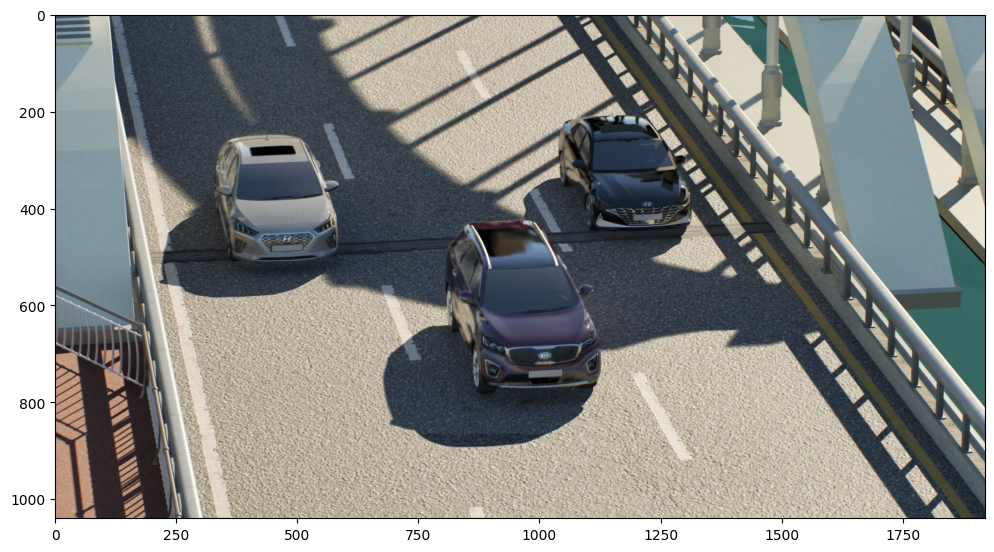

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

INPUT_SIZE = 608

image_path = "/content/syn_00000.png"
image      = cv2.imread(image_path)
image      = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,10))
plt.imshow(image)
plt.show()

In [ ]:
bboxes = model.predict(image)
print(len(bboxes))
for bbox in bboxes:
    print(bbox)

In [ ]:
!./darknet detect cfg/yolov3_custom.cfg ./yolov3_custom_last.weights data/obj/valid/syn_00000.png

In [ ]:
pred = plt.imread('predictions.png')
plt.figure(figsize=(10,10))
plt.imshow(pred)
plt.show()